# Задача на (5б)
(Лернер проверил и засчитал)

провести порядка 100 экспериментов для оценки количества присваиваний при подсчете максимального элемента случайно перемешенного массива  из миллион одного неравного элемента. Построить гистограмму для этого количества или найти элементарную статистику (среднее, мин, макс, среднеквадратичное отклонение, медиану, квартили). Алгоритм случайного перемешивания рассказывался на лекции, почему это лучше, чем просто генерирование случайного массива из миллион одного элемента так же обсуждалось. В итоге, надо проверить правда ли говорилось на лекции, что таких присваиваний будет немного.

,0
count,100.000000
mean,14.390000
std,3.603856
min,6.000000
25%,12.000000
50%,14.000000
75%,16.000000
max,24.000000


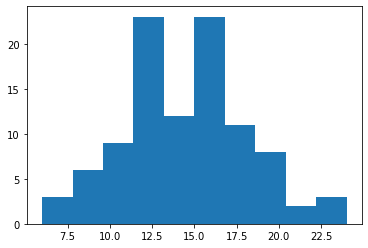

In [6]:
import random
import matplotlib.pyplot as plt
import pandas as pd


# создаем начальный список от 1 до 10^6
initial_list  = [r for r in range(1, 1_000_000)]
#print(f"начальный список: {str(initial_list)}")


def x_shuffle(x:list) -> list :
    """функция случайного перемешивания
    вход: не перемешенный список
    выход: перемешанный список
    """
    for i in range(len(x)-1, 0, -1):
        # возьмем случаный индекс
        j = random.randint(0, i + 1)

        # Поменяем arr[i] на элемент со случайным индексом
        x[i], x[j] = x[j], x[i]

    return x


def task(x:list) -> int:
    """функция подсчета присваиваний
    вход: список
    выход:
    """
    task_list = x_shuffle(x)
    cnt = 1
    best = task_list[0]
    for i in range(1, len(x)):
        if task_list[i] > best:
            best = task_list[i]
            cnt += 1

    return cnt


def test(n: int = 100) -> list:
    """функция эксперимент, сколько раз произошло присваивание
    вход: количество экспериментов, по умолчанию 100
    выход: список, сколько было присваивание в каждом эксперименте
    """
    lst_best = []
    for i in range(n):
        lst_best.append(task(initial_list))

    return lst_best

# запись результатов экспериментов 
result = test()

# строим гистограму
plt.hist(result) 

# описательная статистика
df = pd.DataFrame(result)
df.describe()

# Задача о рюкзаке(6)

[Задача о рюкзаке](https://neerc.ifmo.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BE_%D1%80%D1%8E%D0%BA%D0%B7%D0%B0%D0%BA%D0%B5)

In [7]:
from collections import namedtuple


# создадим именованный кортеж для хранение информации о вещах
Goods = namedtuple("Goods", "name weight value")

# список вещей(название, вес, ценость)
items = [Goods('laptop',  10, 10), 
         Goods('phone',    2, 9), 
         Goods('pen',      1, 3),
         Goods('notebook', 2, 3),
         Goods('water',    5, 9)
]

# вместимость рюкзака 
capacity = 15

In [10]:
def rucksack_1(items: list, capacity: int = 15):
    """задача о рюкзаке, динамическое програмирование
       классическая реализация
    input:
      items - список из именованных кортежей
      capacity - объем рюкзака, сколько можем вместить. По умолчанию 15
    output:
      возрата нет, только
      print результов
    """

    # базовая проверка
    n = len(items)
    if n == 0 or capacity <= 0:
        return 0

    # список ценностей вещей
    value = [items[i].value for i in range(len(items))]
    # список весов вещей
    weight = [items[i].weight for i in range(len(items))]
    # количество вещей
    n = len(items)

    # массив заполенный нулями для хренения информации
    # различные рюкзаки
    m = [[0 for j in range(capacity+1)] for i in range(n)]

    # проходим по рюкзакам
    for j in range(1, capacity+1):
        # проходим по предметам
        for i in range(n):
            # если вес i-того предмета меньше или равно весу вместительности рюкзака
            if weight[i] <= j:
                # пустой ли рюкзак
                if i == 0:
                    # если рюкзак пуст то кладем предмет
                    m[0][j] = value[0]
                # иначе
                else:
                    # берем предметы из рюкзака и смотрим их ценность
                    value1 = m[i-1][j]
                    # ценность i-го предмету добовляем ценность рюкзака
                    value2 = value[i] + m[i-1][j-weight[i]]
                    # берем лучшее сочетание предметов
                    m[i][j] = max(value1, value2)
            else:
                # иначе не берем предмет
                m[i][j] = m[i-1][j]


    # лучшая ценноть которая находится в правом нижнем углу(смотри по ссылки)
    rucksack_value = m[i][j]
    x = m[i][j]
    # сюда будем записывать вещи которые взяли
    taken = set()

    # цикл нахождения рюкзака с наибольшой ценностью
    while i > 0:
        y = m[i-1][j]
        if x != y:
            taken.add(i)
            # вместимость рюкзака минус вес предмета которого берем
            j = j - weight[i]
        i = i - 1
        x = m[i][j]
    if m[0][j] != 0:
        taken.add(0)

    rucksack_weight = sum([weight[i] for i in taken])

    item_names = ' '.join([items[i].name for i in taken])
    print(f'Вещи которые взяли: {item_names}')
    print(f'Их ценность: {rucksack_value}, их вес: {rucksack_weight}')


# вызов функции
rucksack_1(items, 15)

Вещи которые взяли: laptop phone pen notebook
Их ценность: 25, их вес: 15


In [11]:
def knapsack_2(items: list, capacity: int = 15) -> tuple:
    """задача о рюкзаке, динамическое програмирование
      экономия по памяти O(W)
    input:
      items - список из именованных кортежей
      capacity - объем рюкзака, сколько можем вместить. По умолчанию 15
    output:
      общая ценность вещей, которая поместилась в рюкзак
      список товаров
    """
  
    # базовая проверка
    n = len(items)
    if n == 0 or capacity <= 0:
        return 0

    # Массив для наилучшего значения, которое может быть достигнуто для каждого веса.
    best_value = [0] * (capacity + 1)
    # массив для хранения вещей
    previous_item = [None] * (capacity + 1)

    for item in items:
        for w in range(capacity, item.weight - 1, -1):
            value = best_value[w - item.weight] + item.value
            if value > best_value[w]:
                best_value[w] = value
                previous_item[w] = item

    # узнаем какие вещи положили в рюкзак
    cur_weight = capacity
    taken = set()
    while cur_weight > 0:
        taken.add(previous_item[cur_weight])
        cur_weight -= previous_item[cur_weight].weight

    # из сет в список
    taken = [i for i in taken]
    item_names = ' '.join([taken[i].name for i in range(len(taken))])

    return best_value[capacity], item_names


value, names = knapsack_2(items, capacity)
print(f'общая ценность: {value}, вещи: {names}')


общая ценность: 25, вещи: water notebook pen phone


In [ ]:
def knapsack_3(items: list, capacity:int = 15):  
  '''задача о рюкзаке, динамическое програмирование
    экономия по памяти O(W)
  input:
    items - список из именованных кортежей
    capacity - объем рюкзака, сколько можем вместить. По умолчанию 15  
  output:
    общая ценность вещей, которая поместилась в рюкзак
    список товаров  
  '''

  # базовая проверка
  n = len(items)
  if n == 0 or capacity <= 0:
      return 0
   
  dp = [0 for _ in range(capacity + 1)]

  # Заполнить массив первым весом, если он находится в пределах объема рюкзака
  for c in range(capacity + 1):
      if items[0].weight <= c:
          dp[c] = items[0].value
  
      
  for i in range(1, n):
      for c in range(capacity, -1, -1):
          profit1, profit2 = 0, 0
          if items[i].weight <= c:
              # Включить текущию вещь
              profit1 = items[i].value + dp[c - items[i].weight]
          # Исключить текущию вещь
          profit2 = dp[c]
          # Обновить массив
          dp[c] = max(profit1, profit2)
    
  x = dp[c]
  # сюда будем записывать вещи которые взяли(set  удалит дубли)
  taken = set()

  # цикл нахождение вещей которые положили в рюкзак 
  while i > 0:
      y = dp[i-1]
      if x != y:
          taken.add(i)
      i = i - 1
      x = dp[i]
  if dp[0] != 0:
      taken.add(0)
    
  item_names = ' '.join([items[i].name for i in taken])
    
  return dp[capacity], item_names

In [ ]:
value, names =  knapsack_3(items, capacity)
print(f'общая ценность: {value}, вещи: {names}')

общая ценность: 25, вещи: phone pen notebook water


# Задача о счастивом билете (5б)

100-значный билет называется счастливым по-казански, если цифры в нем можно разбить на две группы так, чтобы суммы цифр были равны. любые размеры групп. 

In [3]:
import numpy as np


def kzn_happy_tickets(ticket: list) -> bool:
    """функция проверяет является ли билет счастливый по казански
      input:
        принимает cтроку str, номер билета 
      outpur:
        возраешь True/False 
    """

    # проверка, является ли билет числовым представлением
    assert ticket.isdigit() == True, 'Число должно содержать цифры'

    # Разбить число на список цифр
    digits = list(map(int, ticket))

    digits_sum = sum(digits)
    
    # Если сумма цифр билета нечётна, то разбиения не существует
    if digits_sum % 2 == 1:
        return False

    # находим сумму подмножества(половину цифр) 
    half_sum = sum([digits[i] for i in range(len(digits)//2)])

    # Далее реализуем рюкзак 
    dp = [np.Inf for _ in range(half_sum)]
    dp[0] = 0

    # определим существует ли "подбилета" с суммой равной k, 
    # если существует подбилет с суммой цифр равной sum(ticket) / 2, 
    # то значит у нас есть счастливый билет по казански 
    for number in digits:
        for value in reversed(range(number, half_sum)):
            dp[value] = min(dp[value - number] + 1, dp[value])

    # если последние число отличается от бесконечности, то билет счастливый, иначе не счастливый
    return dp[-1] < np.Inf


In [4]:
ticket = "012306"
result = kzn_happy_tickets(ticket)
print(f' Билет {ticket} счастливый по-казански' if result else f'Билет {ticket} не счастливый по-казански')


 Билет 012306 счастливый по-казански


In [ ]:
any(map(str.isdigit, '012306')) 

True

# Задача о ближайших теплых дных (5б) [переделал]

In [ ]:
def warmdays(T: list):
    """Функция определяет когда придет тепло
    input:
      T - список из температур
    output:
      print - выводим сколько дней осталось ждать тепла
    """
  
    n = len(T)

	# Для хранения ответа
    daysOfWait = [-1] * n
    s = []

	# Посмотрим на все температуры
    for i in range(n):
        # Проверяем, является ли текущий индекс следующей более теплой температурой
        # из любых предыдущих индексов
        while(len(s) != 0 and T[s[-1]] < T[i]):
            daysOfWait[s[-1]] = i - s[-1]

		    # Вытаскиваем элемент
            s.pop(-1)

        # Сохраним текущий индекс
        s.append(i)

    # вывод сколько осталось ждать
    for i in range(n):
        print(daysOfWait[i], end = " ")

# температура для проверки 
arr = [0, -5, 3, 4, 0]

# вызов функции
warmdays(arr)

2 1 1 -1 -1 

In [ ]:
import numpy as np 


def warmdays2(temps):
  t_indexes = {}
  n = len(temps)
  result = [0] * n
  for i in range(n - 1, -1, -1):
    t = temps[i]
    candidates = sorted(i_ for t_, i_ in t_indexes.items() if t_ > t)
    if candidates:
      result[i] = candidates[0] - i
    t_indexes[t] = i
  
  return result

T = [9,7,4,4,4,8,5,5,5,6, 0, 0, 0,1, 0,-5,-4,-3, 0, 0,-1,-1,-2,-8,-7,-1,4,1,-1,1,1]
ans = np.array(warmdays2(T))
ans

array([ 0,  4,  3,  2,  1,  0,  3,  2,  1,  0,  3,  2,  1, 13, 12,  1,  1,
        1,  8,  7,  6,  5,  3,  1,  1,  1,  0,  0,  1,  0,  0])

# Задача о перемножение цепочек матриц (6.5 баллов )

In [ ]:
[ [t<n for n in T[i:]+[t+1]].index(True)%(len(T)-i) for i,t in enumerate(T)]

[0,
 4,
 3,
 2,
 1,
 0,
 3,
 2,
 1,
 0,
 3,
 2,
 1,
 13,
 12,
 1,
 1,
 1,
 8,
 7,
 6,
 5,
 3,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0]

In [ ]:
import numpy as np


def matrix_chain_order(p):
    # n=p.length-1
    n=len(p)-1
    # Пусть m[1...n,1...n] для хранения стоимости m[i,j]
    m=np.zeros((n+1,n+1))
    # пусть s[1...n-1,2...n] записывает, какой индекс из k достиг оптимальной стоимости при вычислении m[i,j].
    s=np.zeros((n, n+1),dtype=int)
    for l in range(2, n+1):       # l - длина цепи, l=j-i+1
        for i in range(1, n-l+2): # возможный диапазон i, min(i)=1, max(i)=n-1
            j = i + l-1           # так как l=j-i+1, min(i)=2, max(i)=n
            m[i,j] = np.inf       # установим бесконечность в качестве отправного значения для m[i,j]
            for k in range(i, j):
                q = m[i,k] + m[k+1,j] + p[i-1] * p[k] * p[j] 
                if q < m[i,j]:
                    m[i,j] = q
                    s[i,j] = k

    m = m.astype(int)
    s = s.astype(int)
    return m, s



def print_optimal_parens(s, i, j):
    if i == j:
        print(f"A_{i+1}", end="")
    else:
        print("(", end="")
        print_optimal_parens(s, i, s[i, j])
        print_optimal_parens(s, s[i, j] + 1, j)
        print(")", end="")


if __name__ == "__main__":

    # A1 = 30x35
    # A2 = 35x15
    # A3 = 15x5
    # A4 = 5x10
    # A5 = 10x20
    # A6 = 20x25
    p = [30, 35, 15, 5, 10, 20, 25]

    m, s = matrix_chain_order(p)
    print(m)
    print()
    print(s)
    print()
    print(f"Минимальное количество скалярных умножений: {m[1, -1]}")
    print("Визуализация")
    print_optimal_parens(s, 0, len(s) - 1)
    print()



[[    0     0     0     0     0     0     0]
 [    0     0 15750  7875  9375 11875 15125]
 [    0     0     0  2625  4375  7125 10500]
 [    0     0     0     0   750  2500  5375]
 [    0     0     0     0     0  1000  3500]
 [    0     0     0     0     0     0  5000]
 [    0     0     0     0     0     0     0]]

[[0 0 0 0 0 0 0]
 [0 0 1 1 3 3 3]
 [0 0 0 2 3 3 3]
 [0 0 0 0 3 3 3]
 [0 0 0 0 0 4 5]
 [0 0 0 0 0 0 5]]

Минимальное количество скалярных умножений: 15125
Визуализация
(A_1((A_2(A_3A_4))(A_5A_6)))


# Наибольшая общая подпоследовательность (5б)

In [ ]:
def LCS_length(X:str, Y:str):
  '''функция нахождения длины наибольшей общей подпоследовательности
  input:
    Две строки X и Y
  output:
    Длину l и таблицу c
  '''
  n = len(X)
  m = len(Y)

  if n < 0 or m < 0:
    return 0

  # таблица для хранения 
  dp = [[0 for _ in range(m + 1)] for _ in range(n + 1)]

  for i in range(1, n + 1):
    for j in range(1, m + 1):
      if X[i - 1] == Y[j - 1]:
        dp[i][j] = dp[i-1][j-1] + 1
      else:
        dp[i][j] = max(dp[i-1][j], dp[i][j-1])
        
  return dp[n][m], dp


def print_LCS(c, X, i, j):
  '''вывод последовательности
  input:
    таблица c
    две строки X и Y
  output:
    вывод подпоследовательсностей 
  '''

  if i == 0 or j == 0:
    return 

  if c[i][j] == c[i-1][j-1] + 1:
    print_LCS(c, X, i-1, j-1)
    print(X[i-1], end=' ')
  elif c[i][j] == c[i-1][j]:
    print_LCS(c, X, i-1, j)
  else:
    print_LCS(c, X, i, j-1)


In [ ]:
str1 = "AGGTAB"
str2 = "GXTXAYB"

l, c = LCS_length(str1, str2)
print(f'Длина: {l}')

i, j = len(str1), len(str2)
print(f'Подпоследовательность')
print_LCS(c, str1, i, j)

Длина: 4
Подпоследовательность
G T A B 

# Наибольшая возрастающая подпоследовательность (3б)

In [ ]:
def binarysearch(array, low, high, key):
  '''вспомогательная функция(бинарный поиск) для ф-ии LIS_length'''
  while(high - low > 1):
    mid = (low + high) // 2
    if(array[mid] >= key):
      high = mid
    else:
      low = mid
  return high
    

def LIS_length(array: list, size: int) -> int:
  '''функция поиска наибольшой возрастающей подпоследовательности
  input:
    список и размер списка 
  output:
    длина 
  '''
  
  dp = [0 for i in range (size+1)]
  dp[0] = array[0]
  pointer = 1

  for i in range(1, len(array)):
    if(dp[0] > array[i]):
      dp[0] = array[i]
    elif(dp[pointer-1] < array[i]):
      dp[pointer] = array[i]
      pointer += 1
    else:
      dp[binarysearch(dp, 0, pointer-1, array[i])] = array[i]
  
  return pointer

 
def print_LIS(arr: list, n: int):
  '''функция печати последовательности'''
  
  l = [[] for i in range(n)]
 
  l[0].append(arr[0])
  for i in range(1, n):
    for j in range(i):
      if arr[i] > arr[j] and (len(l[i]) < len(l[j]) + 1):
        l[i] = l[j].copy()
    l[i].append(arr[i])
 
  maxx = l[0]

  for x in l:
    if len(x) > len(maxx):
      maxx = x

  return maxx


In [ ]:
# пример взят с вики
# https://en.wikipedia.org/wiki/Longest_increasing_subsequence

arr = [0, 8, 4, 12, 2, 10, 6, 14, 1, 9, 5, 13, 3, 11, 7, 15]
n = len(arr)
 
# construct and print LIS of arr
ans = print_LIS(arr, n)
l = LIS_length(arr, n)


assert ans == [0, 2, 6, 9, 11, 15]
print(f'Подпоследовательность: {ans}, длина составила: {l}')

Подпоследовательность: [0, 2, 6, 9, 11, 15], длина составила: 6


# Тест Ферма и алгоритм Миллера-Рабина на простоту (5.5 б)

In [ ]:
import random


def ferma(c: int, k: int) -> bool:
    """
    малая теорема Ферма
    :param c: число которое проверяется
    :param k: количество прогонов
    :return: Возвращает True/False, если n возможно простое или составное
    """

    # проверки
    if c != int(c):
        return False

    if c in [2, 3]:
        return True

    # алгоритм
    for i in range(k):
        a = random.randrange(2, c - 1)
        if a ** (c - 1) % c != 1:
            # print("Составное")
            return False
    #print("Простое")
    return True

In [ ]:
ferma(7, 20)

True

In [ ]:
import random


def miller_rabin(c:int, k:int = 20) -> bool:
    """
    алгоритм Миллера-Рабина на простоту
    :param c: число которое проверяем
    :param k: число испытаний
    :return: Возвращает True, если n возможно простое.
    """

    # проверки
    if c != int(c):
        return False

    if k < 1:
        raise ValueError('число экспериментов < 1')
  
    c = int(c)
    if c in [0, 1, 4, 6, 8 ,9]:
        return False

    if c in [2, 3]:
        return True

    p = 0
    r = c-1

    while not r & 1: # r % 2 == 0
        r>>=1          # r = r / 2
        p+=1
    assert(2**p * r == c-1)
 

    def miller_additive(a):
        '''Добавка Миллера'''
        if pow(a, r, c) == 1: # powerMod
            return False # составное
        for i in range(r):
            if pow(a, 2**i * r, c) == c-1: # powerMod
                return False # составное
            return True # возможное простое


    for i in range(k): # количество испытаний
        a = random.randrange(2, c-1)
        if miller_additive(a):
            return False
 
    return True


In [ ]:
miller_rabin(7, 20)

True

[Числа Кармайкла](http://cryptowiki.net/index.php?title=%D0%A7%D0%B8%D1%81%D0%BB%D0%B0_%D0%9A%D0%B0%D1%80%D0%BC%D0%B0%D0%B9%D0%BA%D0%BB%D0%B0)

[Простое число](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D1%81%D1%82%D0%BE%D0%B5_%D1%87%D0%B8%D1%81%D0%BB%D0%BE)

In [ ]:
n = 2**127 -1

In [ ]:
miller_rabin(n, 20)

True

In [ ]:
# запуск кода

Carmichael = [561, 1105, 1729, 2465, 2821, 6601, 8911, 10585, 15841,\
              29341, 41041, 46657, 52633, 62745, 63973, 75361]

primality_numbers = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, \
           67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, \
           139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199]

for n in primality_numbers[:10]:
  mr_primality = miller_rabin(n, 20)
  print(f' число {n} простое' if mr_primality else f'число {n} составное')

  ferma_primality = ferma(n, 20)
  print(f' число {n} простое' if ferma_primality else f'число {n} составное')
  print()

 число 2 простое
 число 2 простое

 число 3 простое
 число 3 простое

число 5 составное
 число 5 простое

 число 7 простое
 число 7 простое

 число 11 простое
 число 11 простое

число 13 составное
 число 13 простое

число 17 составное
 число 17 простое

 число 19 простое
 число 19 простое

 число 23 простое
 число 23 простое

число 29 составное
 число 29 простое



# Задача про стеклянные шары (чуть меньше чем 4+9 )
[статья на habr'е](https://habr.com/ru/post/211200/)

In [16]:
'''
Решая задачу о башне и 2 стеклянных шара.

Пользователю предлагается ввести число n уровней башни.
Используя 2 стеклянных шара, нужно найти самый высокий этаж, если таковой имеется, такой,
что при падение шарика с этого этажа разбивается,
используя стратегию, которая минимизирует количество падений в худшем случае
(предполагается, что любой шарик разобьется при падении с этажа, где разбивается один шарик,
а также при падении с любого более высокого уровня;
шарики могут не разбиться при падении с любого уровня).

Идея:
какова максимальная высота h башни чтобы ответ всегда можно было найти при не более чем d падениях?
Легко проверить, что h - наибольшее целое число. такое,
что d + (d - 1) + (d - 2) + ... + 2 + 1 >= h, и что стратегия состоит в том,
чтобы опустить первый шар с уровня d, затем с уровня d + (d - 1),
затем с уровня d + (d - 1) + (d - 2), ..., пока шар не разобьется,
если это когда-нибудь произойдет.
В случае, если это произойдет, и i - наименьшее целое число такое, что шар разбивается
при падении с уровня
d + ... + (d - i - 1) + (d - i),
то опускают второй шар с уровня d + ... + (d - i - 1) + 1,
а затем с уровня d + ... + (d - i - 1) + 2 и т.д.
пока стакан не разобьется, если это вообще произойдет.

'''


from math import sqrt, ceil
from random import randint


while True:
    # n - число этажей.
    n = input('Введите количество этажей: ')
    try:
        n = int(n)
        if n <= 0:
            raise ValueError
        break
    except ValueError:
        print('Неверный ввод, попробуйте еще раз')

d = ceil((sqrt(8 * n + 1) - 1) / 2)
if d == 1:
   print('Потребуется не более 1 броска.\n')
else:
   print(f'Потребуется {d} бросаний.\n')

# Самый высокий уровень, о котором известно, что шарик, брошенный
# с этого уровня, не разбивается.
low = 0

# Наименьший уровень такой, что известно, что шарик, брошенный
# С этого уровня разбивается (удобно считать, что шар брошенный с уровня на один больше, чем
# высота башни, разбивается).
high = n + 1
drop = 0
which_marble = 'первым'

# Мы случайным образом заставляем шарики разбиваться на одном из уровней 1, 2, ..., n + 1
# (в случае, если значение равно n + 1, шарик не разбивается при падении с любого уровня башни).

breaking_level = randint(1, n + 1)
while low < high - 1:
    level = min(low + d, high - 1)
    drop += 1
    if breaking_level <= level:
       print(f'Бросок #{drop} с {which_marble} шаром, с этажа {level}... '
             'разбивается!'
             )
       which_marble = 'вторым'
       high = level
       d = 1
    else:
       print(f'Бросок #{drop} с {which_marble} шаром, с этажа {level}... '
             'не разбился'
             )
       low = level
       if d > 1:
           d -= 1
if high == n + 1:
    print('Ни один шарик не разбился.')
elif high == 1:
    print(f'Шарики разбиваются при падении с первого этажа.')
else:
    print(f'Шарики разбиваются при падении с {high} этажа, но не ниже.')

Потребуется 6 бросаний.

Бросок #1 с первым шаром, с этажа 6... не разбился
Бросок #2 с первым шаром, с этажа 11... разбивается!
Бросок #3 с вторым шаром, с этажа 7... разбивается!
Шарики разбиваются при падении с 7 этажа, но не ниже.


In [6]:
'''
Задача о башне и m стеклянных шарах.
Пользователю предлагается ввести число n этажей башни и число m стеклянных шаров.
Используя m шаров, необходимо найти самый высокий уровень, если таковой имеется,
такой что падение шара с этого уровня приводит к его разрушению,
используя стратегию которая минимизирует количество падений в худшем случае
(предполагается, что любой шар разобьется при падении с уровня,
где один щар разбивается, а также при падении с любого более высокого уровня;
шарики могут не разбиться при падении с любого уровня).

Идея:
какова максимальная высота башни, при которой ответ всегда может быть найден при не более чем d падениях?
Пусть H(d, m) обозначает эту максимальную высоту.

- Если шар разбивается, то остается m - 1 шара, и нет необходимости проверять более высокие уровни.
- Если шар не разбивается, то остается m шаров и нет необходимости проверять более низкие уровни.
- В любом случае остается d - 1 бросаний.

Это дает: H(d, m) = H(d - 1, m - 1) + H(d - 1, m) + 1.

Базовыми являются случаи, когда либо d = 0, либо m = 0, в этом случае H(d, m) = 0.
Это позволяет вычислить d как наименьшее целое число с H(d, m) >= n.
Для моделирования, если low - это самый высокий уровень, с которого известно,
что шар может быть сброшен и не  разбится, то  d' - это количество бросаний,
которые остаются, и m' - количество шаров, которые остается,
то следующий шарик должен быть сброшен с уровня low + H(d' - 1, m' - 1) + 1.

Задаем B(0, k) = 1 для всех k, B(n, 0) = 1 для всех n, и B(n + 1, k + 1) = B(n, k) + B(n, k + 1).

Рекуррентное соотношение идентично тому, которое определяет биномиальные коэффициенты.
Легко проверить, что:
- H(n, k) равно B(n, k) - 1;
- если k > n, то B(n, k) равно B(n, n);
- если k <= n, то B(n, k) равна сумме n выбрать k1 где k1 лежит в диапазоне {0, ..., k}.

Значения B(n, k) определяют прямоугольник Бернуилли, строки которого
вычисляются аналогично строкам треугольника Паскаля. Программа делает
прямое использование B(., .) и косвенное использование H(., .):

0  1  2  3  4  5  6       
 --- число шаров  --->
1  1  1  1  1  1  1 ...   |      0
1  2  2  2  2  2  2 ...   |число 1
1  3  4  4  4  4  4 ...   |броса 2
1  4  7  8  8  8  8 ...   |ний   3
1  5 11 15 16 16 16 ...   |      4
1  6 16 26 31 32 32 ...   |      5
........................  V
'''


from random import randint


while True:
    # Количество этажей башни.
    n = input('Введите количество этажей в башне')
    try:
        n = int(n)
        if n <= 0:
            raise ValueError
        break
    except ValueError:
        print('Неверный ввод, попробуйте еще раз')
while True:
    # Количество шаров
    m = input('Введите количество шаров')
    try:
        m = int(m)
        if m <= 0:
            raise ValueError
        break
    except ValueError:
        print('Неверный ввод, попробуйте еще раз')

# Вычислите и сохраните B(i, k) для всех i в {0, ..., d}
# и k в {0, ..., m}, где d - по условию, определенное как наименьшее число d'
# с H(d', m) == B(d', m) - 1 >= n.

bernouilli_rows = [[1] * (m + 1), [1] + [2] * m]

while bernouilli_rows[-1][m] <= n:
    row = bernouilli_rows[-1]
    bernouilli_rows.append([1] + [row[i - 1] + row[i]
                              for i in range(1, len(row))]
                          )

d = len(bernouilli_rows) - 1
if d == 1:
   print('Потребуется не более 1 броска.\n')
else:
   print(f'Потребуется {d} бросаний.\n')

# Самый высокий уровень, о котором известно, что шар,
# упавший с с этого уровня, не разбивается.
low = 0

# наименьший уровень, такой, что известно, что шар, брошенный с этого уровня, разбивается
# (удобно считать, что шар, брошенный с уровня на один больше, чем высота башни, разбивается).
high = n + 1
drop = 0
marble = 1

# Мы случайным образом заставляем шарики разбиваться на одном из уровней 1, 2, ..., n + 1
# (в случае, если значение равно n + 1, шарик не разбивается при падении с любого уровня башни).

breaking_level = randint(1, n + 1)
while low < high - 1:
    d -= 1
    level = min(low + bernouilli_rows[d][m - 1], high - 1)
    drop += 1
    if breaking_level <= level:
       print(f'Бросок {drop}  шаром {marble}, '
             f'с этажа {level}... шар разбился!'
            )
       marble += 1
       high = level
       m -= 1
    else:
       print(f'Бросок {drop} шаром {marble}, '
             f'с этажа {level}... шар не разбился!')
       low = level
if high == n + 1:
    print('Ни один шар не разбился')
elif high == 1:
    print('Шары разбиваются при падении с первого этажа.')
else:
    print(f'Шар разбиваются при падении с уровня {high}, но не ниже.')

Потребуется 19 бросаний.

Бросок 1 шаром 1, с этажа 172... шар не разбился!
Бросок 2 шаром 1, с этажа 326... шар не разбился!
Бросок 3  шаром 1, с этажа 463... шар разбился!
Бросок 4 шаром 2, с этажа 342... шар не разбился!
Бросок 5 шаром 2, с этажа 357... шар не разбился!
Бросок 6 шаром 2, с этажа 371... шар не разбился!
Бросок 7 шаром 2, с этажа 384... шар не разбился!
Бросок 8  шаром 2, с этажа 396... шар разбился!
Бросок 9 шаром 3, с этажа 385... шар не разбился!
Бросок 10 шаром 3, с этажа 386... шар не разбился!
Бросок 11 шаром 3, с этажа 387... шар не разбился!
Бросок 12 шаром 3, с этажа 388... шар не разбился!
Бросок 13 шаром 3, с этажа 389... шар не разбился!
Бросок 14 шаром 3, с этажа 390... шар не разбился!
Бросок 15 шаром 3, с этажа 391... шар не разбился!
Бросок 16 шаром 3, с этажа 392... шар не разбился!
Бросок 17 шаром 3, с этажа 393... шар не разбился!
Бросок 18 шаром 3, с этажа 394... шар не разбился!
Бросок 19  шаром 3, с этажа 395... шар разбился!
Шар разбиваются при 

# Признак делимость на 11(не то )
[Делимость на 11](http://mathemlib.ru/books/item/f00/s00/z0000003/st051.shtml)

In [ ]:
def div_by_11(number: list) -> bool:
    """
    признак делимости на 11:
    надо из суммы всех цифр, стоящих на нечетных местах, вычесть сумму всех цифр,
    занимающих четные места; если в разности получится 0 либо число (положительное или отрицательное),
    кратное 11, то и испытуемое число кратно 11;
    в противном случае наше число не делится без остатка на 11

    :param number: число, str
    :return: True/False
    """

    # проверка, является ли билет числовым представлением
    assert number.isdigit() == True, 'Число должно содержать цифры'

    # Разбить число на список цифр
    digits = list(map(int, number))

    # Разделение элементов с четными и нечетными индексами
    odd_index = digits[::2] 
    even_index = digits[1::2]

    sum_odd = sum(odd_index)
    sum_even = sum(even_index)

    return sum_odd - sum_even == 11


In [ ]:
num = '87635064'
result = div_by_11(num)
print(f' Число {num} делится на 11' if result else f'Число {num} не делится на 11')


[8, 7, 6, 3, 5, 0, 6, 4]
25
14
 Число 87635064 делится на 11


In [80]:
def div_by_11_2(number: list) -> bool:
    """
    признак делимости на 11, удобный для не очень длинных чисел.
    Он состоит в том, что испытуемое число разбивают справа налево на грани по две цифры
    в каждой и складывают эти грани. Если полученная сумма делится без остатка на 11,
    то и испытуемое число кратно 11, в противном случае - нет.
    Например, пусть требуется испытать число 528.
    Разбиваем число на грани (5/28) и складываем обе грани

    input:
      Число, str
    output:
      True/False
    """

    # проверка, является ли билет числовым представлением
    assert number.isdigit() == True, 'Число должно содержать цифры'

    n = 2	# деление на 2 группы

    # костыль
    # деление на грани по две цифры
    # если число не четное, то первое число и деление на группы по две   
    if len(number) % 2 != 0:
      lst = list(number[0]) + [(number[i:i+n]) for i in range(1, len(number), n)]
    else:
      lst = [(number[i:i+n]) for i in range(1, len(number), n)]

    # складывание грани
    sum_lst = sum(list(map(int, lst)))

    # Так как sum_lst делится без остатка на 11, то и число number кратно 11
    return sum_lst % 11 == 0

In [84]:
num = '87635064'
result = div_by_11_2(num)
print(f' Число {num} делится на 11' if result else f'Число {num} не делится на 11')


 Число 87635064 делится на 11


# Задача нахождение медианы(4+4.5)

Часто, для массива данных необходимо посчитать порядковые статистики. Если исходный массив содержит n элементов, то k-тая порядоковая статистика - число, которое стоит на k-том месте в упорядоченном изначальном массиве.

Например: минимум - это 1-ая порядковая статистика, максимум - n-ая порядковая статистика, а медиана - n/2 - порядковая статистика.

[habr](https://habr.com/ru/post/346930/)

In [7]:
from typing import List
import random


def partition(A:List[int], lo: int, hi: int) -> int :
    """
    функция для разбиения массива на нужные нам подмассивы
    :param A: список данных
    :param lo: индекс начала(от какого индекса начинаем)
    :param hi: индекс конца (на каком индексе заканчиваем)
    :return: возвращаем на место опорного элемента i в этом массиве (по сути элемент разделения массива)
    """
    # случайно выбираем индекс опорного элемента
    pivot_index = random.randint(lo, hi)
    A[pivot_index], A[hi] = A[hi], A[pivot_index]
    pivot = A[hi]
    i = lo
    for j in range(lo, hi+1):
        if A[j] < pivot:
            A[i], A[j] = A[j], A[i]
            i += 1
    A[i], A[hi] = A[hi], A[i]
    return i


def quick_select(A:List[int], lo: int, hi: int, k: int) -> int :
    """
    функция выбора разбиения
    - Пускай мы поделили массив на две части. В таком случае если в левом подмассиве элементов больше чем k, то это означает,
    что k-ая порядковая статистика лежим в нем. Если же меньше, то это означаем, что k-ая статистика лежив в правом подмассиве
    - Если же в левом оказалось ровно k-1 элемент, то значит наш опорный элемент и есть k-тая порядковая статистика
    :param A: список данных
    :param lo: индекс начала
    :param hi: индекс конца
    :param k: число порядковой статистики
    :return: k-ый элемент набора в порядке сортировки
    """

    # разбиваем список
    p = partition(A, lo, hi)

    # Нам нужно не просто разбить на 2 массива, а также еще, чтобы граничный элемент был на границе
    # Поэтому проведем еще одну операцию partition, которая перетащит все граничные элементы на границу двух подмассивов

    if p-lo == k:
        # нашли нашу статистику
        return A[p]
    elif p-lo > k:
        return quick_select(A, lo, p-1, k)
    else:
        return quick_select(A, p+1, hi, k-p+lo-1)
        # мы отняли от k размер левой части, так как относительно правого подмассива наша статистика теперь стоит
        # на p+lo-1 позиций раньше
        # мы не сделали так для левого массива, так как его начало совпадает с началом исходного массива и наша
        # статистика все еще находится на правильной позиции


def median_of_medians(A:List[int], k: int) -> int:
    """
    По сути этот алгоритм - это просто улучшенная версия предыдущего.
    Основным отличием от него является то, как мы выбираем опорный элемент, по которому мы делим наше множество.
    В предыдущем алгоритме мы просто выбирали серединный (с таким же успехом, мы могли выбирать случайный элемент),
    и поэтому при плохих данных алгоритм может проседать по скорости. В данном же алгоритме мы выбираем опорный элемент более интеллектуально.

    - Поделим весь массив на небольшие массивы размера 5. (Если его размер не делится на 5, то оставшиеся несколько элементов,
        мы потом просто добавим к следующей стадии)
    - Отсортируем каждый их этих подмассивов любым алгоритмом сортировки и возьмем срединный элемент в каждом подмассиве
        (по сути мы нашли медиану в каждом из подмассивов)
        Важным момент тут заключается в том, что хоть мы и используем здесь сортировку, но это не влияет на зависимость скорости работы всего алгоритма
        от количества данных, так как мы все время сортируем всего 5 элементов.
        Пример, если бы мы использовали даже алгоритм сортировки пузырьком: 5^2 + 5^2 + ... = N/5 * 5^2 = N * 5

    - Далее составим массив из этих медиан и припишем к ней оставшиеся элементы после первого пункта (если таковые имеются)
    - Рекурсивно посчитаем нашу функцию от получившегося массива - то есть найдем медиану найденных медиан.
    - Полученная медиана М - и есть тот самый "хороший" элемент, по которому необходимо делить наше множество.
    - Далее все также как и в предыдущем алгоритме - делим множества по этому элементу, смотрим, на размер получившихся множеств и далее определяем,
      где находится наша статистика и либо вызываем нашу функцию от нужного множества или сразу возвращаем медиану.

    :param A: список данных
    :param k: число порядковой статистики
    :return: k-ый элемент набора в порядке сортировки
    """

    if len(A) == 1:
        assert k == 0
        return A[0]

    # делим список на подсписки по 5 элементов
    sublists = [A[j:j+5] for j in range(0, len(A), 5)]
    # список медиан из медиан
    medians = [sorted(sublist)[len(sublist)//2] for sublist in sublists]

    if len(medians) <= 5:
        pivot = sorted(medians)[len(medians)//2]
    else:
        # опорной точкой является медиана медиан
        pivot = median_of_medians(medians, len(medians)//2)

    # разделение на списки больше/меньше опорной точки
    low = [j for j in A if j < pivot]
    high = [j for j in A if j > pivot]

    if k < len(low):
        return median_of_medians(low,k)
    elif k < len(A)-len(high):
        return pivot
    else: #pivot = k
        return median_of_medians(high,k-len(A)+len(high))


# сгенерируем случайный список из 25 элементов от 0 до 99
A = random.choices(range(100), k=25)

print(A)
print(A[0:10])
print(sorted(A[0:10]))
print(quick_select(A, 0, 10, 3))

print(sorted(A))
print(median_of_medians(A, len(A)//2))

[39, 26, 23, 17, 2, 81, 81, 99, 16, 80, 91, 17, 90, 54, 15, 32, 61, 48, 34, 8, 7, 42, 64, 83, 49]
[39, 26, 23, 17, 2, 81, 81, 99, 16, 80]
[2, 16, 17, 23, 26, 39, 80, 81, 81, 99]
23
[2, 7, 8, 15, 16, 17, 17, 23, 26, 32, 34, 39, 42, 48, 49, 54, 61, 64, 80, 81, 81, 83, 90, 91, 99]
42


In [4]:
A[0:10]

[2, 0, 23, 46, 55, 58, 65, 69, 86, 96]

# Алгоритм Каргера-Штейна для минимального разреза (сделать) условно 13

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math


# Алгоритм Каргера_Штейна - это вариант алгоритма Каргера, который позволяет нам найти двудольное разбиение
# который минимизирует функцию отсечения с большей вероятностью, чем оригинальный алгоритм Каргера.

def partition(collection):
    """
    Разделение
    :param collection:
    :return:
    """
    if len(collection) == 1:
        yield [ collection ]
        return

    first = collection[0]
    for smaller in partition(collection[1:]):
        # вставить 'первый' в каждое из подмножеств раздела
        for n, subset in enumerate(smaller):
            yield smaller[:n] + [[ first ] + subset]  + smaller[n+1:]
        # поместить 'первого' в его собственное подмножество
        yield [ [ first ] ] + smaller


def bipartition(n):
    """
    Двойное разбиение
    :param n:
    :return:
    """
    return [i for i in list(partition(list(range(n)))) if len(i)==2]


def random_edge(G):
    """
    Слуйчаный выбор ребра
    :param G:
    :return:
    """
    edges = list(G.edges())
    edge = random.choice(edges)
    return edge[0], edge[1]


def contract(G, u, v):
    """
    Стягивание
    :param G:
    :param u:
    :param v:
    :return:
    """
    G = nx.contracted_nodes(G, u, v, self_loops=False)
    if type(u) is tuple: tuple_u = u
    else: tuple_u = tuple([u])
    if type(v) is tuple: tuple_v=v
    else: tuple_v = tuple([v])
    tuple_uv = tuple_u + tuple_v
    G = nx.relabel_nodes(G, {u: tuple_uv})
    return G

def Karger(G, t):
    while G.order() > t:
        u, v = random_edge(G)
        G = contract(G,u,v)
    return G

def mincut(G):
    cut = G.number_of_edges()+1
    n = G.order()
    biparticiones = bipartition(n)
    nodos = list(G.nodes())

    for bipart in biparticiones:
        nodosA = [nodos[i] for i in bipart[0]]
        nodosB = [nodos[i] for i in bipart[1]]
        edgesAB = [i for i in list(G.edges()) if((i[0] in nodosA and i[1] in nodosB) or (i[1] in nodosA and i[0] in nodosB))]
        cut1=len(edgesAB)

        if cut1<cut:
            cut=cut1
            A=()
            for i in nodosA:
                if type(i) is tuple: A= A + i
                else: A=A+tuple([i])
            B=()
            for i in nodosB:
                if type(i) is tuple: B= B + i
                else: B=B+tuple([i])
            biparticion=[set(A), set(B)]
    # возвращаем два множества, и число отрезаных ребер
    return biparticion, cut


def Karger_Stein(G):
    n = G.order()
    if n<=6:
        return mincut(G)
    else:
        t = int(1+n/math.sqrt(2)) + 1
        G1 = Karger(G, t)
        G2 = Karger(G, t)
        bipart1, corte1=Karger_Stein(G1)
        bipart2, corte2=Karger_Stein(G2)
        if corte1 < corte2: return bipart1, corte1
        else: return bipart2, corte2


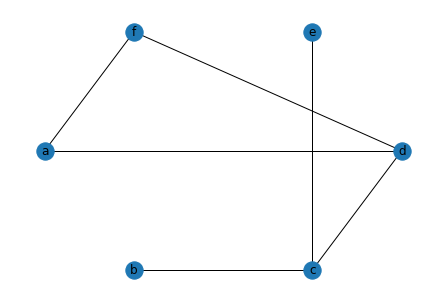

In [17]:
g1 = { "a" : {"d", "f"},
      "b" : {"c"},
      "c" : {"b", "d", "e"},
      "d" : {"a", "c", "f"},
      "e" : {"c"},
      "f" : {"a", "d"}
      }

G1=nx.MultiGraph(g1)
plt.figure()
nx.draw_shell(G1, with_labels=True)

In [18]:
print(Karger_Stein(G1))

([{'b'}, {'d', 'e', 'f', 'c', 'a'}], 1)


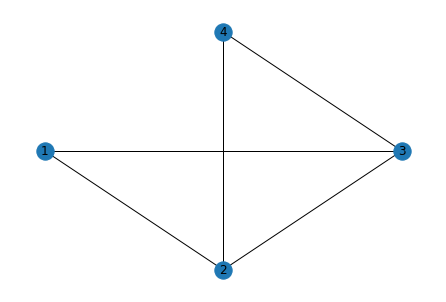

In [19]:
g2 = {1: [2,3],
      2: [1,3,4],
      3: [1,2,4],
      4: [2,3]}

G2=nx.MultiGraph(g2)
plt.figure()
nx.draw_shell(G2, with_labels=True)

In [20]:
print(mincut(G2))

([{1}, {2, 3, 4}], 2)


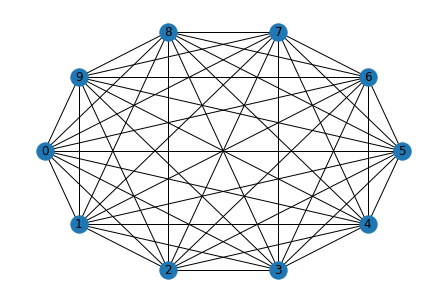

In [23]:
g3 = nx.complete_graph(10)
G3 = nx.MultiGraph(g3)
plt.figure()
nx.draw_shell(G3, with_labels=True)

In [24]:
print(Karger_Stein(G3))

([{1}, {0, 2, 3, 4, 5, 6, 7, 8, 9}], 9)


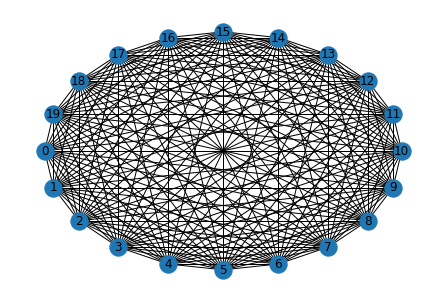

In [52]:
g4 = nx.complete_graph(20)
G4 = nx.MultiGraph(g4)
plt.figure()
nx.draw_shell(G4, with_labels=True)

In [53]:
%%time
print(Karger_Stein(G4))

([{3}, {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}], 19)
CPU times: user 2.25 s, sys: 34.3 ms, total: 2.29 s
Wall time: 2.84 s


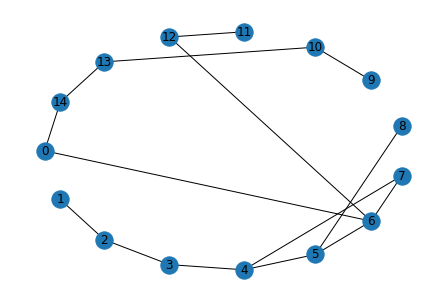

In [48]:
g6 = nx.connected_watts_strogatz_graph(15, 3, 0.3)
G6 = nx.MultiGraph(g6)
plt.figure()
nx.draw_shell(G6, with_labels=True)

In [49]:
print(Karger_Stein(G6))

([{1, 2, 3}, {0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}], 1)


# Алгоритм RSA (сделать) без аутификации 7.5 баллов

- [RSA](https://www.purfe.com/rsa-algorithm-in-python/)
- [code](https://github.com/kendricktan/zk-ground-up/blob/41545ead8ebe58fd9d66d06c818a7e4be7704064/part1/rsa.py)

Проверка числа на простоту с использованием теста Миллера — Рабина

Уверждение: Пусть $n$ — простое число и $n-1 = 2^s d$, где $d$ — нечётно. Тогда для любого $a$ из ℤ выполняется хотя бы одно из условий:
1. $a^d \equiv 1(mod n)$
2. Существует целое число $r < s$ такое что $a^{2^{r}d} \equiv -1 (mod n) (a^{2^{r}d}  \equiv n - 1(mod n))$

Так как алгоритм является вероятностным, то следует отметить, что вероятность ошибки не превосходит $\frac{1}{4^k}$
, $k$ где - количество чисел $a$, потенциально являющиеся свидетялями простоты. $k$ выбирается порядка $log(n)$

In [58]:
def IsPrime(n):
    if n == 1: return False

    import math, random

    # проверка на делимость в пределах 257 делителей
    for i in range(2, min(257, math.ceil(math.sqrt(n))) ):
        if n % i == 0:
            return False

    # тест Миллера — Рабина
    k = max(math.ceil(math.log(n, 2)), 10)

    s = 0
    d = n - 1

    while d % 2 == 0:
        s += 1
        d //= 2

    for _ in range(k):
        a_k = random.randint(2, n - 2)
        x = pow(a_k, d, n)

        if x == 1 or x == n - 1: # проверка на первое условие
            continue

        flag = False
        for _ in range(s - 1): # проверка на второе условие
            x = pow(x, 2, n)
            if x == 1:
                return False
            if x == n - 1:
                flag = True
                break

        if flag:
            continue

        return False
    return True


In [59]:
def GenPrimeNumber(k = 1024):
    """
    Генерация простого числа с заданным количеством бит
    :param k:
    :return:
    """
    import random

    bits = [random.choice([0, 1]) for _ in range(k)]

    bits[0], bits[-1] = 1, 1

    def ToNum(lst):
        k = 0
        result = 0

        for i in lst:
            result += i * (2 ** k)
            k += 1

        return result

    result = ToNum(bits)

    while not IsPrime(result):
        result += 2

    return result


In [60]:
def Inverse(e, phi_n):
    """
    Расширенный алгоритм Евклида для задачи de = 1(mod phi(n))
    :param e:
    :param phi_n:
    :return:
    """
    t = 0
    newt = 1
    r = phi_n
    newr = e

    while newr != 0:
        quotient = r // newr
        t, newt = newt, t - quotient * newt
        r, newr = newr, r - quotient * newr

    if r > 1:
        return "не обратимо"
    if t < 0:
        t = t + phi_n

    return t

In [61]:
def RSA(k = 1024):
    """
    RSA - алгоритм
    :param k:
    :return:
    """
    import random

    p = GenPrimeNumber(k)
    q = GenPrimeNumber(k)

    n = p * q
    phi_n = (p - 1) * (q - 1)
    e = random.choice([17, 257, 65537, GenPrimeNumber(10)])
    d = Inverse(e, phi_n)

    return [(e, n), (d, n)]

In [62]:
open_key, secret_key = RSA()
print(open_key)

(257, 12766238500047939120200885236782744960541190691335566522103589436723230814939826464530506235231863930523830598393446850495054952051064400254495160725811614719647766416877467678015205255898311595633257909304099840980755618143206950803187016395317598186440551394276290618505750207360833302936617134860071977041020236228471648690167862044123154635332957201124284633618473388070285739713662414563129775000462791261952981227783945300698032099001491917508983122993653194748558257754995167438532477578116080033210619974067435588517202761674830716472862905326550836126297527339329588584987638389201142519691361246540772372687)


In [63]:
def Encrypt(message, open_key):
    """
    Шифрование
    :param message:
    :param open_key:
    :return:
    """
    import random

    lst = [random.randint(1, 1000)] + [ord(i) for i in message]

    a = 0

    for i in range(len(lst)):
        lst[i] = lst[i] + a
        a = lst[i]

    return [pow(i, *open_key) for i in lst]

def Decrypt(lst, secret_key):
    """
    Дешифрование
    :param lst:
    :param secret_key:
    :return:
    """
    temp_lst = [pow(i, *secret_key) for i in lst]

    message = ""

    a = 0

    for i in range(len(lst)):
        message += chr(temp_lst[i] - a)
        a = temp_lst[i]

    return message[1:]


In [66]:
message = "Hello, World!"
en = Encrypt(message, open_key)
Decrypt(en, secret_key)

'Hello, World!'

# n-мерное интегрирование методом Монте карло 3.5

In [1]:
import numpy as np
from scipy import integrate


rng = np.random.default_rng()

# размерность интеграла
D = 6

# количество экспериментов
N = 10**6


def mc_integrate(N:float, D:int):
    """
    Интегрирование методом Монте-Карло
    :param N: количество экспериментов
    :param D: размерность интеграла
    :return:
    """
    # подсчет
    I = 0.0
    for k in range(0, N):
        pt = rng.random(D) # выборка
        I += pt[0]/np.sum(pt) # x0/(x0 + x1 + ...)

    print(f'{D}-мерный интеграл равен: {I/N}') # среднее

In [29]:
%%time
mc_integrate(N=N, D=3)

3-мерный интеграл равен: 0.3333662884425139
CPU times: user 10.5 s, sys: 130 ms, total: 10.6 s
Wall time: 11.7 s


In [30]:
%%time
# точное решение для трехмерного интеграла
def func(x0, x1, x2):
    return x0/(x0 + x1 + x2)

R = integrate.nquad(func, ((0,1), (0,1), (0,1)), full_output=True)
print(R)

(0.33333333333316184, 1.4696226645387133e-08, {'neval': 162267})
CPU times: user 158 ms, sys: 12.7 ms, total: 171 ms
Wall time: 187 ms


In [2]:
%%time
mc_integrate(N=N, D=10)

10-мерный интеграл равен: 0.09996611436189692
CPU times: user 11.5 s, sys: 157 ms, total: 11.7 s
Wall time: 13.3 s


In [33]:
%%time
# точное решение для 6-ного интеграла
def func(x0, x1, x2, x3, x4, x5):
    return x0/(x0 + x1 + x2 + x3 + x4 + x5 )

R = integrate.nquad(func,
                    ((0,1), (0,1), (0,1), (0,1), (0,1), (0,1)),
                    full_output=True)
print(R)

(0.16666666666666677, 1.4689444189005532e-08, {'neval': 86059617})
CPU times: user 1min 25s, sys: 2.73 s, total: 1min 28s
Wall time: 1min 35s


# 60% элементов в массиве n равны х-элементов 5 баллов

[habr](https://habr.com/ru/post/167177/)

In [1]:
from typing import List
from numpy.random import randint
import random

In [5]:
n = 10 ** 6
num1 = list(randint(1, size=int(n * 0.7)))
num2 = list(randint(1, 10, size=int(n * 0.3)))
nums = num1 + num2

random.shuffle(nums)

print(nums[0:100])

[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 4, 0, 0, 0, 7, 0, 6, 0, 0, 9, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 3, 2, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 7, 9, 0, 6, 1, 0]


In [8]:
def majorityElement(nums: List[int], k: int=3) -> List[int]:
    cand1, cand2 = None, None
    cnt1, cnt2 = 0, 0

    for num in nums:
        if num == cand1:
            cnt1 += 1
        elif num == cand2:
            cnt2 += 1
        elif cnt1 == 0:
            cand1, cnt1 = num, 1
        elif cnt2 == 0:
            cand2, cnt2 = num, 1
        else:
            cnt1, cnt2 = cnt1-1, cnt2-1

    n_over_k = len(nums) // k
    return [num for num in (cand1, cand2) if nums.count(num) > n_over_k]

In [10]:
%%time
majorityElement(nums)

CPU times: user 684 ms, sys: 12.4 ms, total: 697 ms
Wall time: 866 ms


[0]

In [20]:
def majority_element(nums: List[int], k: int=3) -> List[int]:
    d = {}

    for i in nums:
        d[i] = d.get(i, 0) + 1

    for i in d.keys():
        if d[i]>len(nums)/k:
            return i

In [21]:
%%time
majority_element(nums)

CPU times: user 652 ms, sys: 10.2 ms, total: 662 ms
Wall time: 1.32 s


0

# Задача решения теплопроводности методом Монте-Карло

In [22]:
import numpy as np
import matplotlib.pyplot as plt


def build_grid(n):
    """построение сетки"""
    G = np.zeros((n, n))
    return G


def set_boundary_grid(G):
    """границы сетки"""
    n = G.shape[0]
    G[:, 0]  = np.ones((1, n))
    G[0, :]  = np.ones((1, n))
    G[-1, :] = np.ones((1, n))
    G[:, -1] = np.ones((1, n))

In [23]:
def plot_grid(G):
    """график сетки"""
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()

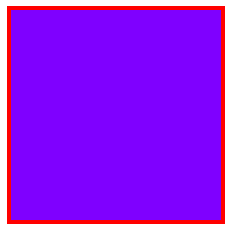

In [40]:
size_of_grid = 10
G = build_grid(n=size_of_grid)
set_boundary_grid(G)
plot_grid(G)

In [24]:
def calc_error(G1, G2):
    """подсчет погрешности"""
    error = np.square(np.subtract(G1, G2)).mean()
    return error


def copy_array(G1, G2):
    """глубокая копия сеток"""
    G2[:, :] = G1[:, :]


def iteration(G):
    """итарционный метод"""
    n = G.shape[0]
    G[1:n-1,1:n-1] = (G[:n-2,1:n-1] + G[2:,1:n-1] + G[1:n-1,:n-2] + G[1:n-1,2:]) / 4

In [26]:
def solve_heat_equation(n):
    G = build_grid(n)
    set_boundary_grid(G)

    G_prev = build_grid(n)
    copy_array(G, G_prev)

    error = np.inf
    while error > 1e-7:
        iteration(G)
        error = calc_error(G, G_prev)
        copy_array(G, G_prev)
    return G

In [31]:
size_of_grid = 51

G5 = solve_heat_equation(size_of_grid)

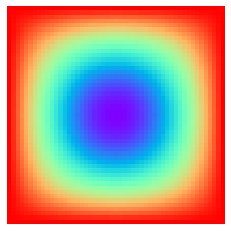

In [33]:
plot_grid(G5)

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt

def plotSub(x,y,ax=None, aspect=False, legend=False, label='',linestyle='solid',marker=''):
    ax.plot(x,y,label=label,marker=marker,linestyle=linestyle)
    #ax.title.set_text(name)
    if aspect:
        ax.set_aspect(1)
    if legend:
        ax.legend()




def random_walk_2(n):
    """Return coordinantes after n block random walk"""
    x, y = 0, 0
    for i in range(n):
        (dx, dy) = random.choice([(0,1),(0,-1),(1,0),(-1,0)])
        x += dx
        y += dy
    return x,y

def basic():
    for i in range(25):
        x,y = random_walk_2(10) #random_walk(10)
        print(x,y, "Distance from home = ", abs(x) + abs(y))

def monteCarloRandomWalk(N=30):
    number_of_wakls=100
    res=[]
    for walk_length in range(1,N+1):
        no_transport = 0 #Numbers of walks 4 or fewer blocks form home
        for i in range(number_of_wakls):
            x,y = random_walk_2(walk_length)
            distance = (G[i+1,j]+G[i-1,j]+G[i,j+1]+G[i,j-1])/4
            if distance <= 4:
                no_transport += 1
        no_transport_percentage = float(no_transport)/number_of_wakls
        res.append(no_transport_percentage)
        #print('Walk size = ',walk_length,'No transport percentage = ', 100*no_transport_percentage)
    print(res)
    return res

def plotRandomWalk(Time=100):
    N = 30
    ax = plt.subplot(1,1,1)
    plt.title('MonteCarlo Random walk')
    x = np.arange(N)
    for i in range(Time):
        y = monteCarloRandomWalk(N)
        plotSub(x,y,ax)
    plt.show()

def main():
    #basic()
    monteCarloRandomWalk()
    #plotRandomWalk()

if __name__=='__main__':
    main()

[1.0, 1.0, 1.0, 1.0, 0.88, 0.94, 0.74, 0.85, 0.66, 0.77, 0.63, 0.75, 0.54, 0.72, 0.43, 0.62, 0.45, 0.52, 0.39, 0.49, 0.41, 0.51, 0.36, 0.54, 0.26, 0.5, 0.33, 0.46, 0.25, 0.42]


0.23750373417629994 0.0009550756797804362


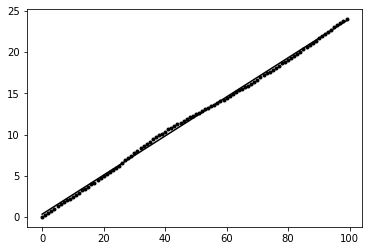

In [12]:
import numpy as np
import matplotlib.pyplot as plt

nwalks=500
nsteps=100
x=np.zeros(nsteps)
x2avg=np.zeros(nsteps)

array=np.zeros((nwalks,nsteps))


for j in range(nwalks):
    x2=np.zeros(nsteps)
    for i in range(1,nsteps):
        rnd=np.random.random()

        if rnd<0.5:
            x[i]=x[i-1]+1
        else:
            x[i]=x[i-1]-1

            x2[i]=x[i]**2
        x2avg[i]=(np.sum(x2))/(i+1)
        array[j,i]=x2avg[i]

y=np.mean(array, axis=0)
i=np.arange(nsteps)
coeffs,cov=np.polyfit(i,y,1,cov=True)

grad=coeffs[0]
intercept=coeffs[1]
dgrad=np.sqrt(cov[0][0])
dintercept=np.sqrt(cov[1][1])
print(grad,dgrad)


f1=plt.figure(1)
plt.scatter(i,y,color='black',marker='.')
#generating a function of the form y=mx + c
func = np.poly1d(coeffs)
# Getting the trendline(y values)
trendline = func(i)

plt.plot(i,trendline, 'k')


# Игра Города (7б)

In [10]:
# Получаем html
import requests


URL = "https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8"

r = requests.get(URL)
with open("/Users/rinatmahmutov/Documents/DataSpell/Python/data/dga/cities.html", "w") as f:
    f.write(r.text)

In [12]:
# Парсим города в файл
from bs4 import BeautifulSoup


with open("/Users/rinatmahmutov/Documents/DataSpell/Python/data/dga/cities.html", "r") as f:
    html = f.read()

soup = BeautifulSoup(html, features="html.parser")
table = soup.find("table", attrs={"class": "standard sortable"})

with open("/Users/rinatmahmutov/Documents/DataSpell/Python/data/dga/cities.txt", "w") as f:
    for row in table.find_all("tr")[2:]:
        city = row.find_all("td")[2].get_text().strip()
        f.write(f"{city}\n")

Теперь у нас есть cities.txt в котором 1117 городов

In [32]:
import datetime
import random
import pandas as pd
import threading, queue


# Количество потоков
thread_num = 2


# приводим низкому регистру и зменяем ё на е
def normalize_city_name(name):
    return name.strip().lower().replace('ё', 'е')

#
# filename = '/Users/rinatmahmutov/Documents/DataSpell/Python/data/dga/cities.txt'
#
# # создаем список городов
# city_array = [normalize_city_name(x) for x in \
#               open(filename, "r").readlines() if x.strip()]
#
# stopwords = ['не', 'призн', '.']
# city_array = [word for word in city_array if word not in stopwords]
#
# n = int(input('Введите количество городов'))
# print(f'Из {len(city_array )} городов было выброно случайным образом {n} городов')
# city_array = random.sample(city_array, n)
# df = pd.DataFrame(city_array, columns =['Города'])
# print(df)
city_array = ['Казан', 'Нью-йорк', 'Новогород' ]
# сключаем буквы
exclude = [u'ь',u'ъ',u'ы', u'й']
# хранение орентированного графа
orgraph = {}
exit_flag = False
total = {}

for city in city_array:
    edge = []
    for c in [x for x in city_array if x != city]:
        if city[-1:].upper() in exclude:
            if c[0].upper() == city[-2:-1].upper():
                edge.insert(1, c)
        else:
            if c[0].upper() == city[-1:].upper():
                edge.insert(1, c)
    orgraph.update({city: edge})


def find_all_paths(graph, start, end, path=None):
    if path is None:
        path = []
    path = path + [start]
    if start == end:
        return [path]
    if not start in graph:
        return []
    paths = []
    for node in graph[start]:
        if node not in path:
            newpaths = find_all_paths(graph, node, end, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths


class CityFinder(threading.Thread):
    def run(self):
        while not city_pool.empty():
            city = city_pool.get()
            for x in [x for x in city_array if x != city]:
                res = find_all_paths(orgraph, city, x)
                for r in res:
                    total.update({len(r) : r})
            city_pool.task_done()

city_pool = queue.Queue()
for item in city_array:
    city_pool.put(item)

start = datetime.datetime.now()
for x in range(thread_num):
    CityFinder().start()
city_pool.join()
stop = datetime.datetime.now()

result = total.get(max(total))

print(f'Результат:')
print(f' -> '.join(result))
print(f'Максимальная цепочка: {len(result)}')
print(f'Время работы: {str(stop - start)}')

Результат:
Нью-йорк -> Казан -> Новогород
Максимальная цепочка: 3
Время работы: 0:00:00.001364


# Задача о безотрывном рисовании картинки из журнала "Мурзилка" (6б)

Эйлеровы пути и цепи для неориентированного графа

[Haus vom Nikolaus](https://ezgineer.wordpress.com/2015/12/27/draw-without-lifting-pencil-puzzles-euler-paths-circuits/)

In [2]:
# используем поиск в глубину для поиска обхода эйлерова пути
def dfs(u, graph, visited_edge, path=None):
    if path is None:
        path = []
    path = path + [u]
    for v in graph[u]:
        if not visited_edge[u][v]:
            visited_edge[u][v], visited_edge[v][u] = True, True
            path = dfs(v, graph, visited_edge, path)
    return path


# проверка наличия в графе эйлерова пути или цепи
def check_circuit_or_path(graph, max_node):
    odd_degree_nodes = 0
    odd_node = -1
    for i in range(max_node):
        if i not in graph.keys():
            continue
        if len(graph[i]) % 2 == 1:
            odd_degree_nodes += 1
            odd_node = i
    if odd_degree_nodes == 0:
        return 1, odd_node
    if odd_degree_nodes == 2:
        return 2, odd_node
    return 3, odd_node


def check_euler(graph, max_node):
    visited_edge = [[False for _ in range(max_node + 1)] for _ in range(max_node + 1)]
    check, odd_node = check_circuit_or_path(graph, max_node)
    if check == 3:
        print("граф не является эйлеровым")
        print("нет пути")
        return
    start_node = 1
    if check == 2:
        start_node = odd_node
        print("У графа есть Эйлеровый путь")
    if check == 1:
        print("У графа есть Эйлеровая цепь")
    path = dfs(start_node, graph, visited_edge)
    print(path)


def main():
    G1 = {
        1: [2, 3, 4],
        2: [1, 3],
        3: [1, 2],
        4: [1, 5],
        5: [4]
    }
    G2 = {
        1: [2, 3, 4, 5],
        2: [1, 3],
        3: [1, 2],
        4: [1, 5],
        5: [1, 4]
    }
    G3 = {
        1: [2, 3, 4],
        2: [1, 3, 4],
        3: [1, 2],
        4: [1, 2, 5],
        5: [4]
    }

    G4 = {
        1: [2, 3],
        2: [1, 3, 4, 5],
        3: [1, 2, 4, 5],
        4: [2, 3, 5],
        5: [2, 3, 4]
    }
    max_node = 15
    check_euler(G1, max_node)
    check_euler(G2, max_node)
    check_euler(G3, max_node)
    check_euler(G4, max_node)


if __name__ == "__main__":
    main()

У графа есть Эйлеровый путь
[5, 4, 1, 2, 3, 1]
У графа есть Эйлеровая цепь
[1, 2, 3, 1, 4, 5, 1]
граф не является эйлеровым
нет пути
У графа есть Эйлеровый путь
[5, 2, 1, 3, 2, 4, 3, 5, 4]


# Найти  число, встречающееся нечетное количество раз (4б)

In [11]:
def find_number(A):
    r = 0
    for i in A:
        r ^= i
    return r

In [28]:
A = [5, 7, 5, 3, 5, 3, 7, 5, 7]

print(find_number(A))

7


In [29]:
import numpy as np
import pandas as pd


lo = 0
hi = 10
size = 10**6 - 1
B = np.random.randint(lo, hi, size=size)

df = pd.DataFrame(B, columns=['array value'])
df.index = np.arange(1, len(df)+1)

print(df)
print()
print(f'Число, встречающееся нечетное количество раз в массиве: {find_number(B)}')

        array value
1                 9
2                 2
3                 4
4                 6
5                 1
...             ...
999995            7
999996            1
999997            7
999998            4
999999            7

[999999 rows x 1 columns]

Число, встречающееся нечетное количество раз в массиве: 3


# Задача китайского почтальона (8б)

[1](https://www.geeksforgeeks.org/chinese-postman-route-inspection-set-1-introduction/)
[2](https://en.wikipedia.org/wiki/Route_inspection_problem)
[3](https://www.youtube.com/watch?v=XB4MIexjvY0)
[4](https://www.geeksforgeeks.org/dijkstras-shortest-path-algorithm-greedy-algo-7/)

Алгоритм Деикстры

In [58]:
def dijktra(graph, source, dest):
    shortest = [0 for i in range(len(graph))]
    selected = [source]
    l = len(graph)

    inf = 10000000
    min_sel = inf
    for i in range(l):
        if(i==source):
            shortest[source] = 0
        else:
            if(graph[source][i]==0):
                shortest[i] = inf
            else:
                shortest[i] = graph[source][i]
                if(shortest[i] < min_sel):
                    min_sel = shortest[i]
                    ind = i

    if(source==dest):
        return 0

    selected.append(ind)
    while(ind!=dest):

        for i in range(l):
            if i not in selected:
                if(graph[ind][i]!=0):

                    if((graph[ind][i] + min_sel) < shortest[i]):
                        shortest[i] = graph[ind][i] + min_sel
        temp_min = 1000000


        for j in range(l):
            if j not in selected:
                if(shortest[j] < temp_min):
                    temp_min = shortest[j]
                    ind = j
        min_sel = temp_min
        selected.append(ind)

    return shortest[dest]

Поиск вершин нечетных степеней

In [59]:
def get_odd(graph):
    degrees = [0 for i in range(len(graph))]
    for i in range(len(graph)):
        for j in range(len(graph)):
            if(graph[i][j]!=0):
                degrees[i]+=1

    odds = [i for i in range(len(degrees)) if degrees[i]%2!=0]
    return odds

Создание всех пар нечетных вершин

In [60]:
def gen_pairs(odds):
    pairs = []
    for i in range(len(odds)-1):
        pairs.append([])
        for j in range(i+1,len(odds)):
            pairs[i].append([odds[i],odds[j]])

    return pairs

Функция для получения суммы всех ребер

In [61]:
def sum_edges(graph):
    w_sum = 0
    l = len(graph)
    for i in range(l):
        for j in range(i,l):
            w_sum += graph[i][j]
    return w_sum

Алгоритм китайский почтальонов

In [62]:
def Chinese_Postman(graph):
    odds = get_odd(graph)
    if len(odds)==0:
        return sum_edges(graph)
    pairs = gen_pairs(odds)
    l = (len(pairs)+1)//2

    pairings_sum = []

    def get_pairs(pairs, done = [], final = []):

        if pairs[0][0][0] not in done:
            done.append(pairs[0][0][0])

            for i in pairs[0]:
                f = final[:]
                val = done[:]
                if i[1] not in val:
                    f.append(i)
                else:
                    continue

                if len(f)==l:
                    pairings_sum.append(f)
                    return
                else:
                    val.append(i[1])
                    get_pairs(pairs[1:],val, f)

        else:
            get_pairs(pairs[1:], done, final)

    get_pairs(pairs)
    min_sums = []

    for i in pairings_sum:
        s = 0
        for j in range(len(i)):
            s += dijktra(graph, i[j][0], i[j][1])
        min_sums.append(s)

    added_dis = min(min_sums)
    chinese_dis = added_dis + sum_edges(graph)
    return chinese_dis


In [63]:
graph4 = [[0,0,1,0],
          [0,0,1,1],
          [1,1,0,1],
          [0,1,1,0]]


graph5 = [[0,1,0,0,0],
          [1,0,0,0,1],
          [0,0,0,1,1],
          [0,0,1,0,1],
          [0,1,1,1,0]]


graph3 = [[0,1,1,1,1],
          [1,0,1,0,0],
          [1,1,0,0,0],
          [1,0,0,0,1],
          [1,0,0,1,0]]


graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
         [4, 0, 8, 0, 0, 0, 0, 11, 0],
         [0, 8, 0, 7, 0, 4, 0, 0, 2],
         [0, 0, 7, 0, 9, 14, 0, 0, 0],
         [0, 0, 0, 9, 0, 10, 0, 0, 0],
         [0, 0, 4, 0, 10, 0, 2, 0, 0],
         [0, 0, 0, 14, 0, 2, 0, 1, 6],
         [8, 11, 0, 0, 0, 0, 1, 0, 7],
         [0, 0, 2, 0, 0, 0, 6, 7, 0]]


graph2 = [[0, 3, 1, 0, 5, 0],
          [3, 0, 0, 1, 0, 6],
          [1, 0, 0, 0, 2, 0],
          [0, 1, 0, 0, 0, 1],
          [5, 0, 2, 0, 0, 4],
          [0, 6, 0, 1, 4, 0]]

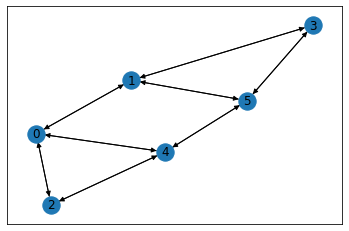

In [71]:
import networkx as nx
import numpy as np

G = nx.DiGraph(np.array(graph2))
nx.draw_networkx(G)

In [70]:
print('Дистанция китайского почтальона:', Chinese_Postman(graph2))

Дистанция китайского почтальона: 28


# Всего баллов

In [1]:
print(5+ 6 + 5 + 6.5 + 5 + 3 + 5.5 + 12 + 8.5 + 13 + 7.5 + 3.5 + 7 + 6 + 4 + 8)

105.5


In [1]:
data = '1843245343472903481;114969837749034510;3591136229644178518;5518506782192540109;9169919572500480803;2961265865280294526;5117390539497588519;8500878058245396291;9172550547724248583;2264506197246516816;1605981750134825800;7763391713410542823;58634054398165883;7204734058122279248;2172830536223085517;9072322261913676953;7717108408437444511;6440488922199874718;476040849515018021;8095401991469330721;8574751636570059947;3222778966860403414;7708456264969633408;4915503030458421519;2365264470846267716;3066323089988804923;131362552886362397;833662182605106194;2973374164070040142;1097031986984638999;2407640918256584438;4495817195672412091;6984415744287952105;2410470027196450282;6514469120049986442;6753535346931833142;4539624489759180287;3703842895120235796;6589975208011384642;9132627446269897523;8421670159849030297;133466514681805516;4104767231523379966;5660553278407554089;167802720699309432;7239667657830986438;5702753242496604192;6020044511010898727;1098753457942452266;6529941726599422692;5066348394973421243;1853678647409388190;1710780769525984877;6010594631983136196;6789230112395855446;9047914442051989795;5317186015104054746;2631196423816798172;6187659786671132825;4838057259625576936;873402310375592724;8604548017999149527;7311532138389011015;6426595486392302830;6967717214595703340;6025765096903525713;6341623532007097017;8885436171833541165;2746939872722357736;8158189354247686785;3216523719421454306;5649081959145931539;4180923431250060781;6137775377539214010;1059033164673385508;3451848878620348832;7559333210647443364;207186261844314473;1213292296570217863;1706981828335614388;5046241542979529147;7908741100446258283;3764787460621983949;795620184935787307;4104140348688426488;4479412470845245492;5730488413769485546;7917778081241620195;2093110372490469266;1064188015785860394;8919111784736138541;8318627463952079647;3823580969293058808;500222177398326649;2317837596320554382;5945261161674003856;6675472016312634090;5408077491369292771;112757433954411317;6647203282701060013;3127717016431751644;7488032567164235279;8733714969397573754;3361166163872264116;7760261034033066738;7784008514201796714;120614946438372425;7231200205722330961;1339322256141925152;311785738854167965;5911744526101261765;2382902939390928958;79528545901328591;3699369523287793968;9102452020164957200;8411172736160542409;8608850496628053727;8790361086870783589;676340272654243529;4610501986323799997;6856113410090845997;5873483054219191314;591671220900063992;342404824890530082;8728106413669170900;3988288884282752196;678743400424566289;9114156769146697323;908660922524202861;379312036993753223;654165964402781493;563518008703068871;5270109961173110646;3565981077208768147;8722589953792884851;5395249875734664626;6842716054331272619;3556318199909325453;1058639038983133445;9218751826838141371;7521244870632169496;7530009497633376267;8990219071812119612;6384508016457534319;3048151715142741220;3079706662278074;3238000629822446964;5717851297332643153;7357681261766808386;3700663662007585603;1141882645972946125;1309774136034181656;5220483804405084679;3740392232265537228;1186396268321239599;5161870603579436601;3970453529026935349;4579741401343282682;6185661974422794504;4522312288691547844;5726655705778203506;5336190344591482;1202997195105374028;935027149411588583;3589868292805567520;6986193035719428666;7769140132413587528;2452109010570843385;6143577933435244952;3412567881460654100;5149846918379309416;4796048243358400492;5679624880860392029;6410869541039478154;9219660691630395965;5247578424401618603;7016886183084415123;7172932544819289470;8412557881534313800;8741375428674212491;8611636928387544900;7761002620609600823;1852783059088858318;2677677937602612948;4157634557667516773;2020995180363336707;2810476437247807699;4033338052556619016;3937725328493833282;8692958842055775652;6575195377677201431;747772696745167689;8482428961924214667;4543042582540315721;5910539534640691277;6220790858466171096;1942996855185448992;6313746040525008904;3602260719597839117;7199173115168412619;1083109275686527075;7456829077830957030;4689728579554731357;2881332880816289434;9183284445572640170;812794560025470058;565051795058120374;2053822139299995081;275554826267752515;4608227104174849223;1859380515493554575;8072532325114091879;9037789881389790467;1798754851398662738;4523058078186158813;6996268163895797632;881014933420153854;4542373280934666348;8008664016306386336;263397036883226792;863516995322610073;5455190451853215734;4047918158397692897;6145951636761910635;4951904882772283111;2085203508696135694;5207035186460982147;2875135061700472215;5923414168225847775;5592395738041593329;3014864604996407340;3993550057823907578;1539173833092279696;6202255208346521219;890027839034769410;1364813537345037142;8652964874028306558;2583358874315180112;5576124266924524303;7567977497490719854;3018445648283473708;888210147179583690;1001599399163482219;3277393383914893863;9007883332438982903;2725686966589007780;1399999721246639367;6715904845654337651;2849371803055209138;3234026621826056337;8598157454973388188;8482483522755889652;8672473948279434511;5308917735785599516;3871246143902538447;2871108929490230949;106920021608039674;6752683723549152835;6901347489411184566;6567535084151851148;2758776401624314775;6185096512194363927;2051271129148868452;457755500079332585;2234979817706491722;3804140772715011119;4206739860371441304;8228022294070374500;8770933796070046961;8521334384861686132;340516134052626241;4100340063432547218;3234650995987744670;9188167134890492758;4853181110397163161;4622063191749325851;42619997527981841;6972935950743717580;1380125526403770793;1904347658797560045;8221553539969806056;1725465036385997716;3025343628211479124;8333528955327862465;2692170487410027073;3969938069860449455;7705757850243819979;4098173809925742186;5210250795508700986;5961240393665052289;1227619505715239170;3976921241287547189;1205923029394883028;5760409800429471817;8473912972740311375;6714678331912943796;6025775017824533159;7455948546511354075;7175817190800086366;839201206435856367;5597477012856580697;3853147611094353314;1153894692690763035;6562123499953047188;4457864797175839468;6951125147794984723;1071133260942600308;1878328080318464022;8621739897449221652;1717921679426061279;2115909157674937107;2209969253511060552;2277492062360648738;617896175348953302;3128786810787446004;1550779989437075047;2000180106627388182;4193133629002116082;4322519163038058710;931779696653035518;3669717179148015429;1578761836988045670;6234111427208193204;3115066164984331786;7291438832471107527;842801617421177869;881114482175947860;7419998821146141224;2203474627035558329;3824914631208653400;8150032482072486198;2745538331404728421;2846046665351506426;3423800872927756642;8801469682280957596;7382660971209049589;8308043715347345637;4269308219387288868;9138758737675733364;4304327391974039074;6343180782400384262;7816910823978265112;584094856873515107;2963655953608150318;7794104261904600770;1848107257135135633;2838371552414823859;5202307374568094038;2379994438255812923;3885348176421024540;2542123722165942074;8665448150763080235;2735699334711327134;2681866757820330381;495362522572763919;1932579216322259150;158310594630014028;1901199117216651727;2413427794542432836;7203388237921052985;5510792036206457246;6259096560870928325;1218423821317338203;5412028465712486259;3161079344683928748;1740989660744257662;8728389779557147462;7313086518017106642;8152862728854059723;4047608718822481022;4277136663835802408;91797955484547549;4309481627702879621;7754223865907448040;4466792910465788876;2267640584265784805;5198793840179170976;37278557503533293;5606237550087840912;8695287655981919724;3211277074592374352;2850196678692312631;6933623528539116812;6977734465485781279;2456025708921373139;4688653157692466697;941618259697837614;8763189510466524400;394459407962008504;5818811492285638071;443501088364628422;2712465018258959478;2284404013037544053;5512113404349357917;6268801713882203138;7726218336576381504;5761034767631579162;4210998316846904896;3610206435442564272;4991586945814527782;1644136845410347440;4051643553491658501;7492247187790965242;118674417566016955;7183046168096588425;8860178946737752014;4336508511999176971;9055410334193278002;3688106243372328161;1167309278569055111;5174457635755723995;1038110475715965180;2370803168919310347;2791885362867742486;1139625277527668292;5152903907853302200;8503908361663870014;2016609639991577633;4983284013176231082;568271688166208385;4999330164191160499;7524866528612627728;5557836896833664066;2067318448672517755;8008991841896059770;5522580297825948066;3050126923994633406;8222372204206294673;1930054116995618824;7890305503372622657;5658202200209449103;2536820844386055150;4037632437704317983;881647444472072266;3698813176558570760;6371989063734561543;1656471366819829238;4128222034514985620;4259169760648914366;4724356475208953209;6592973441798128828;3983768057901042249;4563332839468461929;4761302013494701016;2286879225043476211;6865198541495002598;9095389364292339735;392081463543288914;2311356254462045618;7433544085253713346;542724420744848340;7921243029757559609;5864353691033096120;8277157766038858597;6852783827601461884;6958510569710526684;3362555269731388521;6221506331748675262;4591093685068105584;6499892232987995208;7900287627774473738;3354625474810937565;955095534514243351;6988070542444485268;6255793706306437083;2555017021856584496;5729365736670295883;7223567651776895809;6190865962272877324;5055714729132215774;5161188144909332523;3204070437031571045;5299986627606731697;7129713075732030351;9131168440400194111;6606629970133175757;2862061837159590171;3610975315887269991;7157628698984692039;9080746825554846954;6090131266654647360;2356731499393364988;7208720050625501510;1876079858783255468;4622418205474472403;329052514800826639;8301950982891678931;2073022000474581418;7979530058093302170;7523043457652087118;7136895293663375995;7737679276660803690;3614804124683595878;6322118823271714011;4650609441007107138;8167065404438192416;2319381311157459667;4444956415938005012;1146268440004916343;2430571106300882666;1821182197032692514;3842282792479995346;5507791435425573395;7950587565395728006;2449562385257350078;4422696272162779379;8944541349603153859;5298947101439430575;567359469550066757;4333781216444403076;2005865120167300624;780263730804886565;14475290487859785;4427270637185094755;4889818777578011117;6247085580212402570;5767586492691527725;5532207963259647714;1283092524961306790;3973102178129418739;7178104889722921326;1066654779222575648;8611914331936252865;350058287197266432;7988187289881598391;6464869772537896998;2323089290902778413;9010112560568784671;3076479187620741140;4265621757249889100;9179210401532291333;8116319980063878943;3120791246108897442;266597667818896366;6436147361108769715;1100113039161694367;5274831444590646934;8808302626174340326;6704719580179754332;6089941941288305284;6319577807267007736;2825921914096137050;4676390405912217468;3597481640338194972;5700074821468445823;7310198082886079811;1665006028758973010;6068027768323806015;5022357225513953844;5948130123879445169;6333206260664596553;5582556611191358508;6720092962049088860;2338289452772196935;8663424563891068115;5843782487623260361;6401808973748329145;2714358858849931604;1936049804441281793;3260064301914153450;5613008890529714105;3800068867774715370;2497655555253823694;3461540951259153551;4600854409631289953;5281017533230418812;3942863256503014452;7546002575426012070;7276741886518593740;3677721998915348981;8271578540612505494;9000332273340341827;1978434939670085985;3290242483868822101;5890581734744599854;951668941476120431;8465884831699426421;286100878724478144;777968671007928416;5712114517069655511;9049196327508666770;5440135935515435051;5360501520700002606;8534336076514428377;8200975889879827947;7286238976257348546;7372110529748423772;9196715678240166720;1170762985845665592;7032941271437653497;3293040524512430693;154625995653262541;1261225463595046184;6884240219677096669;1758798312160635563;6764486217412697993;5610825369893432046;6344318498988951300;7138059353895185551;9163322421118482255;7534093935526734656;6091240629382047049;7435457381826136087;3870934889313326186;7177570855431168184;2664873128364906025;2270244599678157141;1421342988899085269;7497630808958084099;2675807908136748347;564442964725053169;9085306273321438359;7265593257254333600;2237199285043196973;7094416845368885595;533273367742987882;5228162150854667134;176713975184650762;388126933690902648;2897005606812989742;3183669395835597478;4552824974478898440;3734298401479925685;1035860093748610777;5882565036108179145;3211740184226345155;1553896712434885294;9070114159142823866;5155358183182662564;7866766859599647436;6816702147675073246;4778692265388700552;1046339291055082100;5642154589092819643;7092758743476034519;4191797985387378345;6509060452697125258;5568720262940513186;6236806856416669753;6489433486990323759;500184508358781116;5443959812049270357;1577772028899538356;8816761153594982695;3795640850604783345;1676084798859488455;7663479275322569755;3665091033460043365;2401107098947590321;80189034847775134;5697831835911087382;5774040270787150344;6711583276958130354;8914030317088978544;8870241189703211358;8032376986481569078;4284304155230428163;7522374103894794382;6542331805101854887;2652399029223822491;5550412105594884788;7183689520357863950;5643353897482852058;5760687103468683168;5343661442075757650;8472063799708676878;1126798627120159045;7142204024257795862;7107394317720755223;3849194869165814369;1414221766384431918;1354551613183491804;1793980005863277687;7985760377417444457;3713707688470423858;1015815023658547170;8276863771813703740;1176197850663266923;5285888869028907745;8517431943249237752;5969813674877716204;4747139408045713669;4619158157189403943;3510418809548391551;1245296737560279653;3584095465489528210;4498867191203356874;6185866820507197439;3838272971444784675;3045323785431078155;2812229824927364940;9087424361864657570;5047684159011453877;1506446541105870237;6219272572999472115;7650947269324133332;3131506464458378149;7704731589777422503;4617835724923251905;6873707893287692214;8722594381604621322;4247891713316173206;4612194628191850705;3110302179667307385;7944898335755347921;4150389871658729300;7528850727173132279;6826530192990322404;4636649594044021014;1166814299362627184;7489388198387249736;2796058757827205296;3284992952555974115;6713588388236501253;1991596226768597402;5902655095610387081;5073087752348868981;8198623751144737976;24729444031155748;9174917910193668326;4091450986831082882;2190436237772227010;6621344784559479947;9151574917372902067;7488232079773567390;6540693963687339649;3664287715507882786;4485525200837532073;3608621587074942190;3954226490631452513;6563911156639205344;4095828061882500676;1264809080415971596;8579031028199040027;3245410207102859080;1863756457038446212;7367382579438238491;6909959670709218576;3118535030559653367;1776103660988630721;1566176692130888148;5690083879210986367;1227592568012104592;2780532162385829334;6760388636940896498;6358625666589865142;7125092865715395914;7429041274177587799;4913267430911776216;2628908872116933975;772111295490028502;982408377272657451;9083826532217125028;104759859622318516;8074582796726008141;5343029275537534088;5576743520790841071;5764300851447418528;1638826650835008295;4299062750441987802;5813414232740118646;9165926326414541769;3461542024376747911;1883976785835535536;3094048641149310564;577094062251614574;1621059075108486047;1153893109930534836;8172401594782783898;3522378506262833695;5379983565349593595;4736136732810483863;193392105165535524;366950292591504234;6294391803050838731;2427997332006042539;2139783410001606298;7599409303636659494;9218744515521179871;5400794193608770080;2486444605624132921;563648124325686914;357987603991245871;9022751303251715747;7953196275624176035;8427033172022173585;3945274029004531438;4278083669110780209;4784716163967227585;7620369551780386043;8209885900862260662;5440727082628823563;5994097358492755446;765209290115953217;5099992831779194664;3326267623575310339;9043017129253042084;5340010630704024014;7212642469283064687;1582146215972217272;4329783106254324584;8987018722261432417;1263040578861284388;1898835219862964517;5206693983734112039;6723051965706736559;7465770782987308985;7519256636795296790;8556942116992651397;741187987290602483;2466263470135853952;6664631988897618694;6902736501313775342;6884629602325128110;4879744053396132131;4951945232179969983;8205708744513044195;7559455336962000398;6159358371145395882;1479423873293987669;7866782619722468753;322043266845336849;3721026250920466993;7214221194084750407;901557855271249048;5505384941500699388;2601686489655423727;303569522358902380;2075600902621700287;1226355095291246234;8860310495611842239;6887954687213564904;5345267810610289144;1596672040135920444;6675203929475187585;8421069723479671469;9053936689300746880;7615719014627697293;51195554199550582;5482037089595294148;4524885746917757481;8166769725553363150;5042535536260386123;7701171377786036244;2360319110800746131;7554559206594610288;1634847944504766147;8909027383028073562;1839879088655704121;244112194008132832;3563494262639372007;562479966592135511;8437801483658663291;1225824011900530329;2932668744314996894;8209873323755211744;2544990661485708906;7575761307998440327;6545350462158462390;6821212441173082475;5282261377170990428;5042009129748204039;680678164073108638;3399960546120470367;6907309719202415376;8162572953006230750;4228403266974172009;4517574713784950338;3726210692752286112;7662096499042300498;6802073999068283885;149667134746901465;3744091156978717566;2517461759043400152;5095890886597645741;6983019141041407240;3168897237320236510;7518086989483794425;6765213191797453243;5504895595665901811;1386138086934802219;3127439882500471452;7297871099886074198;607062962253035010;6834870187210380131;8645718783658104393;4141546943840757018;6092598348483915843;2258738404128985598;8253505779066146258;8510242930512513227;3080297421100929721;6866943676673439197;1666055209224641649;8650998784404640626;8944549196988626671;6997100487413663066;7110184541823418315;7188661425513892344;2759819741829768322;5607151922717519875;4405899119068198131;5358073154657815424;3619105128644830597;3011268775045278819;8222156481855168466;6481355795528676010;3466863719477839408;8044945596481731659;7662955145387888293;2907471726038784566;1471299616737733413;4217186597930532674;1571317769301381424;7322287892367734379;976139889493984200;1311310796166268166;5911550008279720452;3886054052370549007;717599300828442685;4282987208808996667;5529893909735036325;1630969024284850181;7698011942538475564;743801862934490618;1810730403141413256;622437976887238254;3316586331996450979;387766786614838940;1295043545583845559;1414068232024350360;4610398600718186606;3495200646645000360;6431526587770832648;5380316304649229366;7846828524518410387;362229697822560760;4270321887293468040;1994230094258629491;3972845292471665471;1342632860330776696;6685491963146937011;2008483803520088150;498893444877001747;5623859832570780672;1709366706684235243;3066715732536707723;833516434016032312;8832725847636812282;8860958628687218847;4139853804271417241;3856621094078732707;1142167163529597577;8808185227292540063;726074745759031899;6999152595445216866;7395766985969416091;3787420459726221727;3026171579397832637;7234566525914684008;8867733578327527820;4333635494017548594;4977903001753337305;2970540419557378968;1765251442226533489;7461111953553886713;8709834779026923222;2506692572351153553;4686671793340285849;4349930285775716352;3893388018635132954;7778915069607180653;8614697554031949876;8227612124306992976;2337606194478504040;3541685320191134620;7157910898489788407;2998662962736374521;4242187827143276849;2614960318021236092;5357382022042994636;9103442504509809890;3434454883628411989;3464810001711644904;2833337315330738589;8891230502643815027;6185504007363645169;5202873301360971754;8752851774302699712;2783339244033209985;5952986179775743447;2480755152952528887;4640199031031359215;5033069246528920496;1730253711383975602;7015804192521488451;5747014372803764330;7931733168138195812;29786945091523319;5948691728545426839;774266568332114182;654051264102369520;2457072790353058209;3101573887416008698;8306826378729405572;4875015515858535868;4347245937158792001;4889547052513206520;5915400010530104713;5636257730374427925;7028634088275235531;1078209161801465984;1412910570871606927;5902685204130065119;5522122176549488561;4915698811384432753;3947841440954884445;2711474235841844685;7396736142305830322;272523997779930453;997554600190554477;6052892708439444508;7781812779970236175;52647620299122708;2999018017264235084;4843738508538580302;673031547788526901;3850540924062392832;3644523767295386008;1911208380769729329;7831619300119936283;424446455876292257;598271011413160060;8863541156734752052;8164926493766060634;5391596141372366735;550910252353382385;8752250841358759667;3113914906637669724;5658691512812804030;2035540554402607102;2647842734486578850;670995533142619430;7036454932169422833;8864358767325469483;4452561865814449890;5091306767800457443;3663993207994191751;6411765389907084788;6703116249470068227;3137339280276584702;2282251703709880274;3042620698248996870;2358461933061696848;955729587868975828;2669343858453291489;7232923351650653285;8495920696369024375;7124904164924957386;586255683182851750;3331869398294862998;2414127954713913661;5355508084636136919;2349069133738873375;2438861377522723017;1361819006706085222;7265101523103948425;3776908422698892594;6680893098386247904;774740626912509627;3104709136293733474;4245064138734725962;4137163237828801768;835776806069844659;6987214337183552418;7453906541134161712;6954549948995180291;1144510091788668754;703750365883531796;3542385373739264874;5425597675672551333;8464738520538069700;7347817957423778240;5328325307295444123;1052235267930112877;4836993163443691573;6742004391025199256;1746503283196003683;7308676731573334971;6191056758283769897;212163158890480058;1558404539765092477;1808476388094814308;6945361565759371876;2395065267319918267;2477184272158993355;5513892614882061717;8038453148934625043;4019692181306727270;6216490614339019605;6625688345630616391;6726210343628807425;170048462874662842;1956319769914526098;2109539066296794108;6491536250615205487;4027243146436803110;8496386126507880099;3039980479104891007;5338356087871544467;6342934543168649491;2500757939456900660;681361324903297719;4246055059666135532;4242344790138017917;5609895005810452880;2811580557375663512;4366184230968046755;8334822937399496853;1649323234992625932;4112925983358392509;6729697866233715238;6491197774220535402;107708718476123924;6094687929851783225;497521971765194273;5198926190029949068;887401597183142412;53156066123011584;1933532956567185963;7925819595195706759;5310165715185284973;4062710176856203665;7605350668073768841;4828749653462212902;3757157351693849778;7665582303370359467;6863148083879930901;7055520896215333885;7349194513083069451;4784172381603846704;938986017006280019;8762209538203994865;2853533406804155011;8957969760921241791;1225438700303696090;8607403700331705436;2192096657009877669;585569018282768482;7845287643232453978;1892196592967213589;3241915976411123258;3591721641697205814;3051144115693775229;9195467650824277467;3096856288545252234;6555193086132480179;3944704411020200876;5004903357994687093;1638267869035070070;8430887801256112778;1698790931165277905;4873916229834630811;5688679867406066564;5794656279950861325;8802993481114720990;4926119511138795099;5040635638079578923;3521246027908566233;271384005812710952;1348353456227796058;2566143798290406489;8040837275060187134;326643142365758519;2728529657639434393;3411443004321633356;7296827127560179578;2059475278803008505;7999116718340734485;8459790735198761995;6757106203346661509;4712155294371555705;8614624086864008724;2149984520883435179;1757400495462211557;4995155268938461090;7283432286371036935;7148112183021625341;6416275825009419251;6671812316866270772;5222514047939373021;2863657905395601146;8003838277085791231;2431725701702644631;5503237551120427237;2801732010130515773;5507581177121353253;4036842387446921311;1965356398794675797;1883663440482284438;977454514818771840;2146565098775474503;8059529762996543552;7024893601917782406;1731345062852362098;1409887963685410103;6371476972034539095;3691038203321188214;4714697117045681628;7797687079648696847;8141256776606794226;9171800949689797675;6637718420836571496;3612877460008933837;8106834952046022280;282742575623396441;3174701353013750094;6188302797295833841;1571300943150897794;1108936952936265515;3070715719059229285;6703770656150922069;170859959575430921;144643918271308567;4033335069263383469;1530294097220500225;2481818797250753997;3909744141594629377;2328605533069339498;1906693350594565968;4823280553474832504;8908736615506011782;1222934673286253355;1198258253907637306;4180377616305596652;909889148081224061;1613935242302250596;8581953589901606735;3016432182087811457;532802033227229514;8148847161443973196;2556058499961544560;8541728271163094697;1179076434477482404;4124263295692918031;5628132373593843821;5493673574442540927;2837790702837285156;8985645132240404977;8735682927389326763;2592052079476581408;8037828677748060194;4291045116880724547;3797489260510788583;3545161501115077447;5835561982576002310;3544999036559420038;8531169151241825971;5441898736576189563;3673715247466999715;4893531581595174490;8399720927151135262;1592344193660003255;1013918298151395802;779757219992547461;1959158799278438294;7685468275752742987;7280665816978860390;4976121676024576593;2166996233431840580;4469048234752103172;5373448387167280969;5197383491399327909;1901065195452273227;7796255288360165382;341095071219037624;6950768756581823067;497676108259061682;6229567129042027672;6141225943022069688;3651935393075875169;405735662145752763;6652072754032975095;6082125823234163463;2254407012464732907;6698799439900514672;5196745110524527063;2268563814572428957;439466182575370614;8566999598144288388;6221893045390236236;8642032879866109975;3856619463269458663;5496421791393911351;3015387492091866139;2396713714560245042;3097971405730200863;5811247842191600024;4707790833548462064;5720715706799980778;5356987465168263069;640424303440082315;338783613239086853;1739753727723538624;8129178045653714760;5216106736336411965;6513877013167668458;7664148838515906148;416115817833764133;5163104880545233090;2639180984171291244;1835441205538241837;585709347616757522;341019244720963573;251000890622125446;5307645127186640444;8203269231532050017;7130374928857943411;7248620623641655186;8376299720356431558;1154209559375917196;8403361616675682190;3382399308225679500;8210427032625453683;1257503417999842442;3067350142280152618;2310007806400589366;5047180574700058710;4859780096225518499;4630896099355357424;8424123576887150634;5389764207843748968;7126949646870191399;6996157113802745784;6899653155551445734;8964129671711079109;6303295624370325888;9002772534161928361;5457647068588585898;8529910603519920021;3132567414043156813;702931268634331176;2638497083950955839;1248719678877196157;1931651772589168730;7255698268388455135;2611880467058475380;8553391029314440566;3920618383490372271;8182142517007284883;3925042254174498088;7464139002824428294;677639003474354208;3327318504533171439;6670407757860881691;3037713351480778648;7957234179412378098;1824346563420141379;5819401540716349024;6602458886387548476;1851263142818322199;6159887491444567304;2310713996966528177;5788906679681321129;7322705391212511005;3447303038929822603;2021052279346583870;8208479500060036913;2419738561718759316;8975434639258809628;699057897915384771;7113740822456037834;6793584676590634179;8246747420739102438;7880103453559342261;8342450057657446740;5478698276177359793;7489522631646387703;2004300946570913542;4220635251602338634;8863336419099384333;111000245300953930;7766353419877587006;8482717953170255789;876795206238784346;676733803569701782;423477216420129804;6728789395762150838;6173543130136139794;3169568161366909383;4165563497364986694;7064647176168897080;852984370160023709;8058200012362923947;1784409498489719639;2052541901332987179;7728078270256509967;5081201793859268079;5938249054394017836;1969651511667928706;1652610887299095629;5153148897902206248;5259800580142496302;7745464687593973035;1426804309034533179;2051980609284492544;9187496884045986113;9158532759716537486;3520804037100506387;8928622882231643855;8761983303742895418;3038842843094670116;4848874441935030202;3026571127736379881;8458242653801576809;8095779618341870454;3594721394094757494;2200861194202319935;7890070689201314784;6286768164790704970;9076726259335005779;5465313071678900613;3573860838557648153;874533300625481976;1577999276518347848;527707975987825888;4530567988987762898;7838878233691970412;3418899555390589083;1052847300198171364;1935553568250175475;5906461213265936141;7143652810535769458;1809202254056760697;2002360453524180285;6949517132456331098;6915034962697312798;5431594738707927756;6467576131473510086;1048015284894308435;6637307678215499367;973077920528978010;8692453729292382421;1178918108673767130;958490776063327974;8092032829259737716;5808680231961052667;7253415404557191874;2354840693020220698;3115990626965789893;537274619734268941;1136063792286704808;6790977904938596475;8391954147851427656;4397810640544853459;1231131138664937037;2394096714891568011;5320894758101583564;5557635235530596601;6497861733174924418;8373936194922155670;125572532469640337;5658313603766706708;7767504709425081927;1216047176539265665;5325816702389477813;29566106020951298;1562126891436641857;7843741139878719812;6188259341194461891;7436802933567391678;8872666117997091173;822864356633739380;5205857781792943849;6664139812560424841;2562368418894053856;5463618064105307096;8533419061920645983;1559555098432311568;892196092158480853;6208499962364588366;587215966788551561;5557334183835328279;2086781977072254928;7466515902318816292;4179559575779248931;9117773055674835648;269601002126048691;3410182458123867893;1249200416045048484;6795365759548868851;8406171130361277925;531283699739594100;7212262662899986303;3572996967780062104;2429598363704416519;8398149697337454825;3320205962921120888;4610591518321429946;125390437069417386;5575799350819271026;1756232280619204316;1627870510728416831;2597009004033719762;6795549120474654289;8411596098800145699;3958077995737405628;564157502168340719;5315788267149422192;6972008396960066020;2977686681691661524;6027700957133090276;8754958515082397980;5406830920117873398;6022922219439383968;7363301830790050548;8842031579865370697;7031735021731702597;7099431990331577234;487488135518297793;4409108472138666580;7084560987753363548;488450780028535155;3903362875642849574;4726006649173004838;8177099169251273554;4515088561339231268;7828148709924074114;2142083855456262827;5175968060844270219;7005809056925525727;6185700599510680181;5484445650608412971;5515969558482412744;2492935222292810433;1980110980274842195;2308961843735241361;2193825452016897821;6569557399996624900;1957296885542967539;4488820367894917230;1133065943819030151;790452721095475159;4831277932574663932;420398237605973201;7191613585657957400;5873910487923938698;9138888148690942078;7026587034365974635;8959252560101911217;996569553136063429;2630054924758032536;7850592649706304931;6718651125612582892;1239252096161785075;6261426564815011569;5719712415066606502;6394260816736150148;1332048497124471571;6338912274054124640;1853377005010193212;1165540928334402513;6342780156734729446;4394287994504876519;3206081302737555894;6882791042667291300;3507616280453819551;2659749033564618151;6730349208577793636;8075874407483538168;8781788261748978992;6473042275774995553;3958455623499091683;4843450207340410483;3147116875791235868;5025455406579372702;6089684013499254976;2799194027434071906;3771649769088816810;5905202530344842526;6668388925968123316;2753722012312268173;8704790200736367710;573719845806303843;4834104168274616358;4827897174760034371;2955979562742199665;5608382912665120082;5187715594841674526;2414352078305686198;1371812893714812507;858585902117617967;8044158186145470777;7339713566739562365;4382862881181878136;2911879045673603404;1770394239803887860;7210489597775585889;5548105295232681505;6950206837431948581;856877784374203398;6590033807609494101;2423328255022070067;4947765912836139156;4098125339127168972;7156736591961714718;3721476805493396815;7673919723883559916;394808898958672821;8760368414723384097;2880974384723161251;4541101410463215662;4181554082523680081;7479813351201948814;5592478321147537696;8553897094481060552;6884977409251624082;8960285860864404261;8333907430189921119;4024791037930082307;5232704196589729877;219368523185085024;3874469291536941828;7872883695129382533;952241201811497171;8074375145780184530;3599842502313101892;7667962358051436168;9090606059920223156;6515674922527838465;1876994183719264087;8818419557980584108;2222825358071352970;2524294690606849100;787056378652184328;5955237764261914185;7700115060451050458;5930952654477671480;3871749494806114860;2619323290759743930;7848648619940013157;1361293018630044142;5143658743776400555;1249968150268767156;6642619626960021693;684127546373528095;4682066896697130660;692271971107173555;1766920755289249782;6149693809319979223;5302605526961034728;1645287677041607217;8673197117416788524;4731271150045065968;3774993453295145681;4954746772929895986;5962462165785548208;4014134486515369048;2958985507279582056;3466097914669126674;9087251328823847686;7129272718005115622;5838912019820200872;2175114812160864171;6337195835683145647;7977888535084981095;8644455695545775697;5116278896784582637;4466669856046900840;3860214318037871078;7430270927598141454;8377110431916740853;3331470518374013928;8917712410403044054;8930057320601098842;2717321641673968398;8520205314506482662;4531513445328266653;6297044748019218506;4101288085020012073;770937528931606337;1284646337429282997;7159157386511029759;6493161215883299901;4183352934883338870;5552624807818561998;6568956501475644755;4660468292619352334;7337146102025164346;1719167314663759926;7529186501497764058;8942305957131427661;1900389291379620735;6595358613505429227;7211816354874904296;1659165533276207316;7065590058909251873;1790162435408827906;2086112515752918365;6339044377082577206;5560867762596566480;5813964822710507350;3530031572357164719;7449446183132237192;4721542325345785376;1939972954987720920;8025692868395780302;8628048799154796676;4452355439230362715;7085083425571975640;7387914508622453854;8577115197770304194;7539551535509513922;1441178787797526669;246092010182082301;2509062171542497620;6517274196545311597;7301425319231977465;1369418731861862568;6490041556864350386;2276098427368551598;6597185483158238615;8725885632776242773;3348855177109932453;5502248023254751563;5902428805483317520;817905345989277780;8510736623903245968;7960829004898652275;8885294489112103413;5428603476577707488;2428951128527604018;6995383704940118691;4349490348097328930;1012974129652782749;5711469669889718292;477665629137492082;9141866771734972424;1412610380719986978;4092276282877154963;9167477559510410698;3449118756486156906;722044656033535861;5879013200082975337;6512442165022246266;7878385252849073265;3331680258021237492;2224940157309495737;3501354435900333875;5002455565454526153;2163580431870025186;1294152822498777551;2117634792462176943;5592531625841517994;2779312623798429230;6142903202118096761;708697583449933098;135340458431254073;7421475552190372189;3486122660517265654;3320745117819823920;3382278072093369552;4346056704590300718;4127186808826573222;3127503504526702993;5536187057734281193;8850530531935056373;2780512732181399074;4128389294869694424;4048693890317309828;9008885830327187452;1181875761417515463;8928383918184138376;1278546825103290317;6796867918698783239;5149116538636983064;2868393009846430714;8143902576702450347;1754367860235776380;2775543233942816954;890800644534099238;8044317924788856585;1160079364426923568;1051141772397065294;8087176235936098781;7530703196568356657;4643249618461859585;3556656385931269669;2852085088306830445;8233283629874603613;9181719542615137776;8856832485793788791;5482643404456758883;2469168721654927707;5009301133920213081;6904726605037954406;1351803155654344538;725148660257602051;1817385037792098892;3295554801570246691;1036502374771942937;7645321406576690064;7977700070974785992;3290018197192103172;999170950102825684;7449802049403088768;7399632998964697182;3470389737111582273;4126676079050316698;1145119569877009105;9218719053934680227;8300902462848986998;3367184849228377642;1636925303074680517;4824104147140218365;5505149838141156787;3405592975368584971;8561655014212767427;7140042498492979267;3288256871905734386;3528393571845100107;5910049949557221107;18623098870531850;4171270906149813523;8818357722053866377;198521556002426917;7827588078548848407;4309967815221014360;3741825184111157830;5890572374642037423;6538904735007458715;5365383566387855040;7869206371274624865;4335195802260947209;5075285069929031890;8671385689804068944;6300981345099442487;8029361856212388398;6568155621318527274;4730550953740072906;3858007287472255457;1687354788028614480;8985763555564762229;1172351467196453780;5831623828821826480;6974887805586903140;5376252240567639997;2072592000380433256;7581513906540917262;5408040247807573865;3978270461911554310;7895913064781734841;2309962867083910539;2938690463555888435;5591512715149553329;8467063296121996879;86030736340854798;7426156247751197766;3642353815653318757;7247024679622924212;182500136321132857;8732877095956751973;8249914060881688508;4916811930274232545;166383016504668130;4262684885866884532;1790056777351786272;53022425922276818;2088227935969962858;3362738433463891115;8224407895926981691;6327862515225228966;8909365636710386875;8542346060126946385;4647327587733578683;7399449931046646660;7114762146267979736;8567173573879272144;3306812942274219879;8918860296892724724;351612882481057335;8191064187318838203;9101463485942421721;608371104450208510;5038777518722277344;1187749174710931945;4397667257369242694;21041677368637057;8959632756626813315;4313678126429823369;5819039647243791916;1364942405799878218;1500218440975821171;1206077270259481132;2487932337757513981;4313935474112312442;7216511256418895113;7174134247201733407;7493035988791518697;7456461965582560555;3941012112590571711;2882621515157313487;8912388637088083507;4974965589449464950;5406295363317408324;6930616191619815034;8245010397406829878;6144043843820447397;6595662067701996500;8038898673690137311;7670706382201210104;2777555503605053812;7835430027096155895;5139153596252905807;9025441857145950290;5559774561610164688;6413073030814000246;58428574276537129;2519568751911769932;5267776244313888182;1033291215828137128;2017921645911375228;2233966899651843859;4282502721638308937;8775662605899550628;6698445704203667902;3884198833546721718;4929203012671062877;4134736352750802368;121489437156451900;3001189482286046923;4216488925279424498;6533448056949279292;2173887098369661244;2953081255850398524;1475320079190943563;6806010911516221595;5537947375715520473;4144280706073954255;6548033305561191288;2889063973732552613;2142950974743570766;3600971952894174379;4510194515113691534;8156510929223893406;8789117586962599826;8224250977068188267;2839252697789479847;3420252910308299574;1935330361602662693;5780233124205462810;8228696520608387236;2133614316553691400;3382817995990081717;614665329888947755;1856403733146626222;5451931696035808976;8108395189057836958;3793391773788214484;7246595504949998963;7987786797152523773;4784181823031270229;4756880666144538574;6263048644055366348;1543280483696793232;7719790832095969759;3974445463038201895;9063079497693226495;7819053024720774620;152932019021004242;7579069115090149035;185445870110653562;562975379157624001;7581920041943150350;4799072285915768455;5949770134075924035;7201508785536271012;5420600223261170147;9053713777443758754;5595905508131638673;7651424183039123306;3109086855934929168;6204161446374646572;3643240747945037839;6843265792561916089;320480445225651656;5661814039399865303;9109428429281466634;2620062416843451550;5060255579568122795;6560771235547457446;2246213938100646914;7166775360434052168;2699575643788681402;4102602842065613645;5676056726057606759;6518423338476841836;444439483764962449;3743703944797438792;1670889716149301489;7345564599411394107;521866466533596106;1714464353590314784;3933309709979441647;7510152922386872097;3710260722479360719;6319141859765257636;2665585016951878378;1641246530937148732;5737466209279988384;7663959422474169651;2839414689754520157;6144256892161647507;9131602406701621003;3384279479347918584;4242848693134042248;5584264045459843384;6051053431910365876;1693856059088967573;8180554699956267694;5251511285045875618;2736225052847134876;3874863146941620799;5758301825964782680;3495014016701097486;784333444808715919;2655927753777447156;2632666846278659201;2384844236942221566;4282558422007581251;1009873759056736049;8999474828708720037;4013830636505091542;7851313106807586818;1997784268930564156;7764956259980889801;5180034109024744586;5063057072776878468;2219276234145441526;6770811305616050023;4589714986238159771;6130749748393874709;1774838985918865118;6700548756169724442;6613470500125443219;6172588012802872654;2326562109997598752;4210803560059506798;6122194459165961074;2337474702284037327;99448648521441669;2712858636299104354;1644204026347778862;6699480876495151905;6074361292491272651;3514920057447144266;4167132399362855187;8624450855670367722;8666766988855061465;2210855486545680252;2725238496927921517;7249895728851683904;241042731684764842;2352444220651929979;4954355207040596547;1816906603132579676;8967030454829852125;4159865291987592943;7030299137507594743;7010116759421051246;8492653369682683978;3033432214331364557;8621371503959724504;1066068480792894235;9207448298013331921;6598069173998729996;254905501531789255;8435973883670217362;7099096130545404133;8222497355598436562;8676247518904526122;1567443854755965731;3707487988771062961;5458965081185211515;7610949487914857173;4926739947660689210;2529121395233161370;1809232072650030923;6092365804929708348;8962927159203913250;1425064954430246547;5383186363957019751;7467816447684983317;3422794590665159947;6179650951683269798;3428805556994399743;5420471322194862007;6390351444747959420;8604692686363704842;8358871778288442507;2298858441266224855;7314822151891219934;8320170738346453942;5713682395490137732;8685589529308975928;3256425852741279003;4460586239330364595;1427712383893527108;1204245933568497452;7928851855827859318;1402998823391332352;4140332704938405755;3918775015685442797;7816085283209661085;2251512290196955199;5078179785859408613;8144359864156519800;8809310510513488004;3779216725865217608;4907838718795262169;7479422920498306654;4381064089125525422;3547970041742848605;3596930004922149199;5704276049658661630;186022820560711965;3426178599074186228;777249150433444101;6328252247020584619;574481516369389953;2106147086539271532;8368360464826323595;6200751812019421958;4697588697660364125;7337653769026050279;1168625879483175527;869407954263726956;7172192073430193857;1225013448522788905;7274502427960199243;5568991984404689562;4581163158262773291;5342849413738733310;1309997702807447244;8521687967242126787;6255550999852235967;1276270908815138116;9136147955628495913;8532515874865676811;7905214867363454895;4175079469599160268;3727211179880193080;6887101845695906316;6225523370404996033;8106580299155004473;6904678483453620548;344251627697343919;6035347071858340773;3817804099468964481;3024887870220771817;6739692802981219949;975512815933822582;1351732654390059130;2315380025455622610;7759203222536028366;2832266938100292742;7544989544313605772;4341309342767707193;5479476402446714955;4335919376298848751;2345050204851834118;1475745254674298783;5115880971395076047;7448628393044391262;5542370548721931638;6419365808811101335;3827467960078227310;4964711588211611508;4180286430540034779;2980093984051145753;1764122014306082072;519406906638456560;3840982043414734205;4537018358845689272;5576749531039125718;2383707759330196897;1820984089742972525;6470458746259297798;8313496573922432861;5894491194695592148;632148420082840972;7353672920186386290;872301382219146745;3989270778570336793;7626304558576495310;7421682494493518385;6696854799943995135;924103462759587327;7557031606321285869;2704984982837416687;3045544542555849434;8517599233932680504;3033368482830055304;4771583722089934783;2203606486200234579;2858181315327184989;9124093935801609825;3809959040224601922;8065353886800437664;5967129683515854;1262341251696883821;8242406045201123227;4481397860668130198;6610540779225949428;593498661772354874;3995780851852847200;4047190892982299823;1814113277092278849;4106846960571039680;3182433022737092540;1095694012136652853;9012731231455837270;1265855419228947437;3441838496602311084;7965610344618015689;1244149709888836711;7407609033920164024;5847369526478677632;2075772256331711246;103028950717974996;6757906847332443683;4745632975599711655;6097598613875407685;2364257262610849857;3228772144227930589;4624114689209985922;3555351529728429005;3420274667416057319;7314838353221778059;6197270821109554865;2364002151445299787;8606109403372958948;6108169783282918427;6055812138686423685;6116398524588325042;4434724873963738861;977871295848118472;3424348869001005804;7311063152705968177;3121795492457895759;6670568373529937303;6472961367549004639;6280033054505166768;3110119042881478158;3801358827042102723;7971082201663896354;569562520410241254;2922499282668175009;1965768122267258873;5111639119961878019;4617327542471756794;6395055870138597231;791630315643242973;3299861364478229846;6260348424616015962;902388830858858416;6165673558457808076;3966482134034685523;3581957407207946573;3133963321442266900;2619554295925826620;857527743625808631;425406214379506776;6766648258102393996;5638145363318178743;6181134209637215624;7793524028017312725;5717051813130237743;2863999117541325764;427240341284495756;2359925390500146624;1347931814683471766;8454787850953956782;6960792700125876505;7370928135082786810;3217929603326090205;4009518454866857268;4155217008279524921;5527495030563325245;3520049395116097335;3320842610938889969;5877208993972306443;4509807470920053884;2597095749666744565;7396693345466487210;1988637212112009337;7477469140628542606;1800828481344085736;503267365085367772;4556317045157067891;4653422929312620;373288554962350054;5941723955283788567;8075463817965987922;1566265227262772135;6099943152258009907;4966985447035388216;7558652031527130636;4355549045836621343;8710065681381909305;3289131219054339852;6940818559491226902;8710784260603770943;3392035817779164265;5535426510693895577;6227194425149227833;4562260144886924274;4778012971893121265;5526331173718401040;642741608652336866;5651982347857033467;6368286469348043375;4846536873826534947;6616722845066753266;790911918676306011;3013622758209641430;3966150396504726483;8350459719859824249;888733503750607073;3669645995284322152;2749933995925524367;4945642975255037220;8113284292028997772;3543143842917199297;6537260315900154064;8201871736583417117;2014366672909257584;1159586646763528227;4245857731660183694;6739042122915195008;8509355640084921873;8043273267160377492;3498214392455993730;8970318998820176060;2951926949211561173;810609847824935674;5158344763670049198;9151553820668966811;823815893630111094;976950157565325116;5091615046898416891;4388166258712874591;6877510571592734019;2784555740070987806;3792384012065461468;7208842424671396836;1238048609784961860;551157882930106551;6220892770159466761;4646756187695338313;7401763698491548917;8871678428728137578;5882458324467234203;2133762537880179645;5518526822388273824;5665919963020579698;6908917251182425601;277024032648317910;6811083629087769295;543155989930386917;1294166216719756834;2508824154035632027;4671686799167947892;1926016936346505420;871962847217843200;3225187996361372558;539004248952671752;8471103322781387572;4438301614158794466;4165598120659727163;2706259208996817425;8001113852267280691;3854596357610066574;4271391833237763066;3060863244786080294;5673142875921219177;1368256480297702231;3142312934731054437;3899125673793489390;81067191728667560;637080246055777490;2643020924946540581;3215169878508843018;2899300502105390431;7937720475056795091;6400055130049679050;2606841597941977004;5662623555419023598;9042855306354500756;8908822003530945111;3246417872088371808;2114181344086021892;7479208121407344359;3457950242193616070;9093509125083925646;8018136849811520850;7993143499230610816;8374156143797993216;8813947286059865591;8847108025238512948;1238838233767521221;2224184398625614589;5500932440508512203;3745252946514610936;8051552895374355564;246153455934274200;2455117272684456349;8517034984322031206;5333081425846447157;4643455758043515758;1549701221848400622;4133247985151119368;4186992668649835874;7580672444967745239;3065494157238184699;4803772307334109775;290408205455954611;2411601834145328772;3591356396156065847;362874726567875769;983245941153378488;3412789784668055050;3223409426223198734;5343908844675292548;5285480631154836942;5093557838501216960;8205952400097660033;5074735920688711273;8197650504488147782;6190823878733454829;8676505145028654402;1331389435520971037;3783933029248141887;8646031549951276605;281735074031911373;2460664555858827513;2955807309929688360;177005799339411287;8106720596839715815;3589859478788213731;6137063055408065288;788538222507085451;731609752783273085;7140374254873722069;2591998907018889816;2199123913100875659;721686569798487329;331647956095904220;1056248787257155930;4130946956826883064;185777172960410425;4681637252217210382;5138182453962813219;718179156423695770;5556457131082808248;4514655197872465502;2012923421338485197;7808804694897628167;6931187553595494550;5723396823970907835;5840915393033819872;7723414622825953999;6967669868704301219;4835601319907635706;8570621659854957322;5121596418800018162;8134322155553825898;1204642345272440462;9186043830552413955;8810087535657220892;3128933063496772499;3489309437679240539;7405417060730162514;8377103397964863557;7586207582225619563;7788210802942350077;6306029039263898344;945111544253412209;2963473002316909595;3925282342069945736;2422484381542487359;9145624479293317024;4370182197448024485;5493361269505895547;9033772908824474327;1002116139000984944;7755516623032134453;4561277955007031797;2609092115688714929;8907827474895985195;7053446796738158764;4563704594089225227;4416964424830287438;4751046066896562988;2696395185946669254;4367262565812150574;597347191338634604;7169784256818502300;7506736204367299409;3244368129961736704;8395240256865522269;3497761679684410575;3904514975874594091;1385640511997353857;5526781210338630537;3480459814130139119;4871338775521785188;4563732869934759338;7212280377568792673;8813301322944274367;8563502465253911611;7113132972997142659;8681570054068060447;3860269367489161741;6531389941825541768;8799601806416936700;8377895287195366340;4834650042870239851;765631810720495774;2803529420062085113;7205002004306483946;1518058691312033693;2586712787310770113;8501526376018478512;2100886845954884300;4926366668394045341;3421350801634681746;38165870047287077;5118877756138282914;3475749578552311560;6140369232404346767;6535038663058345097;4609283400633210463;202193170587272407;6395475119341329104;4569686920453461031;4091309526808809476;8527209337050731356;8324085184380786390;2171123944056711296;1003874291389153469;1797138009910443362;9216357928247095582;1360804330713559083;4187184512472951613;2651668724407480548;8896123061728539198;3927789222433473812;2223254087079701633;6143132771420548668;7538035004269606638;6142160360452273000;5376453128262723557;8772774306974698945;4762232146175367593;8303199244708268368;620319217761967720;6161108105764235175;6772819035143279566;3010977769918305372;8063877125399452084;2046547848782161004;3052735840398261842;3979098885967514515;212996015800800741;4537404943149787379;8228395836986992164;9145334342352921170;6285389022368663469;5529960826193012217;5917200036615505178;9154621331752389798;5436463778603057532;1267267967735835056;3138046745897621241;8541126001192753889;8987941325910802938;3963478656878243075;112909244229381193;1543049554406795038;8421253719838159104;3146224929425541321;963222053877988522;2090424350402122962;6254342861774734201;7466599290669986497;2453606387780100253;7351683154223763457;5259836696310288344;1909553720084002843;1826663326793729843;4991336345816220718;122330684487153103;44985297547590395;5390082459019999669;2633616199971660756;5214033559066500786;4659452878456772363;8723738203117013223;3728831026499572368;5092896356742969874;2532638617192279983;1225930808539779919;5605125462995403701;1485486247257480062;5139460923393142462;5484413171245388636;1392514334830955016;3650024537579455831;2079229618976920897;9059784190515812006;4208095372978029678;5219798850699367364;1452507055503484467;1215847653768464659;8571366630681701592;1741738403172479692;9043895297111337086;721695440663755904;5112911756726582659;6309459708894889231;492534750005788439;5431089632504054232;834319415414220265;2280973238152020971;8267302561409455769;6416320959887760896;6528400581445009873;5442022754874523927;1699375850832741335;8128337139455904728;8808867898018333451;8308112249911276718;6474200325744501420;7571881226812510495;6890963033313389418;8696828241962555443;5461677833456002971;132565707900471459;2313843234871536870;5948280042096336206;1828400077429461877;1114814096607824009;5032821318994416177;2988545375472011681;753418779921251840;6608866535521800393;3160311893307521963;8386001512220323531;3012460506645481093;618421774371430534;750114929429986233;3595987249175811826;4804212645418632677;2044099743762132495;2658564830509128675;5110155988651070683;1439586935129940800;4426578822046587146;2847884329626741846;8015067776070953577;4773838476540321495;1502356569808748979;2990076290063448125;6274046636073614835;5286135222060163294;1244694964759891508;8362790457911833816;1828197027288109599;7391142966335559512;216852587736111643;8798023547218421704;6221805162382467136;1493743735299310476;1436786245441056143;3376656534199140528;2744378265258271690;7504428377424105878;1813597310690239931;6162605261455519310;4752628028652466913;3720658876906528522;346823668849429160;4078822617081561992;5942480057801150291;1055986436724768414;7320227567316882681;4490559111668431246;963586634436353718;7758224653140937928;5834396424810488719;547635310984559837;3791680283562275512;6403717263348240495;579769192561238662;2604730075732127768;4479408586108959247;7584339072421061797;3185007953537661086;7302751101589338167;1565046279324073197;7659867996942347902;223877694619958024;3913719347504243189;2759101819414498145;4988178962816639339;7351511368924360115;1684733897423243725;6600997260797233268;6874582325615131157;7993091082549072372;1134860850181895206;8668039264647622344;5058050882709809280;374476696165797647;4510826478648490693;2824840936814208430;848049790662420662;6580188002226401081;4269656611541335934;3928577961018053419;6760524836915817560;4316969777387595029;3611955772034596653;5458886402650654483;2243062664128622030;1292660672793085723;7662604217622079780;3659643625844013289;8213675233357907155;3283021355703216484;5045469285766769021;6892022703454083362;6710323347297546828;5672234659401372048;8192683317227090124;2886731711013059141;4916241607404871076;479387540208015645;4253799532437783400;2514640048079887706;8484359760939764934;5842266498654681051;4405203972311910615;3402085356452960644;6714560898741063517;7058946228473542644;2537915014970004023;2292049945967767349;3969758848105028852;7170634914658408242;1846681264617138260;1606588788668790476;2766736009239831278;5957599514296881989;8187986296916988966;8518249139726667364;6550093674950918468;1977628954934807526;9107249277422193583;6876657980462654407;1144923301369967487;2516722376141502129;5375064304196988728;8905013936856932420;673068790422226585;9086965443195411739;5041445390798503372;5843007820486449357;5713228162733710651;5395040613008117754;3825734716234455239;440361901918062231;2999336180088973771;8462473267896022083;8084801406414628870;4365734496048499610;7290903224644712609;3999866720768595679;8712320818936519393;9100751228780448610;3565657871753142583;1973637045419695456;1161114518142108328;4360219682401664649;7771694591135717500;531388525329978081;7163538361908382740;6929902689748547182;26824632559737277;8823920821440576644;8391936369296991084;1001839877700827690;4678484767395703273;2442162154071621020;920372356777280174;1983139322001119391;5146431388510733734;4220593865471950037;6454719284464737050;4809749592137221860;7322484242338517493;6333930893879496549;6041091131351180784;1121625666428171211;3451265250578872319;208160300270788261;7657816371038212925;3588720928799808450;8572707387476939674;5914378079421904976;8917583846153141264;6166904795909558496;5051065184371453292;3611251287002722211;4099832851963359454;4543237353450651623;5282878524609604466;2441027919008542010;938606444102710827;7369627719035784896;965492394842941514;7387282481309385379;5722272001334994854;2766157850076174824;7452225384594434803;8875803257692673941;2296766956653035468;3825460183453204215;6717917831637375405;8525365368375085032;778219142516434347;7635092459128291294;2395856618273105281;5466822516198218323;1144202156765264093;952997670222293572;2576998167246100528;3920142309667970519;5113193583415134783;5977774444184569047;3178415510102212703;741313663301975270;6895071332463623650;3355598163898619794;3524154894454249901;4389063460193730815;585243082572782736;5790715331886982720;6044602343561193898;7073597699759721233;3914268071271483916;290759719215915584;8990816240248400358;6068724212093716330;2928990176145247395;7202063470364000981;1648298367391715187;4638283123953807920;3245236703423343226;1428172481847217495;2296813084071528498;2811942550942861259;7992336885251537919;8957818479850906241;3704288091695099676;3178948618989857295;8009636754945826289;3491143943597469387;5639439773446007562;2202729099704390551;5138511529580416158;686593199282012184;3663048347905506791;8249690430322517726;4089929926081105683;6032365804279899457;3845411637757626686;6487392738076614228;4715828985344569610;8353307034956831521;1797580635807466833;5297159222303011102;3845930608527893466;8363312381257554599;1523921844407916801;4972556450619581802;4536690264707354628;5225203587799232227;6251545874092533576;2417619009923305843;8118388786130243114;7101548968838591996;4563556812668656029;2293363231349874175;5934356997589422004;5390636460571288156;2285626661081333591;8640591116371805823;3134672878316773655;5380492362556221987;7008287982137296062;7799319003090751242;3871950549636517136;7144147892690688279;3440289258893122253;5960893970271634917;1637640409012074539;4608409555949840512;8184240465711550578;8853713651235167236;5667992218594367036;8541037660020764703;1287168150128484672;6606413049322583142;6641145270326225049;5675562927646753043;8640527723329045148;7121705249269295215;2232031372493559532;553662701519499421;9176913430896629542;6026083264855122523;4584572170876157017;9100574649289810482;4484720752926418899;8473858640702954829;4794033739687656862;7604207805764165895;4000068243825292647;4982730778047140097;1740467101091965402;1826384029355383155;806062412125435353;5933425123303849722;5748214301468932673;505746376123867325;5560030239303760900;4106036452365764978;4742909357215885238;8109737419877234068;4780123976499670772;8201752814160495186;5375197351406160841;8726205331032612707;7045621056012578230;2470693892864635592;6528401292339473034;7764822792912015119;398516799996229901;1065612080640317876;5605981322755701399;4148075649272140338;5990676638437428773;4271816759836635073;6567716439008895921;8725578804776900305;4120871719437923400;704292828598130184;3979313854929341076;6624321649548610891;6482113456824627542;4200772579306741818;3519941639138138512;824659343632877747;1379391875795268999;6946873253278627412;1873935409280995496;5113554229767759795;9151095385276907139;286983971912791409;4056970800755504286;1304567061095934917;2104050528276744949;6907599282868959666;4662179308778752490;8079317468163970352;5465361028411315570;3765920778229144222;1982735689679650881;5956125730661006791;438488468728537754;3324353164681574526;137975525991998795;4277173784912949643;3343792901586335926;5139118074438476840;1011556942221575137;7153847403595031274;6040010815323051448;3747350292767811093;5294536440428420364;1446339704736239176;6535419558960030423;3199776355480065350;4136453046887319977;3297405738710765956;8705304274739026291;4357244008214643922;8771868794200430082;1897182422960920042;3529780714073163127;7008440046314652197;2052792818079051492;4196253392709986429;6482597952659173145;6334059335681283968;6911072893168893269;1193495678997928905;8387664151521571344;8661494553919482012;8530940435582371209;4499952988372057600;4969757320764344055;7778022708407020332;1951975887646352400;9048659730355426373;4951786578301361266;1624436847037407077;2022566860268602710;895215423082973454;5357544103205952048;8773531155439138627;7461043120114362853;4258283098762467032;5197945184824856323;3129610735807707047;6940845455450260477;2377404044730268208;2518286529095090290;2670630482771435208;7263109586089644468;4977435079068634735;5859238343705538632;6219659222058678760;1491000843774874103;2342516146075667749;8358147045030811014;2004458225943197622;3647526435588777818;4464104903895004169;6124742894518360730;8173892718592538164;8350847922937806114;4002740515573866526;8547082498757778046;6589195658877187502;5376164286449311563;8873339628921714321;5097344248831772695;5207905442663658870;6591865627787485495;1688072695182619244;599065761724160131;3897305827849046803;3029885832676851386;5292061474968991392;4545996855362075074;3229959806498152074;5669570979292791300;7881717518332078510;3262987783976579622;4541479830432202779;1613472205924286033;6977369027339843443;7933027431296322240;1178509554511835300;8283077547105440892;8643786979603234173;8950809190705420610;758660671563593632;3567843488472131551;2352943666409979404;3720699710836271950;8527126587610957955;6296602687577134696;5627806630153625868;4250558729924943710;6940574688258112858;7613577361000950775;6811547732148300674;1951556474170652205;7137546153564513943;2997035081831027512;639323353551777665;9130377798226468091;8976347526441399028;6033735668545209570;4022085294401900670;8913419550898676108;1552867757260724205;2251428790978240529;1940722583103695771;5901772305213143541;5526770349849973311;773002560143324500;5406727439376204241;596232609959557780;2792557941828884222;4069395645668185571;7047813023549598456;6521855369399873469;1861808360594750171;9122712559713719636;7948003399334936647;5918456626640814895;5640224748234841985;4638690736208964784;4641963836449674668;4857512646096887663;3962638679243454385;223551483151825248;8593653397545273902;1625741182851578427;7742148380036972041;7953594040870767943;6485000618553122209;2695728592297755597;1413915830596616752;3847261477407015454;4445512450061944477;3098733236857748680;5620832113123354790;6228120950100311765;8748918114141723767;1056391529936411358;2570973623455709663;4050354179545424468;4447048867457281088;565404220819995286;926452706555417891;6739169969908692220;8171603371817388567;4849523283481899241;2334978954118815575;7930820307081144173;2244714426949073671;5874815675400477200;1015954717898668965;7788232019623067758;8211829925533098696;663247026084022683;985754657044692785;6294038626513200027;4442348829776371706;9010678383662798574;5834172291962218087;30192684856895387;5887067935991549045;6025351695672219231;5206215968471185769;1451205213694790033;7367497709752050158;8026058059830594911;5725369858240940645;7520413309382712735;765691343093666326;6677975348672385429;7666082204860189801;1125637542027529551;4086092534827277765;764063697119824012;5331373081946026136;3037938227685273563;5056124855039702481;4650995967127095754;7574534582586961401;1133868319894550451;7980904846371583008;8443372300969549998;6264725547048848106;8853587132172606564;7672077821466561034;4385516162688438343;6930250287635441424;4861335988604638903;178539338974753545;3837975892451417649;3371538553790736243;2173985712019916641;2904908376747909595;7746456301847461753;7501994430049528659;8618282940291194366;408098838617834303;8653946904250145896;2830217704535279710;5804294732305966438;563998162896990562;6638784981524741565;1507580036876392302;4152676074189253608;475258626308770221;3007269089299599674;7305224548265617191;2062547924310635059;6494125890960159860;1703865939228764517;252685061887863809;8596189325190107932;4839019037235247257;3770918227929389756;6633684443796953403;973392300258865075;6399919979548737765;1326750195617620570;4534893438625007721;1802949443192043788;8280852918661212656;1731677184663647244;1941783665444388793;5591522699623245040;658998243754251892;4370778554267846896;6172638311330625788;2628405314885175209;7454426970383081738;8562617484693648905;2030344392135832100;7690492743564002956;7980908347842957501;8980670446680479778;8969883430677931493;2807350483812797568;5426504583012262677;4869771089935896242;1880216358309235624;1357904431876748496;7060251189014684360;4933296400426178729;4955191134852143665;2985266066750151155;3023244379484021037;3817270572581595979;3787142001414861607;419423297326489937;5219317489970879847;8952996483088782475;964887736958826642;6031613466335128322;8348135735025496916;3462063419725494482;6818686381735520749;8983812213875346852;295276597356731449;1437132768996406376;4417893763148281819;3632507288110520064;6490579386208214367;9194131564771794361;1274810310550955939;6754466153701155903;2736154469600902721;3341620229328031376;3598800362036059717;2486982640047122249;3150436032637479888;4895595559284380177;4093907831016322159;8735105323614288666;5815769587640207814;9197947147357163769;8698575645832180123;8857506281418881776;6734123375558361164;5872918526782826322;159931851731996461;1991472094696243119;8910291523427641472;4799762308519514935;2472008527947698608;1407918607433482949;4834631979405817568;3141877387720811550;2669199135130221135;8836637073602761796;220563747559835196;4413105980446098072;6057249463022819041;3332492461208975296;8404816628468203745;2630281924438985048;2540948648865936064;2182500782322977894;6811996776151701279;6313550299062297531;1908990545365087557;3307278700204711437;5672634764552880922;172111362350079725;9030609195382923258;7566916904838557368;3078553296993371124;8215442990399856135;624731178019607486;513745753020716537;5995895736400524973;869307486718179943;5745580495809416160;6921291019369982559;4121190681943725164;2957173237291506870;5123016604827218058;7150039068880394455;5624076621655930457;8162443032606295821;3938617408440100991;7784705501382751957;9150868840717222005;2566393840695625773;3048494355680278395;4763560045357695767;8635705398405417157;2592244235964588476;7809476791941604455;5551517942534995624;6002058211698161463;2772459561268163090;458571312084897444;6033862886670034038;1210843132304345035;24444288232736160;384798690625487580;8032746379477867300;7439915418449906157;8268260697409020325;4868722373265496065;7825883788867100222;567038632737893138;385659215501810613;8157952627396671727;8688846209148806557;7912633643421413330;9174378191125164233;1702219964743883594;8201123456276216068;603775402427417380;1037018346188284119;3755124680208315453;8070532257965918662;5770028857548211912;5092649602149830413;7920120471077734926;3645392382576652773;8484085095877002627;2832331206617995049;7974499243274055350;1818394598836069853;5557590411662123822;2246701091953531111;8655762702236854325;1119288007856297694;5104766222887238484;4647121923767067510;4489471489140656228;206224062677505484;6966793929936056364;7809958268210185907;1753687025988830543;1359564278255413696;8800471677785040848;756312771844006851;7878033810960889266;847744860132615761;8801522465929158997;3918351538038503297;5785649545780561316;3180056293457851910;1917925861513291987;7923449815517706370;5971296914156546508;2474199841831040834;4742464436090412156;6911406429890234387;2339928723343601033;7704816181081199528;5612568685592654479;4119671975488278593;520819306020494326;6080586650152904216;7638026916297938555;3881065067490920943;3718942015656740725;8328373175291953995;7514454707796537857;3370148081459093773;1114689964933322012;7619527571962644843;2295879875769134718;8458637663972817665;3856843110439863925;5774135512998281401;2395584031687957146;4976900975391922558;1038899561911355612;3327362766017126164;6254945582660049042;8349466898727524603;224955862378626634;3572813501156537353;8728838946941127741;6889211021528902108;1485776577597275460;2909592028556537282;2662229321564650146;3168825200434562796;2080870531091860483;7144728546256037435;6029932512564885858;8578645320828570220;2692534769896882176;2137580384326840176;2016125233347164269;8419990225803886957;8321063397122235608;4574475585844501235;5643373977135363893;1133354872343500874;8704890192961164030;2777705051017000775;5081257869228348679;274947186139495448;901812510780802877;526081285067061584;6734083738304394499;585153591905816360;8964664503933305738;3871625540421949733;8485905704225654249;8152973824403051705;3176875313152604475;1208868018081588817;8577862926621964354;3738523755665175898;3060830653772859480;9156833265399230351;532484022467873160;4358118186560011705;5429215109643530101;5986255004860476887;3529724938167655732;4224355325715025523;364202420880038283;7217723217271141678;2207213262563931284;2368848094279755745;275337709248797318;3684652694965234663;8039751498706851606;919853002276728815;1509675188060265491;6727136717689356037;5698140606474166542;7293971836941640410;8331699384420244489;4069337725081735571;5439513246997612456;7481696538377555536;3344842938666854004;3120977423751195294;5571738935699590988;6632722374990706892;344403120815213152;8709643507240393283;5800974441580968795;5113541750262578141;6252505792722942900;8733397030112834686;4359361008382163557;82696405048245311;472830787625526628;9210503541738770050;3077105380030431800;8017967656225104552;2557182946020440237;901456350539646982;6612832073704872637;8602649079253128316;6465261725198036728;5221486637907019905;5465997791097550579;7307171312128954574;5821607110744752927;7974149469724288250;213562300526095918;7146390981830866120;9086607539612416506;5302573309432681501;4425985950692642042;3528214155831317032;3185176056366766563;1170284736538610891;9214414587971919757;3730092761607763495;4293988674533058598;4971714981622387912;9058896357905331144;7844123592935568520;3764787839211363548;8981765327147827620;5921461244545404525;130242383509782727;1644281361160824925;1122455558568656013;5270892727831484746;2440463459001051052;6951943450898369634;9167634363971083594;7427711279463785999;3795264456206855281;3601574995870523803;8109035629649514921;248530688373474767;5085657668442356025;5099703828737569021;2203723900830585453;7944680642732121622;9148990248591898685;7105124987590773412;3735559386314270714;4919675438239004736;3873620398676021701;6611904798243243602;6950373238197708982;6171621840175425243;634487682015422128;5573651601821590908;4152463063555559138;2440524034088975983;9176519297492602411;256795693305761386;3971110443451356833;3996454039685931757;5066256191488386835;4768608850190044823;7079411414741570210;3634202488389398615;2493482116750725453;7613385627874791724;1986315881087379616;2797534506821678472;5620344609876715386;1324604573133671800;2977754904071565933;6967948846737243849;8940668431771582546;7884786744936696788;1555564518152679395;4393389013247656760;8422316561720330382;564931294997483105;5560082757200655940;1154741480366777718;1652138484478063529;9158683216778458082;1082399404923175375;2581017582319207795;7877608856792019155;2696159584963223122;6057066194637227895;74583301787364402;721079487534740187;6739827801358975646;8532815963305047755;2464416587421704960;3782846125591501308;2971384808474421403;7249052827568218377;6995859209845344079;973296278852490983;4389249125856318455;6570239839442293907;8300682895165251558;1844691898367576768;4831108646572502366;1013198797740202045;7077762417302525786;5911060593568721866;2996041796507024299;5243184469536035908;665383992804721098;6835096086731405863;7228573149474378263;1904439786989472939;1005549036914235529;3178254139779785571;4574979925644239357;4542230485747835438;5990006411263533378;103039339524960181;2910435087260161885;4735745096997847087;154283751401594156;6349961206742821875;1036001230454311297;7538646094220518854;4849385157946142940;1963893674362941442;4339425100982664881;6315062078001735241;5137931310972354837;3766814988217958488;4522112262389130590;2231986329252661875;8170778447033057040;3046505614781281444;8722874948470818507;3599402387704803636;2507532133494603387;7612215448742069577;3089811164267335611;7951378072918301882;5329758173770315999;2880716156374720072;2780350458463947874;9113616150075663831;2809684497243448309;7922207612941708831;2139899605345590450;3251080194791337142;6788151919600413908;4112241083214368346;4198676979599883511;8481050395737504890;6071074586157658960;6729203069924645561;6669688784035670220;5384686912223629682;5563768165883457532;6516953048520419183;6047629351469772952;6011970124751297575;6557509463080270019;2706710376737972087;7697158227294267328;1032065818836381666;3366031389227706051;2248780911845818397;1958089087273371957;1539712587994420243;9039294637163390542;8137585083571970747;191078622437804665;8313813060232214257;1608974850007076040;6746922662033609778;1335560828624236397;6804033627238605202;4606187038744784450;4563089367330416835;3247147861571308899;4523559821594360852;5404297112055906454;5003850538320350249;33857317085456698;3368909607723679238;4202345387268950882;3498988113605420919;738641672391803460;2802762660115941256;8218593333686804974;6193185703618181521;2265151459794893243;9148904585408855317;1096760331505580667;5625543838186109220;1423099917829938050;8920617080243434122;6590350549993705786;1573053376237476013;739567067797034828;7202324889718470077;2282468895598083785;683976464598187233;5948916531779567192;906191520345733825;2637029182407182084;3420889993128243778;6736668688906694347;4433814197501839887;1642056220237533577;5333687063321068005;5651875971550929108;8320341400050508044;6388139114251783886;8956699921605277127;6810195549950061924;5909239092415760474;6526032060015153440;3557548093845102028;4130389954174528386;120841509658165887;2684710812388693058;4834233358814971899;6308682854684705018;4923897805182703547;216128799110961884;8286951495565118704;2836582382884056889;1682015050182225701;550025808780317466;4789304017220851752;8925976384546376205;8583602752528808716;1805100628041146597;2147048831596072768;7807919401333361469;885271640467682128;6455316597944328012;2394292383062623331;4257458709418955533;4153846472123690940;2681339594646515974;9169949686402497717;8863046061923990307;5006166257329712951;2851863826513253533;6169851941807385669;2592399577431580993;8868991106794071220;5310393877816813090;6558527841889047839;8873447043147496758;7994675806613387700;199493273132335826;7112056437070783294;1917861277493880056;3553839797627413158;7168070961939484251;1836973323266191438;4486445451623091493;2870389015953801963;4177368953687606652;8142712559155300651;1459704517681355552;4791451988272494240;51675691205612761;6727427148136386686;2629339683316494553;5200737127685555659;4359548276739958119;6694339962500979132;8013516712129389484;2717545214574600299;5861947180284471442;4093060097929100765;6582827638993396502;1545640834698763125;1564703376623669665;7598586730749565422;5673315668911552535;1684238518119632626;5008792984715042671;2076798046204992858;7337363996985849961;2485303009881526164;4776129128541731673;5419778268997281687;8597596195525656153;7230733212509690856;4105259332408500604;927983772078806879;1825255428359253959;3950867399460432889;7848260085210996320;7657124755977333750;4855730303635293046;8380081209360336363;5735778678742211924;5166897402996581472;1658689783766066275;8820912694251066029;4409389257420147566;4272623790277590118;1264110703404333178;401814170677632125;342455822683430203;2312246238025557044;2070678554318881808;5400649235510154860;4329778489804746129;5134589530244451615;8656600444811494184;3780114334845277348;2723639485246156762;3620069242164211010;7259643380462272666;8004612205485478616;726808165823271398;6223303035926874473;8543901152028317243;7513223826208607715;3166134253709640802;7749893142774284446;454543094127212331;7175902961140234164;4365786182867674739;7679201877051817545;4787163756204675736;6048910228130361129;7159732152855158812;522376545499817366;2015695184948461662;6750921584265921246;5674976382680121350;4249139101573795566;4439073479823718959;384255850570516272;1626957605816184158;1044514895331576210;3466874417009590528;4789933570568753681;3313066076705000186;7332427945446686193;7423294053068759174;382085454940108648;4709432088735213177;8909732512181632642;5308819094540051778;8543784988690948680;5926343072420526291;1342655287723506740;1827349839750729783;8019358265380564843;4899328205039529037;3185085872502609818;119259191187290677;7916219527766639775;839697814748879345;2327528976142363480;1461587303750040915;8122664167975485799;1703465247718348329;1954799660096600026;2078983919411488683;4576706953518884198;4242740326876450676;7419607722273848625;6768112192341652463;5994629187958442440;1842951363295038548;1559629174405429878;1392719576178980920;385194578972422494;6299864285676300574;42198595269302392;7876305364702705090;3955872344743223474;4475262217465696527;4673076762183270727;5671500770589292910;3291318393863755748;6680317238532442284;5083277755953002917;1244231337987150119;4495780498827816822;1875199314906491492;2280359347465191468;709348256626165666;7311134395245142078;7883850715075866814;365434736444817287;2590021979572082430;6060871119897641773;407968619427451456;4248191582417916315;5861694493502334733;6851770818094519111;7513221204722906815;4324588766923547255;1598027918927047410;1850176439686250237;2964608567929785755;5297863162704351298;5758287082914201607;4209031748961996254;7031748637772176810;1419414938125979840;4454424222214764393;4334134891021860267;6741279775425615186;5176731268624824522;7225480485490055565;3310374911827170807;3141112016509624146;2163635599938359232;6213208617583695368;1961795050077375811;2520526037659873071;5350633146109384373;881336358409910917;8951896381497291729;341258456998858865;8697142464965501465;7419519783419079783;647939707297988625;8653161758087584615;5878311744685806410;5072747937908427121;524870044174265536;4376757865768710009;6188499343903065018;7030698801541135720;2820153051015522117;6881277611469477518;3079717922034910371;404629359253178838;2594976872383216684;3989239056127888536;8489047994054924109;175447943871437044;7582165708929302414;478783583745940256;3754540008748715725;6698918548099946896;118575426300250862;1656834864073064222;4657469205687354435;2287110670536529737;747894190174877746;172905826348417870;3192291793831613097;891235273010636651;25834036414694554;7296019382862523942;5862868424140803898;1814341388135608479;1244700449389801733;3393353895956415398;4587144077894438462;2308362456228512411;8178557090841709617;1847651320670185773;3863943670097525231;4795697455630505935;2832190092532786381;311191764055890122;31340922047476586;5091018010480139969;112361524396575572;8871623234513822547;8292570514737589380;550804795658916273;1343342470224452208;8239343235906754196;6037593575806399238;8754508722564105895;2495573352473003296;5998841122495564238;1333777616630141202;7066282375704896551;5997381747928921166;7266145404119834936;393183426656813119;7152081662157137858;1986094346358277122;1343670455149263347;5820529779633862403;852615892606799013;2691589735982524600;1332988979328052176;1792131512301033860;3763772156522607512;1873811847255808942;7930799777868351794;4438397838377523601;6193797637070385595;5885782495614970058;5680210577026710398;8094162610071851150;9134696355697734465;2414732811958440078;5600366588220728998;6335675354560878782;7969360310678703662;1620530209204892384;7283680531191739278;7776397542197693105;4621248673427113602;3327011800568997817;7796678070357916515;8795245321287929045;875736527289047051;646655358156834204;8273518447611969533;3202158900667010300;6027164299700626125;7277700941367153054;8887231324820633894;6570805842169994258;5274853080244563856;883482248373343042;3015767151398389185;6425083842750135102;4954683376996916874;1945954882061855668;7229941433731429557;4056336383572199751;3662819913214288887;4313445309181837202;8530740773019335716;8206970523850839863;5164336089283317602;1518018997428364727;1996483877826550758;4402324816066233286;2492154023457062196;965171427767707485;2457290972946620540;1537452268802888221;413647139838148160;5291569004881144699;8369562328120118455;6440418807831818602;4615696471902240759;4820077187839499534;2072818498548394711;8554481950181353618;6230640482255940941;8598952872340560771;742259023647874274;662394736891129465;2949690279739290849;2093317609192140620;2817593390463133500;4490311140821430893;4854503097221993633;3195249829359422832;2760250196021021612;5677941639322534550;5945859554064343271;6108307896975274844;7815886804415507216;3846551799487030534;4799609312500756612;1087789095730132400;2880469187008708786;1801763361508824987;8865992774058922567;4210221193402481592;2895232928170736453;8796609332515071404;5100358631541036015;2191173806233939435;3955658843956301926;615232330208901859;1035506758283291197;4793835641571988910;4626169496392657648;706658243563468486;306597418441922914;4277891816882813092;7769497329789910605;4605116199053543447;8819242225209686278;7472979906663569982;4699967337122006163;4233314673306422253;1123833922998791239;3734411950081663400;6075212005572343218;9058507550243515887;1069268724153834236;4760042362171153891;5771548327731387443;6510977192376494806;1647498529670703932;6026282029826803319;4585253299276165248;4710189303682887891;7165473347437435020;1364766160930868723;1939079941538163462;4188865908723325904;32401538757876244;6375056193330625219;6833617989314166557;6147807170305647978;4236270606457789808;7516178859854150759;8402223506795620824;4184140551836624395;1945971245871223192;856334453859687357;4169210612967106189;554955765048261106;3330542546498930290;3665919807311533945;7689256767069063222;1307667162625190296;7660509945051145084;5522381395066147696;6466803933667038992;5789578575178166989;6645228597156188241;6253335790443371825;2324200384357106067;8084504261406295600;4355370609041220709;110301742304434626;2422940252519627462;5133686489281937943;7299243957764751392;1297111624800596251;6743415724056278511;5468253086929711877;1713192950389651838;8000445163956893208;4706949337028666925;5887021688037275601;8542063280842504638;2815632883318361401;8435092646959493492;8794894814193408182;1503891501521737664;8820430855642766919;4180459035179277775;678067244692048569;8151234224918817313;8124836053076179857;9041530013185579499;351594009348489740;6876800663013856180;4392809376466638724;3216936605600878625;4562070189268439888;8818837142267273631;6163906776226154855;8369400897503838523;8487104113149735094;7360548808124642;6880970096801590909;7945622077260564206;4234130280042681914;4517897800000376425;5030546013661058413;6014018380535468376;664764312733212842;8219302025869273148;634776496333490682;2694654972728130138;3058458018058175830;2180628144810341657;5232230407316446025;4343658556436975690;1354622158949801671;7284179043791730914;8555821589735880079;606004321983935832;8356353210905848610;4397169842197545773;2199001032097232434;4051431285938667005;5402694483507536166;6732295786777503917;2395497461882936517;2509319436692725381;3706043311507107251;7723718357139015172;7367950097950473086;3613933534555439340;2455837217583555345;6433032551032559748;3462353940729118712;7606133201434535076;3037418041962081987;5530836622747953552;7494103085206444185;1369019194832728812;6169617522591784453;5187755671136078357;7537164525330132081;4307716169765766844;7348142674243131412;4214180134616507587;4803185974531703991;3793449329868013100;2047154700471020165;426585724622428470;8705312254418430396;4439668770750793452;8820347702700390902;278874754940350346;7253210361173962830;4269854265643248472;3474825380252964555;8997724478284751633;7364302540904667994;6953671513031656725;8885408013547442485;6561908992676827374;3292659707450765266;3926148329954663317;4747885751992657227;7734522279579448535;6881241684274170029;128873375939654735;983082433267910019;1375241484283875177;1968625139537202635;7594661656132623608;4429355126410726695;2902418135260181508;7157747614174655351;919078728349875251;6187076421652850654;955633711244484664;710256729748084964;6599005080750744869;4833304026445020712;2263327251300138461;4038424420658421201;3158867139177857016;8371126146129865246;2668600865587617208;3058336929153519660;8955557918966521785;2105782363319313999;4765599611869925312;4860894859479646086;5376289508847723368;8779191580959512112;1224021729851029225;652594836093569052;4696217324015854189;182672972610649578;3644263621448150261;4716861544902775958;6098335429572645468;5542347434749146858;5078208138516591485;6923690478764457973;197420769052394353;8002677763363722396;7176818424524663542;104168285551289236;8390764895776228125;4755057092483348938;1226995926274045368;3527935063295879806;8592492872352942145;4153996767466201918;9126228428908232816;3277355708070664708;4663513723804258475;7558455675494100955;7875387942555299025;7785282910987318396;534743255922087323;7474759153629543943;6866838565575131554;6230223523434189642;850562425747831787;9132238898982152912;6375906911671758439;5481923566033831501;5209744725487251039;2297294272328502624;7725718722261371152;2208089374901756771;3058179442832727495;8921088641906090592;716343413038897688;253826430658738930;4382470361978763961;3754408823790192645;4474466011300550;3949904673828946040;8139140585680037189;271720856671546992;3981868932126279260;4759580244719869554;715617110513170614;730468653994497958;7904215567239498177;2531314602422247580;3091072373665840740;2736050945623585586;2381277668929927555;4774622919055145981;1649147892365894718;8406207504726187732;2443643789148622046;3050676322245330244;8712458998009388477;5882858980172036994;1650860968478882681;6257752692139774336;930392214305791731;7724694470099323819;7651451313377085854;3395407559652949019;8332280757091062090;7552454573597936198;6571633829306889939;252350302899668481;5650865703037242648;6947983344637661886;4611152650479596780;7539213909610686691;8029483188174394731;9068933050705726630;1378467407650462289;6161988353175305155;5171887355685617740;1429097150444788297;5528566849669256235;5349635121281074078;5877093112950984152;2583073534700309183;1161994077182857895;1447721365245293356;6357270024998554360;1479780292649322114;458508936127977724;2332303192630588219;4585466189296562766;8213117553375257459;4769078802332592799;3716846352929807171;4740413291119710819;4265843521461872147;5712824500893181437;3158461244955176447;1224371721835422953;1138524870366715790;4250735268992838859;4906264066171723560;4808135711697842013;4350042343414727113;3004618443065034145;1323327196131127065;1623096350297670886;7993073283066223274;3388975311016153237;8237339686093318487;6597015685437345329;1034621742499703128;157994171475520961;5824867483358310584;4945622552127328162;6044957816957520800;278269255100606323;7217149038643047781;8092193309067255409;4568419624854658015;166230999554105755;4391949815497834363;3846024118976828543;5623762664588780233;8865352384880248277;874845749887485442;2385866920928475716;5761679108934241518;5729781386535387520;3510674622494892857;8454921184609252779;619154245023882916;2239194283167893732;8339335531213972961;5742717853516526803;5803248727200137375;3792970172506716460;3213267036738100949;1718787627208653575;5841028092337919337;3796939750833082037;1527115892709913037;7181319562522178704;4149455812716360026;2811999624011952681;2980258657397441221;7767426498281768376;7278670556154920508;4290395661787498498;3811650599652187508;6464009027797177723;8402105507822344786;5065793744326002098;6122582207809799404;3049696917379707518;5971060040433000103;6288835858714907726;8884519103525934841;5127879121343918445;1282399164423599492;4972172012848787234;5833669991326483793;4731648349032442726;3613687443135996151;4458181579537325917;1651501673310198267;2521533258385615059;7077801356793076357;8356206214833968356;7603608828837127578;1392740375538737389;2537465720774420060;2851921978622271795;2761599359122138625;4690427882145663493;8823943991631050854;6439635037435193450;4373146731675799381;5336799936998632646;3509413796610464134;1059668471318267235;2454257916000759429;5552922559160875779;8029713565483930038;7415685896999134088;4670906371694618690;4883915597907286248;7133728452551849097;3442713868628692102;3807585750626525815;6276745302648022235;7810532973446566218;6144555729518555352;1373873083641955292;6664877498327790464;8029298375052695006;8738438665845957258;9106601930932758950;1885361507424089268;136878343623942975;4723107435343709038;3435266822343254400;3738152749606443257;4336669276443455164;2502029540032896286;3399674525323768401;1329663933598307096;3733192725742730017;1148684708495419312;7272730365781439093;5789882916871482192;9067720505184575991;1936710173082791978;7234301870466301881;225530708448268403;3448003114244217495;1522952439255892843;207123961157753225;5733400210749204898;1852456325252643499;4119399825346798044;6057131497911546135;6362815148937133869;5186168906046994020;2432349279443442659;6726450010298729044;8747510849687732788;3092602098598722734;3552848010588838568;4754136972406046873;2702915086502457749;717982999377765574;6766143774116720303;6454669679962418109;3224208260002895103;8197902851018806844;4157816475520483499;8437108307583318866;5573019054915956734;4635496586580828983;2835648110383023497;6395000957800539541;7246676420718987316;2718895355511737165;7043953553165551792;1783210103711326633;6216816721955118950;4232984112780182533;2057753907650469998;1192267303128312515;2258964344243426798;2517106647276922661;8037252861339100891;3920242279174270419;6008119892452436262;3133920126810170668;9042335775407016966;71703852217539463;5457839358784401041;7613291361392621409;3481889000296949705;186508604158456586;8235068197778344182;6957666367601801542;5416157275146484806;7906711628379549458;7024530459418005318;2366126089576642928;1517614594182112115;3744547767510902296;6003227982202953425;5577553682425765106;9134569354107941307;3985522078447009126;4190631973013501615;4294483176136949443;6190287142047135483;4507997859749400292;3578630186595488575;5270168706960821474;8527547807537987932;2330204253438597743;6292667629454354254;6198091660462588037;7575210143498871055;8108273537743522886;6607652985330790177;8997122231606120983;6748973639849418602;3892095448181345544;2543031665270813009;4838961667675695519;5917249347568627561;8354171526301239281;2316450882881258313;7233661804022034219;7593334579929794805;8523673429648195776;1664320692266768269;3137673096284361524;656761052302254850;6548812738020176309;8674215359865444598;6100979998497887690;2323128308743197178;5798366068269119286;8070957799042560669;4872520830968335974;942417054441116517;4109697308995313086;4840970508553177392;6690832818207276372;2709593877777126454;1852125786681486323;7813848343926471271;3711466004455767316;3103910949204333373;4293060696182169382;4790921166767346140;5806635120993310583;842830178391073530;7552466764898544916;1600513080305061152;3641877169324757013;4079393415848037794;1397248867981905943;1588844458006769411;1180284578075224805;1678408820344415220;8442484911644186284;4384453938875471446;6555369336859509220;2656868691246182352;8917006372598717617;6650936118796587455;8082473876462929589;487416779602825133;8995121768526349201;9215937339286811422;9184896649697861103;1020672272725684990;7904622808634942115;2044481815200702341;191265822705074352;8821795191893470828;3318580391493172766;2754239711133434484;4999908788390004518;5731343509465920880;7058677984677172687;5032778926392380497;5083211674528576397;3843829962403228375;1905561401035209425;2461938438987177052;4623081386774912006;4203603743905201567;8445674608374597173;746870588210653;1755146661570892154;4806792093218319931;8255187006485894239;1904176477063741456;5461202716585609817;8859772911532091663;3819225213089786524;6919005253596817471;1544205553965561136;2320172425974249393;5376683788859039523;505895050270394897;6499224802079986809;2022007118740058832;7266502420391228044;2107975872067082854;539447051839983079;6295997225476582781;1011187839941687894;5379663579703326816;5285916263511959773;3083146555393284668;2696344047180713145;7220938173089382542;2537979737865887123;2552640739928067855;2154478049302071719;1003820262569768062;7437776575584390358;7010129244725228285;2735560228047226863;8754601307445936002;8505840448905403569;636616592881026906;8535793327674224210;1608996586474877157;8461720590879069302;1220467815573503959;1714798846573867180;205955663214063252;8616507403184416657;5137259944420026481;6472040410183261794;4173069359386022322;2181239427493767820;2712471854216023536;5056787673631027232;3606274635180628046;1373848913883744628;8998498556559560207;6553220368527738072;8891208676060635499;7664647181272996846;2725963952458418373;2389454518393813445;5373667692196943571;2757556838168159508;5237244908446492426;5692468811020661467;4782022018906266208;7410047235485915135;2265519712702626292;7185628589958234951;3384887895312483104;2340995622483437930;1369907277201508413;9021452588282304024;6737814538018701263;4085203675662998715;1541523645150213205;1691633318252789566;367805310234627519;5434476539785841359;5560290981306412584;3518297305783922031;1215414153525251432;4327518537387353196;1863295312944790325;9158148916659332080;5884816346616620520;3645367181384406298;1588841270019963949;5208046183551535766;7438744342225867657;2462009099692571625;7297508082945573951;8623470306353659238;49204514643857623;6337926411816367425;5626853984603078365;1801516299856582890;9083336035358687272;3278901247581291858;4874179957541332857;2998748412856430697;6643123824724085333;5585324097918752023;5181397721959779449;5025931849458524837;1595341505145490860;9120186204365076056;5426535275551224048;2621565338569537118;7991726302463150210;8222716548519245427;8666867427306253575;1090394305630885733;1928828848690216398;772048007971944946;2471846145509453143;7204323396060244672;1190897056703173438;322499415620458544;5659259738690090671;1966539332155972222;1473360666645581;1160009309907855690;1366633030032051181;4826229924390002353;2260806749875288193;5685034542639527805;3843494468047164643;3571624961015046774;3183044818208601228;3865754837781457776;1141460093130396434;8680125897139070489;3479182920541237950;1938723658837920241;2225076241346334895;6229901776284559768;6094145649195028826;5052091454736933728;4668089208571004900;3331120435451515728;5628654275250178509;7866706650458871533;4783227724834985131;6612808314622720434;7404517254990777613;7675373037751774293;1994066114820126783;3371005986919642259;5105730981754536613;356343712661538121;5110792375844404298;759708342862823120;1793367832376082189;2819673365415392926;5138437590390185891;3303845336169546214;7700840383878278152;5580379603724081376;2293094646527644084;1557898150788811895;1405759200988445647;2541202183864587933;7749441369172795578;3834599896846244360;2447974416444539475;5212746710969616290;4867760609113673215;4752408880378600136;4250725321186488345;4439592489053768455;7749337054593368686;3157539380921300773;5274864438124072090;4068926899389391368;2466369679691274939;424968060536176990;8428057063123388073;631637164127171006;588920356635078035;7533320286235616710;5589203087665992752;5743991947701072291;129791792629962251;7925476711839210187;2389382903031880901;5524876779702244682;510704150672340206;5131548128737551455;6200384985094457641;3212888496380737365;9039907623154883818;7517330518687700575;7022940120409091113;498096558906679359;2565214224488617820;7559306336879864295;1454243345486408937;8766385857731566932;3583961195436177747;3611891940448978968;454974890826953347;1283475727216086033;1777905598139516220;2145287436512108347;932056201359767243;7034238709953218647;8479062449169775571;1965270373745436246;3489071114026960638;2821906420211163355;2868799991994882541;963731576357100225;2605624869699428028;2090803324311234138;5374592308071926405;5323634056106675722;8185709406340862453;8226229684943595643;6430332803735126790;4582909382256918167;2073326453158057728;7185365602590117325;3758849645917281911;2452001684682851913;6781448501537029305;222827246471660038;6841145970505538609;8537078710573740125;8539052435406039781;7743388643813358900;4625208395527155915;3628672606127001705;8039202208334336977;8769482055170955935;4421722734203852280;479543993100302434;9126364722627190094;7054248418067484601;621687504796955976;4001697317568930546;6700220874173634354;4269113945892678360;6700214098478276673;3811579297959783771;3503031231301219942;6354444069876694723;6041179437554870891;7054698329192138588;7998304455748922588;5608475668726500671;7207964172953078272;7353086015262036541;9099679345209367195;1071827703389961908;3575963384510929739;6585752209175470601;5314097166420720251;5070773440948627099;6885215091607543268;1218093041778079343;6683928535143888703;9221300239725365883;295434108256363588;7989188050814923145;8073637483976521704;3981235637407479852;8527843851685884324;5100464344964087217;1989302715288598797;4935635318445837505;8360567382599241105;8507343686207486850;240645039674534572;1113954344687700269;3184992260907454594;4738346999827288890;6697061725149365308;6867585436163342207;7985370185005081796;5657354518966151718;8164053868613271343;8280083388735499895;1719754245764665510;4846145600164566894;6116519485418289148;5421351939003412815;3752294928867317907;5378351868806976888;5074400393910354307;1222238463309292585;6753051232738725739;6404477480718822793;1797539207326644881;2112450338078383404;4489351725668929119;5211765774301844162;1282908696613234886;138160474974830268;822124471377053519;3798763665906455282;3426812701175211103;5901781703474104911;5069294340288134703;5643713113593908595;4890528994925657305;3385097931499695617;2989027457784760531;8659277137091123003;1918395695918638787;1974873059739782240;2333144734295958005;125703554035639575;5195280270991485396;3259857554953759838;5496101246164067830;2150860029879295690;216121279818415191;7857406976591149106;2788542925982589868;4246168664656312763;4801122946926422184;1521331151838136453;2433589730393436301;8363337557253266184;2781398981413913310;8217427285660224826;8913062823494431319;7804609707879179130;6398781382378688894;1046304046856321980;4603263497593526193;7897851308144036113;3818551668838601742;1678862505011423998;8107191959449233586;1890965984542700770;8275542345720970650;5944016096089124103;8857768600731208491;8622789737701180652;8665408882607557065;3843396831440460828;4673298815114026149;5955373466498071179;8011198104802785675;2283521303496518254;7802050028592805886;6281936936269924024;5957476839714661713;6080629811127808956;8592937784741017806;6784662703141835537;4656822176150637821;5466149422518090291;10410566704300948;6671431024642632338;4284819223219283385;8889434789681654665;4968694377515533363;3211937620317634835;3977747429762983232;1604347616387245086;1475976748931114304;4671151731528143472;434720011998586558;207198686119378584;2939421858319902201;1349104499875630719;7846474116814103690;138233253604517787;1272678249369563831;3743001229753812458;7567168037711088712;6809354824278191088;753901876561810578;9027421840936607992;1426322477192529262;1237321853170963329;771659917397785690;7812402196479699764;8383244447503778636;4498135652143761922;2510019134159362476;7898416575060730546;1709548550654768649;4168023131858110130;9111383539185917907;8214563999025979946;3784200086405606239;4983867229209889898;3535766452358559493;7378047365898744246;7807567424493891559;3798413111499727618;2687125202617768727;8547952592554229885;8975685737106362379;5072806373887240874;8665293200036969026;2387548929474157211;1626923480315191474;7473440479996099726;7677405437433645284;7605469120927574157;7858859368106639467;8544976664867240048;8061305866647719645;5274773158726042413;2977589779862784063;3159609471055160744;4713238521408092761;572596293060147537;4613519599875115220;1377454251244189935;4477004604930579518;291504037012652049;1003123720903940777;2639326797673327722;103502674207196752;4515599373205741842;1225435306857942808;4238565159733729161;7959952541498665699;6503532751383141687;3297174063637243180;4645289810998353984;5581272724537531551;605493435681073576;2904417290945821260;4917103384458695794;730154298545104949;7629894583526276730;5067311947399276029;2465427672306712882;4995460099865347362;4078991891478895549;2640941425475398590;640288276588897755;660281045809459172;528304170166183655;2662765296075673425;7693439189815180447;8247178239680294270;4802710320386615113;1744700317513091183;2196048130787851634;5442799983031346660;9131247178019065403;8454266435588871996;7943123692114569523;514867058205154148;2474281864059167303;7670198629859559685;1088938486154925982;9179258770044326691;3867944542236405508;3038773951427889543;4891412443064777187;8924551305026013083;1840368084270647302;8864740854480281472;7349069693589876953;1262246825307400650;5606418503171590202;7361678987017500758;8959650293491883091;7732398429372981240;2790744932936886223;1783937414269305982;2977195784742301780;8973509818889320157;93989369330606837;5464348265701622467;4574374716173751391;7340607225127632168;8140720747076650089;7331456342559102367;3364405480803209902;4537316683397171883;8003201262002732551;5057872472344158980;7041919124615799206;7576043392617210228;5571715078497340290;1681714575734865799;148396606961372523;8545473004273652247;8598800568074821508;4298164870270706758;3120153845006570144;7439965955672138701;2779979821796307716;9218405968837747150;4908974563541081225;4356994523535881058;1782154029781493419;5170897040194589078;4602030017847805289;2006037350182986671;3834590655605881751;3546690786499146850;1373434306201733971;8935655946941671415;6884172739770582713;6145779253403924366;6853083032818662060;3466352297490450546;1206470589801512734;3613464119910473102;8945328461179431252;7125952270285024064;6079526863581357017;2391616642106776147;958737837615808251;4455622550051134946;5711910259401845047;1545873628706809505;8919188506447704748;5037783661401468373;3842337860118100401;197452381914005708;292547013076258895;129651399382627159;3987820118301255889;3707267660833025839;9010876662462532694;5057349781836971034;7766595357524431354;1656863348457644236;2281012271613079926;355399263843251583;1240473241348256035;6488261748738900817;5988104305827100827;2328132456309187818;6588101737710717842;4963907674422735374;6425475590620616951;2866137138296226930;5912124800161898693;4874214539715432392;8738276355138017399;8827730766627183049;1680227011015278306;4122933317028406561;6157894387243162133;244753834134163742;5501443143788712907;2748636766994547301;5067024268224384305;6167886828956762175;426318840417074257;8795027615250513242;8820814920915526193;5605524089900900396;1170597568775334300;1723753561807678776;8439647794161486326;1996345970417756293;2599880691055102768;1027500662920537054;6016817448351470824;5331935772304605671;2370649704437127323;3871938262071323357;4507133085103771335;3964576124759869727;3079828032740624582;8923231778757611478;4386819645817568259;4431221171156999650;5613045638144399659;382026750044990057;4269642879566284633;4230876431517874019;6669807420593195855;62218246063889800;8969922410773695099;4782346799481601560;4577871915791529942;616189678311572000;3596804516263054007;1193985934529192716;6717598673171429451;6681072890895148795;7852148962237667748;2953491890697701647;2923665328105879477;1009961869487449471;703538059421240324;7629156708262722499;2781108228414625482;4207693277499398058;5821795219652107174;202581923618302760;4478071545594138642;8554603379958340536;2379822136452608330;2312635640298621784;2443930497773089995;3581146459414407840;2906752854989833966;8104982031533494667;412670387131130882;3757690945817836702;7662381631241830117;3584423906046633423;1345758361581634830;6514047371317612776;3255774052771396409;5166318667608945468;8858515471319419144;1154564362417296998;4248828938971101188;2875211801071579259;6577475292177767605;2193204146228905188;7647598979480101530;6102746516586304778;5497683245334847549;7826142490235485160;8277649265688911106;2233941563132072671;9098832835011412703;4060515468367046538;6678829294890696653;3509279806054542527;2118386438771383802;7210878076482615417;1357444411841090358;677250592768566751;1124985920364084371;8497853883829594608;7060893985156267900;4300691663567958231;8696914922020496846;7209131469394030595;2987360751926654413;2361676735421450303;3943242120889670263;8786881075460021077;5633231324684556167;2873793481651744650;803907519960724025;3025469641804440219;8203784630592115618;6121776115097639490;2362898463036687735;8265770394960901486;2646790292766033221;2952120699744830509;977615580611848942;7205537562809340613;4297132355069029309;1746804025472247908;6683088493545384798;856283965699722558;4422020404870792185;1438768634361554;3494286137511770145;365040876054948766;3559326606110390638;2313715560882852162;3203603091564419184;5819322510316965284;1310159340097534124;6187867629893541063;8060792894814712298;2082137393867613585;4989558608698078997;1541903148053126533;4223943182088459426;574224128105296538;3892443193017817766;5435697033099558869;1838921295891352580;723092706556236279;5394608453372072;8343057216294768264;5575748367811645100;136604797534265320;4519113425012997268;4851242789307950310;5081043831642720280;6007072832845988896;950438544326751996;4895751557028111966;5692418758455830950;4619022574400005245;2866419033848731102;2574103677477883994;5988319020823817272;8160966554590148140;2814276576877906757;223239306430489119;6175324846869757548;8965541851075713312;1371310109728041323;4045388080497237414;5630477239181389174;6943419847497441001;8531271275548899625;6718619684315278684;590118297049016413;1685423794252792780;718119868085833078;5464176085163143579;2415211887734656887;440943952542871764;7822339147435178039;5666220126047422592;2255622550954950032;425118337676483903;8089300571626897473;1091632491529941757;7015532505288668672;3802054832051084732;1188195707964568950;3286442436418737367;7371628831721563058;679923149136234541;1702740544243549331;5924075051320038387;1705764114908327586;2796781279679625847;4106086331694874548;3055477818310898204;9180732130710972272;5027953852144261198;4405406981459940724;494270330600003732;1961986018046525468;7525402626910175107;3484863285672670307;1697322617750147919;4445291643516001878;248801304098272170;8503139080147897192;8416404153776177772;1988209313059443382;4729468591774806464;4009013655615640877;9207097561026861548;5844283431229573175;5146080824067540565;909065437417851559;7905495151625267119;3745889463523034869;6784055360680745814;2891312030539311690;753841758571154528;2718461901533173688;6455202262899731036;7051938587164285763;1189553074680665657;3458402337516971033;5928058791158878411;6792506951579270097;908104949824195643;1115468799794958628;2195101896635438626;213230423806116841;6423999181176116358;5917434302695641045;8360359425520389092;2288128578510615426;6466872714329893120;5762753724524326705;4323356213646081352;3696966372512608848;8436629914694049649;4454011766627526146;9047337366575498041;8414451395612820065;6125843186580334107;3963009231273383952;2100393191969575360;4671744271142517244;787250376885187025;8741216735614522636;5275397489190904102;6079833799601748041;146924484860832434;6330637296553636329;6711164027708528023;2980536998741854182;8492058123851424961;821453600862351890;2232530170248141530;1675665421336771756;7621293181432139127;7427166564433349274;143842602965569275;708156532586345914;5424095141813810350;6330036384477084800;7200708614681993254;3523803247133133849;7304835144295457461;2856917865391286339;8264691916431110713;4222077572946262056;616946571638168413;1809642609329660520;783487062225047159;848850907320302756;376624209421303987;2783107347136141165;7871577464926803875;6741813272562251594;8570763027132725298;3798193339655994173;3722991473260341532;4129904952030432155;1480174692028677837;3093429843799367879;4502133431226441661;6991733309023289102;7121625963600262358;2850378703833591770;7592246468099947045;8123229075066473706;1167286287476284219;5130224198442848820;8652548525360669900;6001988382130864224;4180352266317668552;7678850543058958124;8355963171365451625;5482603207724960687;1668277441989562431;8777794471954785598;2822707937526762806;7868646633426075663;5330524122070435141;4647616170855869644;890666311395710415;8497146657598479272;8135805691230773040;2780406296239430896;2625938051056804709;4121582476106687950;4866363638917870693;4334213856929413936;3443922019357108452;1003714254841946033;8271340197135215179;1707725268836732565;1715549329631098407;6762432344542166473;3558129671878703062;8285378030782821502;1708943948813448857;6657369115866442891;1428130808600416787;9192290390278115304;3102702305043154314;4665665026993451259;5981862940644928481;2829799199052293034;3995493031495841385;4585925253998379210;7289290268596710925;3719881837828666942;7851881669363252581;1869536332252165518;7039888261430186517;6886510458762191463;4475999748464728717;8850037488214704124;1145638150412755667;1162901087420367680;6425166135180569847;2885618274245516356;8007217199953921183;870912709967317656;5348305705576968387;2894886291562301999;6946353280594541159;3825068945721167995;2459712706269335099;475667595370291562;7994121052598685299;2640008355903534968;6502728870627985543;9139934547422378794;682811421082477098;1815893632830074794;5634186644058491692;3912958391993570698;3270372542789892616;2995893965149818118;1695663147483484556;2355065382248027259;4432629097641112186;7308341957042426978;1097699261465929480;1590194664250996469;3859934738754743638;5306819013381187408;4230836776849767206;2476857765296768728;6569210186142934520;1960159289381801637;1263146395338914639;96606318351872319;1636285614207947374;7727504364743169334;5375324588639825949;3055053772827389490;8631073865520563008;7252205730347107608;7328340052389365880;2552536496390005800;5069136424920903362;4792189177570383437;2778780579700506265;5358614376100398224;8329488184627755193;2093684349234349078;5622756017990447573;4538499604270193508;4797650322645328911;3168241979563245700;8835022557202998048;770708451937154673;8543301019725342072;6547926972398670092;8204419645383521251;3289873696093158859;3561985925269282561;2782837750048274864;2488341386317219163;54731662694604277;2140564277134793960;8712496943261541056;4249907138420741164;1199213971055715669;9208010648241570237;783047261877366997;516283362971360488;965957316462071363;6880524593240779767;594073456919321375;944587241322807721;208620691981729221;3291860893864222610;4877733878852340126;5682318127331813408;5396391521670262428;5960768074951443251;7130883284242778131;7859269671308163354;7938654826127071206;1577678324428145484;1585347592167836215;1938301605915753428;5376638580732230894;7735101247468587533;329201696323973979;1935196144119145433;4629433141104306193;314478021636587632;6858922900697167379;5654381773650696129;3906288895250905695;6026214197195541592;4200986736193472351;7779672463257002634;1218146563152051808;6042461841256184795;4480108092495823972;5837675925300767758;659469668962567394;657003738569754536;5341721764274606566;728351550653534200;2958102043622356611;4461121097839645536;3807972086019456483;1194675158072167;1194845829104682342;7626388951517010223;7092542603239951854;3492944404125913361;1196778255074269593;6678330731251821429;251504902178944585;2290296120577654786;6312073966210447208;9086612283025299496;4995990987073506016;2316279926724897380;567934651467376640;693932506414753469;484903100870868818;6689631344118217484;6332547732038185340;2260761660738842986;1639673205950013955;3755773205355924082;7715079054762029925;3729987537159394801;246584030851590303;7034792391933766342;6967323790092368325;5872412215146827518;3324246098065339393;2695360086657325796;7926206741531917454;6885236164220695541;7051891485028041431;1309813941071907622;3567402421567750301;60414777486907482;2961315304034869803;9003892902284733919;635947308620857518;1481661730477999096;3295642714645606531;5123343714767224804;2037687928756549524;3182816067551963739;1756965479475095305;5357788699206501410;6558704937106927788;2344165923515251797;2414988381538608465;7696967497250700194;4664639295802768302;4072667666107635976;4205279013461438823;5760758610793312612;7776374621172970177;818723859487190417;105044435267161810;1611165650299561031;9090513724065494041;694651125182116348;2310812624874393341;8228181396831039587;95444276656652906;7775958263991504397;1854199303314672431;5094300043216423901;484246375530181405;8942755565779003720;8788608482656007532;2433076384233788591;1124199394795093822;251082554674356549;2531950694398278208;1713892829547598462;1494825435367474954;5987708940766037636;8601190920449704430;5050388951813430044;7226031085913682171;5454818862801021485;6938884716856208838;1910392087017277872;2188416903437692413;5543609963573177264;1436695096005252862;3095206970643350653;9068393907991582358;2548524616856993216;5065463959439316014;4455734041212185945;8462955439989393904;9130221750304724051;5443142094458182411;2593196122028393622;6773718308949316145;7012822505883148279;2400883985907474395;4786838394071962300;533624844259591508;942840276650909593;5840972475122926454;7357482063309892556;5988812653199660235;5659161982784125875;6678847332837051857;7162598820459204075;8260308156657513415;2909734177178388898;6538047164372836817;911976931560391277;2854804786988876081;3340076350665853584;8803340539335128157;2998775310794964293;6914347435518823484;7498657606286519406;5465451157746990977;8250378043449418964;6869142444178032793;8781968203927171940;4175386198300639894;3364453069745263541;3489585658046556875;7264757237506454106;6839174482184151509;4156452452947815079;4828745287709749477;2479865252177181606;8877214908569581991;6021050477057603615;602950221482606022;6157947360514286177;5058212907779921598;410117292203317148;6092290348547255255;5328053065908200684;8479827758828343795;4056170281254069380;1346502252787356708;7083241118423303050;1439584802387215518;2666463106452540816;6171171879682233353;3250970567089235712;5104003300585512567;7981194500375750442;6746727610214917230;1276334939129767484;1625583190514422495;261465366499598391;3232353704425781473;8653485145294707148;465758564623178512;2617303824660049920;9052842813332812419;3129148574668034756;8946153617054355161;6000894109441746868;8207280933206504164;3110009573600421553;4304777973314311526;3651242727734516482;6804132204773916535;6214767189070646158;6109545824835491041;7588376678040984631;67931236622020969;8797743074407415049;3658059702814577767;385817028250559247;4952664435349375628;4575113302577580305;1845914560768171912;759591296109554320;2704466540403498841;5977110739159004469;1519385782738456792;7707032624127919273;3447243662729971910;342881350984677243;254466999478214532;1413336516890825179;2016338697104616280;5083555960768904998;4994126104597571392;2212169722456528636;3692009117901240849;4954946073303130027;5460129760561649240;4101787368539121994;6429635033770535151;3960844368688123792;7731873000826066995;590580061630182935;8195412901609636933;5556685798037393310;6269069928045770190;6346978935199369896;5694367566495914289;5709651956496271978;2018312364252937431;2773775207454678159;382828983302924160;501489156565809537;8693292111584452808;6998756104266026899;2887314815016191632;7130408412181535742;5685326103232475362;8388993693833437444;3972766514229698981;2852841012417051867;5787189038668128180;722461274617241018;8576247908688149220;7462164932376072985;5807612192132778382;3871780038984486024;7240807228610944739;3551816680351780155;3527622260369964322;3146350155196001458;8407001569001824011;7767945241687297501;2893217268372847289;5162659886500883194;4800977026615840947;2498662160467694272;5721710736549201800;2395877761396599214;3131517133099460023;1611884358186846551;3742329557204631131;8445428893119197114;4100707269017993911;2311715678043706193;4171199927703616735;3849847509690717784;6110905908931753189;9067136163301148365;4446425256281519608;9126562817823441314;8557529928403392667;2750494776993254225;8153972221180348439;5555110226868103853;4738644151039692324;4212966034607142947;180448777808854836;639624821001971513;4172243169047826099;5252099378888867789;2572244678980858263;7008030991214670632;5444475950173687960;6747819579875689995;7525356098119203049;8216367312538257737;6331632366419262880;5031274815614990066;5300696044170360392;2038508684494964443;2856992089970185057;691689448317772846;4028221273795439582;7467468844422478385;8199352660722218061;4602711789852237657;220512777174999805;1751581052104386925;3602145032305278850;3762009563583080636;7486590739644085755;2788384679756796293;6122970790255711657;3557744292141370077;6668787309623135901;515960859151209267;6445065103870743870;2174393835686118535;4660496257206386234;4548637257247973894;4037100146049902694;3771790422901056198;719524211870246246;194639355089522393;2317718695359258934;4062220788979146785;1058973382469702235;4044229706981259456;9003346905001069646;312778786747828716;8080084171055808270;2949832546047548079;720268798394689337;6552499912721966415;5812124931027008386;5236142639549669300;8576695539986892875;1967894935326051943;6446636343252124056;7216689291083157159;8131057119756884665;541756000568494226;7608328870776931820;7057286093481413503;429499120511900078;9143150789379395401;197019575021172802;7480428729047867071;4631763654737908421;5716991140263577798;7488734563323987992;4246081258972358527;795723234940560962;7730106687212380474;7801838641951968984;4623384513323826407;7931892376684385404;3323651921075969252;1281760441250624129;5229264958416515222;7920206803681189313;1616592105817750042;3814837480328573480;5576589123189480146;582774654435774218;4183479823499583543;7762143706984631418;8636315710816061435;8329785334614839715;457259984259734646;2380074919434909128;3028932492960226419;4468985445139407358;2510656164391309793;8216902216534376161;453166413895074662;1537148132409070685;2739868926485131437;144501866600711815;7654537017428129197;3524708875763730348;8139731900083762494;4053137386725441281;3720146402362847158;5000335265966335829;8866454267089038012;6667632089902272177;1080559427838477953;1751091966278692623;8931795200822009757;8251600142480647332;1821599011696307578;4965869905328176076;2145776997293888877;1348191778862662654;5842102077465193586;3589477301243354385;1807007889183332018;850555206912392515;8550327245111986321;6153056658962333864;3684875046650619974;155651017548220413;4722909137751303795;1786228238949795586;8761927622008759527;2518919060803178935;6409897641523115272;4770563918244048040;6377908275489164683;6088921100718450158;6750037912540778013;6039605178080383867;511330079867919296;3219845306610095881;346787326521587739;7916440579030358603;1755398021335911295;141564403223344126;4366613714682346772;2101530006241056934;6313207124505847114;44763104969956187;6372475454059622446;3906880260619159936;8029816235313782112;470387466067182224;5678681581553107818;5451005187770759514;3563204710018898030;7918955592592785224;6463514776811255320;607953747220380853;28967345716107772;2364741414297759650;1312768817841984549;3369710330787088920;59385017482499815;2303830581897903839;8068294267327626248;2923521626783161914;4565959452755989974;8258340552483861537;506585142067663034;1197367669088504173;5610135047307002083;1380078518244328978;5336289521575316028;4203094766114901814;7677139549340993037;4571033109277055265;4420121801129069700;1935149193449189969;6992625480544585243;5483500737337377242;6779668721922284323;6379115644953113761;4950522137793490696;1420177542095336759;2333739723100768409;5685560508313408741;339018052048090465;6630821723121924594;3989561811756312361;698766932100731573;2686388641869322950;2170468454244369661;3944859153145841409;6617840681079915281;793551505681388876;3893496635825468712;5153628880634614282;4027866937155820469;363867515055281892;4862972617142674225;3627987060542966827;6935767668318934121;3866124576278015142;3297362510812980773;7787964654845009922;1865991720279237084;8046094279148743507;9077246733804021966;8837647869791461014;7881217259709816678;5554845244237090611;4345985170404175706;419242820950154690;8874318911604203492;8577467861172820730;8995429876345347143;6256455381609078756;5593688783208493731;471817203308798596;4216147095279580815;1253357275467756271;3880447164446091067;3246431553001250639;7777654010829892833;4105404357132949095;208939453754781327;1853879167771628987;4851510680083834207;7005647621569770459;8726385752860955975;1752447160994292021;8182623849094198019;1167280367297682332;1989970537262464781;805209386570552417;9153573975853380430;3022026619094883464;1821743367735117530;2090554252139656725;2217038486196907944;6232352419271843473;1333513739289954153;1949320808944237326;8839352360994984599;3119323182244142445;593752465579078423;3941684867653038477;5955543317460206181;1229482028806803631;6704324215262169499;2182675070885666446;2234285927017138562;1170165409276381784;1937698270726421141;1737317029584835873;2180326312860256928;5397158592622129840;962866379771412167;6070139990909239666;3020572953297250410;2519882719732775605;6308298036913638861;5963878114036208627;8923828295648264119;8607329010794718156;1179722924495744589;4002429843066777679;6960190063763814938;6637215848766933130;6168410136858962465;7925776214739161906;4771428384313041292;4646867523073908297;2620596525434627275;8750914264835288157;6346492997074358100;4362987766849122594;586002202051142604;1150051524378691653;8384681421051745917;2843558576319143329;8825482769657996469;7734538116189510442;5908629182090627503;2535514160056882095;5072253918643083699;2257213089235477269;6349798640354797269;4162439343231854732;1644593693114638462;1527922926700099560;1755284319870681393;778841826561195969;5562205461826416449;8291791655801064517;6294421210953904705;5397302362522232711;3674794298702911817;1361124417858578583;6067014036957598795;7083275046622829072;6875170673088265585;6228186354214549861;2707679805386827729;2773049273565005605;6820717477025290287;8394334209875662287;6540790143283586901;3621833078889708171;1894500827529775678;8216655139490060735;9180500310131817650;1983914877038553601;5313611181796538178;389935046579213762;1786044356034340775;5431204709143540907;3868566240118540158;1361655081593796978;2752838031429801641;4009397907963405105;3756625280358804954;5100556445407533798;6550562175296365948;1113705045164306512;6184793984116053416;8492471811407834894;4562685925168569880;55926105256748131;2934471157434342508;1503316060272056334;7068783275693326903;6778082247489079749;2893295195935673259;9170768996906214250;2912482176648859664;6655257035233853277;1285178148092603961;3785418961754448983;6224074127900307634;3781348355592418440;3794682131578080946;7560382404754678209;7779048423832782947;8135674401148244008;9058107053476012555;6217111246905744636;7655292746179331226;3642001107201443078;2757810469586170252;1124924931264534941;441930794476750099;3207899746201499369;4937862534960414039;5567443240526776975;8978033694726665381;5188049336501529824;2032107118757281006;2897821503019885856;172892532219976868;5032984043480625288;2395678927590889133;5062882746931598190;797783711945575493;8421613375947198812;69947412531040163;4448135062034670473;1185611534913268846;5338176963057265739;7490053590799871955;8276957531158863841;2511850839549381960;188376008784282695;8079555365412084885;8629690735649022539;6232813330611044798;1341280121674981408;5109495711825174818;3776213777942674933;1206655983806641472;1141839316081112681;3583386648533370846;772954216185066037;1959362156959159584;7235566741369648817;1774491934253231422;2235995067149561441;6398054508085451433;5360775837664056864;4082360672435150564;6605543111278190031;5901550202649812959;9063270833624692579;348717577769812579;3836061332094944688;8841800281117098360;7817878997004760840;5199367423404038031;253930720172897449;6380235133307945770;8081857759080137867;2384773265117223528;8838119723977837017;848369526225891341;6086321482370929236;6470312419010022754;7731879222278917843;6158429140919122794;6724868409339307676;8231699643018777109;111875855871214590;5634673794635144100;5257533235366645405;3529603394073551478;450034021650678100;7113186720542412705;6700269340330271914;6710779638197598569;4516518387779665399;4786802584901771500;4709402400772724489;1221771083312482614;8112159274080598759;4567202809252318916;8246762087240152401;6497405441040298235;5556049623037921324;5174370360318459061;7786097279803503457;7158165901993371668;2918766372094774194;8257148742547147359;2460185690954412556;9088727081833488946;5223909634101761351;5153685060698923716;2788076957428085244;7787677796251854160;2488758072584393638;6999035836989778565;159167910424179551;757667696742019583;3729318363486782381;7324027876854600545;2874903953611803932;2100626425486577856;3580913649709830436;3504156464299647273;2573692158335961628;651568627075315377;8874033910305398807;8903017567561863115;7671917640775069655;3099906648640685779;7815810740958366623;8045729108436841349;1265199413232143309;4882264339957761625;1527652430897948947;4794752093260276410;5870405126256542690;3896411525206260604;6141909026558913984;5279584763897716572;8944186763193685806;1734309622174213880;9018724666987389676;5580389899753351176;4427121480085060220;6096469157285523875;645467375423971115;7721349578365174448;1628413233487558652;63777006472316894;4391242964301210170;1805351359882443409;2334298630615718380;1474326795168623012;8404038884652073901;8958071210709134784;2708679483938122239;2954352183602538790;7461185762190169027;8553620555032054904;2036960569068223382;7917900427236674096;5116398032496418661;7604473867767463886;6641200283668604128;5815051548681474888;545702944654357817;3836270273054062137;7705732753326137690;8518114512974210377;1496249609775466768;7402884005949065718;3383027261684866502;6585269609310130701;9086154362324363318;7874929644829232602;5454460901566440229;3940222945229280828;4561226623786101765;2162564453197609169;5051542160786677466;6495333433205883016;1246426259236032768;4861379667824621797;1276704191785961330;881895700663410706;3261328170122333048;4757017358592197541;8388210365879141297;259950949506303377;6437517039875466720;707143272465211960;6362707934355126021;4395658121373909929;2219335656093500918;4203150234152636868;9187897021885987654;659595137246734971;7170082779885348011;4799978895545716366;2063756703495175173;4299313983944416540;1660479850926000494;7738211139026582741;1164235209211985284;8507168166222551393;5267644353085723693;498010681788980340;601333121216391137;8734649908803421763;3194471824894354094;4328882755222417450;8991759532270285088;8181700048347357397;4837782627310322356;4388246871317336926;2689482462258414758;1988957114489737627;8014324697627134377;8685367510848716226;7475894924716540133;1400606225378136958;4139982308173084067;7234574852108431622;570364622949554202;4705869117833799837;840469201529357136;2563388041269516832;1177648081301586389;7927114537088048327;4596236837400792053;723335801791263270;377266263137092544;7490460233360012122;1309011642349957131;6359000457774599263;3556061637270556612;8123283711919978524;153094657085929649;2118502988330282495;727325184625542518;6335527624598589279;2607903353017410831;5415398554145658605;2765416740595043186;1883582282163728881;5693106662955849248;4134899625313256742;6449843020260522955;7584764203188638609;6345090747817942585;4003570421625800952;5594994620403019361;680085648891765539;3282671543402989841;7559955866854323923;1290184620658510074;6474674091306760038;7681689866197903858;8939116414107301753;8533376181965191062;222707772559850778;1897851337074540752;4261715085563699786;9026851584645285514;8983021389495321062;7396188500488504480;4508005236789798436;1936467563576849844;2553971112795926798;6649842548731652243;1039844295053641184;2128167165057431087;3612367205632000784;2683132683810479408;1664977535949658300;7694203058268029903;1667810463443594682;6676800714638973639;725372916536477640;1946118507856545006;9089797925532785942;7064495123639289994;3797244469742156226;9023388085580612853;6499021161680225834;5731603404374123569;3688609742723114489;5558232019448924493;6531843132585672665;2725282315903653577;3892120594768006254;3294320538017699463;3125268398900611147;15183794430091583;6856736067907716149;2604163878372381517;8894100486090310867;5330055148567028515;8132955922479205573;5886406744650438059;732347289222413556;3239846596224841280;4560438516210258904;6086294024291152453;995952115261744082;7332803162927641398;4936330187514850299;3029884622190161925;5724673491798398134;6423900201386328715;3306979554499300767;8997136372667793554;3800953128944660661;290460189706039968;6199716114139057398;4787756567218547696;9100186526640346375;5753272293589181902;1841970174060884326;8634821629805093617;3746120300925652772;5524970638180444978;9145651594800231806;3454506397627012860;3515673957361099943;546619932176785244;8324851035190648827;5243756129856544166;4913629738982168879;4302910860403617092;967593571274588430;4277080852318418518;2074415493494019794;2833465316722933657;6280224774130820897;6178029376231745271;5673554624411885580;2939072806636183026;332003620470962302;6621819001044502296;6392398709491883186;6160842508796820965;9072203971644613988;8195123784249215427;562401895476036975;2422631729801386279;7470620011256054608;5287920216210054627;8623613759648632093;769730099039379540;6672033780604474712;1277868646737791419;6006100234895548829;6667331994031195556;5988935914472009106;1566820758802255407;3218487512748109666;6497062169487989293;4357957114843573117;6430397029575705062;3764267885724250071;2108069999170744654;5073418534974504507;5821707060372022301;800549224551465358;7992540079448222698;522411309341404813;3483637351728185005;6325994506590474531;5036608563641056094;4465376360415303097;5149977463688093134;3206869873884960136;5036177111170153845;4968993296999206951;4280783658078522968;8243357264063238103;314868784573504988;5947698865055000613;3502762150831778909;4970841855345722349;8082257261513089299;5677076047996836013;6690833193107994401;5527945883913216681;7932179662852565975;919923053157747027;1300372675898733105;8298899810507942045;4810805083467460864;7449464765849629539;3100991105966160566;2517986183846066136;8768258515388850033;4661473077548308389;5255248430578339896;2282115322303195577;8903168769555962709;1472260885146930577;4645515436035263383;594322601214182724;4448098427503348433;4434540781568784401;2411834372825419926;3072207302415475327;5732819546870154140;854607639155159460;1724436715367834466;331908136052386856;4052062542754481017;1641446127455441971;7065813002847512158;8482742348347669525;4253228682977392815;6205250271655729140;1127581781142623408;1581657718719449095;2962018221149198225;7395505287964749128;4537582719590782507;2139743313355477948;3283622313082412775;4738030290822797909;498419902058026204;4089696651951629675;1615891198391967138;3547280562479644865;1836229180095415910;9021886608443969353;2999115288572494977;4610289179395015665;3237128778796439032;843404767527229686;8388287893303856320;1571707577194750671;3832107018683447592;981032956832726350;4510635104419484304;7009217721465613137;4444224020274442990;7734700099042245462;1659483890417194219;2809018427617451317;1549222299881378830;3442412279167366317;8889100191208034540;7931076592797213758;1575079234757618708;797048317467654395;2975191460858366557;5067811765853764799;3359932122286113342;1438305171238903741;7875411951450211994;6582715780811348796;9064474433939523611;8953843741126954367;5452928809940465971;7681449971251402748;6692166552041387510;6157463809568950732;5743451686843680619;3993813724942975235;7086258917418325721;2089858035293840909;5815835663469246688;4553075379194269327;665338705611269801;303543037079302311;7290416860368659565;1936272554786884564;5498745827646447939;4750145345364498123;6469782438188786201;5605339004071841903;5132679783251722214;1957786714893374160;3177292765193244297;1197901196865562167;4525877618944800809;965200636271673029;4374250489091320180;6822458885437320921;2041278386686575763;3634512071693524422;2255690522305562362;3402375245300556470;6254238591596574010;1512204704552382457;1842831811438983785;7628600530563819583;7343212733703757096;3807368132098854936;5746591395782312664;4559225129123238757;6885521726857859306;9147832484122374932;4477926957324371172;7096924583138435892;8157076824478010563;1649465284610384985;2919889595512853334;5849594112868548324;4603782966237354337;3623697816138343183;6044742207335129147;5414415999482906226;6567939911529380590;5409940805042185599;3751422355149036923;7158742278655700108;1621516704336462662;2479772345619834539;5294779436838011490;3775183720315093163;7405369091408123386;3570626127165595603;1813784221162333503;8715133282050732712;5956642993048374272;8540397272400179680;578430652530770745;3354071130235010250;5337084160915755105;7544315429347256687;296065973031974330;6401994725647132286;8153708332433402346;5231869488311548551;3206845371912190411;8911171895004707489;6420068592514695444;1492679215996081700;2456993699576989340;3068016746350922536;6199413356290120927;1540796577375345579;1939975665500802182;3569975056255858512;5470871616561210603;8006607554486089510;5574544066093177208;9169725268464427848;7348142331967280045;8092045279093639714;3312823464425489095;2067089657750421756;2844700460445402889;2473260864480031774;8628000527207409620;4090644526551130961;6893783053395440105;648522685740931104;4637854272991051426;2487990609858422483;6417840995176783501;8550930313561125202;3622142121899808126;871219134368470355;4274611944774257093;6708283543827616146;5693152516782642774;5568840892222796906;3494231327571226915;1805486617352434097;9033897580991238650;2550697954486973678;2705617949696024040;4861376967607858786;6020527089590332328;269122454944107439;554177578739068227;7414329671350537619;2487631609093094949;4018688422786037249;899271941181899545;5154713643237441162;7290373326215648787;3506733488595098301;8611124486217762116;4391009040048740508;2568315491901221121;4283803211154381979;958778190732790544;6001950690027567607;6508632934331488390;3063509463271045573;3797061554309571877;3958718740239434175;6417604633069157468;151733335624114265;3736471001590660004;7628104732440378544;3703248574202694614;7508885515218998579;5235890739741994176;3844441444206226622;5301718313395440718;5977824641320326151;2970045238454413177;6605411211450341144;7666467770411970520;8312308768367022197;4724218851633393384;154265260871176508;8624977668790385742;3947170361887240169;3241646721392098505;5447129150784804357;1012868512725679652;2994998911892931157;3266474777905304810;8125135061316558630;4237809948330434281;3715552719431124906;2742127130725511439;8142520744300653869;3474884072124896639;9077888765035239556;8755798159348658569;9073339177964503610;5624315850694163919;4551078454631797980;1243343875327779850;8838251051492469628;4561776621873555968;5579634358324663756;5823670931093245853;7783932005708000043;1650408222072665084;915691239834656563;7115767584429743369;7555321960840240003;4206198680201000170;5315969745372244023;787909033080142738;2165778264044023468;555210882423354931;3957217379094976714;2554518428098685819;6381458854748070861;6498887038810451399;846220570266905574;6861055288006192230;989488173764915516;4004653585830535629;4234418450262576849;5038940709530247114;8728918720113193441;205596762121731141;5653045747630770727;4214380419000096760;2556347645135866942;7482692694895104309;8270633270297371994;4533259376554145090;6097151891902241132;2537387177669485671;50087747672771575;6029418764982921845;5076586453841408038;282183757459807709;5952644399548573545;1809479377528224577;3873945322151226603;4477348340805225720;6780453219903723042;6435965011801539811;7491243497727901337;8680169830388647010;5040572570365243765;5554621557582081141;2027686510458677606;6495872803863995683;4287997224273265204;4783258359338596980;6247895704920364614;2690635546677797879;4327326507020139172;6053975062559197491;1978367435540731915;6712143269360332626;2910548264979843076;4026219392572665499;6680560689970573367;107739837718785058;1116178128493546243;3452190653810976086;8859461003421541251;7740086859638571889;463514593633730093;6403832894128750429;4649458575461997097;7774417107990622048;8541155548449058180;8267633684896349387;948453923708704304;1979511335639266572;8316160538722239052;1034688163822467626;6352747567875081309;4585317156490965045;7708517689345219466;5832060262707498279;2125916016022261983;5410607576779548602;7411677943689232913;8069113018235048906;164784604866593108;6155403317151185411;3073360347368211953;4944011586604208997;7362990392369217184;6768476804734617013;4119669581371606775;2674373472596164455;6773131933983140181;8596097339866290033;2453805111781343976;6495382352194292110;4063837307342012346;7796084154457432960;3134359371282546108;5825479462595784382;7089250485772895723;8762333048093504286;1526943868207240118;8683342206297926652;3422016046794578239;3234628168571825832;8026620968276427599;8333018598326718125;6342828425492010509;5837109340276038039;4191997290763974466;7093720373583661014;5678697621521916536;912215106875906450;7081035076701389997;211967682297255144;2192991136509218748;5098295130339578721;3937449949770426447;5832684079993145168;2417282817350586115;806358072407438887;6190597164527696199;7339648626246055783;4928032413384336082;7538176614646725336;7604414245278304517;7294370354151086042;5171344994368771924;8686550214636847477;6002663722578878832;6886235891909637815;6432521350987785933;5439863431575967831;4589989152921280742;4876702040469179482;5434905439393872103;1246903878406741433;4551511295377106024;1359580677311582565;5581026459039150315;3137616650276134032;7783551964850536046;3253753519505137045;2778547722499502159;7528934315035063010;1895755204138199492;3688604094965134972;8702779769132368380;5485735557664447122;1402250311984215216;5144336588987982893;6100032576012821105;1803209785232633093;204397432165219841;2776313571938261119;6430722236998968100;4061498413016642393;9205883256715477152;1875593187030205128;6182743328122564427;4642336798817443708;1122949560769913148;1047145116666200371;8651795350644156154;8432005794990217400;3090488412948294833;373656945859367610;9217971163170707320;4074042594137601413;8966641018409912042;3614022079741313627;2551229163936446017;8251458701812468647;6658773907387100351;1574280810166266407;1149671951672127456;211647685609409611;3171370356943402257;347394995396666652;4366779335545267647;6292658111541798066;4520750403072164513;7367330730295339076;7859893207216121421;55635679547152512;3104210874712787466;2853771185623634097;1515143932792158488;8504618236275069850;6175877187309568345;8681003140413073803;1319242120006858331;3197555997461281356;3081210959840998375;1025417669243003345;7682483087755725245;6861507735797368700;2094110952611048570;6079601641040868588;5684735714167798674;110518159734871522;2890377160852815751;3888596835236559441;1334451266495091760;6562133128814781016;4192506744849362328;5577088252202270192;5115081146303614229;48299548242357170;6870800598084229163;4272583392456069425;8090468164972018968;2528822419143697367;187791807273555386;817786150992209992;4014629592045981171;1997005388527682241;353216690006113132;8392406166864085963;707272235824997876;309460622826044306;3214956793718637467;1130844010529850720;3507175294199310376;1346740160528323959;832418029955916165;5390315770758827182;5080859112318835556;8525908665361997250;9018158512161744076;2645195377488244780;7303868938550733129;782149074798592751;2880255517879731943;3743595112162811112;7079733097712561718;2295302570238982290;7707789253727667542;6626407426930874303;2194788830933788054;7343849109692904489;3013252719313109868;7731593287778849357;7133742076816534928;8106156529769926408;5105197861185950424;5737473993960871405;1142861702088141849;1890044411385363772;379563297134044556;1642907844308173187;2150689363510269819;1194109555924817692;1529772796993041021;7559537567519240953;5924779405202577913;7112106686734462657;8707071570993709555;4662809375336525839;719903455689502641;8850507977853036270;6183928456186979287;3581978608109135040;583250217510025625;2716393177188034287;3274900120850733684;6353537889860689582;5264029526868006330;3538576883832842291;1959175833288312604;1859549550362694837;3968626191231433427;3506999609405700074;7856097159891255431;8704902757225274903;5838854725523337436;5417296036760940384;4254572100445046601;586419689070191622;3222450696141996076;6464905846464669768;869233387996662421;6048317034594657579;4027755629304984018;6726216780254282372;6641504906714507384;4953169494356720796;663949554171551409;2094417005408145352;305399624145837516;6570894062065303708;4061583452537745137;4296467728264216283;3778417921643553375;8035371579207237510;5329400899236287082;5705262797397475031;4993353329340278837;5529860237416341294;744280675734502854;4398317819196751268;6894142287845422118;2793381534368248958;834857977879814260;6019431449847697130;5991893575296498531;3565761705033871518;6576038697159707089;4178065452177281057;5525939887316351875;1642902101675966616;6112390237931841669;4841538893425815033;8754429193123644238;8854868713397742836;46058291669697660;4548096235003946426;5634827169765616473;1490755157922353537;8493694364218264167;2359690130929639908;3894319768053722171;1457023896910372582;1720728831280642137;6096727639710202794;1662387294072237498;4889728402496176147;8476606792360583770;225615409942010715;2776691448715611445;2310789987773699361;4795949491612045039;4129222433720272271;1385608484456576477;7122278363389095072;896150610987395834;5625024881038774549;83535581586051488;3682002106381839759;3677523026761963914;9007415690305570214;4981442100711551302;3082051397318532443;1152331647212318233;6021872458683208811;7801218396011288873;9116709763273704410;9027228243270690324;6875158877216486122;8068954508219150050;4811140159080918189;1645296789493778565;6591292376437565080;1337213003612865928;1395175780719417241;3881918092550426943;5133777901865800059;1212814938374932571;2093345574576674248;5258880371177713985;4087317220569441989;1047866918711620114;9090511436717329124;1533258697254477946;3226835945125200386;6063558496119508626;7981750995694560657;5204189978192082277;4983760360499759373;9096456830356166065;2209887144935712345;1412912509208469438;5315343214767749454;2639952117204889044;4044930052053306254;8228228684832000877;8083489124342886628;8489876599150165728;1085364253724847368;8012815331027905026;7815089310638941086;1259252739456525614;4786319891978157190;2318446764232233639;889866366235925129;3324049479701326376;929870342262089516;5944787229167409284;3047598775664378208;6822731845707413187;4269358085822813303;661374585892850377;4058728944806028086;7872171075254951045;5449967476020589916;2369505272368672790;1909910648185289414;8665758395789348744;9186071963997753612;1033016538445508459;3343478245478745244;4000760897372854176;8142407035934356780;946486168137274782;1947179604955808034;5938283333633994035;8679685804872910417;6492593238861146620;8982186001873516968;3083133058502157343;4350025866966299569;4358695965884077542;967943601579390172;6374745429072573064;8626956732377765732;2418669375954217557;4350255299694252830;2137669296863734794;2876788160970925842;8199239199384619276;6488625453743205709;706587541084114304;9136950411026460678;6803820479405177112;8909051003630272422;3352432085114011923;3646809711332586158;2442041726291519851;5138426792941406050;5636577647774261101;779559537328355739;4850784647888571685;2027183057121553418;8002268921103557050;2561254732008816889;8922557068116412365;6011139094600729142;8273108192074965203;2820960117220473392;5826585755799833581;7676049097567334260;1542837109324213115;5900732791124086966;134101729730218438;6545042888879421252;6114345582376018560;8748631942680941260;7390116473635513095;5702747330866396783;876986391220679412;3474913394022704568;7637811855765326217;6303051890332152211;2568031902333470197;47523711581886828;4613741131629349469;4241860174433187516;5188315462798874726;5061997589606161626;6031063950816878394;2713045129657720655;3807123818365094851;7141077823581241374;3831881592649618175;8141701005444179252;5238834384147857119;6715723031534522797;3281108191548565707;1861486296201505907;3892374290539166902;3606315657163431027;7922433452479852373;4089964207876842449;7453730893438628618;6697745292951670687;411816194164096297;5893676395618330517;4224282818817864514;4116967192116961452;831643172671865556;2988633692587274313;8205376372720367733;8520265882694614148;7192472987968922759;4716690240985791484;7132605385381051704;3811489623411898569;6862528358327339139;205673554674111589;8564945300057062831;5763157495048298731;2920456485158347078;7866014514480697984;1930977327162506968;5694729139338472006;6425623447367862210;7282359014514403539;8752109251936447345;4403044157121511768;7204099991921160685;4572620357514792460;5259179621555595714;8335183747707147948;3223626030019015525;1434568031930967571;6119233235714347856;1201198910372212822;4039661085194785442;4258355786504918196;1225638865817608828;3716286705184440285;609880761988288906;1882588689083719735;4540545665352824125;4505931935309191568;965214950501062889;978386786312681656;5082197849205271527;6645994438561296003;7677449659461673587;4712836758344000361;7360916027946574375;8386170851620134066;7217451910401350395;2097042595119921859;8542251887892097737;398446039231904927;1648988995089954240;7991869062952999669;733435110325089738;1956960398618965521;4067437865689159651;4810547982240633602;6520918994393700567;6832451141927910391;8219832881100186466;3071240827368448108;9134234172364817788;2602458397557083078;752307974905721900;6135248661236476685;7813188828607099384;8667459377115928750;7552702067145337611;314095046599454525;7001230936976926989;438211740388913720;8515428301361737745;8389552680010311114;8122913986456964424;9115949068052905387;6606946778660523950;3491573151086103515;7019083425203737995;8283563059347200040;8535948643687752528;8046444052091021267;7625488721436181917;2572846513097172738;3020170783717593775;4170683042766649710;1482169454771131660;4696408664194578024;9139209553966524829;8345386663692127116;5255245918997006827;556996574816345174;5320632476683950092;8392910362507332655;278952314852271100;8952072069579713012;2724092833630722954;896014011358617119;8134788820787411272;5298874983431024854;6496630108570943572;8343743493098812839;2031950152734915498;612962982647949345;8867480018429312236;3330491301625257432;7148110690631694234;2907979061911917211;85997835233161328;5201326969444088058;342385708204432609;8908694453994820746;8256474345333352770;3993228653556937829;7789742956396044931;1858584283695645022;2503623670648033189;2265321239256419516;5626164908834944718;2796082792515504993;5694833845240806863;5436281550711767043;8838854770435714233;581536001518115559;8364612474621072786;8331123520541047518;8981413569290669284;2626658589825339247;7935105838467863280;123655909389067211;5372566309048052121;1000487499094270297;2460682948407875232;6475784969312059590;2225323775277244594;7867467587294051531;5332410328454504843;4593214266596620477;6899811237880537775;3313392024697015497;7288250077519532613;6468301392584562256;6809781491763351549;743624623200536533;448548608842283533;3761073585510891230;206305268460396133;5227041326112445103;2086655161036593780;2491517359760684139;4228975627588981502;2326701177377781444;5399829366549952870;8116336542813003792;949346574541271365;718361621633350204;2298942336698405389;1688554081953708904;8301697639569538749;3604214563847487056;7349832094757657625;580519930697074132;7760095321679345476;2937338351166973950;1295766136509270520;5254277725864853852;1789807088627905410;4949671247342798295;2492070902395520054;7365556908757042983;7124822592295974031;6513897439356115647;8522278392858531974;5785309867880948111;5296082099289650631;6757748060023291257;542162047258718570;3830015864538372983;4146338831366246419;3286939249915203220;2058820658987377065;6606443988505498843;5673124725574522109;348573147766915182;3620505888939887395;1048741699332772648;9101573838223575699;8801099281248145102;1758129318328370121;3571922850872693453;8084948337378693585;5329359728370748604;5557707313739374974;3485683400862219033;5362101301996265500;8301847362356114187;7702786786781549693;1496531132079238552;523939102752719865;8650219472834851273;6693452107070203020;264269679731557154;991441252997381613;6886737257342698339;1435825103657401181;5585381740728609864;793502128841208786;212508589522462844;8935343023457264614;2843841618374521200;6800003864286888451;8500661445094835047;4814192272302538526;606975282788674662;3195996281074525928;2302453901730327902;9032191478122111253;2049227509898055421;2209265003492638898;8069577933453331488;6682055178906301883;1700118023922008079;2360052439371661069;902191982242376296;3019535014344100383;4895846838072863827;2410437108280922352;477042918261497639;8575643691785788699;7985144019171117793;7852662519717337800;5868147370021676965;2100215743247545367;1226128899468876675;5471109264043879986;2471752202014767634;6055588285792299224;4629834687221485372;6785695659039276577;7885665534816223624;2514470094545349197;4326099020494192904;4415391225608306458;2569671167043159288;437475012702071902;5247779513482127284;5914715013163651927;3069977527729898160;8573208524362283289;2351889768680976856;2912363933470521571;4985314719684056312;853881783989325715;1580966259302269860;2358136763824467491;892975839328435000;3376802167398111154;4412106159240407103;784043446954030889;8978468812733866775;6604256001363313043;611173278373721199;5804564860499041259;2447983698280867244;2932214426255714820;7871097344469846449;6738188336670685389;103907693078263197;4853219535570172460;3250572711002182589;5449544885188425014;3811385315623003125;611989906373028911;8195368159014632343;9147429915123467562;7002830541317366673;2422529470297248654;2727398376810065048;6677237787552409285;7684784104997960305;4782629403504285462;8594723299953137975;637654793118998569;4009265924539097001;5614699408644531662;7066925790492558980;2981987126612372708;5772295500201255123;601283871210165316;2902967705019048422;518235664656127304;8113720655285071395;1113693901301139906;7548573008137775358;8329504131180603910;8180532565725827691;3611677915256953360;1071216368014679710;4946277303374160070;5253778747871527226;3185854304989973553;2966895011574151759;5048590111672281198;8670462399650793873;229285575329905661;1475062955727109985;5832636596671184603;2375310817489736284;3927934390793849896;3781251118931691163;2229983684480386387;8907325000898091772;1575218009996213826;5485965353573227402;8345717516608020732;3718719019566617140;6701630118108448515;1558288497319685245;7566607943967634458;8876059960738732863;7667417051040428108;4169957060856142932;1554673698678219854;638121971044180260;3596002036693186283;4730199954930952615;9017286732196003014;8415918198080814983;8818468134416334221;6161548818300208221;1666777586426726382;2982282671706723433;6942969301662781913;1886838005098226409;6959837662605007549;1245313402005133740;9164591526371864094;4944814719755084228;2488964876583971069;3704897938055937805;8715758925358285920;5200130628374790966;4586678439055523950;5868327065094170149;2967034159532611087;8703220108635293131;9207338831002521106;2914171541648169787;1889582419725811820;6960163468666637082;2660607281095413670;7726355661028735871;8593023682173244346;2527533400551614187;9177288062620871987;1909291978780716485;3919586673625496697;3852588813673509940;337626776670701084;6563028567089967216;3998945292701799466;8933996029273493097;1767210004325596088;3335742820692964148;1339145649614937925;8200887994563682035;2913133437815367959;7358685412564832818;2024002602963919494;1208510050503614688;7522421438289491422;1106205614866423518;3419352056269153535;286510791029277632;6851964744022886388;9165692229551450426;8719119512417875753;4749305842760486852;9067965295586128837;8290972392719836083;4798023473297280983;465561132367205884;6844234813752261245;2493075071714702428;879431973064862630;562875105471617983;2329394184221402974;4491150324743847036;8970690970430107679;1987323204786966936;6928130614592945355;6346068364524447359;2423218733513765455;2655390264573010342;9018260158820902083;198732951090964050;3297929178706149846;2416140558617030662;5461289373546961292;5022071059303899806;6165235473658181538;670909634901400076;1983205459751762048;117820463424709740;4507487108499970371;1093408071444354855;5957315689682558685;8064178500800582030;4061391587200216107;363610392044775636;5179633955666812099;898889897167758043;554925834306909457;8157483465516195034;3293246390324444027;1614165084213559759;7469841403454818905;7090053515556790917;8714243079867612026;870254822631947542;7321458331520590455;2392054785182431296;9062411421825987847;8290559080126726639;6623168905641997727;9178247288193506245;6928336085165465494;6278747473777558447;6423624419030825235;7292295666038684226;7218414319370050198;9045978315304041603;8002532383044238324;5020602345748303935;3373901465065323090;8594953299559159736;8956769801014671080;7287659711805769051;8820039430898725370;8365845785787612499;9127736699520079352;8018010789711871929;9008459010433009599;4013840793373039892;2132064295927154872;8053335549127400404;5416806544423915139;5342140390959348291;2082472258172461875;6176989217024335043;5320771022460726520;3416661158729734778;5646629380844843128;5953140427041099236;8063467885415871425;7393853556855164246;6445300787477117976;5282893183012124893;5938470101828948795;8354808593729383661;9026714691190155817;4534820767043981566;5882712838646392814;3657525792135962816;235210125236245067;6943315798195951451;1384589727396538297;6258251912983661334;4703500206540112928;7786322368367601181;5178533238461078311;4201462129514683779;8434263126285645679;2451522170926978514;3346321077050089597;2143772900209699846;3685237679171131342;13671462813914246;5478719467147538466;597358335257123302;7087667466738948966;7780925494821638856;7654981777455439389;8445300653780667016;5868581784677624319;6151405275915404454;2002151063508091903;7077914373624952871;7436231803596127961;1021634379642268016;4142573084474729669;7468145374670352883;2933523117167997669;7729922097617921997;1567257423784561395;3893311136626139015;4129027927367576682;9083093510463609009;3654225796912648676;7614627086473004629;5460803278761257012;8448728485287178956;971659127252054330;42202992071031430;1960118547934650611;4740167860452434411;5271058951522182929;4475965912021105055;1331869289502878454;5322092848087689144;5715198940946332740;5575138953212405795;6477382808600388902;3773722834001874811;9112418912472350094;6733837989840540097;3459537533279084417;3761524492403398278;6177649855744216800;2636130205476285403;6117576303394276368;6172568333214920668;6621247854503790159;3573738519363371948;9044043664490084398;8726052859244276760;7030933735322859776;4727642036193140281;2802886487513724414;2819188526332684090;4374806086383384907;1817059985399539348;3098575021357836211;1381644861881391411;8753580314308077979;6751051028636316041;4395163303236675278;8870497759889708855;7327411112487981058;4007409538677056201;9086093694951780165;7936352594072329803;7600598577968482158;584868814217726748;4779328917202393297;6986735335445601975;7598952854537622267;2342727254222909311;2129713804156843695;4560198767160983448;5604186537780990890;5653104950082252753;4950037521886390206;5489216944588399766;8508301674124822845;7441475272524175681;3694944891314593615;8967131493758543585;1490363464970369330;5424028852903892559;1687350256287885365;6237861518984426417;3682527242347404161;5369020312544698989;917531675551849005;9115962822404696956;886455703291816439;8028689162442240467;4968299623471781025;2661414070477142755;3892176485235153102;1549491022319217843;3706455808584085678;4728691414314186668;8867627802698238725;5182691841402499636;5992133251675439317;6343631157705924221;1000322861553275437;3999381033451921890;8078058148356133067;4804920782014529308;7256164512954395731;644423503390936796;5987004854375468175;4143249912329684023;5533489065155114230;3736086611382594393;7960579193999804656;2666573544052547433;6620286086925846871;4374299857929737044;2365733053541677710;2251168832550747151;2087662847582608498;5386555291327838029;8779822976488359512;8834836420841043402;2222550949610699604;3075022886889792913;1054032457427545082;3487470388100725315;544492438608863440;365839002051802947;7072246879583565882;5173328158246634723;8584583298049897096;7371653856769103846;7138989797623464257;4165502308334952800;9061781911872045680;3320608049255836625;6693531630643212118;7697763261223877845;4497024474214629306;2555779390169670901;1361645269225185825;876267508058886983;3291337695192415892;6846495152475084437;3119845096322281376;1231155682928098843;3499948926860160005;5581063766253760748;6368998138654658047;1300628972480975506;8222262539890086193;6379539473133958389;9191650993295120024;3448323888707168234;8255632970795021708;7541726768591861769;1912276887749983868;34752877402619372;8045807740125865237;4990836034344611613;4770310852623931719;7458378885329285781;178714868081119049;6952794523010153401;2393669162214975206;3249641468781528322;4924796755688054973;8132302200277780328;2988794303950143253;7959897721621977660;4792442726338469200;7817179694523949277;920706979009356274;4577945324768371472;2171928244467007047;7522042918193026616;3780437114209060636;2935567464389079550;8851731983987339950;4838314687298835832;4590117666834624287;198311824102184559;961321144703522910;3978383179311357214;3259647350842070897;480754043900421609;3944283603405932457;1772196443427329198;1933244309910305153;8944137727907466022;264469369646144925;8014721003066312741;3269973778459412158;3208791314216191826;5018598956174113740;6213597348452683192;1933947683685600683;4755052265410505114;114996975162553018;312535490042323851;431915510024164265;2285346008622121552;1531619811833268575;5249371954189520622;7230359143956117336;2960933536802404723;256187423242905215;2563208697472560241;4390463048253861558;7574009259510647452;7217674488008619266;2605822997157420747;437237099449805218;5871958088036225014;439527991799187847;2511041826730429993;5040937865398597252;8803627786291722115;7088463449377009320;8978248938937736868;7412573706964077947;2655042787784228746;511871826155075611;3025596524994639778;5448285799430115294;6702576733883096335;7020995698763621430;719135116145997344;718620289807882914;6913949166976873788;1096105292324552981;647159536781490854;7715324755803196767;1765347916894810770;7900622694453718396;8464147412473261798;2472965050558094123;7052475353296997778;1702617814769013332;9094456845666170927;9215167762817127950;2474450004131587481;7738657966267445342;4449908852902492101;111997007661510312;648843177713730998;8035573500719980065;7824394693108759709;5681982397986154294;2049422252825012038;8749223219556604229;4534929693801902480;3606763070712155481;6060783521058056401;5864429184530240452;5079710539595245773;7462560077415655371;8784756223626049293;7161479356869320813;4594446640259480286;3781181701525030027;5607776434284297188;7943803297290221748;3845272675804413529;3510664845440945116;6928823981817357522;6430417918806876904;1287571530060807346;8794676396111304256;6110702327311407646;5764914195623994011;1411199117714846402;8612074292794262102;1271647134079707083;757296086014450779;5927268075989821999;4358431920768014532;7293972735199345099;3784594784079308151;518264901637257361;1713445976686575347;874185375411830013;8478106453293185898;7401980430058044773;5970878879583180855;8385578378137399326;1739996001275618220;6441515421173135058;9156699456624061787;2011848719882760610;2110764624610633245;8917089518542219020;4473831067323213147;2665751212192146350;2797059824775807151;4949991933421919196;3645532775483082673;7250610367389162422;4175027695775201443;3463730029647574384;7407759900828074413;9084941140230624642;2030693262953774250;4569965307525939095;1037903743047277358;6627951388792529085;2856468871256204593;6257360988205051310;181782780896002970;1400349603111859513;7060662083917078031;1947867534604951351;4116909941491263132;9132662258853606526;4110097640170313460;574783707829328387;3684871904809058051;5995778104763076259;5750295577608289962;8379377172832160280;7145661370236065401;7905619965014002175;4832040550760249556;3365269012207458942;8213325437055359314;8164987789509989914;1897663851834022469;2854220836310158792;3313591117478777900;3622514124110556076;808492297861466876;6223660384523505191;7015320708367873195;5386604556234056891;6533862980377631386;8763236216145382239;369419242550890257;656223786938213143;8148861183594792647;7312569564570970964;3428710432592247948;2355960744634505940;6264024743685661214;3189773089985384985;2949702537011583973;5325710085231369623;6862652668891311350;5413005979048326335;7702332459980308174;7159302525379029104;4335422841186955446;5966984816176348920;9141593296446183760;6054997330686254684;645951439146144073;4509898479314469713;1096503654121980578;4097787364568807717;6714904437245924056;3034798897278417052;4130792294861040974;8770194195269186805;5760738155571598113;2986671446539361806;31446025056341334;1216036850660885203;5133166272491910389;724392734172676518;6179325709540703215;1268779430768586447;3390984912275634484;2158725860388812114;285418825041916732;1184152440428969967;8913302324749083509;1437797874255347339;23788510079273366;4769401124665009186;7874898309744427468;6606001000461903212;2996313272071913652;8899368787845989746;9128564632013740335;6387370849144439945;5317052870684864253;1095343920969496339;3559549383380982433;773716217469182217;8786406017170144147;3149776500495708599;2006265608429838118;8691918848945921541;5997728569701559228;5361015800132624963;2059448082267134838;5154765375866414424;1722748194504863554;7792220794098230471;3591378081178988512;5397711974179035900;3616411713053985536;3298419727917215088;8984713473869637848;9196573204422926007;6343649978928960381;7063047675892156011;1944960812797543665;2260939345314518526;6048006426065901673;4147397381340845595;6159175329367062342;56281840864138960;1927130653268033068;1999300062344184394;4885533432597983984;8906037103836947554;4690048906112867609;6101832222934654084;7003451183129353966;4101232798070325321;8484031471272809170;6887233803310785351;190977590911271093;112584404336450291;4704740444416957939;8297783087620948126;2405484417578220117;2643938849197199260;8612943136606541479;6858554191124143938;5288531625274146598;2008290008261062982;7957731045918763372;595528927441437109;6905469248125303846;408000443411024710;8427857478737263386;8226305758886159809;5624952286271264606;8852731146481904869;2690181282354695683;5218777988430529640;7643850685665293624;6367660736334683026;4079773011242400871;43052458762601198;8296664344334988612;8873558362575455562;9080331415512711861;2123673021321919286;2588255388273036605;7295776998172992250;9008271748154978764;6144791365512844141;836433795146364819;4557323181396709193;8708583134242309829;3053562046183298103;8896672241981236592;3539379700967490870;7933745261727537419;3600021896337031535;2703048362759413647;7207438671308926838;678186971309763342;1006439404209643899;4454104716221325566;4959818445691202026;1935040031352991612;4422912560269571752;8459950203466442919;8830755900520838938;5512666118417114817;5018593949079688215;8153673073716291701;4498653971365879662;4729220025970037945;7214325938103862634;5875105078450574510;2145769842968717035;300000129284421515;7051070329349275228;6076992883684607515;6587326133327087804;5133356397709034934;391153125215901397;7781250066816941499;4359114665424684544;6363630640403939933;5378564642069298336;6143284316526913523;1864036705224032978;8688872931356454157;9179783711289674035;5990785608477192894;1851017475770013536;2003112482703546005;8361419237245483253;4837890109593153345;9044998301727540924;1927645166649612032;8241041728097374336;8020154781843297306;4515457348593706516;933670327810768486;5343917462971307347;1707668109591485388;7396370170016818341;3990081218378972842;2317558309289447152;6120075709162058053;6500641288066294315;336645941178601003;6836030539714613387;4967525075846289909;8618089939332307972;5012783958374110084;2441391191882913286;5139993502457578034;7782892434295311936;588345861040950837;3386740975724323841;8395490617349459397;1949069916215593876;7190319958374912822;3401651192678281756;6259516472149020451;9162358363236390298;7495851098212276435;3700477414107840855;4583455246075173291;4103342793672726543;5265356275160880362;5764387161276792075;5725596897709006928;3227918368935416311;4938680747248768384;244608498268727993;5769630445763163744;1268437469152317203;1651181922105582982;4750938314923340547;7009592224479165689;6319840029930903468;345310546376265628;2681948646263930321;2885812218293266842;8227137489469269684;3793949554691837108;3849302963780850750;8164227557831292641;1882681078745122798;2910319686819688657;1552485361657787386;9164744455538556652;5877903322080407817;7356855681396775210;3675842927893870541;5440953815060181965;8163620420306443455;4510439050357043476;7151741739139336177;1834454998332026405;889924970800095761;4714319827435747147;7847732532388536237;2037332474896530278;2530457588935702423;3014279608372912439;3242200169527032235;6393084116321999113;4079392358440504987;2258368782504670505;7192846874406308204;3875409896748888726;4162757558880929122;3399928819798563691;6454710287471192497;2746719742897101568;4938941129428666468;3210978168374610545;5502553803356729490;4817010761841594291;3483919427907145351;7901007961646050587;2957005790052358749;7303143778853994964;1332026390792655628;5857676890841453280;399969969783231038;5127214661637684112;5553638231943669971;3690825903021366038;3805002172027682407;2339773720295189183;5067250675996494623;1085212773548634585;374543127597121803;5199867665638875440;6601164058374135397;1417171167822984165;8492124355939856211;7823976253625239855;19383387292336747;8675182555450483705;1138269748563186984;7530377456443756737;995728622693986920;8776907678959296485;5848138709698428723;1253582122195336445;6013156613478965805;5870123022537834012;1860320173192911529;1577889361560397148;2909234491508509725;117806329046013631;4951853600519675876;3180252422001546686;5075512435632663503;6434640358690594351;2621533507600262035;5404075863194606179;7268945958354953115;4473534876939495109;1485478683375969347;724936430457617891;4774979366513720755;4369619952923302914;4750729451034629254;2489042414187036538;2952335679152405260;2260155345710820200;5102451422113095304;8812397187340218235;7720856703506248724;7726839306991796217;5302504976578524263;5692002762681990258;6465035561994788843;6046485582260365662;2671152613632260147;6843918383980992242;644995684021247578;5932448694390686925;174465700659491018;7917990430269510064;3149467821173392118;5199322366658745617;6201438365823490166;7405531330141294589;4769102576283928028;3555197296822048072;394189089720928003;3249735270354585886;8949236259649048925;5890051671533940897;3124614569152948221;5822985957162636620;6362435870894706847;3592904743801866307;3937840066698753246;4966836485895247947;5104840629787674329;850191673972537144;5527936847154861399;2888694791914165196;6454611385503810116;4801891098901347471;9050159306992844612;2576258295920510864;3454099739275992869;4110692531396589895;1993638254167691886;3883288542134941836;4540670354217255337;6959936503013752174;4719230796611806840;182402893260289514;4074674616954387360;6821138112475501974;2428820926992116755;577130294568322540;1885840814398676740;5545498785452538726;1212060290538080105;217403298013584267;8580478323912577599;8649796560740715331;6180412371083236939;2302489038983770835;8690801439417239331;1115722280199975930;2943186676765437523;3032882079000708532;1108509266463120098;5175189886371439;5591196147708774378;7103100213208412785;7373784041050001142;5305352919674342015;3281747584986918773;8408045213443361781;8994987433858232276;6736981422575249650;7601986811762226289;5778220768843936745;3674230462945967355;6751631601116948931;204808303435763015;3002314755483305891;4479638397772621865;4434279891641658369;722973758454315606;5863201491821466436;4407483503185985991;1287538611809591241;389890039542739293;3779139070145195591;7033871501480017460;2316759869773227187;6477245465583782924;6497972879251656330;4953988441814714315;323573793868963593;1872562558882811454;2307974619985906362;392884734779948523;4168787565382976787;1707762046998233625;6128584933073091016;727332662554005866;7026850089068216185;8478237700336400859;3965860898388834482;551923205488203721;3157394792700785753;39398232504884630;8378093260978747745;2369722476990014015;9125320754026154826;1773449906370261484;7743520609525408377;5930109797254879229;7305147124889940975;786318555776968315;7574373339249359116;291946306086701718;5374921479424766645;8020557721162453837;4837449053724171263;8994950174772855886;3376925525896815878;3799949056144581520;3408762058748260168;3222618985484489754;7887955105808063310;4132246900744345319;6770692598349859786;7749529023257285715;7807438554131852778;5395891574344185833;3696919373806384297;8055561204276897391;1898789582626652350;7511308634627543586;4947247708779509840;1537724424246348805;86024324244523509;2181827350784665054;6090841723400860846;7231559271808128551;3071267733654293438;6852441922337667005;7149971891520378856;1785577048938664751;3251983033360908368;5726113054149237686;3937725120640480816;2628375088600841662;2750943457930414005;6162009462845979889;616229190627697960;677140786516342881;212836715600598057;9188377925165940953;2450973190158673411;334270705826138388;8816401763434492531;5974105103077632994;6419774371194270500;8399640853299648931;8263646478195733545;4532629464446883294;5158937419151653039;1105362890404988742;1669835607268284090;7454789328021057747;2193000158889818689;306118213753656801;3147777640597806316;3291078017531614367;690702725705748239;6517402929760773974;8858395059083231657;5380353250323433380;6076922651319115926;6157512407733171193;5513264377557537863;6470300559082036959;5493980452458248615;3776617552864505272;4229371005954721926;1907369345348488197;7314147012395900788;2176683235878251439;4670477252586775112;7562985034384884894;5287771643421351068;3323049317743072060;4875723540650718890;4233477546491024955;6360344790511280743;3981793386375114085;1462936828182069105;775411099341922169;1307362263740748446;7353946125647858791;8532946109864636563;7868727507551850821;6701439452888510319;1665867577635521451;5642825117334763982;2308062712265889098;7870876855285333521;2553075288139909319;7803874137776969549;5810425119760300128;8494892069170027091;529285193844951237;4295805505830513193;1691530265971855027;2482975545145518225;8866049166880093236;1908495674882726957;3960986597273683837;7063931683217703323;3867205622711240868;6637207563012516603;1915214749211233225;1681247103518908790;2858716750558611880;5587784307142397466;2023179632239814802;4103576459610713391;1275621122972972777;5533341680732157389;7426859144347879008;7491935483854261229;1686534812711374637;7392809911850712029;2498734038516917924;5479680509378476811;3366402702198563675;5115022418714943456;1628933223035911043;8399448812287162693;6120955421820219210;1451655073426016003;9029016070838856333;4219815803401535332;8710532511079820556;4306616003336717111;7847589086629861069;556323849145887749;7395280612881768303;6130085714603744393;5216724714219701908;2549468866278033386;6919079712383243031;2267375756773694003;310831728118971456;2552034748833474914;5612014042963350977;4083757311823535096;431345769762366355;2378585074830168890;3291335338246972495;3783419866920339738;8595912782339199529;3130461993722944841;9151131301584727541;4237718776915287021;8174636359966212571;9063048928773397093;5337403282963892158;57422641382937917;6584299501550128354;1179196165063412559;5198767497780831038;7440730578705867105;7166679777699110065;477349347601772642;6134575189670119211;979574009686791874;6435183041486021643;8566181451760669688;6996785051313516840;7582425806882097558;534160533090794659;649098247249687550;6729906505729267616;3869614913932542120;8902954453516570255;8928513601837311457;7025701164876995212;2045345287133107091;3769738741452989148;2122333235264442369;2811528334905997388;3058758043172222836;86047969974283269;6776222073652818553;1867031198095576832;1541508644192228479;82120837575562226;8773566262553088283;1172024603735875479;7631484187808275292;1498720185439414645;6489883581360407163;4812939357363220126;5304051623549920953;5490568595635888776;6792060903008912038;8280427603374025847;8727354753898230405;1658683971834004020;2528225194823590782;680643463427262583;2617843904883091199;2112382042424203049;8590023486283451043;2945677538471401121;4110323526214206012;3036181678136606734;82835781883887042;7311998974727189784;6896631098851761277;4000589209844637580;7909003886597191825;3132105430271873487;177012665330981175;4460418744512037516;7841826906040443090;8279462754548630714;9045143339777705844;657549589784718364;7179045106714429025;135624557604992219;5412103617744056475;72375963032083596;1466938813542930844;3398992693105751413;3565216767131271240;7830626717445899986;5977985574043854575;7163674373861749506;655331424877531095;5765913345457969552;8577867594248136184;7134546238264754119;8589820891710886345;1215147155311476596;4006140319159595291;5363998886129289188;1040394827772042915;904594297996108326;537340635296262595;6063639593885853477;4858382903374937322;6441561889011256632;1642606177691110354;3026103265562579257;25667485582855243;3085806164531310029;7328974758916218818;8859514763893380088;4083480254177199929;1192731206968555768;6777260888687179238;9096191940830059844;8129215422449513799;5876309253154209620;7250961683052965141;6061006859567024669;8103764942310422914;2329839402298801711;1341109370973957187;8305703189687465590;5753900534912573486;6228235647650111625;6862527422864648049;7851333127577954570;8519553456652236337;1394856133392428889;4652577637660660951;7582272611442820018;3850342933405418809;2918736229715647793;12599400073034829;5498371203052932318;209398116027394218;1846909529968922683;4034389251684780010;4568154998736534242;854135141740949016;4240950417402227509;842600396641107275;278131955662616376;2291246368430886112;1037082875167974821;7703222788144625583;304125922982263064;5873410360852734162;1157004672171394036;7901181854214906841;2669421493166293530;886480751940499297;8078932696719334403;4244831305080795610;2252061005912041917;6823940074023458033;989550934855297087;8039830423541385093;3086490473558149968;5690743358546265521;7187321207900798948;296226606033830760;3681606717843497404;2133253351687785914;6991493572369827355;2589827794195689764;5295327165283348424;6234492993839512552;8696220019925558044;6481801031964796066;616781137020298731;7004355037369194391;1672461682171426184;2870401753629144904;8017498131882881687;2671427547363442860;1824235765410626809;5812195788566659643;473188569285634013;2800813807838262167;2801092103873634662;7260782886484157395;2235872901458876367;6479062071338982529;429463521726081542;1308056247619566379;5904985468581804521;2229830862628171226;7936946683322194329;8072009165414374164;3869310644024414650;4705384786742020277;4372883970027697737;5438855962475208777;2871187130199582031;1312557617963300700;7601882356819131882;8250896463222816393;2625742757058739851;1716943453175569918;8094973225694898768;4987737113989496510;2366216732881454935;1952734319958083600;4443565414419053756;1745582493593140813;999828441573510752;1767571454113592098;881104047550520628;4053139188317205232;7614147141680322303;4381528372750859;1524098099416606819;4926939130857196890;1197756004275610194;3714202442958973457;3433601570612884581;8592592211915709499;3500603394060444868;136985991589636613;7606221144708982628;2639447804565955147;772863158242426795;7310357800082757018;5300359681487053649;496372946467088549;8704551935592056324;803914778026228896;1257343190073141519;2129688977138654214;575149985080169745;1570744979382507847;6600656882765491047;1102510431499230836;205190360126019769;5873202656816258584;6003473615421998581;9087900435988673368;6473056763524491067;1960235439314764580;8028571384044785010;1238255848485202344;7400577624396304326;1479864125571078447;2381360602004030704;1309932651688765389;6694031061893018874;5300107942441525166;1504405772745199692;582700029680350930;4691922320651664228;4662362098697296618;4705460261226840978;152557023708697076;5458883405374398243;5088186005389656393;4428954347144956672;2437720364898532414;3752159570735977438;7066880116306404530;475105627935340939;5732276016708637586;4441433050593267247;2661970546242235477;7177251971135022931;3033562402919496836;9158496550650303716;8955141009348548549;852874412245105047;9116026555782178272;2207505771251470731;2922846890950333042;3916305902228134274;2313192707295829568;2894779412654299014;377656321792397544;5153187975066960845;8537969217588241140;6345984303525312022;237944969889425919;3024612832800051929;2314026848507489153;5288904761649857547;4843820699904759881;3724792285604120582;5250444067564831538;1263945638264944243;3603602192623822274;455300555120693178;7114884743417880218;4350115942275664761;3265772985248452527;1891877639714964322;7474224472350224115;5893515992499159706;3823127993314591467;254691016747621575;473765329780036680;3491628955974685081;153403322342375638;7372658126008790987;1291203363071750822;1601178197410564385;4966259888865049236;2234463666776210476;4696918091971723781;4049027067048251241;3961244756345684305;6616334656829643688;4618523546090460915;2916119733357146194;3304882931378948894;6862356048974701382;7253658169360134499;799969160055717148;5768534124958356137;1138529785171441992;1418074360766938897;3410526927639496025;2267001167878807870;6668723305829912591;5635759069519232197;3241020128719678513;4977026775763557886;747885871248688667;6565970861435909268;7575096354909041748;5187482484960341929;1280547252334020585;2868360617155248365;8209232070831896203;7549179922459106250;7327958970668694452;1678067359126340767;1980035713419298679;1818913211990449567;924849324472072128;3108110665118189969;8143559128387971720;8793816248169829844;5363905648409542457;9049338291615572539;5952958804421721054;9172319147920101313;8474520460412158425;6909823701353147305;8026810215643205456;8083959030791549363;3357265087332527861;312559143289925211;5053095227876261633;1677624225294116941;5225847166117536215;7926495548139671479;2429207946799148326;1621103240980961566;6137040048201674366;4847355329545804351;5836558766466233758;8149722144140380667;6054259181318307778;1559590359743529438;8238140919754674775;3042753759120069002;244356575362973522;4263398012109442468;7081334864385156593;3213679177988502574;5058451617538100795;7680182717306265439;829253864565185145;8035151499761549335;7884313211753035157;1549589982017355904;6469789329686949520;6238105294545344495;3553001296789671578;367657673329872942;6841928544349855971;4169594531293615;7431198815724149832;7854908740815238057;1660800018883491082;30331816759532283;7333215524531785815;918595429762828885;3443940523366344327;2997434473128232257;4728829342757374611;3015373087194140659;1620494390000055640;775474889411002107;3847229391350895053;7434680032086476040;2191301044946494331;4610267999987551181;8642595326826738682;3459474996299145933;2441046484911219712;7678120397716023374;1872439715717971393;4848955872668421758;8763270169057250846;352538828755736096;7733631475540360645;7459406583932903130;6972535903086787003;994229962809963350;391801009287683732;5921584146923310043;1632155327305506176;6996975925728650997;1431265436309271556;6126791231800904249;6388099182093646001;1490192246200696481;2508649666444470379;394189162225776612;7129647312030565106;6484538294065500003;8175899399836504997;624434074733857559;9016904134414882771;5612608169931731053;3919362830941207829;9187441963182454501;4250006494967167049;7843257153620816295;4703668250377095010;8363334975905298229;4121811306360951300;6368238058545068741;4875416535134851494;6958936604904255416;7033208028609080410;2060221492750947885;7911474120531722659;1442351998461018902;118087358457862887;5500135468719111439;13435712468042635;3952486380843404101;1692708886751678627;1339754895474614337;3644184492335885019;6079945185357412175;4157940365438736145;8407388171425620980;6450566617508638451;8858107266890644269;8128955658339886830;6950434034869416937;75414650235142689;7755080545688348977;7584356680353120988;4108435460341687821;8787036691324888891;822348256506030065;5476843813002543166;7612747515580038146;8358415795701262242;8664279345876200195;5875487217627814541;3124176307506039701;8671245685130854759;4924807175515901458;8596250755175994530;2910585362704466661;467278842087272637;748232796954370089;8152845180394195411;4399192663429001335;237092025846202487;4801710986095002189;3069512202024661677;3152535288658423250;303735622352666908;4735511720505755474;7120503973017907458;9020386162735964589;6605020507837763361;652682185468600706;7430064714214021110;2190724160970128015;3413143587121011027;4746717084901096573;3591522199810484392;5330002905019955513;1261523004454057435;1959758557015394488;7176658729192786469;8896494968404630701;3833905365396020910;6438410312131104211;4538237387192607497;8284171792869970381;3034233472007491050;6838084105733402454;582397270711612058;1663007249521945570;6894756501427089742;8488902461881270070;5200956710792947652;7427591907417836750;8720716870902886703;8386233931704155798;4354493464860139204;5931303414275257455;587555740601963592;8631848704022840243;2615471857064311565;3411694189515695148;2576464629942462540;8705712170561127891;1451092564085800401;7365583512707469471;3930837315729751858;2715631307830169092;902962378268482112;3444764128115876060;2496510276781019858;680674589190072815;8846346507876084475;1179748243771714;597927480994173849;5810823151631829720;1822392630976981166;3690300696540680182;7281186164279475082;4735072560898613473;5585498005496338730;7043237588267591805;7757582842012152769;6992508557696114913;5367299038937093435;598414264061924819;8738893197561351403;4111392342013418316;8546826780477034699;6405425072877564867;5225749424952021356;4629491965109610319;4122025524882124390;4114875116599958928;1013621866491458022;6092989138106385713;6983669959882604680;1234392410184408100;5665427965213748612;8476237292810032905;4190320721384184222;1356089813161561169;6598289760400706662;7006406219175166014;3776963676689558258;6064315860991779716;6151182963645508327;1855366374397203565;4560018140574692293;9132673145816795064;1081669608657556785;2121168132756214629;3534337823897868392;6658178654541553859;1913277803679010240;4444952927854873641;6054726573272417856;2480569075404684026;3094648025629842750;783976210592572812;4769570835610549873;5183159221946540108;2636378867487893863;7015335256034108415;3199699037954477779;5562164794684248222;2806819535227976751;6101669289487451344;2110753618129464576;5964241816259484466;5642491859864593095;251679370533479760;982935816378082573;4939299365596960996;7408459390989662285;8137977171947674159;3563627813237516080;8226828304403596156;4037097571957841558;2825064597882816629;8810884272617650926;5909260966156413949;7746681677257284681;811753971173700458;1527409451379399845;4869953351755589556;4153103551195944771;6868841293068907877;8017625934861925271;7380740388893122273;183926251507101453;767707726559065333;7174976620491965476;6833449120606981464;8105503771604993999;5499867546695686947;7808153073730085160;7196760427639000587;4368382078268482953;7843929036855315159;5375486421891883972;8454390856506943176;2122478960148528950;1752547654518117626;3909723566584331827;6384304574184087409;2327532185895494395;2542483761804355112;1469871531418711235;7399350961127629177;1991048987659718396;3285024352062479594;4550277920205212232;4004359550987698396;1517301117212738226;1339878412226652565;7983918189522609396;9013507448349276680;2800299406044374125;2112435509127729596;3064713871396895648;3779866507310568015;8627071491742153309;2965462334133651181;2539164369430321312;5449951924385920610;2385563174025962882;7241141626676490362;2622451782136764218;7615495397475951252;3862777425238190124;2564986086412592603;2326425594384031751;508836281226979592;7740293064744084984;5686642339775254561;3594935269150462995;1016156034285162860;8360438529809786864;6364529631695668966;3426415716502095778;6927976514324139240;6780391668184112168;74857976964950856;173045348152690728;1742920856459053308;8803898079312620566;8505240128267661294;8550079617571104177;4942660708805758972;263946017633863612;318396663265818929;8319424710744061612;7111062985635944416;7567535792419914145;2904284957870145092;6938662749129930637;3849985016780498351;7138493194811141963;99866753399225457;6077318901182237132;4553428527335422761;7044771847144698609;4818117254189372514;8959279398882627770;2576079810339081772;435374610639623138;5822258413412774621;5132665645929888599;1749753076076648775;8903233849407155175;3523906439559557219;6098596812254291218;6092574071817543692;5615430794914318279;487356154003126462;5948562534723834285;7045648771878364365;8669237352915125506;2644274224049462598;5806292779969833087;7202023275062648702;7951477107608430847;2351520056087480602;4189650841865128799;7624158815006006949;2367221707120809820;1859665167948181527;619401351205209788;792547803570360793;7197752711014176671;2614842451787073321;7729783830761408766;5336958461672427896;1151006340849888224;1016043384409364874;7999331432676298331;7937802326605188736;2597562128047210480;4751741677562800328;6300734901835956224;6559649247469119519;7142741646410221793;3039538978030621892;3978153866426259344;4778515051282988656;8668729654390833155;3280327219374489299;940053402679836296;5350671572407291913;5961277023258024410;6323386521483922487;7763950652485382260;4781892874639320642;4978023681067606270;6136421509802167358;6635473451143996083;690824045797146891;5449544831315645008;7869367844157578673;6576248791418603551;2481707423797878983;5251902901589910387;6986376886424441004;7960460765673660724;7270343351020243430;7776753945166700652;7030146259718898969;8775150108921320267;2291614948036866515;2923184762777501490;5965650045140204955;957630912981764307;776382673508342286;8433581915113781345;4805247024582736729;5655846127835951205;7310462619426889186;3995135685299530525;581867578015283284;7026758088936641586;8157586848185882279;7500236914025814364;6909146430820026425;6526092546321334868;8587069386385415146;868533978330259048;6082565080287304557;5633197836841595870;2447082859675042987;351462173245975315;3513584010366099352;8783698631038852521;8166209664048083556;7712953355091239986;6920395838954170878;2905781633822593924;2502186558238630637;8580398398903801141;6715840189850988454;8971337457421188368;7573890843081439413;4252835043717635334;2966711629855662358;5500023418866006814;4673804693863729888;4686020902527857008;114125971068409626;6167216932218574381;6026955147031565388;8801705167904402359;8605053872484845279;2079904214531507295;4439707622474938374;517941227578983;3049653199228096553;2283153941544614250;4252184667959435063;5402994362336851058;6166710217188628225;9194693379169151621;1332425899994563654;4752820375735442439;8401495745362824379;2910505451818244041;7559921154343502996;8073188913658145878;4467238125018588499;1292835901519074189;6195276601004678903;9129156659015888959;929001257624281305;6047630178861914173;3964008325460694804;6070762014635632390;1159953562216116812;8709452010871684831;4238900227777216395;5586151378051421329;1881737893588030530;6064126661971501916;3767020158041312647;8151007566470705680;6225577866525532108;6397063419223202417;5003129572432645018;8168014304917164160;8627769008171780325;6097370666479136572;8507768059299211499;6161331541041604990;6863183969489358806;2967067698914230554;7623922291997068803;725309988222494860;875521117606375722;7143392210764802627;2159812784543765078;8703763665557734863;6924046121887935122;9165724174479960583;637005785206970134;405674055429107805;562849507394837301;2925082910782443525;4791681013971009911;8787867631680208073;2488427788759179985;6015697907237381488;3432011419183133095;3583079506903914862;3299838385755862519;6657178867408831396;1549672414177772646;5047687621080437668;9109435631012384930;8975570695348872995;2004898385144486981;6800420643169450566;984025122769505269;7581533415058529791;4492114220133495280;7274174467948249855;3113150884902836161;5551787312975004926;2487341589123282265;5521999395277311926;2877009674786550705;3576967233790194969;8269088074464357058;8379385328112293232;272608940477463993;7913250603272473022;4016466582907831790;8346981331054946363;2275469211138486311;7878634087480104988;2002515079314740784;1378857331609451334;8594536601789212018;307439802456367546;5971505869142172394;1190930754957843301;119050765302629361;499476699052838074;8027851032737070523;6726103639534383928;1089637506001688922;8422714437646019989;2501086939103443626;286581098080054347;7263161490922781967;8221585358647712703;1305302360104069009;7768988037240408508;8468463263673840972;1990492624407543545;6934336399384383756;8698331422691576562;7616436947545351942;7386304461709114993;5194663817022831817;3426422991837684907;3254994625924662639;6888626544686301868;5005578475325905410;1895872257550802806;5867417059488402987;4605651397475105092;652423792382797910;7264359883844724987;8693815398543533831;5935563502442321063;3319404888144517223;4253631837090604695;2895328410862062582;3118865656476026819;688450458584336491;6741155287457671432;3986741371436527267;2984029478686763790;4856915448912974694;3089041452592899225;7911804492286441365;6526230842758276908;8942760251213675439;5127359827317440507;1433040761246455370;8991525271154203455;1233919281270388569;8269814203645297359;9160407689865504012;2909691719799249295;4564945501673537770;8346050875091078137;967546558968832385;2341859144843758726;6841768653982603319;7378679925978285505;2821546171177523271;4258894867176443372;74593451965017036;2285259533386892432;7839042372542905360;5505879148226160858;376599926223306389;756051565936416973;6553395826397034540;1230092843474475534;5043249682943849281;5528052375906839118;9118528908230440642;1918779965389675024;7002168225654309260;7661539192453612730;5964958938677894521;4388561465504426550;5099813010437394419;2402046065099878503;6388333415061344192;5771205524478100126;4383814069487271216;8659576777429796080;7706672028195584823;2384493433496330774;232489862732043271;6405133215107468903;1445153985935804104;2164980379297243403;1951037663986594692;5748772283163260036;1875073262859498024;4265377465030424164;2719960791316731645;2826006567753677245;4564663837219888797;1277870163373085461;1020537986328660769;9183749174749536387;1381990590020708787;4902418927068250529;863757926568183310;5055945815679803261;5055715538544557456;5828521629775575895;3564863411444733753;3793769142123917527;1980260205415073369;9051194884170914209;6660272607574557680;264020271767768832;9067351457734160000;1766474935253369015;630364161770851994;6927306920798992461;4761298153905301956;3043708572561915507;2185980645295633368;3410051755243450905;1106157636419548429;3310659036134021582;8273268927211622111;6269267002170120798;181845509769592929;97448957757378936;3269407958387981063;7797265961833461301;6598518071067661910;6911896399213169465;1259330805640115328;8125504077883622931;7640845876262139339;3256263807290354046;5995472081390566425;5941182420097024916;7692949386501130099;5441125247285688570;609528444536856309;2895927186833889380;7316652077369175690;7382685088474635065;7285409547606905104;527649495114993837;672348629009512685;6959880007950168305;1349431922269448039;6697966820431652329;842365205564511713;2578850913456611918;7087111564145222761;4213881814373017627;1159862830538400718;2072059824215979765;312035718526336157;8551776010411658891;5406512189201603662;4170312688030750620;5478619909303064057;9211503461119272705;662066075890366011;2471801213364259802;329188630928027891;2411152786002721680;4601468668213142364;2133469127132139839;4263994844561171723;7306172603098605977;2611392624597415478;4065261860644463811;7781198168957445418;237751126288110245;6390234390658105743;8776061682601936339;7659439541098135219;9016242841542458315;4370922402175498221;8466847098574773797;5513459131334049449;8626291074707133989;6378729789279535635;1453880866543023963;588029387699683592;2883528295534201755;3736273496488362696;7789070007055690451;8530470832040145746;4074442852510806835;8129473599567465813;776715197242737682;2358568591779756939;2783893176793008232;3763979005835196238;1051773640675540238;8758358033639264704;2154774156500593719;1006292151883209797;6790871224088086717;2045549210664730475;7000828463364927383;4725304094431184611;7591414432524628200;740709549795153140;1896711739665804553;8502035377337107681;3839586620328747966;6514909020949186810;4712241122415064893;5000235158175051993;5559146225645118147;8946544036717887318;9040611213872218584;8655663580076083006;5034273182246453780;6367862284324168824;8502531878547068121;6048139502633837330;6022591992406720889;3778711890206189970;5655811757901245724;6374706982276409462;1595121132287132532;287142216745371791;4031113107345532264;529481703997313574;2969814837654538511;4228590703368287989;360308812157687483;7901968717415281329;548644049156230615;1753925539306047729;8598223096674869289;4018629015895566552;5984845877903129695;2976585609632675825;7475089890940372588;988071326140719863;2225856756916782871;596467375354757459;4057211438997504173;4765452305618379917;692647659322240927;5513042741285492383;2594873314032513085;7937572971764054066;7769763176344166;7244734608010794988;958149081345837081;7663159478144749233;3297757783673304270;2328663288436559727;1487238518850839064;8251513207255250967;8349608635476974740;2288998693933505841;7207745527963664372;8177136846216731967;6557915013018712221;8048297589756024784;3168016178313355080;5144973866298620593;2878189423030322419;4174894714784368818;4856539189241410970;978405922234498590;3962909637018144175;5971064730697172296;8751539143806445263;4709107299696509285;95334762551302308;6412844892637481949;8995023637010855697;6746156370546544769;9192950865851136837;9046333000017718949;859526174300814902;514385498580102192;6524475838180194228;5725226124004859430;3433970960991905034;1624757127561732510;5204512622601647850;212964267282702203;8594076077209829339;7270251057962659027;8497553901107190067;4663641287006685507;558167616059326106;2735936721769816922;601181039980626333;8588782384808250207;4717370581704773962;3251923062526359012;4457380771682355850;4314115388499847512;7050030191420035382;7986441132412377200;3164295734886681895;7970296153343858653;7126746608082120039;5430210081448671198;3302223677175181038;6518929201154115332;5097376720237671551;4095714420262367035;1951012437093442049;9030211528072163813;4103381098737090035;9023202672701154568;8078487632808602690;5755244523963920682;7703785714618444906;717482288557373403;325534129265999681;5790849013914740541;1735212701545650230;5199795070722363801;4652674271691150023;2945350665768094195;9194439621747155199;6110295643695523080;6372340126843416366;7176612625289089932;148524416363286920;2610069980028037631;8163863957414324360;6946789291757090853;7390010099556354399;7933563110853953255;6876807525125246334;865168785246267599;7653522625156303777;8906089377357685350;7691499522933112827;8411998418372388143;6943434745033924913;1079513431394041895;5996410724581251825;5689805399733262311;1144307652782371722;7931028186428382449;4163472910149240196;112224578224693725;1319745192784760420;4112833412782148470;7091917299014665421;6287162043658157977;5622725225654848611;3813653577490720894;5195977758330061889;6511040425652955500;6852360664955512045;6311769631684210330;3549265952390655793;8098737710373594521;6926297831291626328;906076271993731507;5882650952468438192;4375542421156049170;3517514214794522865;1732039098457905327;5449513536923502500;3682281496509981629;3290916076213247257;4509318435831093624;1665208674353998896;7065676871074798289;4832396300444461241;5890720439150572893;8344530344530456812;681569618260462962;3986000320462311950;2499541507325081891;6831942514406629397;7287982101094213411;8104899553244673672;7678397597816567479;3447838899165732900;467927018158990211;6129849497857326356;6120194736507949278;2489096486642052961;7568115912060223385;3123542910495036433;3858955540918231827;860135455164547052;903541428208380071;6994893793466520960;1130350600446312431;2465902631374665388;600728203891251867;2260838622260584224;3583097103396141633;2849078492878601737;2891185078591866340;7555137018624507597;5595974582886449167;5124506218575351901;361394975391242548;3587804621653799992;6893318635722747105;4486209019848830518;5256060154778307802;4163615763510260420;5840794790158777760;2267458856187861882;1171384965246720201;6095338834789791882;2795129284424486240;3023005876981777052;3262525057575611371;5427645698726228823;2631834548861741342;669359850853481654;7818059699114258203;3884295924164903917;5660315141044882436;2422101705086161460;6639741820502547672;4873338361829005258;3573191595831167739;6934939277382055405;8194281708370930197;7574467718148349223;939072312242076104;8205511602416765083;1517925140276329463;2956309942575798755;5134696753526716170;3385163427409476556;2898417758784405659;7830139965390544659;4177782266129625696;8286224890896372960;4839022920485069622;2188853798876209418;3030554137207931468;5394016471783503157;107849801291540702;6878837296348245044;5812584397005238935;7948351086269843374;5216268201494352035;8797241553366810292;8237082558964408576;5104664680408518671;2150251773794371011;3187809181806159739;6093605706523638731;1707199612789841932;6386216708130219782;8552998109364671341;3381072904278617525;1933872803707748483;899238484079081310;3868356607074172891;3823581698214038051;9086945068895654609;4526974993458939053;5630485316669292425;2615021468141413287;3687994437352010647;5754738878310343952;8494990101581924297;195994591082228507;4454803051632343129;6501318471991185246;7404353840942067569;8731022947919197270;3487999575681088780;2819402088823221296;9031926097089171479;5737917192183812299;2772275408596652233;6144796340836553044;7770855809514052109;1448489811732349012;1570278288519198388;6762771383106249456;3257187029234615957;5669872035396829200;5776617831683394279;4769356103904123684;4528419024445848239;5473085304853393981;6742754162648196384;9029408867545984305;6949729862339452108;6305917930628933899;4982354313964943801;4299456869577759445;1464486284171440587;2958532267367804784;5738404331807048800;2463655110617391580;6369707297032676348;440938907332352326;2976564563672356561;3321277010900513826;7742174713734387341;9144007443196540004;6844806344608589077;8261597404247470601;8674321378260218607;2280632693642687405;6520815574134197189;5341872239952155028;469053762628888471;7223055311506785148;8561962169222159276;6478691800634418205;3563179005210419817;333862821008735179;215884962627333997;5378668561850097935;5627168712353902009;8762090246251087466;4741156081940843646;8809474931080746525;6626416443640864459;3038053295877344376;2879495063764911799;3298275724900883253;5378316487664656280;3770392460395453314;3280325838359910222;4529230960959049990;8455708911122134066;7179066870278040185;286190709356519813;2087363351899378852;7226421298264073355;6078521630131599121;3481522983787347781;1728006299833692489;8642132839802957317;6149375090760485159;7173682523239177493;3868694259179257326;6900065988321453601;5575797285813583628;8673115625157204089;6166096777186934698;7572798454853598761;8481103611027764720;1761684561468985356;5555730207047782358;1704698856750973671;6923652836272316818;4281405656621414839;5452111367796124100;2727431953675615730;607662343360331643;6627886699994377528;4149154890664036202;8840733275454482528;5468074706834190103;6554647080407094718;5435513405294019249;2303453219641268505;3525235314973556660;1136486976912109917;1326491028203121193;240931465559850121;2637390755614800781;5411735847070124090;3937772400385314905;2014789473533006826;6992382329045220157;8623446917619347334;3569969790315789700;8533145660738695954;828457482009787756;998519058564905301;2866719272000613303;9007356989913295317;1889702590620277231;7527725839445500130;5534091943997356911;3106677876973250524;1537187929291145623;1349503050024151406;3902803217034264550;5641308118121529804;7455984373112542093;2722380673701860384;7125954772435450247;6774874136684245810;93374079749404213;468537254001083273;2703476702784624070;6058501550670930356;5522854897867384317;8597637232818805345;2670967485265952484;830250263220864829;3725491650153481889;1655786017637618881;7319877248671841784;7219398232234554846;6079888665974051613;2726657656907009237;6000416819325416889;3140637996384753910;6308784675781632957;1685232419817650326;9070356854542564161;7783162983306824353;7250874547490292459;7051019300536214289;7187341479539095126;5808856165035891672;1643784351835209796;6735507182310677164;1666204512828848316;1201862084226382647;519087593576004601;6613920351885592096;7378498397094719768;4326951497726164136;4620938547447785506;5118955937594789903;3741593758715694589;5756131652472020664;8842853289363055590;4022733994213818278;3024225338227456547;6491802621064170655;5089230256145965513;6100740089016563324;85701907451347291;7630537047080711809;1182768722626048925;6737617573783810737;7345385794474305306;326326519143608808;7896567473688352349;5161742228213891534;8929568558198723883;6536120232763556312;1544587766032006496;9210125327295090116;3374790144766285699;3576898029122525544;7104865976938338769;3187991965909418382;4349725765009525021;2051351435675964870;1865556995076661654;3311941009874766365;6536880351758632125;8379731510445431576;3432708303760827456;5839582950866848909;7616456313959493468;9001156673306678755;2891696144794464080;5092874822188620396;9129949658809844411;840577081219108275;681213476410994447;5695296102119850201;1588581469610967717;1568274762860084252;4602697767104342950;1201493720523969144;1004386382002111434;5712731249769389611;2590659848946175161;5670568034851466203;7409765751962244333;8200437347934147908;9093683769879960850;7269918561946053494;5242260585785247491;2586083944320566534;5393708606984735954;1660672436247851233;7795511232094701000;1066541836622385035;8014118800179466906;573925473224019692;1461173032580613974;4111959398730084;592835127375879565;7731647559299135761;3071405915953360157;4983021077320826587;432129411788228235;820757173677377844;1858306445661181732;5123041811843356687;7257831795325336032;3805681458563211010;4116700455634748500;416063657451958493;516076060590816818;2890109976228670796;4730911848725249311;3392998403135827487;7221687407606222919;7854657544843447815;6211169995163153801;7463081596004294456;9108010128763630120;5198320252458286465;8246602028791133539;6221013510505778409;7091272725944459947;3894312063776114778;1226590250608530610;5163565339836098158;3483986889269045131;154075771595196880;2518748191538985093;7196528406909425404;8625064400682948693;5673983129684190448;5368684952176287503;1994231194673755203;4954284117059528754;6723969868294490725;8634506533588834393;1924142825180745930;2373334645071811040;5567053549574250893;5343924558951199388;2005396120498629739;7179015643208194473;2873478588570884354;6132840034210999599;4708820503228531982;5727934274426671361;5884429426529394350;2261888362330696140;3129884912523230054;6183514463940317954;1455325396722343835;3356935092661190252;4918792311398548777;1437245611377645807;5503122992454987887;205809958923337888;1288979438469575587;5249679307520084241;6347445636720668608;5668202595430541613;4238076381350952926;5930168861133911366;8733899359339254116;2097927783634192225;7435120012115762141;993695000330008454;7019303957666277239;3251212615260270800;5611721309468635397;7107269937902460157;3336824832143840934;1733263940166438203;965899661229609215;9021789686555431873;6617953649155270056;4310758287521826884;482597021924587299;5634798972202191207;8437152176670868841;5726535756071545697;3125721186507757591;8841508510396936150;770127538260380217;5387717349675078241;7922745679113656190;652271804011751372;4184630250902935919;4927606910852419246;1649617991990110271;3516211202049906610;838458825745357015;6758566700422307434;2508734593755484963;21743408376049002;5659122815750144559;8354832973909841783;1626242165955140618;2806654066930417806;5847321952342784628;8842176037334467986;2534026314274857762;7081049578896925972;126747597095995250;7624684377475045401;3322376390714333413;5192114413841779102;2345152091062714314;6953937916275718634;2204377287613573258;6155031684907393962;6128961052175210253;6064219015152918454;8293209966794246228;284110514942898496;6714052867062529081;2440964865857113532;3093655503782588649;4793920485497384264;8124070840796329596;1258979410297499356;6453310394264877100;7010175235472809709;6890084640555638299;9070394262904982046;3147357599661589199;1516280571795425759;2867334269907994630;4161984710717493174;1942959898507210883;3908572643643941100;8204275610890876230;1578923738486428132;4988021750269089556;6738972038997427451;4068143083741709834;3560565498313707152;2276878833575185622;8750023946082336619;4386374233566521613;3060326421040847444;1300489836085669856;1212482370886839252;5755216923579561894;1362388150897851174;5964995109291332823;5273268057295807016;7753826018341844649;1496795789069797400;5087708763626714;789575514716080736;4391316294920848510;4786586906890217571;7956401416280881457;7999635351436136521;745595901823120174;6875164771704944114;4558041116456509563;1535630380800703017;1424924857364545215;5055730497562409474;7632171577618993220;476632612380760436;7402745331905769614;899227116623237407;4248292878906635169;3114447640149594690;8781922537301940611;2307652131369988487;2342590658324237975;8939065901794834074;561275624694326012;4209619192552699448;6154095942835925406;5901110735306444742;2382372773682910054;7676282781964747645;1657241512146580229;3393044526834866769;4347780450768633293;2542281374277384617;7815941351564573077;3708439686251187248;7900386364937850707;6512325206879029851;8298283170906340374;1958935832397923213;2827581359816448101;2254824763858678692;1486152082167150366;3235972758936056218;3498257531564339098;1456884019973730215;6593141188234333122;7752741812303185382;7073835510653235600;7910545474837029191;7701726978119197318;3109959966361310092;7369010475840069226;946106106447806390;3290961640390580826;6406374706828030497;732051860858706804;5984624392240645627;5425377418202602987;3601133361978578395;61207797599695205;5677123553654116009;6477530480485511511;6357312692452646997;8208263637316529989;8740104575918592240;6276148400753815559;1725811355891750697;179973607791037217;3927398243581822898;8072143039863724491;1571460745112617896;9153064875969907578;4640992145011154968;3552223839068200696;3628550196318789846;5192124637987691873;1035746911596787277;3801910941606315110;8487132669856998361;1351427257249394501;4090134389177404343;3174620780612664459;2432013625076352426;3636738464047483643;1668405643673087480;5067208053566898424;2376885564941964551;7656406008991402195;5047153711420416595;2513303385626220118;3809033745281805791;6378058969528921651;5810650535759228300;4503379920800240740;6150124763295319313;844936733228778204;5241399238551907316;2516647601983106234;9004441038633432635;7628002768168085300;3861934164821428792;298772543610145164;8445082287985330586;5467866552350610549;8855016345680272921;687103722505020976;4180858735847726630;1779286230463787496;3390630743030615308;8489279183356286228;4973476035660623925;5560117132758447353;8414226214728425216;3949916735358854132;6749556854469806730;5505933185209429679;2980417629032611653;2684972608022073662;8158459135637050456;5077908806982849075;6196650698878868303;5274826610071334868;5200089717728791973;7103875553028835065;5360636187399871998;159803510782794679;8532287029711482380;8530867122161822756;7747055004969004172;2764382717654913239;1782320727457019071;2410002179626609394;7323195673357733875;5848739554092653827;5865577194375460993;4198357557100798447;6181026052441918053;16858247701567127;5058207077489826383;5063992241826245400;3463681808433133248;2878518397458950886;6584239903679975460;566207710169317274;9184320572920598415;1522771499261439622;3829583988057631998;5155882790183897550;2775839580166012642;8904987848425098089;8611404239001831058;3951913907428035342;6283925269452523236;8638942928046934371;462252856696702557;6969808275888396270;8797526040179226881;4268456239743522;2854366649838302255;5857825545267908825;4495491624906235877;541485097180371016;4390045456555411318;2974062848963062907;7827892171834835117;8927021662347341021;4854474613377231476;846828684945285005;1205243570340616143;2505442580242672958;609954684949108075;6089329249817913909;248862011328418534;9155206998053443245;7616093932372060572;2216202581863849948;5618941160232604255;9197729882819968012;7186251167586410659;2608630576624366008;2375089790390003961;3000939243347824128;4311985315451352639;8512204365095695612;2551719298592121623;8300037144292282955;4907436232204434580;4524856523393393761;3394823246649382225;7758242924679074661;633849680347147793;7633436820832556126;2669270282640506689;6824404211091438539;3323288549995914994;6078179609418614546;1687920513437414349;2672336252408514307;9171411263646374298;1316342789976985528;350891554876293003;222083004193767246;3867760449334063855;8533216730986596866;7043920105206637692;680945985346395585;2188574040549354743;4457159394027229964;2958981337136589635;8418271486883009709;4093390114042383539;760121605303292074;1840095510396405155;1516819271002882373;374597041405177837;8732479403544258645;412328342257391499;5772277222531940202;7613399274164003634;2171995182170420013;8846931997556304298;5225066643578704706;3333441778744982550;9192870775060637588;5176948024852680161;2999876904758309703;4467899117982606245;7980288062976007282;3995104204170168141;2224894038834307644;3185949422755212214;495717370445942347;7975637407732006739;345587347562356113;5892371724965583905;2686398526362962106;5400579116902358742;6260213606235146961;3524640981571813549;0;6785428986934083742;4895034671149820842;1948615776921534994;6581655079463677429;7613322574320605560;7932624901030725267;6996896602481311655;2213766006753525;3931599539454586945;5437568413214914600;1295512037782555250;4717635888180787587;8279051954901675215;6124521299142610587;608484709259546566;7719577730190605162;8677928747548064784;3509322598481948661;7052009043339822113;2507403876062510132;6545008869688635948;1794500909226386134;643111392087865243;7259233147540129423;3826108778805320256;5850860517737962200;6018858688408652228;7038894167892718656;3676137481504230832;2901552183757462434;1803327058230203500;8941559672963689384;8594545068196320842;6272628695221456182;1417431195411561596;6849894053372215791;9051172918963551337;3842265636326291309;7067219600532904976;5253844953560302838;4118135554533515741;1214649664452008645;4874848046356953454;3896631248823893031;8014322181435121222;4988103862574965032;5389593318571144653;7848056540246327217;5855301174230858371;3806542007404895815;437945326019549065;8989448960847478815;2700550534375565407;6184966944088029262;5345705427247332863;5222085722089149774;3013969589840941519;5939592112358982292;7980011652948152762;211049744341059820;1206969659410718924;1614709647950268312;5631977615388012022;1943432221503100042;5480407878734245621;2350829712177930840;8620803004408983738;2074092298497145050;5436445986084879737;7319147167886032216;3438328260784739202;6248593657290742059;5827630091577180539;504275311283125894;7830622049672262320;935895670469578647;178697499268215108;1847683949563162051;714615594146719127;8354825749703318478;4085099982496191932;8778534367404209271;5610826274254570201;2759760597885836349;8562071334157434192;873070392660909148;1553768449808138033;695476303530182546;1332157560637290891;349413099458413524;2229327062220059922;2756652461754921897;9036646767272597644;2364661017240963710;9202358868627672669;7614017457397621428;7683803720655768190;8449195102876380110;2154123294678617213;2464512210969163841;5663583756277065602;2194763081324044043;1696408535772267247;7472217920628296017;5141430535428407596;8462838499853827724;5469449627020942724;4550742897633105997;6495269468319403149;4976109591046211382;2925449502217064508;2106264744197039432;4797852576999579464;4458105134222645025;5627322318468549966;4524123830636815865;6334816842110616976;54674545314237639;9124390016785629573;7789588727268758808;279468300522638990;5207908108820872197;5140527791169820808;2981840639627303391;6512510448066429861;3213188483345076199;2110133396771836809;3877645116764270277;8821092248561271797;1675186996449643033;8966890888705389205;4172433619620725115;7100946250450498611;5624028963547864338;718450793940704597;3025430200517154401;5222127070455971667;8608504548735364459;5940428984607130070;2372336142322671302;4027843553535514983;339077176915836041;1418133253666131959;6316926447037724709;2937445478344943243;2145601260939563217;834638529708859204;1462051880814755488;8415761367298655046;6707795269435812326;3499505222608616254;75520923052889950;6313585495876994416;181488267854237403;1594217209471878001;1170410510811348963;8941683476444486562;3636635168646079921;4980117439908151780;4182537504996612957;2333140331084163119;5799297706371217603;3612913224260193877;8865122806671476563;1868022634908366362;817167189852545395;8505964395983782800;3362985091021688756;3987590951994990491;4524684076244407255;4854221489275494594;5178600475915458661;4764403598833774458;2376740437735025904;5008269574465139744;2865271687899265194;735658011591485351;4143105739291842818;7065814513004161376;4710763465170858004;8179309753067157019;7207234225859862420;4641396575242674296;2993556821445088646;5924912553905687375;3108273381018691110;493261536358574884;5255153842059007472;8078709170656196025;6747592912340299217;2465850148118915153;5097143278428363918;2760944271793370858;6698402626487017100;5176705101317230324;6236781199300221217;5978626926166379035;4542337611823147159;3207217902084402259;905143346016534357;5858860995379342910;6559559934714674616;3795903419286791304;8176010615094139161;8019720436911352408;5066394560897286009;119173744353603576;7201753523144720931;3634982481302532255;4802286526184416482;1789277730362564401;1635030282213043437;5758390362826335851;3675172413246751043;1165836553714695059;3574864716571843820;5773158348031966613;8516316324494425696;3144554425968001188;6808312666736642908;7978842148157794737;284505563859444540;3826952658437610460;8579000098356452505;2492156126008329525;3533106595821137005;703730041111066913;1406713632799873741;7439989005630663494;6494243266870573039;2203996574028231167;5562446228637185103;4678951075516847801;4709341193112813015;7572578962482515922;8076740549037215061;855558407642441848;6772926290136115514;6928558197115492004;5879266237804682050;1211804032485712474;1454800867678232565;826882026226273774;3089211513804348679;5319980364650914149;5923686945139390232;5324082399665450286;1670895042598079253;2893345232944162930;6705635773598908241;9037392742940340192;2222888315361354842;3758712189485515329;4166226376844175216;4577844077761057244;2725664475018419623;2744576275479041135;1893641563386607710;7550282669924491201;8566930454332560596;588451640079029825;762312146619861213;1950747810523586806;5098372627405191998;95417420111436005;5204537873674474329;4480199645303902292;6230016774091750463;8154260087296280045;5816283438886192160;2360721543987900888;7715539002957490796;6881576074233003801;2480849261477856711;6332280282527466649;7451738769376522881;6787465038387015317;8902302012790181147;3958932171696033700;4120970202347204455;5670416361437295138;8169675920805539871;2144365237494050158;806039360267033558;6815563671814979812;6490799930162661548;7118216299472619041;7627788666925823805;1747418308596100154;5066278020161924373;1393220499529633010;1165461838628887239;4240667816228948335;7510908530918245163;1592918558927042199;7261065041243135299;2346619398207180499;4308705800729907555;2262287453085377599;5232638828224745261;3542057887109488545;6801858668011988423;2519688657299622776;2573454596490583717;5105904985783991817;7293918710455201224;6924900499233207554;5602061446314497515;2554128927369859229;1477418874098885800;7358476838376197919;7905678426278261991;2789039617127834464;6626870148289000704;1236393072828057647;1310598825252322205;3028092185878959006;417192310535486032;7794757929505382838;2013543234059153473;7466860540726019395;8389327488505716133;1664219549447045979;564692923115544315;7390761301467748408;6022926925089898820;2153709321075032556;7690857518310047177;2952651601510092600;5218346877454514777;2871251760411600446;4885600668268587207;6275268759493978274;276807589350189344;1898820162893166808;3122658445595765295;4384397087360213574;8574063382516834270;7144750197675315104;7521501808350537526;3333071708794644406;2666384343494981029;5105950366504066117;1105040864485601693;6095615883340948297;8974987691238769738;2020555883078551653;1474584282725481142;5097880381187071821;2121657397775425991;5756256593207103151;8918891205037595357;710377451334970802;9073121732765281488;6294134369546860914;455597321141504227;6320326096199543501;1615578130877844006;399722301888469959;5940142683374659646;3755802724571029990;2632647396722960747;1561895470345252776;7984543985799621816;4119040612652773071;5778269839709154659;7637929074536770726;7732812850114741510;9110813246467418828;7688891429419394904;15398580737685038;6545439589599465723;7251099117859381412;4396613135703171251;971026395905404756;2442004437595387421;5124010655478464323;476099615030141351;775096843799754933;6894374484385487939;383101358340739663;4904069009083620561;5452742203426971818;1104822797268058314;3005491860820276839;9046145455906214633;7572552774372239715;5185872818915714769;6831775962006804352;8677407500434854951;8993740447109071713;462293604625179777;2775835882966682448;6433564243358564396;1885646807272541131;7522900564852730862;1434751384737275228;8169751960213010090;6606233010179942968;6457913847540470102;6419926491041654894;7413661563271069066;5383626682700830281;7643905216788464104;1461386789644979158;6175857384502063177;7582964795945787551;3546032153757152698;5280254964375833093;6708279152623122033;2621105270816644869;215314479316693360;3829220162296401517;1397612704915072297;8091818989219021423;8491968764319367559;5004099885019978092;1415800419609364753;5255561227300873309;8203649005548928430;2408157987262561878;2483350970834460064;3890797939409067015;4231557083467323058;6060145315293535577;2515590877224821595;3782621629832815798;1655425007071573206;6847534064465464972;6195841920075222265;770575824243951110;3965009040369905961;3699270044060429389;8609288731837978678;7525109062262968300;3792886832051231094;3569149013398523653;716793637917315045;2388627934965163291;8435657235098914570;8003977236032843724;7539814791063191187;8153234272563197101;822974090408410659;6214347387512245938;8566314540440089568;1640501070737248457;6359696831714534245;6955406077076669537;3910278792204149810;6575119364368195244;1479180940196869211;6379169108843945484;4023145769779279635;360747753947051163;3074430547379300683;8040710532865505241;8438215939531907493;6917307126300496901;6871320505887496535;1842432340963459964;3358717054601660957;3674345638780842722;3310786881347693357;1115170480125495426;5277591873776477092;6479471628265673927;3581335832630539816;875343327266874201;6277399469776524199;3764047862953701937;8675084454435012808;536787654842031470;6545964717884363886;1517046633707625438;5575189649750578800;2343269321269978661;7285627583412862828;816498559703134126;5679290877112050929;6392607701018370339;7584899216661386387;2328471343799447404;7295210915571994080;4615447911245655090;8443362970848409513;2610259512029025691;6243745360697544134;548143378595936315;1824612921248525673;4493034005368441861;1025057942142060445;2945576817281739098;8138645658940589416;8816792593570926920;3134447743744657408;7102683066470680869;5256538843663242764;5315427323278156076;3113732220737676307;8729909306157607616;4065356522868541513;3136448424391258224;6402354131129029614;2520100244224327348;4695809323218414928;544176233747863590;3413199167453985514;2317050320615572501;3734076805101392734;4133794156961315166;7494765907284809278;5840214773870504657;2734575531747152096;5284384855735864563;5982764816410171324;5865051093970361321;5001596176221236430;5311719147286445482;52624270238709820;7954820312050602489;2308916124136321493;7167888630295610798;6783828981973960654;1797042318685805915;3762980645725258851;7020593026682477471;1212297586174190261;7221156099924655500;3286061372659412151;6283687019942019028;1300973482032778300;7171450589312619905;292101265571595038;5616786759997092689;2797576495468871811;6303616197745808141;2600860000354108963;5814492558623582404;1346156858267040393;6478878785420168997;8086095048494947482;4209005334403476924;4576924125851750836;4111108126335319243;6855933920198196005;443728392209491562;8940910859151832657;603456522911751034;565032244880063637;3990915291386757978;3247764499936953504;6672689500939326078;4747081468874802285;3853740116155198643;6669221760887443919;4200862606916415783;5350434559639278665;7124649610509809341;5528281083450399359;1073686912711554686;8571822519687538693;8389566570157839367;7471400108948247556;2853382352066301588;6913004068637462642;7458947757709843653;2909261348904027727;7611956596119428302;2568702402400947745;8176466250063971410;1572132147217198657;3053186896576607145;4223003872455884130;8990432708561343166;6976848051326852740;5532435933627173352;4300804435812225718;2163936787642808955;7685022104536499628;7442156956710902670;4070948198372741602;1852015915504063637;6867584205065680756;8318006768535653490;8561316839659774666;5016897385598228530;3408388254998477660;934158785953850695;8253158829457663712;3750634089280468582;7764256667711244618;7190491258911833634;1243365408629553290;3633854569633546570;421135575568277453;4559797127285712456;392283303447280244;9208876347845111034;2649426691520974903;6443122889187278108;3298238949072448713;1887346565565322874;5557650286774562552;1062807748316170141;3312110328874349427;3801448570922002893;8684249149827250550;8017693116745586137;6333012864281748568;5932346425125735891;5534700735141144856;6230754672526486985;1106596274421180253;2668598109501734554;9037549905958653062;6542609277700516293;7391127921123503547;4469251542564781517;1076235801125451060;7599105581868091729;5706365090446618387;617863091111255345;5210813303900392127;3204841766664768210;7762386494674792915;2357153571973015812;3615771202380721054;2250098230367890361;6963437488287408744;8874811278417973429;4225831080693790215;2567631164257846038;551289376124906410;448169527760903595;5238032951849483608;1662724132702308442;5922367670882976571;5496457475818068235;7009102105878315760;4782069508481421884;1304872405024204616;5315413445936834887;9066571499701236375;1164333189070981224;5094946681537510580;427086052408698281;5089161950438920497;3656654102047396066;775486664980641969;4372730863854034382;8789419025234876155;2659106310105677163;5772694676911884316;3528753512475171970;2084671340803054381;4911364804672954129;3443437186839825904;8812222379898917640;1049731271893029314;2147467726148968223;2954109352399361407;4676121185669228917;2784338000095237424;6401885716984162069;1532475499060059402;6644613987699624216;3092616466683260055;9137610212802999174;7066729000125287250;889812144861334324;2863268852059412781;8808743559718400942;5817357458595862824;264381824913438308;1596700631930934210;5739680347819720512;4899715050429718360;3201079004938029428;4187222850668192282;4050307465040278592;3887504977193319605;7644174823092700680;2799802770084859977;2062998428879855411;4543835756443120644;529066417763614967;2953546934860437547;8047131094868801022;1391554122419772485;4175561017495201102;4594260524603531693;9076719398209837578;3961926437070699911;3178827274364642610;5222955500046357906;4580970182925736582;8289472377513595499;5272243338979743492;3595896360250637634;4020086024312536916;6826520896238361833;4586487340618067885;8454379544899719300;3190832106391510263;5853393338739046602;1850428905952366711;3965320781685258094;5987649913375275137;5265557549170790900;8189011558545611062;7530058470393570887;7675123698097966486;4250054826199010640;2867185651841521376;5425131704027824442;5799083681454622041;9139796889729310446;1449207247782353192;6438353647736827921;1594429929082403462;3359356358690443695;8434402622840965675;3686564169624036412;1533855485511106850;6280187088774799249;2589362460193262635;640216054469690153;8282338656200172880;3957866287180550241;2196684542304435076;4206445537512150954;861136952377796926;3952565737735296773;7236362171365931234;3272065850487338711;4985973877797336390;858689331976108823;226653456542426399;4357045841861396730;9205364796178404154;1593794121207578798;79457633438902792;8986174933409673604;8060216966315601459;6477216639449161540;8918300860207035188;5544890187243140421;5914266826666414841;3761402574936110620;4379181993595811729;3753944038048077369;7824892138051614146;7227246230727229543;9046951097476141875;1520860674243326642;4779634148153030598;8114953133854271344;8518883893901299463;8923845007906020107;6425233628551781537;2142360588067814316;2995023432059874636;4211345444958152615;4661693110788140366;7925694257189890878;3097811127082426565;1926560887800314231;8933745450115875011;1492224253876098938;4898289613479943519;7183449958186522438;3930899410590221702;8012501665286614608;7428341613890230269;7124039376386248715;1703666170518661061;7374321733499821942;651037762279097781;5308579832581638048;5789939605189011418;7325319895080712245;6599348493000657928;4869452168552800517;2414499609721876288;3682657250019890225;7445338996918010100;4240322571948245774;3966627005415257936;1283075632358259809;7995152997666325076;2013259664337357049;3160897651257400930;8448081848409177373;7564069966195328965;6023225764097031015;4308049857459484063;4262892466804721068;8860123924153622769;558165261621072521;7910700212661207361;3174489164387110016;299470535104857560;3038941909253622255;5843311093855925459;1155296454542246356;1197244611588129395;2252275718521659791;133764393328770619;876147580177823637;1553498578593472316;4610840958680159004;6412551419164326402;6598052529773772573;6064476534784892605;7843987815706009179;155838615181391510;5900385856697883644;8490964202411239442;6202118755035827413;3392711235543807892;1769293076626446093;4139896961451907457;540701602563948783;2540708787576603392;593871890052551458;2332022098756669385;2609210227458217572;6953727324746888459;8027815265354026243;4706062621140955362;393433699663363058;9061387679271536364;1777416953822621599;755164115632636626;6606183538933727053;4742271338964044787;5057378926094532755;3252078260419871937;2914526796371915646;7618602542016840742;5961163521747168416;1422070914583386998;9032024657706413258;8345058437353314171;758373056837323341;878898073405790372;978864704192279832;8431648919005085305;6359317959853447126;7390015949616574397;7483917152293723104;4385337012821114052;3542867319521577148;5741843240970820855;4745361148448226567;4349847941809813189;8132027474621217874;1560833118166353700;8775609575083743859;7574614631842652876;5512002863714907939;1755451267621307527;6495210364759509717;434526194243076520;5517401891981549027;586923826107338078;4222306209712576395;1183447722188138666;6510544937809299262;5490655930852472242;80921731101771231;7853964565195449232;1699950497636404592;304883686309423368;818234616006827111;2150561688805978904;3423529292304071029;1804277294977064415;1459652608300230886;1941726374450331453;5126601362418276978;4561379596803495641;3496439426657975400;5213630711076550195;966314807367744877;5227566476768384708;8339014470939029692;7983853789909417125;8686974515194566451;8197167281390537105;2061443177524985521;7567035731288112608;5493949844485934962;4110781720517666384;2365281399707355499;1053719287207540692;4598062266194401220;8927848333303680154;6597821388201964147;1903307696444190409;3843016789294932560;5001130492675768235;1998058639770378120;8534536881423697770;4829918617343223637;5783928204349651671;3990227414870392140;2816519583006696223;4182412790001931218;8495822267373560288;1378990424747284244;5079648779478741176;2483597970859853630;6906933851338702131;7869542373306694116;1320618336945346367;8522810027447179143;3777253070960996763;3216125669536532745;2492660061873145393;4893047174875453713;2086085490232964174;7400823049732993388;9206611335770362187;1230492202756284193;7786237910971037789;1772242016346415557;1250626792453994706;6575584354120000108;4008130109955370219;6979611644511890240;7072658196982928134;4301177047224000779;1421594833854632776;7628772787179321517;8002684877549752201;49765440540986707;6418076167328646609;3696510710338826682;3369424056033449399;1813058338841390174;966015408866276737;5274209232221547898;2213960197721471243;6730121720538940238;4115487230091624542;3597453533708082714;4263084975425915239;1622258677469010821;6004755914915320053;73322851424201917;3938838505052186212;6070863348118830245;5362089259918800747;3518683167424996693;4921460167860285968;7819255022086958562;4239354924625940193;1239443869098585769;2803296630770943227;5117893427560886128;1847151443561276712;1272515076839968795;6209838655481375699;253069663243531729;678697083590583749;6934629998935672600;7855602896769318653;6142865653270989358;7050644326458441507;167911914777740755;150794163105016485;2434643061994531834;5335961709498327535;4473928550230710905;6919898937464338396;3206230687129195301;3175460891483736517;9101528023811748123;8361933917388429345;6958676309280679893;7707561986766178321;4089650177169299577;8006158085423712238;8450220541897721419;1921057273729722771;3250287010182261039;1105828676256669195;2028453848026818051;1021247650142592952;4454699108602630031;6261127066788266746;9166982703454643177;8545229177606158464;6042806547992994219;3140599633204115555;1304223895765402755;6742480693399979026;5365198343159945083;7073780297828254549;944613426617938203;2257394815178505295;3631435927041710304;3152825460870385236;7467369962557739894;1187107548420991067;4432916625552810320;1462355376903631969;1146228523643390863;8502594548764572927;1688040246187405557;1309531189508684099;7564957555269415897;5139826274964731496;5359712597814735885;6471082049178019829;1457950200277470520;6692531118765854900;3524148985648660897;6942502892158212718;4782713779030660456;3029999302400702371;159909841761014013;5169744457657442122;3857081328497711647;6207523199421382165;2231737047883927945;4004211645077786706;8670432087562097613;3123138180466818594;5355657172340059232;2216063848276065894;984483221529821527;3797785595139387522;619185459670563800;1183815328178599072;5432268935032091476;2667331260705021031;6797081171142855954;1312477582783517101;7235482475524067503;5285111085927330032;8467438626878467172;7900243596103837483;6319527345555384993;7224786863530753370;6208946813068298185;5440482130594664094;633528406227082354;8197295823908232601;6865385149791343719;4651522336166951808;7430440675926259875;4461644689940470682;4331382533222551657;8779730960756950327;8989618974090071532;5161838190216759436;4601136068907179776;8263468341727525409;4327374759362309099;4357506179737560492;6812491493677054509;1228103567014488734;854832740703122023;6096030317441898100;183130270304013121;158570781843916164;7982395496240326785;7573679348152414425;751922367424342387;5835757135397549613;5166799804072105480;6755824997017649832;1174813862371731761;92969342175370646;383986919954851588;607008872122483356;1734032266430160865;8798240436406023677;1650811027036396057;6451337229928402437;3896767899863450977;2673096505238246024;7229049978867460528;3053971370031047694;3233712198948487136;6205514995512619758;2484309958980838914;3972224735415101916;3883040076802118724;5422109689029461118;6002970747572833583;8013038437323990227;4688040340047843772;2365314523812474456;7033742792945045253;1618929832194611903;5277598916038408483;1524483849544031180;6547147881463039571;1938890972243907843;2585373650756860423;5649972543326605822;5153442965694916632;4891149174560297906;261701384935468434;1448168024947492758;7878719763355303011;2236361020368786561;5772178504644199285;7610336119590330574;8162778775764704332;150990652346378122;3739121235198959499;3542729425953030184;3255480557459853529;8253138964122132619;6719112847276295029;3713440235939431928;4492661737886174060;3118710739408842642;4031695006732159910;3262141291660183726;473684123252783726;3595491589760286968;4473291516166647536;7054277272584548060;2294364535250648179;5692484419740402720;3357875436852159615;3315218183954226902;5371835621670354539;6724300449889098200;8976607367545963027;557899700564146060;6718213214185095548;6818375374014327327;7758374415419957983;4514407475284171433;6800234482185231355;84749396423395265;2570900091743504575;2681781731455880194;4445085086964255828;3046107355903444985;6783762471729592365;8904329664501774593;6359567023209455828;8000453418155821865;5915385421312383658;8315586528498426891;2385454766659823015;4844140184715333827;5164836119715246675;4061471671538039037;9204546002463308173;4214079307304698381;2676883940852934978;3862723902959056169;2614221869209839960;6132824239227234562;3174657851452177080;7411877737164264186;5468313304943146141;1798858891081558513;5184468633229221070;1713731882540118384;219913820510604251;2846090338287872968;2557858648515205934;4287453419984650981;138883417299258254;6752278138198960287;3389715051940420729;4566761042171325865;7487631094632893372;6402050764560422294;8837115100926258816;8213231287326276270;2583580254713263581;1935888804474008150;4804886164145957832;5679794860559509962;7243585567121550131;945248038541577450;5125718771194828993;2717118534824659910;3172634252449410004;6167022195658084091;2871887802641874445;2554070472341531603;7509557447471373923;8301435429873931373;3020244276186814869;6430609842335881292;3733873388196054961;8994748870467528811;5753357133028095615;3015607424975968847;4884481362087541276;6996719929688277561;8567927237241082675;7371894947959170484;7058162507973263360;6950603738744975682;7864717723041910884;1703639699396994422;666659406260299267;5607415727315549259;7480883915644816750;7008621039213176109;7170872626955452292;1273935451813864916;8983708525611862874;2383850059648520658;8146306622847207134;3041450418825309286;1122869865763335719;4704049808129262967;6931683084927649793;1436436546572888075;3323993155761060538;7464450772547705464;8408090047616967729;7147099149244281305;3737822804932116668;1676221016839272;5539323258971541313;3806696289132574881;7444196691290708403;9001830363773378684;5160450202743959039;8733664629941607182;4097249673929167073;8235952565127377539;5861277897044573320;4478900743937321944;3246328247848429787;7485919375060579010;8303772424530222248;2157526568265697158;8713368459160749949;6090279585660717326;5647251638923084720;220373131018071786;894659181124973611;5778800955254915521;3011940346546397475;3049430149975655868;4339794080554717741;4973102668494482895;8789019969797127626;2824466222864824582;2140844051958798579;4865136842149941546;3155516912422970812;8016267530277821766;4580163583835399934;9022981687094145355;4634582188731841165;4113125188829872432;5932612454815547081;7898136295442455935;5849977409832408578;993341938492896683;1469324866900350879;8996915900392355626;7816720818873344472;4088561895860640179;3920994373529365287;6897673842220004485;4495022248673102957;4037229893301198258;2171632991126728661;1474792890312221746;4042637605731719560;1107266777762376867;772479071284616201;1026902047293897336;1726737201817070277;2742929155574325073;5018902859729517631;6587755296617123917;4510610194446713527;2528808369082832371;9190133740005010088;23845538153279682;4891884835415944701;4257752970362330497;8755529547645710311;8067984742091781541;7471569309921827685;7736260713891098003;1853758360414727585;1551463964180786498;121933438297867416;8451341853101243340;6060870560776443935;6193663484954627856;7183038919442429316;4670015550753679711;7704108363392555176;4421757512998878923;7488307187255809386;4580379581780459161;7817871619451924438;7445706355908925633;5770302668796666957;4663276443077034968;5858163367096531294;3427102473027126748;3162906488735883812;1977431220354549789;2049388962447829361;4509624139194482264;6865883117794672737;4626213779094180072;5676538524773944048;1235629602412533017;8307667782436185470;6058660110254906796;4773007468508078834;6781810002665878357;6100729583949305000;4645422286808311988;6056074619022874144;7690738891912995352;7990761546743140194;3452811106859332136;6695693675727866286;1657951120827203217;1629458765066012236;4967590813831999252;3416472799082957564;1546985744002828942;3424788109318923810;5061278278215272977;6957167269819695026;4135696008039309894;7394932953209847398;2031089309872889688;3336281189094975007;1610611699400451210;6062410591939976012;300473609078726402;6737817756341278178;2768607983579310559;172426975614273438;146789816509749384;8667225838438084815;8211248905879322405;8493169259758283057;7195701214279536478;3142232019740041470;7658170474799561597;7052278498834057753;1759621980060762089;1655491471227886032;1237586392820940871;6029094056133985825;4005170633224165556;8751858883568132514;2774621173801614260;4717621546075984773;5703443718624077882;5214900029020995956;6830400928115658088;5360337955872349092;2021716201048422060;6280622942982752269;3979921136373523553;4622294976626457745;8473708769263353802;1649264385505007046;4077597904632959361;1324890119951773533;3113520887026663262;8822048585150519608;8274203050222083042;8876509638837723027;5779387102886775918;3940027190887447622;3923128201289245419;8261373881869428355;4247986571491566572;5940930257535389540;1841069093424895936;918705882098912304;8124932726012654046;1444266536989233099;1178398060441409446;1935407196002666220;8732984309834419834;7085337744824100578;5314770639090419719;2033922252471732994;2486943787590140775;6756389241017687898;3698001327721049101;5394975201925101217;8317590299347679194;777162240345110975;7620767903656880683;2951970071253073863;5930000883291427060;5411628625695529753;2927724495078297235;857370235669003620;533783086583941995;3438314431015476978;8913670869962204339;5711652086872300828;9052510200706891146;218513789752165884;3447047671921328212;4235280310049352510;9055926045644414832;235286738212995579;4158442964648589130;5745434162431891390;4980182802060689199;8156292033337213375;2592399241155491494;7583178694054890525;8587573521695650428;8236851420259141719;6934129196341692768;8201368632989946494;521875568172481148;6754788094881301773;3270755830905486436;6194746001715725554;5223432096668057532;3863179527119347213;1979101079951427515;2894568321450443740;5861747004606509199;1636874533498319069;6961885587051842669;2468895998172755010;6826097359444331304;7588361677251917755;7615237574609738689;7539531680404522918;3053410213671173900;5147508643361025221;127506536832813337;5988831956754712863;7296283715484530822;5523737165058960657;372116120908806349;9092129360732066642;3562444958905543413;1144165686624317647;1940832087144629150;3846438773321308551;5504130682560497427;5330585051362691502;8668586090716406141;8458961775795480765;7917995400897636571;1293498100613121472;1780543240408316511;4114903590507885303;7061794985700341974;6652678024861808441;8532247139901722808;8186061109957188819;1005711716100788870;205903027855829523;2047386988154868834;3602531251083306925;9106787571800117671;8180167651876416227;5855100138195606129;3639178841956866918;7139084239075034591;5581196267085649106;341296183823539668;2008523385706417790;1484894022267126378;7757977416121528163;1681041171094111971;8812898334190240524;8630525235255683178;3215661826264196369;4886937851175364044;6945229656452016299;2419374012650406726;8255081129901859481;2089184673131080596;708244248042871867;6047325519011903677;196918299627529392;2787595634100851181;6438246017083466761;1246161188287177442;5490762843677618105;8400612563275822;4112457941534505656;7904604658678896812;4860415576340115573;2818886920630333815;8706306660222283030;2534899554091147378;1413600289531021783;7940266463224099633;4013711020948369966;7859336536814951440;3790065588506243906;8076246865191653424;4046475542555454873;3070627802545838580;4974046151272393381;3672409212307905359;5362729816179501806;7026242063670368964;5300021910496812962;3378257151984827241;3462362769738841844;1658110682998315783;4370048486921002235;3639232071147121076;8750355739455479658;2781773602478884563;5317126284737969975;7033891226834252292;6951222332382905720;1332967925301188392;7999506829193408145;5810655786591684127;7585847561210407336;6406824205078256722;5363751981283867138;3284824772080771381;2682894368543050346;3606217017489523010;8066000135475824817;5770501914124351658;1195138697392212594;6222121569197890181;2867874736555616572;3970759814070351994;4092377972693875286;8191532959011929639;7406653949334647657;3984691329968118835;2440808299178498483;93474801098491650;3321226975483848110;7502600791823556439;5142389277385521878;5324190735525152991;7006014131000240312;6641161537198528452;3369139174677668162;4583933045870915444;6467646874135018583;6037625051269064525;5385934798072080429;8410568002840941394;9179213138222616465;7351412532877893065;3083967629862945926;8711013179020413454;1316185307807265422;6971651787975613713;3398615407742063210;1394448515137836211;5437808471727843231;6313940224019975664;6872360568545211605;4894296881523326108;3302246410668222556;4623601979808768726;2249029802602544622;7656219102033550141;4731173744885475646;1029142644591680464;3558296028552477360;1020859182172602054;2359803343686597556;9064394054225726595;6602563364510863265;3041062475692856127;1115993100888203326;9008065271728509254;2993814089105884777;1732161258109196506;3408999827663116502;4903387029816889659;3156686876142255788;2334582755763670701;7164488786511575991;6801461316534896885;7803057652808471309;1332056655697159223;1683177316741802926;5999685285622741513;7012596032664378008;4810196057881358605;6593410740063447691;7999917571493269041;8400431814227182243;6994657108225957319;2817999074805477993;4361086225700895767;3804380559181334237;7056224036360634114;8214103739085658213;5201165195522659112;5322803556460300961;2604477541907881910;3493444686776521657;4482509712738365870;889834211310248329;7750450838127381569;1610004798587410501;5079403274755918267;7908434258544042055;5532139573429009323;6617871865687769213;901804001860779527;5680407987790401497;2793946208552168146;4914832069582973388;7924945798770701926;1464797740345488160;7212188340595071766;6929366437718204211;5512572799725597679;7445109592242323036;8260831104017913770;8009382278301952262;8198918934275454319;5897759354268432854;849906681561268197;7919507566900143776;6199383250550817483;1404814486400269802;5979523415542912892;3205531529227021132;2489519841160067937;6647252397078544584;2196004110914537891;562814315192095095;8884746861029074549;139336953705513585;568956709975464897;1790392446275724937;5918203893851128793;6275617876898060604;5862084415051245404;1996497196626664204;4573555597114529976;2897051988342702212;5903386994805996266;8899508907658518380;4147998896606873607;6302713783365366618;5250088415321463961;7681291649914828565;1210513474224528823;6340236250658168882;6536543264909845996;7773080614707169435;2189340467331633869;448904781973204403;8846413746148787503;3715047354604629509;7611221981720809921;570659608308171393;5578105472229114338;8476161081191595358;8759557736585437760;5971075214954519300;3703892438677416250;2542385981834200865;1355056392912859425;460177455241171259;2032184098040735381;626752428759312641;3822301350970328566;297307705229911887;7445684353302461693;8627378600258139015;1869324816788561941;675012864994954841;8132048209912803487;2505650514027885048;7464336717080456107;7212414334679636824;8979146361380378526;1962325760718533149;1417229955463276481;6564623976570593410;2242846734002233441;4786311173870335738;5016450130977199494;5723795596810907187;3666036936183014458;2887190091984955604;4565158850971571218;4889685663100098339;2248972880899358229;6747915946212088712;1186955371727610976;3917992052195335358;5479941972207304163;2288347511078339213;6790317499193235701;2629662724757364767;2730597383108223444;8274265384391824062;6243709403752444958;628226558123749442;4088338148193946395;1440374296406728666;4086915382270953745;278497189179191459;504581155098896554;1615641104582785198;8779217722518814186;8625255085030938968;6587870171153585863;7275885194844975341;5636827424510491707;5059542826553471792;7878133780053468461;8766271974220681153;5804269174615475228;3040705643621917301;3708881255107352493;5748900636627408823;3587862635863769651;7473027660148719231;7472779027360044918;1153641132799793068;2801141609677387172;6033175552936045200;7939296440648376038;1563611416664934930;6924116242040925071;8865762362169196161;2137533629648489100;4397823010229513296;5757030097206871774;5939849534619001394;6210078933700371493;597493933676138977;802909317195129126;3387403539726984653;8792285857436010155;1165851649914125163;4894172402476208183;458122552395158028;5504911718647848374;7722739726899334261;5601116592924019384;507705999035922063;2886693739312487166;6480845684188445763;8236255095510391846;6303263980435778977;3385128188895806845;686677385116184038;2811140168837369352;8920419873328085743;389531831680868033;8658038925451441628;1735704111765988438;1807259503644834335;73554537908950918;394964504364239388;5080329396850719824;5664977258918206783;2040793271882713156;6822352974075798359;1552483706830280037;5469172564568284112;7403426072888790695;3202725542131501497;2054324646284361470;5254925592897299910;3660218606626937881;2060487053017339042;7557626405985656962;5608298016781913509;944243943470683830;3482664887375103118;3320235440763587285;4323505190526404691;8588081540933670837;4375229217822975693;7542682739370412239;582882229950429359;2398871505242578295;5335844074820416166;3603311695354568090;6111954619853407857;748094571714944781;7763577767637069684;2510008180534687298;5582032620204437130;4115832657383727143;199059593199449761;1024861306516632606;1058172664914273134;2027449568929357213;1754739928593917686;5900790606594312369;3497733616014551532;9059856420434123478;7925761268594884603;3534534142815915839;354803504531125445;2349889851483916228;5976781961370329940;5354154539435324141;5258626781781983751;2201144787935585549;2477324860747012308;2244161561476279436;1320679173794089917;6265259143148857597;804868506799640150;4714325179073114297;8077598083771416527;6693132330438728700;2825011781563845100;5652364884897210504;3961352163658570022;9123757603004197097;8412244223857780666;5495164360339381970;1934736785155692138;1304792284298878521;8489471505939016330;6476635510551224461;6481944381062445087;7495865081671230283;407029043410437942;2075714331917640743;1569468931102521800;895316779538865584;3156844219729129310;2382646798343668996;6781128548074465884;1739026224908518763;4523126650839491659;1155053346953784558;1249515775609752250;4452955209677450971;6799660137427517575;5371743690232995031;2890452167346606655;1718985408210805198;8014165144187339022;681641033830555144;2609159457738558028;5134658141064683356;6597298100259138052;6564516740086087314;3696282523239935617;7736850459977655722;2134192406003040248;2575698938388641348;1691214468509993509;4512298070769242582;6820914284839350;7533154726574211504;6993027224115638196;8481920899564728887;4583739921418938423;5186759522082016355;2865107430499133412;3098054150901771722;4668958913591185996;7313021323478580950;8398316119002094025;5976013550308062898;8531016926672855860;3033369307962601965;6308431973285035979;6095282627744917162;3631379589201779246;5220181888593591934;7225438868312690943;5908737071039765960;5114834097889729678;6120614993034124028;7608211643838750638;7875195961694276335;5555985111582289005;2286384664248938106;5159556972223110024;5212565498581336000;1638558913789173879;3163029342650025265;6437834475807024121;3318556100760215745;8763652304775858264;7051299876016071627;4740542615972065211;4282608116163991163;5231122552117765818;5969049160889605770;3645562448174358222;4378495680806212222;5271664194560147120;6184442717301177354;1556390795476500836;9222686105852194240;4201857734597062717;8975834198023688089;7152796284237102905;3282043727320300070;5623106583941664639;3725720803927978907;1638806044528848530;2188725916153342946;5078580849169947161;8656275564070397674;1321045636090533057;2728784364817228844;7097714017463778421;1080792942208073866;1408843670514660964;7670059456850781046;3461824960617098815;5776866454753047572;8793421183415185595;3135416365533464954;3717455270379683505;6448681159803192951;4663324581083860959;3812557889531259360;8194494385737049213;179167342918405863;7156931281163633121;3865377581056161967;1170027453296840637;7139835463923553319;3449128223081307090;7527826878127866419;490429443413648424;6647721997546666948;1567275009603551640;83984367194718499;5314504138077867460;8604796573774176877;1655530001991585827;7197995211582449437;4800792081620045940;799179404373586079;3969091167480077950;8964533543667996702;6433561222327008290;7897175823161646264;9065026031068098419;3817244884734996311;6566846647857589276;334556976007166993;586660286442388;8867905805907522856;993360717346543589;7991419816852518974;5422400588687442037;6093110823283950116;5017467907803847701;280560683091544703;1496521812746501568;1715323588977127335;1273065827443896738;8247528047857304696;6586875052019993278;1946936569228074800;6228894017272881782;2146838885983770649;437292104136188970;5567256437700342404;334167839985487716;3613237631030112746;680466349365123155;2228339273053108567;1781428396475530678;7927402986374771281;2799724469784445068;4568253749011197064;8011466349483191814;478376141421381213;8334901953762520317;6219427446714580999;2345650248523792490;2534346986681697502;7680778411676692424;846149585165396259;7766268231594995309;9211292390847641561;5146439697490135733;2921508534522796562;3969532382289112372;1576822189837638339;8291212962205616003;573722847784829391;7406882582828401594;1920503801697734232;2682080898356673037;8250189900493830206;5870174894162149793;4105611204052866931;8731142492968814232;2221432141776799145;1643648898871897465;2420981652333938550;7457899328624867066;3080704756329897331;1827832462755917631;886103060247038316;5586168261058987112;6158363324371167278;433754568766923897;4832774243725491487;635463325984768150;3622690277939980232;3727356785229823477;6911285812346016553;650983167682121574;8614414585732371403;8097310959803339868;6082546384099448978;4965318077764894004;8744557419295063782;597450898799404126;5458842280323616449;8758130663682872994;3834680038462304942;6655884019801293281;6881423386831909592;8034572265505426884;3560227363592657148;2368632911632295548;2329235210047109560;7597451116372497637;3444134037143153404;7035440124960793587;2863860502536994398;2683054719440275320;4029966899315348730;432658809637676037;5138512617625545469;4605893920501453937;1393309171074533525;7530932609721604032;9191557498886214360;127236324914116484;1555290721101484759;4032334727535744230;1929244376894629876;1896699328036424567;6752463703406231156;2885076030615312980;7329103660696411669;8824366123324084712;430718205034320385;8033295594795301170;3610818956763680650;6237306103413273002;1876380330563550831;4179414745650894806;227375628473525661;1441734644200134256;3541260607860440490;56969674761891781;6726266840739482695;3515719896635476168;5787935648060266653;6163219645538595977;3801590844282756686;908276841461974469;14968279935913553;7882549707124963342;5393918770550784604;3816502808814571152;9078929883100200638;177780567402887338;710912617446526585;5019428165083042217;8112780920652653608;4030931022578028199;5566308258705794656;4761307737836231511;8474288608046180120;7088082639110949593;199182480344252799;4663535574126686162;352388266841173590;8354443816279938193;1513112754842512017;1538278661230242166;8274516383398945919;257355927684804073;39885761792536053;6898526073184387946;228742970481412319;9132158215567472919;3301330128537510514;4176396982163502974;6795152361495807711;4123679204929212336;7972406129306523552;9011535064642371839;7895544670593466870;6212759508040554108;4420740064358807908;711678831877816375;5359534519608765706;8971563644730519008;7203319762284584183;5453274600889507576;2531802662492083457;5411435437216424122;662484430164217657;8181295410624153522;6549537686106565212;7831212361662278212;1038650870311583611;7029854373231310814;7260500654267608890;5358217479357926274;7541148846788042872;3463414636309439707;7926285742476528003;2945177331044159840;4325148395787267964;7897484665387275706;2472417315578567954;4324134209714564041;496667930358671776;8982523143466898070;7054966449793860647;7797122842850013963;2689715282827889696;1915999707208958706;5835655322736687205;5029050776834304737;5778878618811151017;2185509054425130728;5732982167054749984;7068813964972123716;8761336886285061282;6281182245635734781;6581598031481965874;737332843421405925;1748453188996578535;3126844109061093615;406286911914108281;4374511382713697793;8773768866587301124;1321000587263969117;5008080962458155447;3326526571383518604;8483973272567397840;1481176002050263664;4852486481118993413;4689448976108565052;1718547872799593626;1473580630235103692;5115398073590950681;3340605994604453257;4722526543652119805;2650670484815662911;7754019783614289543;1066835851881053650;2938895675663145666;8445748391153907838;954979050845132634;1373176303329191019;2880111083808201615;1639974005558156070;6947808858842580778;9002097660614980948;7520693997162691742;4617289782479951687;6287564540361976482;1028456713589098896;7760153763149540077;773321343341514335;289227591068924653;3123065744691250857;3002297911597752096;6766783279620835034;2754799145417051856;1973419151027076392;8072394938275831938;1165064785324818372;4730045463753649559;7632171394634118503;1031028856751258401;3415375697971744567;8573332457026236955;5248148736530902123;2041510576570794316;7108923110450206795;1253226463302212713;9135101651156206467;1506679266189285705;2035505180829775748;2033363284292532842;2589103424169752593;7371554163109455648;7173824451144363182;751558319114335306;8226463806757057734;4974408012478174874;4972687463429411625;2439859925312189495;3505620036795749723;5813232999873949385;28827502599773050;5060719696380073297;4566494079933084369;6204338349388115789;7131875375046782638;3265534800578996328;3054026449483591896;3485854303309312187;6331318977802595402;1363590996313071355;642965508674000421;2890597173262633979;1467749994859038602;4756486063796295999;2518818646650922429;8031644388203077436;7546745316602238759;6929953098004646599;5157106568778344727;8438470309588866625;7028878884015656936;4208410830134618491;5068657720704628627;1691855225217504747;1130467364652812900;192657342791869536;7914706839527944818;2677880313844166540;5003679426545441780;569034544392238602;4436456410388142737;3652774377496650558;4342842996898308540;1000106419328284065;5228631261874641145;473504793691001301;4182194341005577643;2470858795640848092;8146543166904237360;8057046273373591282;4566115364571240877;4796221666411109272;9141809346125727040;1685146300971118218;6381763136227377479;8011038824566262889;1144054306466678798;8648364031889159108;7784435402003161463;6138698024736745181;2056663059389925082;4883132445398388383;6524463618902711749;3696148275342529360;5110849001854430431;4418437164262316775;1199863899131650034;2782888279955469704;8184944829505639312;7977542191136572987;7498609273926848570;1934869942693492587;7786375600224492158;2617878072261893285;7809503642730283181;2050156437948239289;3576488534689658570;2103826354113068724;4453165750374673931;8084651757384179707;6903006107300225897;2125140167985829518;8331787413549500009;4990174824462350319;8027688141159729219;1108767433761878738;3741450416783519166;3141113840012653198;1863654958165660531;1716399083054684493;6667060136871619271;2613308928400654723;808272504340872076;5438562899519157470;8325393118101682419;528257214780453934;4537635513417487468;6321246495610311313;9124879216506630907;2421948718813052790;8399838889433876160;2322197646046615812;9130396267731267821;5559116174862739788;4747182735320268124;6286624963827630906;7809177182254413723;662426590596061042;1011079499481613297;441730812863382546;5594457885645217842;1733948066977323574;1050304266213017880;1060885367761425479;3478728964716056;6046268216908182603;5480224553345487270;7809429798900795491;472766617130335106;1742877429496901682;1111136406765523137;3434217775711907390;8517114548048215739;9172584522881399908;3165919091061947055;7944618857168784772;5983865403895104322;8367266060689990057;6234987379649795613;1850629201562442663;7319700211871033143;2762834703185906017;5464242966427320482;2429070368944838229;7700154655833570579;2595375776999927324;6342402217537827662;6090145227697936981;5442191244533082925;5079331313300411098;3488679853246415916;5805609970853016330;5939124473931245786;5306099851691487765;5771998377142785327;4599027204889188928;2380625667396380289;4413996742490710129;658467163440553956;3565184107129871991;279826438027760932;6185279814997167380;3783581286274085983;4489053574973186227;1847847940498867222;3260675427880789964;4852033164115423696;7595788638146871656;3085876219656739965;1921009221460356117;8588643362351565436;5434335759860941362;4898240943738318862;2224956046346426204;1862284515381539463;9177775801012889816;429417593473404086;6333192961781053766;1964447082247400757;1716045682357531446;3374884666446461432;4571361486527742362;2652109721491751727;565284426992643311;789827364334460900;6610516001863394390;224656340568971099;2458560035754062412;2600794100392822795;3914404374009317872;7413859165893127176;5003117200773043110;1640166332056746256;7513761653906846618;866057031622964611;1796361417143561823;1606728373634901487;2440588261144480832;646401090015376689;2931345515333907095;403360374390478640;2181711554199510699;5579811356783245321;5941099709308355633;716648315175845359;8799258711129855873;2306225400976320285;9057131950897567697;5073242967502212745;6437690396169569582;4982425496113255252;682794793064225363;4612500587742398919;9181582736666347831;8079827756310493253;8855295507764287097;4717164851757246909;3670739635802876392;2513073892476223766;8526784392848856269;5615363002390498687;887898286165239523;44144273015890015;7423617469503249161;1887854700914201702;3034592170151288913;2712380534062514207;5995959625203389676;3949597976932164084;5604168969808105923;2650448473390387717;5695190556507787710;5815655972881382913;2125869094063609267;499034104676493936;2180752618300159323;5953733566151350732;4306187783614108764;1281479329161428109;8650801139767135074;1618933438949014915;662452817238108550;1387190397075556843;5275342779760145395;6027318827950998326;1916769953899903433;5007283257310738196;7548780232943498737;1211388720479600141;8852777434564345780;3030693382762773377;2942645234431712819;3775427863347067199;4796818225287285380;107083620331473966;6559854171834671024;36348185216434697;9140416433319443346;7442617887315761040;2277972489198851146;2989736935972215240;7572981480769031910;5660971281301919684;6013517912037857512;4721283319808557294;5557576386953398248;3436440179247607000;4582578608765634420;3983681042485739486;7762362885583956424;2071190166984961065;2105081881019278312;8767879316728914123;5549568103974784815;1925659358560102495;6939363205040895632;6553808647340036898;7115744024735046145;8786381189876424217;6904756838417068855;765228128899238784;6619245102248714171;7220122806374549197;5454210854668886005;1246236277156451562;2619411327880773370;8064579642592916256;7401407888904375951;1727049525931461964;4280332353247491677;5473229233274791460;590679973226009894;2685143590764090739;3660207091801552296;1057529548118889423;2568560911390999504;2889703383573105941;3023337436081736508;162777756758344548;1438866056467566726;2137678228148812714;2663932052530108599;3649975660562009461;5802522480897110445;8103162671843969979;3106308908648212481;7919515406446321264;8956653122457946550;2126828452108517373;7087025584523321215;4757880937165942418;674277147895634130;3497706388898081980;3036629399278646946;954087954169448453;8714220168878986849;6070350906023716969;6402131559212960020;6377100060093046890;247725598149669846;2677194382841584972;9205537161142504497;321496705561150883;2365880657770469834;6934818104816950628;742577543985197371;4725827223256262972;6867437306403489675;2662230709844344247;37403153320748996;1903762322856469958;244216766139994609;1562458601336044318;2440457345180243490;5877014608619183138;1327280979785612196;131833720967123456;620216059989700486;4564533242464534653;714103453027088585;2560408360567848254;2278518635528069160;3364007147685162324;6719987640473786041;8695690334929647743;5495585967784985154;3875315618260935223;3044408246163287744;8283814745318478742;2369891352428490671;699351707024247215;2410701015732170594;6281997032409663598;7989038717340496994;8582591940240159535;130278572973267990;2701862439456611784;3900635743953374833;1431580974867640358;5232018536681244397;78449528840742353;30585795139944063;8883831161757765786;1648725237925528039;1866301674799050412;5541976599021732491;3663978610769220775;7869342135373051830;4926012318496875049;1084925027786332634;3475670816019820191;1864241618452102919;1360932852107431541;7660420854218162860;1381356708398397889;6230673093028314113;2308301685948331778;4119488989050754312;808817897871998637;6034157326163989036;8036570084587438648;1174573007095751837;1446104729815581678;5763341904599093630;4269134215274690612;6135918248149373795;7705955060846510437;5184474839456457094;2630509364673197502;8143345022239901439;4275664221626173788;1691545848846736452;2670070085916491113;7375886282120748520;437979016497319047;3850028735997462948;5629139116772622543;8014945078447907870;6524644358329563816;4591754470253231779;4805485208760600682;2818416865654127596;4277224416178599184;8791914818442215561;4280367360877303649;7060010742788435240;9160504876874265661;8312358788552082788;1642755354836805526;730025749329440886;720716213672852588;5302828305000635808;2424352049347272054;5503210757844658929;4683338504883640249;8146323864783993519;1455888232583892627;4346957513140944564;6700986981052794255;5850172673651866086;8311577369474736126;7085840143404980390;7500312965634349648;1723207145016507174;8886314727182913661;7766956936687163417;6192202911938526081;2134794601346996631;1534018492405580398;2814380236163304186;23398949361425808;1293930489425322106;7187874385069852223;4007183223257584409;3873193590488408125;4434564453956207557;3880096123850781822;721786863447431282;119849775125463134;593979205025541892;7116974020587159630;3683327118456144091;7379851501783972566;8123401989179662622;45643761468470496;2330752926684836335;9106379433178335796;673484744032190539;3514631127750771156;2798050505105699634;8662428171828163326;338526161765122586;5160179719500684850;1186952754552479211;7435221989064736760;5335164440932027047;4595251326307992041;1222486173972136937;2525656582634164051;4830550261070425036;3851869206828595937;908354673259651019;3882589836040756424;7541095490807243660;6558407921874527869;5672501059592490486;219633993946700686;2762756359659389178;8548825120549792979;4491804404250214467;546319884986116693;247395176484685593;3362063720368227480;8436655969185779810;5792530510963191349;2593745423341742515;7817480039871906464;4896063060826740165;9026634339603381534;3747960045176454541;3375020521903232379;5130212642264104526;3940585200054276469;8498145392748731420;6470730441124492016;1552348196426219088;3759801544094328709;8988104597772467722;8870263787700200650;3376342522027434443;9064658406353660996;6329576701290794918;8382342239094281099;5793143569793386025;1598810903611766108;5063572438098932232;6313026353301126961;5918785723492229901;8600900428857083569;7473688271898745718;5246876196394793988;1814308579188337869;5803351450152358722;7313984047517073879;6047578823348961300;4946727752306545298;3638981848906121284;2037312765906736102;1231896964844329434;6211089493836154805;4346073545406644817;8180005402345816055;8879544110248547393;1527719617661712026;3963782945775619064;5563587379239059817;2847123104401177298;927625996025434854;665804046351651177;4795446285098334227;6220952866682189799;7424148228520154249;4050145462068377880;3742372214640589752;8302179754040478525;3523619471222810399;2776765950717093755;5560358221220981542;9091656834326754481;5447783622432858819;579528826628885195;6400541261085138754;8827510175305416358;1597577260779717644;8611632351080615521;3467453617678454690;4050646529450690594;856128762311707760;3875353196886665312;6899854815557046707;3285492314387386615;6928858373529899326;2864139244516448580;745302795517460963;4577499196597846266;3868641489588702356;6046236034333456591;1684810465172224757;4770957617979980471;5127559453335275053;582087270708160033;1479008860230607115;3517040124298980252;5794278905733543521;3174751684205089380;182259823944904117;1963820984868860181;8315050242128575278;2157376177311058844;5122389851373875229;4759633883531566017;2464382369352867889;6028785542244070212;8600073342335885075;996966885140118175;7059654973477788532;3210603921534077612;2378530135382858540;7576641873849154951;6216229954956624545;2283938671794358540;1643953758808608212;6291352537586560139;6827127204257377766;4382479925329702225;5123556290797113153;1694548517633285318;2220396629593647428;7828835452300332286;1346813854407208367;7487300869217460285;3193664303989571023;802549223331691073;3980257291465074448;1629256198740766764;4870882692227272999;5916740483086848561;2594061959727604523;6438656990866791819;5849076529783922109;4699453519520875954;1771017805718222769;6535290138511646328;3705651096430683868;7742318887437268766;1094818048902665218;2655108248839394487;834511812653425677;3744875455582949467;2269238466022322198;398864414965765723;4635649860871420639;8109798091596580934;3068827108181288330;4974262229893644168;9194629995970162821;3471486201931501891;69018269736151897;677241399957073343;5379982457498025579;2661726636560494802;2450084316059965640;1967329916329301298;2472137974869278913;3785197901717354865;5399512328514938072;8753350924766318883;2061421722244624528;3643768094039664994;1825768032550522597;3795966565277623050;7286906515220760668;7344299364906665545;5672039170453658840;4850560941044360089;564245032350637513;4578899680359670571;8611419442839932585;5190998269353341287;7268356519389696153;881602056486714814;8563456349914422996;8497553337260240725;3132475978324334249;3516440098449256250;5991778102705585380;3012316234238599394;2509267183473050833;8432573772284366470;5131728605628259377;3402456162314572021;7444830965147797478;9116569415989410070;1799044095767283142;8794194716456749518;6518039420885776268;6875519126952253677;8410235592414054825;1215711886308156796;7376959406652960405;5811344214268259059;1939285262524811537;6226814668955858572;6727904887260607658;3852453320939918377;6449784156361023458;6332376448991332232;8705590625662833349;565320588791248545;2825426020890043169;6184581258784741159;7859140626547838647;8616849815930902740;8457858562631751431;4162404644487584544;1593241215965952665;6209560518639563994;5004094381068559924;8646250402408572220;5547576426043573775;476719342564250280;3683035457702165487;3379421257964718860;5949539515227279480;2243408860688510896;2838287781326984839;5707240806324184934;6337030420267228731;2719771151332047815;6461596458922201602;2785135027039836340;6753604356691235957;5148462913591757661;1920580112804502622;8085716584956105512;1385924841998135558;4257380912126456108;2958575741955713011;857821770622710298;18891795953608977;6964835585402837849;5287118586928301628;7900329111600105375;2664693867309618888;9189666497518049114;2730106679154247771;584486865545911073;6565948797628363750;668725067818217127;5300618288633250282;7124969425809346950;338334596710533809;3923147669925182924;3764849366144944974;4435044329437975304;9051529343235512754;5723582306312268902;1316881690505251588;7047873382356862280;4688368628191653898;6160349762966588752;8445242893227145553;1122236419805995826;2431237497149871290;781201577211679596;7281358681435827665;1321978671137939604;8445482650902346656;4652950572731452147;9013403664054827809;6232600918894930327;8261813863071039280;9084675468933330540;7248233317227801241;1000952752361183628;6171259218982298147;1628683567415861757;3806307837855178794;7069112507909350621;5645555592521009921;2283371541733562416;2529135311598880107;1653446441123831831;108721723319307399;8717784472160446510;4355356453171091530;60600883449369534;7669544328640051006;9106718835304397876;8736748541994916425;2711968845686013278;2491372174756964226;3213051224564223431;6530185288881221015;8614661237174675650;373679063163247285;1063913133893446665;3888858685979448684;5356580126527648532;4058350969444451138;7325133429771578394;7503416958582176305;6343335822176381865;494050702586284233;1996985833107265699;159404407732583586;4354104669194366710;736038257516132124;7357958167279235418;475553981170798687;5070832412609179679;5418890127988210169;7975369726916623371;2221912036895265477;1520201406926729239;9040809402534835055;134955640068482208;1878637341639527040;2025480216241323804;873235602720437136;1184467261610640320;1225376332501174983;1510991662924759874;875537323655441876;186725180480433717;8889227669809098687;11621232122654188;5412850148845750928;1157691475312710852;8537222792644440146;4262268812253162306;3094181480225868897;6165493257994268813;4775491138880048903;5289826327272094013;1620619155641172342;3243765300019243472;7338667612222080496;911576828912026371;5499232825892929025;1492910423018078165;1455631410686112077;2182590250106952809;6445609207251160898;659336227419440853;6650939562461200675;7656776588649907624;6492666883078829893;8526736671995853509;4416932282773840011;3850747838273052352;734341829094943284;7244145039576420642;2186257200263786682;8841129522229619586;250539228466017239;4528922776113624739;9014992725471094161;5649165171877965389;407085849379160107;6797228471620063393;4592001512062510671;6475741489832126772;5591717715363706900;6762618287572691215;7937382212018661325;7182993191687030545;336552655856325710;4551436282652927719;1435364585221079702;1643021164983796780;3627413337435697916;4759482924244786342;5299252122465406942;5149748496033483507;6030114016775204018;5097691261727623982;8790114686595588067;1070158110110143640;2007965257884750196;6515295674777048631;4045230878225260546;8156982021525164142;7472014417594080224;8460341994556257565;755011482321458488;4980870275289215190;3647415358530505892;3531473493130800434;9026259894415460525;4504399229446467807;8075675978525648887;8396982573256783868;8237672237945709272;5950141542422716976;7572831866747988248;6254556307169737032;6001413364278717140;5786009108035221703;3081738914708842161;7495739409353792823;4632782243396554804;3263583808307111800;3271212089673422673;1519072500078293952;2013937943811291214;3609662689174644420;4659949581503540141;7813527926658985818;468796309579139952;7390880185014889903;6545740611198265785;3185558664763817325;4735801704737310651;1688062202182890307;4754535988972631560;5983623585629535014;1508683786554708198;8667799529671697128;8316079530141314171;6848029724691283189;8466158775391506761;7826814852975720446;3835304594213372723;9218228469637055059;2870107097227544612;1607817956910468946;7045452396878605233;2076339840134665325;3015993481805640206;5618586373710936712;2602900758517175838;3095973625684145403;9215535283900531700;342456303940235977;1530339069350949707;153522776431571960;4550426030616593649;2795385393908876435;6750101694286092272;7515632576913510533;4890004371196116556;4445179360431295967;2637174171015763498;5464942367270360811;9071348890838127509;728999486846374709;1100418137464375741;1154925005576647407;7264043271123761310;3048254497786709073;6248527817472230710;613545393925919849;3771305440059820755;2363421749141383696;8660331094018585273;4571342034791900975;5654118326598068964;8655710155235693979;6662291894800608855;8311789664370161278;7312364407273560641;8238037514276471858;2098599531906117477;7178112050750968220;2020025831243151635;8886069680290604357;4328703616767916128;7192316568781410398;1149853478995559849;2223492954837925963;2169799840477605249;6867807538677171446;2658323083437200220;8341416821737771557;3380542692194129654;6975630485410277504;6529647703781503349;6431949280648752147;6653873154552483115;1848099246578527375;7500138693608199173;3568003564875240540;1687036445186228323;5503205896096552514;2055708488920471179;8495261715952500427;6066166967344054502;1837457982105947274;7772019119975608312;7444551726248803414;5299892974172979550;6874857405829185971;608553063531373736;4303251517691865973;7943954500429253513;6663642968254368065;4803817221256359150;5116806416855053999;9071247954009347258;3833646023886238964;2192089449406919750;2733810389852410948;6660450645300771563;574640565999747893;4208905622055460595;4290471465232993293;8785068291980352727;3796625857730306152;1316005907681343898;1724242422441434197;217041674008094025;149170368926876967;443325988004673825;9187754330881676461;108538049612969925;7896712403990863285;44743989504015659;2760692474294191834;244945990448901051;8214674035553891789;2535026742617267539;1619222850800206965;1565575999723791917;8207676732083585639;8849159988422057973;4849774393931277608;7910715145457795495;1692398924832839865;7084515158419700443;8977302544723414448;8429230090755260169;1695669684365192203;8468651448914920530;3341359845423124057;1931054317677994463;8465394823313860326;8817771661799118244;8455931688531579502;2768083400953521282;4985452518646664478;8922084788006142759;5925949875349425796;4715183942886664956;4222916665672720566;2491812796751752234;6168206302612926872;5276616973987357416;7862805067829034599;4298753653332352870;1958822083121151506;7507091524406669668;272212291663697061;7912510658506184959;1320708353192012169;8178090799453395647;4700476193572539178;4299897644066271384;7173773318825219126;4337825299627968718;7238087110227490759;4163714159326925717;6573387247928575857;2649101685705503131;1580358926454271206;4855806579401028957;7260211038210661901;112005413992752430;5676507368163883093;3488265183240718719;168697406969331805;816546594556512973;2981302797373668849;8781021662355471021;2627002434868345061;3820950766374400312;6344223376238150319;1085191165727226017;7245244551137563976;2631045597973940550;2459245402532639298;7020900857607373271;8242510917857962104;2039663287692929952;7553684729335206800;286016182467427961;5036292273058569663;1543600356288155047;1111367855105381353;7322830025138334431;5885820564897111449;5898673806729731929;5307800056676644693;5064563385461422142;1947163195948606265;1630841438050223008;1469516528680983768;7303699201067593347;3349182751410466970;7391472733906626754;4312880101170637742;1203335236781181348;1644603682474500673;4145276208576722294;3767666224258059436;456752348890264161;7573541643985748537;4728882462245481531;1959145317406294928;8403945019519928322;8525620366774559707;8346798817976763131;1611025229970180264;6088161749326070206;2678117584658249014;4708246832741116860;2052787431466810126;4511205434248036790;7559294235720851694;2315994387835888240;4810390337031297745;5861772557015605570;866061305511554689;4070381832219753038;3497098188754332462;6569598123271437813;6678061604514001149;164077370360960471;497934404950702832;7890986496481852219;8228276657802098163;2218323645986380930;3000831272720902622;5391336474637194049;264692536034475028;6279003792580732498;116305723685385633;914266772621147786;3844222817427990043;1900206354886531206;8834698048605057130;1798794686922643927;2987712781647298790;5402822709078125489;3392145898353389830;4406374675090211184;8675594644492841385;4991034865532368695;3136318681211223128;4256661463967129273;5359886219534198284;2668969013721909748;7071537695983682428;3604949991223399784;740644564862714639;7534510413527471903;5722330652638050134;4483846154096275745;2569320061509796357;1560849688586798104;1738027369192803963;355680279624985926;4749615609867230015;8143381078352589091;889616707577609181;405507501246337494;5225389694927088269;1072843050974585985;6529465232239028495;5910728380563508617;7529132981940429166;526420016956064959;8645326293947901978;1119490476900194313;5560408239421989658;3929387854658762977;8066658374771756900;7740025366760483751;214714135476669655;7659808151243022300;8402321796144129893;6892335643844688535;3992415780801950351;944274098877207850;2882726795564471519;3053843462235795998;960213290315393662;2267591028811775502;1931705213202994506;5587761724080175564;3106261047334425842;8056059843897536841;2560161110964993053;1675304217287197975;98915500848438713;2478796013007609950;1511787372915643622;3280348747169665866;575593433902668130;4471957201426917526;7790755192396066196;6653839036732511591;6884634971394342562;2441450371189617495;4287711223689400595;7866931243664125874;5119722700381030945;924543574648396010;3009347929581556822;3670562900730552212;1121332899495361362;5970137078113965815;6932361518230996389;256081524927594906;3981682576469916026;6602555537742354811;7759564022389638727;1001204213947151020;2312359223336219590;6757785029090444921;477119442945485008;2151891890716765582;5100326207746774034;6258858419320786685;8627057952855089250;8190187267775074800;764163358161669492;4647360420935742236;1080912815972417677;1639322535523685306;3257873494000670922;3814818043710620396;2562476148742946200;782966145148670788;309389000012432261;6843500929722028336;3445413386313325844;5442040883113652697;5213690135232722658;465246866767519622;8308960908232990576;8821572767522177162;6020736171222832848;8140233437924774524;4763861800205209772;4083092492689187457;8507399613221122329;3817498304403871703;5151560497912352423;4287548587067148024;1011926763357411409;4950896131231245105;7748691203455148333;4503207495417921862;8334650506261624850;7312879020458190007;3956274911208550521;5902070311062318237;6691358349791891818;7381687770694305553;9134994075525342832;6811720211999591442;7743277079090995325;1692665891325529497;5368911243909131447;7552098805786259314;5988535521029399315;6964978154252360775;1170666779634443345;8630972884583669363;7275955196125638063;8902004318572408864;5247388245669509522;3363624911797782039;4253511171651544278;6377578483892075942;8486218677851294160;4370607131277370943;2272440100421445455;2411398793284883030;5233735425579235759;8647186798774666241;1880250940031981411;6303142102801104768;8828461116848026610;5340168638280218254;7711682507394369978;845984350513615467;8671994399527392921;7170893704396328202;3177219967828349908;6277132572743448084;6236724093154486431;2003618232937715375;5044293926090318372;828424586229797627;6697304605352051294;2386760857543381852;7070618916715079643;4742971773065911870;486387204370302829;1263221604434813575;4379182542450700903;6629449634820892317;7616093646314539186;2911381570673348999;6622238818713105127;9152704059691383116;3870339580202806000;5468837455414943090;6322304512204950094;3085012972616722071;9217867557314544740;2094456930783220902;8404303376814200300;6491270464140674341;7540609963776708125;1184125887602685917;1127581386444815073;5561684081689053804;4511103499764333039;2801837675461843335;5891994869298305535;8168382601760715500;3287813868620453784;8918462694072269281;4236715047694982926;1797427695756262449;2637754220300785326;8079897451537258038;1026065122438775056;193810142658954214;7176113080954953557;3721955879696899885;1277372542739378640;69786362405847864;9110698144627704733;4365493953494107546;2386038899237489106;3185301914947643754;2032585526797255052;4538851916265212797;4874190025238854277;4426078319095787913;3775122336512225984;3839124567996379147;8799913458309079998;368465983416407102;9108069353302701940;5021180450983479886;3749885033036844905;7211539011800837282;5361152277128188321;3043732268078550371;4363477618380961213;8911235985676179231;7340281576326180234;5455282118289777942;624350779177961770;8959439942983752587;5308449722433100021;5546412184543356657;7150987331519071377;2386030834354604543;7215555497234983517;3132301402178731165;529559976798300232;8107512958915195017;852712294422592753;2591752948486979594;511564661362688829;4130384328622146566;5449459378487678611;5634858772308577346;425445850828752196;6297554255205952820;3935307835776774295;776895106298213955;8718566211961303441;7434845076064303269;2753743742618506964;2960098069767478556;5351832201647450661;930931897335645656;2929734618977166117;8680137737879530885;2510345304992304319;4961489126391811430;7237382144339996967;3706233872590641957;4619927157567344189;7053706671026522396;6671350841006979770;4870991220480667279;4307944848800880768;749408103961176757;3583758337359893655;6209067034440345740;9060970298028402039;667740792223448772;6694262659242181486;9112595642125378482;8264665559645099504;68817754840769020;6107182331965829614;8357411399248551154;226315407226869379;7589825965806053422;4559048714308132995;6459641545861767498;1408317475207432019;5841208650535255742;2059610762619114792;3965430680944648032;2534832944438776051;1122298912071758400;5878376690248924176;8462978310962569509;601892766223645545;7427592334554688948;7212946902427634172;4656520088137952367;4074098829647188520;5494841859602680492;4547606355361436788;9097017912225006232;4478185593943836920;1925111826473354959;8759886746028646886;7233322315562810008;5359383477751717621;2756045241990230074;1226705321541120983;1749648601315458151;5768530428470736854;5907307085179940867;7457231834142253429;5151885519830771487;3499688981472206391;2167510916066581274;5848334189854634888;2595919522656346700;7531347536204680959;1549526245104896830;7865087629178145455;333531086005152541;6618723302793123338;7053318662440067823;5385019265344875054;1025876588023933901;4962262537156868841;874050362896110508;5087375676849447167;6835726347939261709;4161630490068742620;3295780415943028052;5361206381651047861;6733474633837523871;3788185291330739282;8204358329891814304;4453848229075562184;1549462698577838284;5838300952546192803;7635183823448050581;7847680532513855194;8209326282842958442;2082390066666358082;6896143972468502106;7070797525070120621;7987528862747770394;8872066462533372766;7338211721475359345;3185967376590803043;5750376347228320933;6990391692588837301;2212699217192494473;3876814956410697197;5930732388673197375;2270972544245047982;655833587771041479;6223795697113802952;8159096425615040329;477304880650980422;6219024161222985344;5536879727854778074;8002519628341140029;2264046782812345102;1273606214392188849;1424414379112839549;6693174007060027061;8473218631541231244;1549329181037701347;7512796511411903409;5457989718234700198;5799307249247271474;8631799700877574468;6061746276881471402;3908085145446781249;7042491209445947879;9161145931418453360;3661660622026675700;7031054358395134653;9212154402271673554;289057764315632146;592859371134561728;8348485256778167903;3864705059857512949;7805128409366225084;2252911136263807332;6708997194620437644;8713252972787075370;6732762635311016610;2479184810578810836;2695251560552859188;4258150312170941495;4610892061027042858;8609029747503914476;2931369948365323867;1405461067032677434;2469586241130163846;8553300009141182354;6839622700095242730;9042084576039779584;6995550348986946423;6459579917785953303;7193118696272069653;3595914988704460225;5959308194098132231;6555665758994920960;2559717727329495159;514002868420915152;6686214782574171069;1028422831067074357;1519439995581035970;4633800572023420867;596244882370884842;4708659373131169703;1764125580765292351;931627527448659344;9084509146713544718;6957141401298116667;1513123083574679322;937939917079843262;7429477972557210023;4229058312334226705;8042773639578385957;890354569229098503;2545771711710279003;2044210818233416690;3708026001427814319;7007781302293134441;7737382467691806266;2259375647268234731;5962734912425610468;524232899384266174;3035175945608628818;4343813337070090270;2653343577779959875;2365324418897673156;8325227901320289827;4617289790573436222;1812044111814000809;6607852761560137667;7748562002620250883;2707878862486741240;5669062211535404602;8665910127738324230;4132711553605703842;8140788993503358268;5711970082773747344;4485360389449499329;5025358930611272055;6762997604309063505;149084847806131378;5591925221202729703;2348127074377335493;7779303113816452166;616214564297689341;5081181411150954248;4266674320535500765;2587655106273807528;2988384365085801749;8849380147609072744;4074562960760451790;391288639543449612;6426444801108521079;8748330085335704017;1029030586537951867;4768037120894097706;1885241491797172857;2871162332788914240;6630787282541367587;7617392570609524983;3782993178862057658;8868004642805897837;7729452851404252809;6717029684881548004;1508993558014481390;4994983631390473023;1888200416669393089;2405980759287636185;6941005737992651299;6800479915111735743;7689708090693143121;4997627363915313364;3069547460955231748;3569831796851471335;5111018566625617604;2261875811812767614;2621136497625339873;1802572561940103301;2960679465237236999;7394207537003104349;6323056992030248345;4100548171390789716;8670815882969160429;5742084226777131811;5499364758953660181;4056166242004473172;8949083827235956965;811791971421080927;9072451647329602593;5129718500596449811;2423225400172932382;7256283001304852941;8121844751422380155;3288678258527451422;3354779617080077194;2222890691438670962;8959504427126387199;7020858118013569859;8832027511261547409;8585227894551034752;934852079509601821;4233755293146376344;8843386256351911242;247173955919529178;6969486005103622157;2338159456079215526;2225229661163492435;7352792370975339739;4194072139845716810;4522807266164974057;8976959484676549155;3724783953566489002;4682019030164482305;8402942173262098628;5410898369475416674;5996267006357319771;637885674271424283;5492079049184878911;3718110840779248199;703285835961279695;8921950045231433836;8236715043754835972;3991265232621709452;5229685550667998526;4888556702098317623;6963857225431424745;2782557596656001380;3650627748043220581;8558090497532009136;2660952635189261796;97031314285107559;2130232278238017972;4621752122977423088;9208816520108635997;2322659922173595719;4913122263288102474;933773548433693704;8858168720145848871;1417957187627897437;5523547371624477729;4731101660598067579;1229019263355104;4717800890954206789;3557082938081487739;6275879738935161419;9173957993805064127;3207618204600538228;7147475591306748635;7186051149176478056;1057220275381392002;7752540851445582338;6926399816262481759;81483276901902960;6596476278918588582;4994078346971415349;8143199769679131671;4897515571252110472;1279269561800723653;8155577495558852345;7713608517022116909;3025867138631428027;6200120444426107414;5185466684752569873;3594299847886239115;1210054883403772429;5772319682099962353;562613613765705805;6989675211934777101;1483677905122477343;8864163753613033016;6828900006432701389;836372406203047613;4575888072951587953;9141121335222084905;858038492786598788;7110642321961122215;9101835516616754102;73789691552717973;7267355205730265827;2624263264956845435;4198503796985607617;7324801984901828231;267120816756200079;730099227770049344;7167335959097929354;8680329903981915672;8229748532763303602;3918108374911362221;8063136850003124068;5734123420765050761;7015049968623678967;5385255797144147298;3423297875715523053;9151720735775149949;8972020827100040365;9157552972958633622;6227267687162602550;1580484429202501101;7285283480085071744;5550584416308476309;1908537796734787525;1713540068938798755;6336235357496895635;6302798283075126992;6852585153461177549;1204277891974563564;5083221339387260704;3064108410250920347;7335490061104595649;5043160618473727084;8988372186218758399;8252478494096507131;7030190194018793086;7650582702114852139;6601717704339118623;4011493904115138400;6864527738057995987;2110183060896547056;5663118442598437812;5062208262861252663;5676018304751868529;3926759254292633216;3613623561862203550;1252313588335338809;1673393910534200550;1448116605208273969;112212441941251722;4878556205615588633;2165058943975554188;5004312383732723156;4972177247324505570;6033175335133977092;858744536066923958;7018839406821498302;7537334618440075437;8987479980502560394;1587989849893925609;2828094186944594532;7932107917023557060;343281395810015046;8887050316953763969;8103897409369720638;6518247597655926241;6199786144879140763;8121992353074990894;8874905273734232862;3286659316950639119;8924618886266419397;7813319375685796990;1415013012424424813;7556539310704056462;5249415965216724553;2693898946055480491;1131687674941105680;3437100071460295580;2279855668016955585;3378073491451089019;3875644047242531717;4288187862597148953;5523429703365959844;290141262601800208;9107213728907018232;1750417752387998282;3359940036212346179;342468928265603337;6025806503314830686;6156076099669453278;7634612411385330206;6654581259843359673;5038513740337105109;2025790241336558774;743191492889061127;1604016264969742487;5991397197007953496;3201183727564711255;7250083919103396433;2369922307670736457;4205575951954909846;5219338751138059939;7728068353522894784;2853492064824371804;2437666658223075332;3947287846661400084;1876668836432986427;5350391211829588067;4789538680837575964;7822716087460094892;2801853236637873909;6025893394703332716;1087209502315393322;5543973287827997360;8738586681638957286;4571734870604454321;3497147904661279581;1001352342329751182;5187067836325394400;220767507962088496;8912201997100746560;1769010334897986598;7292043132240588819;5381453148735105714;6459404532749743045;7688765577532555344;164512501289160381;5965752356487412162;260508218391249190;2005014239626494622;4915677698754374630;8450177993515790529;3332098975640999872;7930773775762825173;1244027776870148944;2753315702687010355;614331714573651000;4677514092580944471;1946327805044736847;4576667248184509206;8756448002222463865;621671174501388212;8349766813224688222;1871682682640154049;6805882669489673452;4777568608666649359;8362111547827599814;1403215402900861021;2153968895484990376;7273649251936076542;5532238081955873729;3879315590300946748;9198120512255362864;6827437243997464761;3309485556748910016;5085378883546640993;1941308912701587403;8779626681476464861;5317801026549068443;5236934727117767521;3201659449340010887;1140522838444828662;216927185600876595;8394516280317035500;4682611855390236266;7971146694746179088;7097308938422036676;3050210523186175619;2748179742672864804;8817220042520980857;8474643478423399643;6515386983464311892;8998714981517415815;1065419202936621653;7331286596514607942;443275600569773996;8734455785315131375;110911560115249667;8094630644889050862;7622335166809113222;2579134824899989141;3661255321997723974;5065880428661399411;8523474478815450905;695063960988442252;4578340863269066924;370747067714484776;1210130932278427041;5175605287311052431;302030314827162045;5358397850017792569;7267184617528989334;564556976501409018;4494790686510845345;1995416331950153453;6432474774411338587;5677823852575513691;4720142497516679173;883235823931949009;4626356498370230081;4375563603069738666;730881065538978904;5136611231836841434;4751659152833669058;4123404162682324118;8393146846367780057;5222424903236716437;823716428916663288;7767032002781204376;8397437693721867560;7505355300258637576;5177198346316744263;7129156138412098624;3809316976106811228;4902236728381934116;1830867222406094768;5260262090065711832;3524446506664393203;6793102908083552787;1898308383111528253;3833567267004257315;1028299057197102721;2477648253873494853;7887342795738203507;1132146156433495777;5298706855490047122;8176928765822365597;3156297400676793028;4815562265636377302;7161557564208813746;6044615801870495604;6190494806027481114;1003559910839541568;8745494827918777796;5783451141122004983;7909586270861966835;7916403575545711333;2033814546060610156;33280770364643778;8431272963320342016;1478586021176173524;3725708293462514303;7046742772596917375;6724017012761052825;7554517132592885158;941917591829318134;3550349265574286416;1452912812444550856;7293022288702740242;2734256519192001095;8037810615049965720;3283305351205317076;4585379520073513895;8619551138126903887;4387487576993854479;8337959296200078679;2761935044760404806;2285198130004431627;1508506832441150722;1521915142550534684;3596085717758376972;3764503142480170062;3694915015944436970;7519235188733077333;367818827182896552;493504011180849961;197280918064905175;1347937067565736442;8706272401573734519;5367208676854987708;6492897265095176134;7536088172789874411;6176017734967931114;4009097527329492268;8044250312028479782;2119457440063373068;2409976836195135078;855173690665559387;3227218886523678635;6081931429417500005;8098267856433575010;2386692486104305981;7686514233788058679;6428453679903666540;3801253939540159690;3748133528250271920;1497911804359545116;781810917856715679;1253632509887269641;6599699539927353911;4619640010725931836;4242125784904738582;6976675791123779307;5164242766562394756;4270978477670641676;5388182677482102540;2576278588958236297;8407802728180980241;6225458962767498309;5344091805865450688;6921402908301946569;7311460223940393178;4217260701781036050;3290423817477789726;5701943990055873263;378837295927084271;6224641695225750089;437423932449163342;3648026807699273020;486821427879191123;1343776348428990847;6546326848553914451;7986826650129754387;7988559751145471232;4902724716706231513;5664101029084898208;3880238602451781669;1916334119865491580;8270143650000155917;5326412417982527329;7168235770136881042;5995722960569710757;9209230354166257954;133369762704649745;4090170770448909147;4540827092906594234;2982127526032539770;2169186776030918905;3614789778057154032;8245544728362619285;63611182900757780;5532638372118521440;7495296935073866476;1061953984232072153;3860621399999552739;3842970377282221437;1831189196165569435;4728859562369579718;9114167120312272941;4507761644229045914;448146561325111916;7516620866057602509;3620190402955791660;6319970152204766927;5643266001271089005;6800032277769299867;8582415898727990363;988306465518817586;3567949308951590999;6219063351790552847;1049454382544781481;6441486158085698205;6673853907394117071;13478392038803770;1798290459579897016;88242957841923318;8494499592493614512;4337689921127804608;3299880450965836566;9198240988758538982;7977652751713653918;4650114998973910072;5142030345657635912;493630441196912480;4327353195457085971;2885939228552449922;789947067229553360;391885918567658085;8942227986445101832;9177364573598756539;8951560074793032188;5017103574837457926;4582621524863230930;8082390908365607043;1926699102956481506;775668860913166958;3509325652595413283;8661462355336878284;2883012235421664605;2353973717083966849;2346043336197797603;1103046371837578230;6601863678946459113;5065900019450219011;7299499609095521565;2511623881428232871;3013775258033248613;7988433276325412722;6121064051642155668;1786572379218407182;6459342060564451380;1763003048717890066;8852567208839662964;5750576237127442154;5677095480344767847;5111162304831760890;5319227043298783266;897693117921642937;5496447899072914189;153294866706058127;6254810120803044308;853367589525810918;1130127459549886717;8780382758611887579;7031934366027239805;5585010111904807204;5416398933528487009;733908712802448506;262706301143251157;3093516525152461836;7372765653133803659;6204478117215678342;9187559309211552064;8142105712871602533;3553041122866712079;531855843402589848;4341268923770317895;6135810641776079998;2393819271907116281;8180824087012603590;8398765751887807444;8613548813270943679;5243395911353370387;9128153070660333954;615251747544303171;6530414234395508016;163782934472184112;3823488425169825168;2548221629266036254;2969731743768661760;1075694640202725023;728229561717713502;5833179609488652363;7910318822471180590;2904648419210121013;1148554713049535939;8255653390175804410;2416381219833577125;260897741466082602;8035248855501879938;1256316458888609834;6977238055007091509;7636621645244591006;141626010797722338;9061158695174590895;1819553762896056697;4773445204364435972;5115695861952966575;8180658068261580262;1770459395728590298;6073646472540860135;8618863544273317036;1434139075562966232;6922948161970079411;6314598899777683849;7431204847559072567;7625330343280964924;5312353751561878474;6390384975083067733;6978599829274622443;8958692934898677924;7883484149797793671;5971092526362566647;4800935940901340991;2176524134279917368;8705345970004767286;983388732429816881;6480776721399652782;2234461668167834834;3217449420029801388;4869227345322810551;6475161045134678712;6974483572747565574;2931494680031415024;1347095629836668245;994420606133019874;9018333473369169823;6711059268956131646;2158159174598805998;4848433013991013373;4898279389677115078;8158320642324653988;5600510457975612831;7030313348739565785;6206228932854696130;2673821222451420522;5694558467903984085;7773399061170848356;8461654504947462355;3654282623820461007;7307439685526450861;6437735514034674816;404389197661005254;1327224915031029511;2537292615211584111;7472631885263967876;552171175552820788;3538126915721131962;3016340556627922613;5754036644079325532;1622633454515160341;589817592696914858;1007732988309269686;391075561867191131;2078141335798322910;3265435722652309182;2143259288689341861;7586023703062108284;1646893699244428026;6087239075694039874;8356871538090858501;4133828941755433494;7878716809434726637;7220670247953305335;1701015561398676;1879536977746614739;6449728803142233982;8366309104013966085;790997202304144919;8680067766170736227;3876138212617483238;5325933253152817375;1632729233759605442;2103116836722641334;6638084968285394270;6808270211512184857;8355683528398515278;2184973658152648530;7946614770606850280;2123790902456663750;3220050209514033448;5742262125587527066;1141929362047670118;3843259673677906150;1510617110729016411;6033074472023652496;521092813041793960;7720611198158236291;4687576151026566771;4720088184229879232;1101524515387509789;3207684318285447713;825855670164694205;5672467401502498954;3723614505410515277;2948912704470475077;4646983201600916551;4312957324358582885;5837568280842621267;3113262672156414773;553751699042217415;2240561893423738799;849824625184433649;4104581370246797728;7275249188202623604;5426999422364707616;9211011276559667920;7451881687583380271;3082851988927505248;4158864439548806912;878842232141823238;3383864788125287613;1998079626050001191;4605084493979792025;6564785707078334301;2666426017557105973;6098016314996088460;3905775160961714739;6806139865109999977;8099825960582714026;3915532351924272012;6226687982030853413;838520659964881669;1255113809528658500;4363967926020778789;4167846658731324369;6498042022078327954;3626047544507846090;7564888445103562327;7281861970607142091;8189964783894745680;1351054587106978971;568304704781094083;7940252627347579429;2317033158670553992;6906654382954110250;3662703285542805896;6181994278506955166;4596306487788974745;2370475082619122770;4942201258496919607;5246892057571487523;1288507065880321394;1539163581168344349;7205777843973483186;5758177999411444499;695983376470355550;1856473945528910440;6024504998029071577;2622919242790796978;8998086782463620294;4451162184260201645;3598060764459431430;9204732518122842685;6390676864905120228;5382567220180212883;940417463994050447;3934411091552270712;1886953546157711456;4455452461122414870;8927363359355187335;7215597068359325364;4774882460985245993;1178245789095161260;5460584788300756055;3077148270082931524;5326346648113294721;338002339327675418;5639797090917648127;5093167282638265316;8003356434142496553;8953205106095738297;418989190651300092;977803081465155622;6190134948330962762;6608034843497974885;6240746079201406320;3378774888782398117;7373526437926995062;4821711971947315013;6246227717862592133;5013420519904635321;6311104309400658809;5057078997934005102;2279328115580311813;6346308237632199476;5576851780584173184;7391461605708006318;998057252802269763;5833107685703280444;156886067931640676;7971334443686833155;6984182730762773817;7378770740053108519;2395449242321800741;8594115428978369330;5723546609568827222;4036882163853028562;6438787303511604770;8571533915456665946;5114108623233971005;6809771489714297821;5967597278946170399;3598356924533136412;2776440282371778780;8049980284154733082;5178112461391470733;2954683777856334390;4676682825403787059;8018087641765971769;3737238486795142484;2930867349921356952;2645316915285331140;4254809430531173874;76965630303189695;8616675152487447550;7338566087021367763;8505189667289362379;3819898185000542142;5662508439108798312;561371398020631098;4376973271587859019;6671542464361984368;3231224228827409263;8975359942600801812;781660696429343771;2843670038707750890;6733181215438883394;4174957450735828386;6831411945952911822;8290448023506504968;5512122266359975710;5787415471207942327;8504453328074909339;418206151821198114;2244042940373731841;2296807167467915744;7428685170109243796;4820043705999738801;641326590281501931;6425951904377880206;2277660963959358705;707869802545826064;2535333751245377815;8956017741536547016;2045830377813425265;6060857133475011424;8249864158929633377;3961623457384091881;5202296674809289221;5849278666506383942;3291413122155097381;4573748008738404247;7067091837210678519;3929413289282424757;3859891491737272988;1056869093287141239;7110224371165030859;6367893464187595878;6760349706843923386;5269873284657948929;2698564399689157934;2759164665308504214;3132985295321596261;3104257229981903768;3202788289227391162;7964342098257817230;2639639894957688996;7845447157599389413;5860654706679829294;1436297112926188127;7695872713045761740;6342194266333044619;347422340347363908;396843849748292410;6621206911888360632;7143715669932167907;6003428860023654601;9200215182457059165;5694001438666777935;1470434863442208380;3626417470978034970;5443993369952401979;9123205436187838305;4625864469430430025;6231600744753815837;6805950180527835613;7092201833034291998;7932151926665782007;4315487708070816753;5188178460307702147;3478489445037983778;5970765122716811743;5483559059896461551;1929303100860847375;8920811377792302421;7508161928215924230;880171595204356302;1616091780634408086;8144728249739082237;8582741951596285695;8964041844088479450;402629585802886924;4037018900649939084;338164008370739201;7754479353460603207;5080590563820866519;2515094977955794051;6553136812752367270;5669306943304571141;5377464268313537309;2547768024841596563;8739661507367102000;25376561373262456;5993990158656363869;5722190224210073697;6564159642148797032;5738952064551594998;8613154723708796538;769098361153697383;2709271159183391654;7698952412018158879;4501811301970728812;8719942392937197017;3640028115883090477;3755912730982134490;9208295604388171988;1329412777366946745;557450669261845266;1918602233351981868;8651442905998729937;8978180295759035968;6530514676263813870;7867955286551214068;4244740501870683161;6749975417469001691;5619633377907642749;2580835840461387817;5540792299744338713;2292237194948857585;7666411545974641182;1486061163292587171;4035036592585027343;4246885280331968014;6536064185431244416;6808334521070657873;2405147151549803379;2773110781448411031;4852082792186398383;8920240504899924296;6679764344663493875;718659065702227925;8556265676868002337;8897874062089547139;1239032586249430431;2025165185979619127;8469616172048136231;5886180713798755077;6763955537562631400;5657704044878635394;3248898314137129541;8810980313708890889;3889862993742883481;6323949418624226226;4031400747202111001;8592887672945898581;4846533058369590706;2005597768814377045;8126111050787219340;2552767303158239367;8122274300465394113;1516432972369779575;4944129894562509541;5814013789107929247;5765008400088132002;7642927533267986436;6002889753358325981;1885444418352105111;6455298479561810337;2465287493578386965;6115852446466807970;4214998145361001025;234199258184078226;9055770997964188835;6540162188802080641;6813641891686378493;2543270021333829963;3386029472094054097;8856920823584587087;7101576225835630028;3427897952025716727;3366218969377229152;6786040194589905053;2608563890615207537;8260502528091463569;871801430329525447;463014735994224708;5842553947196952313;7893554952193838672;4321412757820469521;1126692520414123107;5896033540841671677;8223779562436460225;2516942012614256288;2803967399551529827;7861326993483834325;1451137109684804716;1131471736865743904;966587697304651518;8248082805616319791;5578173379779083245;8983794064782829224;1485062341964425641;7704136303257324413;7532090187575919150;2797013898321472116;3061078723718879033;1578491524877084350;299309105036838753;4390898392414792520;152337097407211965;6392323825211968129;3116423253971646939;9195367700528525469;5799099251825938087;3080961129178390141;5348569158123054585;3660202093145520554;3695283356115311486;7116435198961981561;7943508618881762980;707831821331415430;6574909901185787938;2113968158695546605;8070770759024884751;8002101347508924628;7260177218512661265;4335480607879555257;5463840756187237505;3789488845046577592;6766456019231341958;217678993603032009;8841300810888537236;277896201647265861;511643987097678168;1672621700538569733;7577502621392509533;1586402922202118790;1626788591547937659;3994049833470409819;8543017655344792873;2421132878742860930;986522612574641745;8822506306820828430;4197851211230839754;3313191235313381310;1177798766944679982;9200731023882258382;4434396424717816846;570740445510433426;1458513386331020236;6700001242858143026;6211944981630364715;6381527763157390765;8408758376135996497;1408837501607271029;7865592167932299642;3739225590750791588;5917070240677507973;4487001222843805801;2802069878143723986;2118139983363060475;5012262907686788346;8994347225685752674;8726105609579789401;5014368892091550508;8924769342515663741;721304015653884014;4822331207869668031;5163970778702952879;3088053540560984135;8766853595852696206;3335542697817790195;6719366012827682254;5100054125952275857;6260106693342485172;3276982122039017351;140576813203947475;4925941487751193182;5610490985240458431;343771614666658724;7680519585000094881;282106779536243941;2392560594186200533;9105832833957438737;6562337547819481501;7738985873056455177;200134467071137920;8298281562486946280;6463860441663542550;3829779330788874513;594851415152141583;4408072186867435881;7649491885379719523;6500428731878793296;131992743304757518;5500144643010686378;1467660534365979595;8685529098459430046;8970661074862032815;7442163562148047566;6618334165579635817;729569548123425249;5697079460016718910;6615350885087163313;4007750253511662630;2510202703149140989;7710298456395425126;6695945376787335337;1979515442277871528;8743494600126545857;8288976652841177852;8088235903361739143;6639225733735937302;3683299040722755466;4292603958328730271;7021084373954659250;3657601327220681137;8876995066574730914;5639490618150372169;5969243242675862094;8294592567144077384;7536018567757090344;8779198937253362212;2136654718171260410;5642176900730168819;5486959012405563110;5450300566179701371;4305834661064969392;5342833740349500535;7705539914407908007;5921574729840135170;8372278588108062165;4450072370959436740;6460933952516398654;3239886281120424479;2133994719565771090;6856185910312743790;8384209960606250698;6772910841917055063;2530633060296320947;5653938625947051204;1581791706643763017;6789661906740991646;4524110588899677907;1717069232170540360;53128266039120624;1657302553378698525;7084968334279626755;7936077640077722330;6649212554791403769;5740714255838246004;677125783120848149;1381205356981413348;4212398157840432284;6233471423860062900;8577075585048923387;78696717139875226;5901917458153204955;7472349200572700486;9022277308075958835;5169132903501120165;8676584093141672085;3700638838511827782;5876480449009783640;2796448857710003205;2994470950807766866;8736929760258546645;7144656129876771078;1100614438319461098;2419876011761352197;7168388560296670441;2976349140845303349;5541247202785721421;6371256450011421731;2064511099778362446;2995108305141924216;7069684798859088892;6450419785927787199;3173967214782673587;4425898850167999780;2294431106064141743;1917653074203233322;1741552512504420256;891961594996960196;4762709043436811414;7531819211584301147;4896344574771700311;1509778749134450191;7621545212777987186;1471038788164669083;395237327581660353;3738155996248038565;4201516073508390101;4870504120857226735;5487800707670618324;415042645425028558;1095014937556767488;6145466924887542919;7053772453470608981;280411965576691420;2632019162667246754;500070005653154344;6068369852400830298;6798414914854465645;1202049530813319268;2002113072751814649;6271385083475146532;5468446634013675736;8376239677912370026;7574046722349752022;7028606926466315751;8402214438049915774;7663153077093310756;7199435787101880707;1567355308181061363;2891951445264572719;6108259931572240982;8500326231114297839;6220727707940925997;8817675393830170101;8111051167399299645;6652124651011655268;3043859750651523556;6298667545810246727;6048022168341689479;1949010395760463791;8929680136879226079;7527836278415776761;1223671479490427729;9035911117553942830;5108967946787139662;5226588525609659889;4593460731514602390;66459996685852123;4182412362655196088;244924376073614446;3849076048759807055;4857291010447885444;6407278951019331235;3212669333383134622;8992591094773394448;714547341987579033;6668023622019628758;7753125061082132987;3250539814812000839;5586435605188738559;8162795643317240982;7403459484383293351;3551003009643099649;3777105033961245228;1711690122528134189;1143639911633163402;5571157240715058588;1728870635584561628;8432933893834333079;8695802966309247411;7394002029327546262;5005630372084958941;8341731545428951345;3839852158295481840;7895255967755237348;6200949735567084260;7576421323556357089;5038970608000861954;9014776764740605144;1973637741930216707;6680105612169013065;3963888209781875892;3083866343444410158;3234588573588385238;7604672665590045788;5832980980273728840;4710484871322822715;1945395686080701946;208305075716500113;604555168859212355;1528768360235176790;8539276023908999182;4203008085766549151;5421751198554990500;1809926215765855164;1200600827583669208;673429910449005925;4889562986515428612;7803999404998213710;4692083847903628893;6900623767213447876;6288645447463837854;6174424828287748790;109297457793243700;7418897861525826763;841975866577680830;3367119783627903723;5020789145689998315;3189106145173633397;5227230830851961378;8624522458067102166;1019291204077887619;8110001843697094914;8440061978126352985;3515717907535085301;9216488267411285208;6754095258936234070;7669560681186412280;2700780762961266676;4436760641196072773;1390486219239501406;5056486488663857346;352210210587734916;6191487416181910815;8191574298626271960;6660475851027515792;5417661933486105525;6326908039704575669;7792662477684641722;7698960230548766648;8113383563155111766;316507180489458915;2016319426909561651;1232472796556141074;8798364350738595635;4738587104241757795;7956555408409348190;1102676750511213308;4553461389879151234;4440017696909757048;7375351123175966369;2759892088714250000;8433896872713393725;2456106181243595209;8234103399348061965;2170283568943140243;6464773163686529882;8300134261870015641;385197358620987283;2141450271450099636;4444934831221933200;1037888912808262223;989904371541209327;2260467596822228363;2804737014988375409;1698776741259621570;3784036917031339685;1399955504526830838;136675658992085964;118913218763703424;4874768871561120343;1487896840747911009;6875042886498448781;121937294472014352;2093246315801537602;1769686168565895506;1284189078660709171;2391558639697589785;2169060325693955397;6848013055308615403;8809824156457850264;4554562579324031057;3290496297186925362;1378380256166299180;4535494313932926527;317636674891698266;9156125978902169234;932853754479817001;824497240930308200;3519287131163209031;5280413129166514041;9085197849400495815;5919133833661986470;2445463615831135217;5652292009935617000;6355323881505231892;4459537604494678078;773737017507258126;8103095986050420311;1295419395109258115;3638206566094979638;9021170773416297951;8821307012549799798;3544005417474654420;8975273492367647150;8325823679910071004;5096974343855943233;6457066221694408362;9086293156164008906;3248961382584441938;3840185108654396142;3040566365160787618;4781895067862657259;1813000030419013848;2049072272041755847;5010234010273965691;2469417815389913508;3108102694142330138;4751433834413919306;8127360815855252350;7250763341405231415;3228576353589690832;2231184254496957701;9048657490712837783;7082274943436748172;4169441987649457809;3660280338944602932;8876258507696469560;3825589376657073416;3244787975870632701;974800402456765330;6170753631041781431;4779311634851102230;1887623303989141856;8461175590909440393;6166213957549726805;645827110462912902;4935756256381637775;5401689891644305159;3228798308995014150;5085481986920309005;6094042503758399379;6724670730401104992;4888526782206107788;6836956240025652759;8717738336507066101;269510556644378851;3250523434422353590;4852083233856676535;8212617302934325170;3279474144492161444;2522221653365262802;5141119019402089906;8583150045214784565;6320123609974403069;493020104091656519;2095712438689098771;3374446036755588153;4273255762286635078;4341965428793329713;3079060316532888038;5074109821669361910;3702340753353592930;2048891474649148652;6877301834558542286;3146444816132886363;8480733145236363621;6194880682371528010;6937972598229395230;1520171840740234834;2997163079663029865;5355924221933459827;7568856313880328463;4913404599214991603;1156461038355436148;7033858706519946575;5482767943455141019;181283440374396794;8285546538390829200;8501902219348343642;6161834879654909125;7461273443125969348;1067611840038029553;8029329870093296572;4614035979116353959;1600961465150602540;212008849567710505;3034877222539349349;2360231116992652170;838798743333443587;6306801233783414862;3960301383861604256;6757236911758073177;1442437277904131396;6542310774635835329;4451607328504193805;7424127635508859327;8635448022690901355;476913151255437701;2538999254212832425;8268849778296674025;4828467001791354238;7446106442704216628;6171218482808209029;870939066589329953;5384468385811410055;5156624866022811827;4897436722645831941;7110994327860921973;2755268748309351701;3164242210554807046;5045844753219045141;8862716567981384462;2368446954613926725;1206257295120369406;5918167048878452610;7102465285191318523;8991222762603655947;8268216431646063354;1965215963535829985;5658037460551756614;5788691975575393121;2351639981563350715;3743327000674389355;7866000286786515962;8978150832951030936;4893129644520033541;7624062924742933713;2556353301507251351;1039395637964397723;5443924264999389432;6730180387496792651;8984585883440716446;3874452610133069511;1627909132249473505;2906097138374629124;553456938677155846;5508171122470213638;104330028841599763;7437121983173326141;1239024183410748833;1726120189975383910;864874870304691563;7659365999399662191;1820115563411608020;7306915740625234139;3762028601494641408;3041102899895080934;1701090580895008668;7489759474067040456;1156941504728515757;8187742152738593239;6002945605718285473;6038585279023984522;26998837100866294;5868334926043177228;236113499348348781;1252719771361849357;2518369998456647165;645286481650438866;3482010117120727328;1277465891178416507;6008674334515244050;1703618855646205271;1276580358358344500;668828827660292223;5639735725138188617;1154411410183681011;1461691735605351415;4407353339367971203;8625160030744195821;926964141418728038;9160820845727214692;1203270385469948121;554936573303653805;6228173271746168278;4667995333748350923;7696106929564610241;7964556365146300608;6331133955327641319;8138461300652558153;7391607681852328791;8581946841646512374;4001201148982898294;1096674157811173047;5543940464378871563;4955830516162834406;201123593485428000;8968086917364900170;5919887086786143090;3919691409300616620;4705539117543412972;947988688559695111;5215164210320255605;6784299604166019621;6529557340110305542;5219579694629903158;5401162325887190412;6448414710118319737;9219382752514621035;4562041090798444442;6915778908322267701;4670959899380150999;1222885180348914433;2373276640611162179;7165852102274113409;8734757437515740778;2354231733865550249;6294024637757327071;3295866122466959745;531433954875516588;1935509410207095066;5261628388283895893;1498575416915543495;8577009708580922484;2888120857239087098;1695487532550365782;5417546261080772140;3408770019580820659;3054596129375041903;2229369270925336415;1226122893866047103;3440425222491441465;668921098935446849;5563859488265779827;7071851829342452242;3907243290928399925;142203099359030061;3136871266247791761;5489483932448073865;4654935604794323078;145619386549040699;3626512613414525277;2925699097624481805;8569979100384181373;3786918269862681443;5321546320541107396;4383228539865459759;1998085846296460323;8174935309446132205;1552292601934042803;6528999484204054093;3235336472735350363;4846764535234870004;7286996092573849096;732631978822063114;5470506452595068937;5753448408947058156;5464969524681206992;8400624277622690732;1111695221724576957;2876892147025370827;4199550919639627533;1700420278298621061;3401961301494140000;2069225607841074182;8638557474678960445;8870974921812481784;5781477431078935771;3722242787093971018;7699309773711158959;1042176234533340209;3137215905196970459;5558309330813779902;373469799643398175;7591755534200556203;799594200368868942;7238694932137735790;7982112473053169551;8453587437965087897;93382635997275191;1300856827938505433;2281942007683899860;3237340836061032260;3995649947792361897;2911126211008405300;4721804184419334402;8952632479395129724;3536848067773112042;5667714789366376659;7915579608025428598;6562922362167376124;237534327360030845;998340834957011099;2225952704442008307;6190732569469928288;455220161496537682;5788297862792547435;1703932214096697856;6956419038233719309;5910172572286054124;6869573817776979781;3916251686687264888;7021738530236208281;2731309926314704425;7245553146588508209;8750054796373725716;7803578959090632186;8991773195519125840;8824251117647555811;2740940011402677887;3369070935654993814;6580330673688422896;7694166415284447584;2047435720139281480;1816046291338811594;5164605426028159207;8601752404113387868;1868783408446144179;6256318095703371333;5279527871048296499;3858837439789624232;3510905088531258091;7478042581106509538;5976503300861062308;4063636241365810685;3404140618407787157;7037090707096790679;7792647862139236573;6733370998307921401;7080302765211228103;5446934649008818118;3397317452946985243;1705593993017105159;9022650385244056098;5273111762706847424;4859922651370695135;7787784144340382664;9178549202551086565;1843001476696355778;1593237562048859911;1668217891011495087;5071534976916754962;8776139776549606948;2466088669901749415;7710091006865255560;4559094177798289641;5364228254099191604;619018156065445892;1236876550659459341;5715003245643298059;6003577214215797274;385035707247198169;413016776544191359;9039223262656215293;2638088235354282926;2711116936314875045;4814062365576117285;6687481736239901681;1898886524750737380;6150526683050258888;7356767068680130776;6814548750250658178;5717661780053495529;374556124442453950;6709788740768198372;4292916845644083874;840964508441279522;5906796126215571932;5554842589917211040;1517045100092481548;8281805846832787340;9211077331441505752;1533501567888075794;1197863299523227102;773751156023721848;3576431997469902486;4175124648093803311;3612445252255668695;4973666440571138582;1942709046132446494;6130851777202488905;4120790960856595442;5835139648182889863;129205553836256337;9163175674874756988;6224346748847329653;2528241619968028478;3246064683236261002;3869330469245758349;2323277240582459902;3628336546844392169;3432394531430199850;4545447567536220394;34870874204701617;5872815954986671554;1722150502808074304;1284954012260244632;2596712470176881757;5351442448909243201;8790128033824838974;4213977298292407711;1418428019822726262;135304262208808588;2441800387730400953;5148088839273353920;6737797951482156221;7379558010190286799;6899434925973026206;5993744082839494639;820566899649510102;501369824949145984;4015744778809701072;1761799430930335045;3878064800653438574;1825724946364303084;6869560915274993727;8697593931108562397;133144887447640515;3727424153459829433;710697935783437610;2398761134905741506;131403020521783655;2980576695915169089;2618081784972344106;5627583913741502977;5967813174129187530;6716460138183308331;8816694489759684330;2160201777417852786;4512141688059750017;2096327908476669021;2004543433460303213;5358457578236905858;3834874236741044166;2267374276534127989;6453627924449013080;1122013774657633782;2790429814075944339;7289885952818957762;1533131736938540777;5150389161123893919;1145356487303593210;327007932666781818;8075880806032882152;7210723865328563318;3705731928398019920;7547965441833491032;6137275461673967959;4792603366195782835;8728458132533433033;8490298662071667166;3586195740563111169;7064941070982730769;8126399928520608745;1504804117053500247;4095221830734520840;6663196504875894787;5505127466005690309;1665351004834501112;7290410286540004534;6852235495690824445;3759886569484520779;1958949014449305901;4466903190807799710;5406596973133426045;5950211544743362085;802982257835623318;3848404705939872516;6179501995653262135;13662674184595022;4853682827297264024;1923103575541027171;8513152140815219010;4771999114229265095;5130401051214891199;5460088586393870051;1410003616071050868;2163476313703415178;2403486608794458585;8613831659270325034;6217633768036938377;710558057647424260;2006692675963297392;5445531932549624880;7921499714192151838;6809320785537652992;1312700247073627353;5345939549802630952;3062388410304064619;6131336767826795477;8005714760285461260;4439506034100123147;6102591195590575176;3664380045791656694;4471190245263453164;971006346370015098;6747639701053692938;7893751229324046039;813847041124541319;34026382521478172;2080653950481282199;32173828087350355;582418557626917696;6265093501866909057;3231829950377270801;2642558840865663556;3020593063580017084;1812368002269552326;6991109634372810083;3376791672947415299;1518171894983061741;2099092875867026897;142048439262369985;2091015072629742645;3834817689131025390;3530254266483694160;875375423764582355;3102822256916904817;301182369452880739;581607701565674451;3808012062062315487;152164100175025605;2225722512383048728;2195190433864706897;1815963840878788265;315476346283723089;4964247822932521164;7021277426285900968;2421559244028041919;5862745866740301856;3660495349352257947;19228107345595754;4478815005352480680;7897681292715369142;7388657064813260930;6927651109150582439;2803111722706466358;3088516811918961801;7525187281521279551;8087664863084058961;73823301759245264;3715359017650480418;5230032995792617221;8711736915719752489;5837996668158237135;771697935155076867;1763956018882899581;3424869986009637741;1151804410956603858;4206810311464870797;6950314734824665703;5890691252137827881;5511044569483380716;7627764867643081102;851232448513765774;1712929029755023100;2885661474092697855;3227633391497864215;6738123611328896053;961733239096494990;3111840381656931869;1182929856753358646;6648762979580000980;7665599112678589432;4790995717239182079;5438358531866768147;377931790763198868;8950624658184178288;8889117034209931407;8244404044036142644;714663576589984013;9126702607176859552;3151573699117808198;5946336042792219614;4301449045308252171;9163188801686307917;7176244757536637625;8283442059396770432;516587131060159235;840674519058084741;2573138173652725441;1299655822052401573;6524976928434017572;4769026440181824652;6717006332680508860;7813079634048151008;6922204591700401823;3303943132086722603;2816276275671832180;8723689698585402220;3962029724247681781;8026004264269266839;6563716949709005670;6250396079487214017;5679965414225213488;5102683599560349133;5562955420464136764;8618198820689841742;6694636915594712519;8415470963263089859;3104770139217387292;7051007673199619667;7013056707258621529;6379788403488635119;4221814693877293443;5224881124180314190;5079691477555794331;5134937575252567431;1555684448177905797;1009875723316742073;5607469175631927757;8198325358201587670;6052775166543537989;2441954908518753213;3951258926112399465;848187134804089255;6104295235996729053;7507889743426777703;4157029153493313631;8908233671573846024;370919611578317234;339328193714754537;1588605552644465484;3237271399055429828;247956826556431267;3661978159128633297;3656036334455835627;5678654600515070544;7493012004177532304;6627062395995131133;8736554008281657528;6909120535024703071;8619944498440172396;1241497725967685106;2342610547809801676;4621650559053972071;7625319465847685365;714993057503113396;6524101100141041575;666249962299341497;3765699032797544296;500912540711893041;5177325439037084480;7934692317674481092;3813294671243803360;4778289543758708495;2172663701979992432;6944504787065503279;8355743632321004716;6062747952082945167;2850248806310333280;1916508361266089579;2588536156595359396;1843235996729350872;299108815646124793;9063937957177904013;5214687540756565342;6033846141778380559;3725645442393658837;7416768402174136266;859648886407137953;3363696768898048642;2592787797226838753;6878859981266745759;8284477765286876385;3534692833615769756;3314345018696863061;8395037608351934356;6863269522210164210;644732020620253389;8916836080151284826;5844462553000899720;1662468435659161937;7588423335047995864;5691683782109361340;4477269691002138301;5520860704263288991;998826624087940022;1216766667980973343;205077447984659643;4553364723676792684;9140188898972381002;77928008031097915;6696250507320673994;1730345340184320494;3281971271670569879;6875227880316468439;7181649168297762911;5215045192300546382;4387626493468778192;1289605925803076663;1537910823125000200;6193465879238578629;2580044575280138300;8416949558912612855;2259106878408736923;8779916664627253231;3865485320012696517;7035425014167217083;5522417971421829095;4207358432021262481;3761163242568455326;4724150537627460522;5131205131016018370;4364774550452955383;6197256321570349445;918303433669683220;6227675660395732245;3987492799352310449;2564451052561765178;109368551857003860;2518121244468375759;8957259372447400104;4562465146960019466;1622269638559030911;2866007186879614243;7121358547474780369;2815818830265141748;1928466334247460740;4495811887786924253;7008214528263297912;953699715152417082;4661710961701469052;4164363347862723299;1473818031569257334;596837782437306662;2067270102220639983;6550648870272545388;3734566361861129494;9031643459489821512;6711384761126059715;7583518053712953722;5169503534876547249;6620086221439704584;2804730964275808325;3924164977985135886;901568614504780516;1971916911854043358;8301851526306712800;4546309258510012673;2491032955871612670;5934280791749517263;4906792318704628563;3254373715185421929;4479456877048278522;329175741924840925;992551342373878719;2637209401856908042;5221302432979810689;5284456226204120379;3791385445952888683;5309583747169087709;9167288597947480880;2502432853652376207;814888086489024023;220442622281847725;6684556115960373713;424247867312759940;7674195655842344555;8972066246473289544;7166055113214238972;1145932114074522950;669993332466661077;1823445623325766386;6140596614995131815;4368978632802839824;4821321550520172451;3435560361147270595;6973951952088300571;3562852943222901652;7920750066424912333;6682181967167718547;270139881869826953;3333373721843131556;2550543826543997520;1227705039277356562;523731582132860577;4509295841555687308;8651233175380907606;4724211919226222355;3088948360627896826;7659938462033102306;9016527398085603916;2672583305166742752;3560784611472378312;4549401778630341188;1492803066519162658;4761781830549753428;3467703075356133044;2078645809234530476;3657758830220558622;6529355641199049017;5249603035314025374;2280746954772149920;8116720465321326213;8556856467710690047;1110279697662489242;9207571522731117056;8897423187930235463;8965448971915419458;8117951584097074015;7965499708406913482;1595204346048360454;3861618942837685947;8987315024710495924;1175330055283847962;2594000665161209954;2870824145501898094;7875639797710277550;8018275933026721963;649444379230205614;4831372584776809285;4083872520859186311;5474985627646435676;940401690914024347;5226043711452462448;4050405969663421123;3530403539625729028;5442657834535227866;2986841199231814014;5798146626620799920;8317656513230717267;3718195712125835767;81174431835440144;2961343853040379144;8806910691950340461;8159198822518597690;2786741858720860840;6974557418038918993;4384236891008241350;2581271063224010891;402872431713207343;2657220771646860772;8529386642737704009;4591699876334179305;479987072100267075;671596346749150039;6017118611105229182;8878783754358209612;1046852889698645717;5291112109595182307;6737596826697607841;2928275298109766761;856866675949014074;3040201836569875505;8641057631565882063;1377899610731766884;4447068431857292870;3566329378246057386;878571818306343622;7630049122926175997;4303505400922840678;6162220839599192137;6956366713518185200;3297741668348861896;5476540201025373969;6321319042115867455;4022633780029787145;1825044069928725563;2545597090080496019;1367567187805795891;3548908254493895294;4970824114325695349;492106096339964129;4267601752095698023;5740969190476920594;7362091301211790974;8556857561250584315;78862482345200858;7263375698762757825;2796788085329205934;8763862523435786701;7830656401087274496;2752373024175093268;3609113067423779630;1511927457497816739;4855726140345018270;5263990928410633652;8362097029377284649;1414628771514798425;5508407374895965606;9147439982378462000;1809469923685611015;3622792070914887739;6957065794399981413;5282990567653850078;2535337544516028404;5252115754050904898;3130129142487989115;118264035202985505;2280167654364363792;7068155364501718931;4406665819138404618;100180054118671150;3876176261487866579;7256320342010842143;1929478970226082618;6810879188723807391;3899512486488664142;4654377169412846726;7904607304957078851;4460372536792684784;7082282557491668815;5301479834219429155;8613052749121400927;6352991499819115897;7151670298253739230;9212184365586781457;8537902245741236959;5423685959229117838;3446302983817817821;4546282209874773976;192932721818291405;2345905955033400674;269313699376243073;4778204519829864483;1452260292222383171;7182365606898797174;2135248180592355583;643458080409664208;8991940507204784759;948417886805040502;2003981341256328566;2228629173568945340;3785291769712233758;8844854252298730729;7122763867777647371;4157946255435749025;3351471008854386296;3469358085008299072;2786977405784667059;7789281683759469522;1597536983727147615;7896739593503928632;1932972594182509407;102786758679984346;4735790709623198054;4508040377440918695;6932010286562754999;5019939011713968220;8194315956741214646;2913009248062235826;5504654671990948524;7481248187636891682;5799639718697210477;3505469912355517715;9181660897096855775;7359901673120856427;325432631064117455;5073628443958120131;3464915293989689437;8926857674846228903;4764171625782949284;694220940921208480;535835018183051086;1314804558690557256;3187881716109196245;7733922554400117768;3667006978917768048;7288244656860659798;6997500394099202396;7853133427654829308;7098743429783653237;6103668291379193948;8225392559364901881;8092352403989316009;8730571258330397188;6550344590737967823;9073655628659395101;5274206407825972952;4240041444455150467;4521841718080639647;591962780211137161;5048322940462542003;444587331929251450;1055621090689895754;6648250231108499918;3423208360430966915;6184961616157079389;2451805001557759014;7425538959918959347;4761243955376032297;6140883050031667664;4284493199950807171;6130566496724044454;4707553776163762878;6505174193092465960;7753121415761519816;6986798147736209685;3733126158802894424;2945024384101398085;1868269972267441920;1496786599779478098;313084111376550582;4199764398388678084;8531041430947227401;6487640588445183201;5102154578413649503;4029232313867506512;6612717669756860377;6585519744477247005;384010279993025240;1530421925443120008;7996338773386304347;956858487035059671;1297573946931014642;6186842218409767750;7018708262568216036;5342592997807862148;1036872876713589104;4413717299584444311;4226568328725290912;2060735173137393086;647218929207123661;3610343680867767661;1677164364689347394;4074940614834932031;4980826701997424506;4344920520734541997;2754350773304213764;6515274202510346616;7047027379344113773;2930645104624338298;3265607340206675272;5442728634616728224;3671340714552534505;3213130789435813817;3213649221394765529;351845642803631380;441760775020766994;3042329652285104046;4078407532729071724;5716507383747701266;4659143214542771495;739254566979431472;2830195109884513863;6335587311385516403;8236924523471800836;6373522066263143037;956407091902302501;7270434597888314761;17954191767652752;793108830817138924;9042763841082546115;249239744388887078;7560025834688784715;4866505458781672333;7700932987667891439;2373061526580949772;850739514799642395;3361804610733793652;6638585003854695116;8429943847624242275;1413541765606612050;4573841886852294457;4585758727426610943;2177669400845399977;2827711236689269670;8135597519193452357;8557744137501893427;3664809722215586365;4972507192409633291;6173867639969051316;1097583298241677601;2811111070349963518;6914954040148526486;347785204457378646;5745583924157374850;3093371000340435018;3069228712111795143;4451102676684140958;5080648124208885700;5692288479804005735;8920933841932697333;2590532377492010190;7774706341701622589;3875281617022280969;4617625815152984140;3098433630824875133;1883780769121653156;7642823259731163189;3782668812070392941;4254992482565816206;2059447995301256482;6994848898480224463;6487359129653644896;4865445250061984902;7158035458950962724;5936601769099886708;6057098645626718515;8975935472175353908;4140785511872603896;572789947914691198;7110846873694427273;4440224026178572411;6780584122429900386;6212511199662235621;1743686576471064596;4023044689195687800;5038417981254397058;6451121904512517534;2222375626447596349;5355243237378256448;105538727422928021;8296623661037253382;3471067812771402091;8563413025259182181;6672353826815461504;512160900187617430;1254014904376067735;3058840076117362431;2887241667880704605;3689411730564309273;8311705173175199391;8549964828967160167;696012895627801036;4233658348896429373;4558373731552937246;1516778470578133152;1519948049994136869;6538083504487035515;7401147067377082776;4408826084790037782;8505424546690758352;7406327657839745495;6463403209052072876;7537974415083859651;7105753730411177383;5628704301200399574;8547041554498916183;6217824213894494042;3641007910807513828;2861073436364219108;6331815010738317055;1346813643925020454;7392383358353737268;6354851963080265985;7928097101447955970;5760197297822516348;2617534269709495846;7231166817111177649;7467519547158461788;4967654771058564456;5599899808035672292;2629007298499972694;6132471645753778239;1616665850404376421;3682936369183024894;5227286475148297157;862387099282859683;4752355807275610333;4976721660680745976;2186326706669875292;7272363393778865187;3348937931533323933;2961274334642214873;7829602382379758536;4684008492369871308;1950309782936902151;8046382113999409120;3656508584839210192;3981361591001754889;1831193064958008605;5165829128457061647;1072416719144807338;1921417393612524863;1061913293215166140;6988016643144798448;8439250198764200789;8578241949806083598;5253106264547621015;8690508203727846221;869363664424839065;8282539095720277719;4187625158122087264;6748027554846824414;4322511841400795991;104344288856609132;6256322070141199641;1079871960516771620;5935148371524225263;3615979254194713322;5363502724060649947;1399175704499679638;3606352232416768600;709519852878450640;3186580474091485415;2842451873028968514;6077860341882266056;7977237220656400743;2728020010225846018;8852254513272864443;8456537714457815216;6690773062050410774;4252361018891763105;4820257616928160746;1728946835299571752;7747321493959915539;7647486479713221760;4463108780631877233;1184970298068187234;9031436423079599784;8572041684568648205;8349932826248803823;7184108467594535456;8292173899321860134;7088838519912242683;5037742733399896699;7153794431879604013;2525475380027043775;1664456744074778006;1930452943585272634;1021448099039506602;4050635397442233169;8047946823314803257;7060339120168854321;8491123910953633755;2183736857474362426;2480423233702329577;6011064026785617956;578484544784833832;4276691557176516920;5921815578762209386;345838493131642682;7211375381418230798;8921200779276262915;379082575640278696;906754629761368320;1654132752405311793;4776487268753661729;1747821916600771788;3914963805474199315;1726850779134517287;1430164691700262215;4308415991315124044;5368383397106409733;3507358650519549273;7738574530791783601;5778100902159243272;8127143719915793776;7791842316705652929;2192894139614420969;672484930025169215;2641988873448060024;5236834775583753043;7116063880352178736;5714572902761883500;4210286364726795746;1556533631401788795;2602203633290808590;2134528641250672199;774884250546106941;7230094545316467509;374830625044175971;2482376705586759768;5273254645497896572;1123869115178976530;8980815303034377734;6624062137429852457;9093710349687825356;372985375636094880;7285906963382334478;3573692079126022629;8159711924857963427;7902116114045822479;5222432042173136935;7729852513550686848;5059413284795816037;2671366162990500235;9080428385672021954;2757642522825619454;3090338042299607089;924038466517854325;676492726319334258;8779047888344959596;8393691447653284218;8641070794006557736;650322530331568689;7142036499931914362;7849310654068929687;5383759560761436092;1810904743062447680;5514142567715727405;711205966992957494;5225394952813230934;3277501841118366429;852296377191783304;8163708404544560345;1593981226806952588;4152868622866029946;2453705172463322692;6075265860918862491;6036322044974783643;4167130045972039247;5005304510787100876;8145690296924884680;7653233833675453464;6732334560419804887;5209251537677534705;183224631819616638;5793693796674903829;8768795201716244235;2700867653429503917;2598874280057581469;7943892852741768241;3528560361060142541;958189149109824782;4946612999000693953;6591358352452969189;1836365812158201117;4144757617633043398;1514924579861322612;7153663413472651946;8188738031557997981;6245629852163384997;4780601630169449373;2383842856789535485;358608296245890938;854775042302384666;4600392794374296629;3040026097773135097;3995331165139980683;3716746701679256638;1259791121353798213;231031797265061056;1135038145016927207;5909353653393536303;2358684378260816561;5539458442579028025;6839380362546869029;6992074584551992969;386043513907933883;9154581919939200089;5732079824436226348;2299784025827402871;685061964975405002;905854720876723305;299123794621247425;5275100057006704400;5517288739333925895;3142298108742303626;5898101964616243343;6993393690096931029;5352671291188921474;7052565036062929058;4770767969255942727;4243871063587934198;5081565333363622860;4485615096596364044;8782073935726909532;7871999530338406069;7577890507873153655;2212956511046494081;8635374602105041908;6419878213927300983;252922878690851087;7343904221505376861;1562862307578337338;2573570839967956797;4809361811154689974;437096275748563123;6751489855588910731;6277541267908566240;6437119551280951813;4565033379185363836;8246985603757035753;6859541083312941009;2382907102538035575;7926516236504423336;6882504532128896698;3567132199796830982;940269267336043807;184024577202461074;2049071418177914177;5657935987594866944;3105823152611781211;3668391670645829673;6994001690607389907;929877743084344830;8833552907129009134;782355511803817252;3062704726731614950;2481719943653424297;3582571658250223008;7396537509436391913;3117272869090441071;3812545055546645938;2415541152740281185;8355951357660903342;4026813710127257481;7230957036719679998;5077563082050511464;6069349828624478057;8030886571006198173;2939556861072060396;7876529160146170826;1360698319070513020;1840714451205528309;3769386813396346085;3564205413543109217;163128648328551495;4522052729666949979;7880525985354830422;7328103911556983284;3625207396683855076;2535124587439678763;6073891945798960705;241393191167318661;6134511029905874942;7950056309128626439;2566344007430866109;5524140285678236464;3792864324993343808;601795445417611795;1114971655805584074;3619922531914066198;4394803704207618447;3278451677730178308;1740472193675811716;5700538371263562732;9157921996829460570;6167688166062321504;6088430810735322131;8802761776939031456;8507125200306475004;7628984541205103158;1035832556155903393;9147084558154123853;2055558811018156332;2324426057650818495;4765182924205311452;4911653635977281295;7629920769094973773;2592335370503032074;6768103449722615729;8805750482996927598;326693982610527189;3653687782368818229;2324289825325732206;3719134064862026912;6294031249027726649;3807578038243604286;9058229021906350673;5924702611296771054;5484254777978299595;524775381928272869;106019948564147628;255365230862493763;4262252344689656447;7250787139510562752;961210964805623206;73151869856299338;497557555227877875;7313047982255992147;8063047686052006192;8929832102306707333;2277747522806023260;2013029318488168789;5013025253801291318;125429276835901744;575446549692377906;152229973376352144;4230405384826998904;9049339052341713473;3651516256447875780;1058209747531764971;12998115276130985;5619928206697558996;8369165871422056040;6699770949625267101;8239427590299879668;2691716194954143975;980705934254022019;8547061599279978208;8364921947475408291;8650904166913849063;6389936488156785840;757524516068965582;7832664385902871027;5696122884144741371;7790115757574989967;1539535462448607835;4037402837524860514;6520182884419796276;7194443871995906286;160173091562015443;5465264168957031594;4332982161355993055;6984407065692540513;1077221797784468962;5806528928389250165;214116991247535182;2070682557584692226;3113822089300862236;305435274372646010;9051944721250198501;464102528334628187;268170998927818782;6765984106923206038;4785748394778683314;1006934683880039470;5530309013893178372;2809435573909728064;3677300886826854406;1502470957343230898;5626363265623181429;6084541861113108941;2989651259417427087;605383897044318709;1366269171156442280;3816682328156436948;5167781614425868391;5256763182880133865;5720140578104616351;2181706468346426618;9210387175766406174;8065674832677177862;8683137759401570864;2438974053372176904;5907505624580174905;6556192319760196420;1825847330778031868;7380408153120673073;3586788933473055370;7957249857444904115;141970689054047284;1018288705453840179;2250945175936768719;6221672532302937074;3127850456435305096;1986072439748547266;1185981870287310407;8715192565131780277;7495749243413742251;2220481181963307695;6925163087980408925;2405697973011486691;1465721482975713730;3788341689077830649;104017460423058655;3732780841444968861;4604338757173009642;9183215144352006300;7493433232448817508;7598378419740525784;7856048753080609324;5696431738033302478;7749991808231398434;2083328658860744236;4922353429142730452;8131570717968460371;3718304181774349031;2131408529569671594;5342048421003516059;9170806416183304107;5839575198779844860;5784834410951077625;8690310246802920371;2980987479109819524;5616468002974732588;8857929345465768825;2129816244990003674;5467673181556587202;5641586888572518937;4585816378464204451;479956987037775883;2232002665977923237;2779432868031527464;6775451687724938180;5528605226604330893;3612630814944223027;4211272060187660778;8275577035808932647;5300893018150525209;6095767755599436250;2551151245234123210;7873080687883554421;2960562260342142900;8050402079140782188;1550151929320961943;771563902608460148;7035945684382220639;2891986902848096871;1569635811886767508;4938132940292289527;4115252992774955527;1417170996260981187;4447796775227568536;318473548690705862;8524725906821203149;4643101496196698109;6985341539026429120;84574533683283699;321828254010825249;2525080544046724691;1480172812560690515;4992917280156692637;3176056181366459141;3003308117284369127;7406140253173014401;2671768489637367143;515850804112930301;6147049756639320622;4256343136142400362;5488198092321583386;3960442196951930793;3121425457338310917;8885303770304649876;1069072244968430242;2436276646319843313;8295462568007551772;6231958544041764071;6814862686264940537;105768290297295568;3693438190329683571;3112614651050017369;6389544167902510578;2242910298792597561;8997336297981233639;6304606236725327284;5728784262570746521;8095958777464131705;1235866263561481118;2723568108318562292;3335345173015802353;6557877031781036078;2166353338554479864;3711780379582871791;7299950258034964860;1051177289274939351;4828469647785012610;8016299474584685021;8480702525707224479;3650227065184376940;741767040128900452;6629386910712197620;6878880326301718807;7607363031470467882;3102021099631331669;3352676430205866467;7042050317080807070;8665770803483854808;489327605158634753;679347474327571577;9177193790807844643;6557546643465604111;3005478510080216678;3704998548628405897;3123777344379433963;4461500501462968597;6813393494835160214;1179117487473231908;7170206704963018041;5648860970585489585;1540265677544730581;4854781470234374069;4433311173049865403;1534970083315409757;532485836090360379;3019116866316112405;3829082918346893235;3706421207658421991;8612572437553868424;185254400710304167;7905274318739781134;4981575310963154606;7365258671653315792;6604366583287646761;3625664315701028309;7534565959039564336;2938297749447205910;6580497883746309603;1255787416836859895;510913852785930141;1044264616969549021;1750524948840489632;1173960586814002619;8076310073367996034;7615772711648564463;2542808388748190632;9162327033100015994;8725043407397885132;6501390613975473220;6441625624453147078;918394063976444796;6891297955818218941;2485576214539264951;8757794915536747263;7402591343984459139;8649796186773434653;5337899673031434790;8735321092156036179;2964525464062431820;4799995210036669664;4102351588158508420;2801660542980433031;5636488385710974163;8259688635627053104;2546398016222931246;1608622504070594591;7034559394993775318;6495782837196728743;9105010180080718881;1754322087012771265;6655340212448345891;2429593421435885765;7630753351757429132;3995853317380357455;1804754072589748139;5681937219988783637;3759226509791746250;1397541449508209780;7190201877633429003;5634072237432133022;1256559828204289982;347017885239192295;7178717515672838789;8543094854095662026;3412017049808977474;3795431679128456901;8567070404037693154;3588845136802040806;7946800035138363788;5194869313702052579;4631525601409236584;2014336025806011027;8832996032250129016;5377759153684265899;7107607132829014301;6686573607596061042;1295081828324151333;3195980874786261005;6588832485887974620;8113420964776237557;7257983703787529527;635737649172622670;8373008569985853848;645968433487594014;4699217658339278799;2874071551640350093;2728371180581100243;492607478492300686;4868782271124228561;5370907516525369845;1396441259547324137;6740903232076538367;1941223832134698246;6372716727731810132;6895051677217535043;2134219222360574488;6357424324104637874;1238299647548067913;2605222493043743802;183409571124590580;5222471831631632729;41317275818381863;7382569983702655959;2723427642416740811;5136894752242761419;7651590875626906886;2381973518280082434;1109972960371088638;4038496132426683835;4412759273914232893;4898125483617406490;4020992340521594377;1936832166445495548;3961943859211856202;3809934275397177582;2295295593292636792;5434000127384880429;7838400826068013376;6707165788391208177;2068847977095205610;3294953620183201012;2025313735819153045;3032170799778162196;6755577221890851913;5093499432496251842;6953905525537948006;2048818318282928998;4793009055166405973;8114296726003266694;8139194169557232939;5272125903282477523;2289713216166557698;6800012538621387971;8116854839870651881;3602994393106343688;4205805519883052001;858941427046474694;6045326285788945504;6617025477458625545;519400756996906027;4668299203807000382;4234896458148163321;2340654117274680305;1461897830815974325;8994225202326911727;251454383056879587;8941718237987179493;1250661514339924371;7948108073363465842;3715019275048119018;8933303364247225946;7139307007990226229;2735485987190843676;3405451480031494929;6733227474205232901;1754367620725359088;592282272369741745;1749078119817590297;8396191359744918789;1598247324502435736;418709453718130533;7113637539376834505;795536575621085475;39463126960527982;563129659811106150;6717879837072809080;2577255168818855795;907903445320771685;2759320512456808965;7399322592067318318;5902041039248711457;4611831763272001171;2129740410934358207;525918924113362131;892894719101585972;2483277952858511203;9036148739934563053;968990823673274514;5314296745396219695;13639884251271713;3036570874751371994;7121805933961898995;1194702120471404858;6333638295064976239;4394920792511975198;3958853445112440524;4209597559731789679;1860495642185286416;1673616586855964818;7119989465463772300;2726474554124668571;4830305901113400111;4204664701211543177;4664238035450313371;4744045384848544179;8545565617908723636;5602551133790202924;4063864817869759423;8666215809673140679;6486136805370343648;2022860012254240577;4448520534249885666;4171839445177576098;7072661581542961726;4890137243321062468;8647265541577448696;4822627400271744507;2800850254277465630;4574608515464323913;5766970611375674639;6742784805206031046;6708636671113136156;192166566843874797;2898065919682819571;8766079775943024993;8566609359282715266;2112396069369646760;1682052194475415798;3405200258491375528;1178248966333278183;5575264088908746338;8818415919629820857;4113399484959646508;8245840615147202840;7050780239251537882;4045463923856165242;338424459769208326;624748096458614030;1606596057118351723;7713161325159333700;6882281074373332760;4733527149342079091;7955078944366225255;9077197751091119663;4923519394112465049;2680314698763462175;2954116265785555055;4999359213939688765;358736040988917905;6581080639762529825;7036295145153916242;2829847490368433706;6876436731184592238;5789050345479125045;3409770855845122761;8202675383529263507;7878910425554911038;3081882731967289928;9196867586199824031;3258331444605690266;5525261998149714100;4466582026529983376;3833451697003993578;6535460836803804281;6174810075573666047;356375942876446916;982865274673273543;1822541915518324102;6881236791266009008;8000239466190631852;4389011765629772953;7080685957611603942;2515713286485772694;4098579371586112233;8072471223326926723;935769886698092816;2670364543331628070;146035159688043152;18730094777642162;9197236351624695699;1537725783719122846;8024981747265402707;1025881728105010406;4580291775317865678;8850112635374354752;8150057874729122041;2794761204669207970;763517633355421435;4154155011333039612;515064534885653730;6065105585919238552;4928658843278120641;7024634763257173196;5673976866436998295;5367618824871088489;7296468554737740073;3113074370869097301;5925448341528431180;8219627924014969338;3844152470323929215;6879621678367557028;6530887473843564295;6028202592119856036;4186562725711852647;7648626913456732975;8167354276910933648;4205609327702141700;5444965710856717713;7313576358004133359;4182826059833174384;4583236703906732184;1763633673717061456;6000327523325280802;8790393594314850865;5245816426836596788;4698532725585759032;8169797480787013363;4599097521056984314;8902719065464285740;3458431857682035843;1074811362879597709;5538096304030388617;385984984336583830;4539447863907071543;329778361714567954;2690657616764764595;5473436150053229109;7111431395408295082;632236070972854536;4670728441451940519;8878689939734764318;7808154379730366409;8636826619141667963;999100375390401065;3369862688771929572;7814777928959890206;6044924735558271632;7462690060184615083;8787760372600564848;7427618180437575923;8391543140115599687;8120079620717773833;5244253107706366348;2038915340008107234;3409722611970807245;437065422471487278;2902294475491109226;1585182522390593579;6912704548218897972;3156243422729563284;6004386289542321991;7079379355944491322;9221683023829310060;2639110601274140774;7091899107856522491;5678973824019831265;4185273687835688264;823791957046298889;5339730730887456060;2655780147394664353;5036695325991789314;1134847262429544897;2454254341464570966;7421112352116081022;5157790378839572649;7030162518485908462;7974072345044577298;8324425055023133875;5409196139080028856;8802263126380060948;734000669659619347;1779921264175327695;4097591788799220476;3962785266978190246;3041671480899999023;5734088157128042054;6974512173149421927;8010023333023119117;5754141754274640686;1528855991457480513;4516751325278246221;4345694686719555518;5883947942388153312;5157021791606317491;6209005441880703367;4247628757583202282;2302817382500996459;4420647915694460615;6057203379977234236;3417806074435985827;1033685481670436683;6094054943444840167;6737185331565051388;439936370967942134;8932645976498875672;343380898685693513;6554279229714888276;1354665688265017503;1877674039434788582;5760694109995407618;2268716571582055797;9031455613716940383;5787982041957232522;365612832356151853;5832891774062757331;2867027784829737061;3456907796332847159;1354382173619775629;7478680907466220875;2154838266847076626;5048374286028899736;3153177033838147333;6166609272213019883;6233336868088100729;2362865086022857036;7297570093849265846;6206530785271868220;2442670042303574072;3912265585334983526;3136688949852497954;8058355604277114293;2406678694405141055;644830033832807771;5243745753499378288;4387126431524515465;6571059502101679209;1287864846302911990;3422369421920011699;1309664130588644558;8954716353263310478;6870589721037483367;7093901907930746074;1191418187818610311;7949358917692329806;607651166089594396;3716191921444865695;2729141042456697329;5874777384825865384;1181899750784432343;6982218760526527585;2506602635886555879;7005483708793014008;7294370208647177107;8208825211293120500;8653173001825442340;4832939413145945989;6559646011380324258;7757573531807012436;6878052928634824523;8042519337775887389;5240885606676764740;520355541294573670;8476544389851787280;2485197930783185814;4825948754519536353;4200422968519050433;3639741013414224367;1198329993474231982;2311850637253933896;276879231414415432;1237161822601093296;2856908815464649925;4799388279029955027;4043505558631411464;3428742911000301559;4004137694381132922;787567145037054837;5897391749855206096;361844673880846145;1070767383990122812;4850146901602713503;2279000483900283527;8486258636620214580;6543156882281105519;774715478684492694;238055847236901234;1161006576700153914;6925751853194970797;8532580756820354002;4444853929612604978;3523630540416554479;1881817826190541775;3170270393095742745;8579052332014436997;6274367865027917534;2328875561443473363;1436078478161241288;3624015063911190775;8789236230631495980;5840916105725584686;5051795430214234349;1572909010912485179;8894821067810979735;8728857244954578312;7894618541400446563;8907359131975655074;1170443126241786014;1763188921051556880;6268400410408348383;4518094042381133451;3147773677451129528;7193541947569206177;1282266426756336838;84672893498939391;4199382639948054691;4073242592456877000;6515901810741244540;5425786622137287858;2678140640081998758;6034856197802510804;8374739904690012464;3689924715979095959;3412142717447288344;5790479755487017323;8451831331116428122;863115437081121041;5195874135239859914;4870953773440993348;8519889897543307035;8738950676736632680;4466297423887833328;3339723520098737429;2974176605882486605;6670852453764909259;4959663735358437380;3120737875886403632;2207265197196868174;7995587234309327212;8682632370567039390;887541054678058467;5861315599998817392;6748947237069986403;8786936671210021159;9137892813093937127;8677854086717644154;2885656695958150417;2612981818099553682;3047205794318326489;2907527188110570126;8855945962556827964;4783104175860467002;5708266833552015388;327019358656817987;5160575668238233101;4893259605139048773;5407700189333869565;5668215183472879741;3787232126764440442;5051022879473048343;4087535539592609257;4593831934915611688;337203643468348024;8498590221591123040;6180827279915820955;5786951249437056019;1110456261788294105;4902120029328690927;2151821142566303635;406858650435036748;7787678484825900607;3939573814721880576;7157463128617408739;7921204788058668131;8736874075556605695;5444509647391050942;3948312483041718010;706947965724622849;1632444880337896067;2033538714834895058;6234499828207408218;5587380074978305248;65328132128623772;6280429116643772528;5951712209520332992;3539473981030552558;3619693241530020765;4292331016009148215;2118693066931640738;2056596891106175209;1371781458749876470;7687876009649315274;7087540619130591190;1264060259703725860;1088648929622702897;636220414326417353;7236193786886761920;2290589665778637349;8581161599852399141;2033037720512019302;1112778782486717419;8310877900639856105;6979297286644474792;4509609146956975194;5903281010664610319;4331023741760297830;8866687510043808309;8189674929091448483;1071545401843468406;96672490622186407;3128944439500172108;5495422390023987156;3734257170604186205;8023404871657806986;6697368219960795580;7250553146359445409;9126154224300302716;1678447849717972642;3323684442724998407;5148952535570718509;9050403245638488310;1944316571958245172;2688165680125223003;2665746645045768712;5981564598095984093;75825071336229933;3191087775814608581;7687776310593596819;4949988289515537826;5291846892705861347;7335605648540974629;3120152605706003336;7445190384309258351;6175360289045675689;610097171034439418;1562428526748137505;8610883424528402676;2824365001984444941;5773801389741527817;1437177098128210063;2327160322634228248;7428158540333945650;8965395046588484369;966974069579452881;7974993075438995224;7715345146175854500;3710041758301430861;7932026204902011163;6202054995809121670;8780687467326398094;9148032931858579917;7177363091536354101;3801596813873817511;2121699478273475772;672955665904859533;1281592634718437019;1375610365919917888;1181038854576561516;3960065544876443819;3402014076091485187;236716350833911070;7544446211705090572;3933361061404324017;955280141376139358;631278961454905203;3857643742020815889;8848473406450585132;733644964788211347;1087984993184435979;7049289300563635313;7939305768211970622;3456964514466737911;8603601396200165482;5026428578506580418;8068244876664212001;3366465743786793102;6618823474790994461;2194258457980713399;6364614152092445755;2772974320121579278;4961660544617541600;5350519005645374958;3682428112024536721;2219259293129415447;6027943081373802047;1205625026370374355;3754811882735885717;5999685069788284875;7089451602267047313;3214045670068929356;1412253275150910140;674104990860661847;1667325920420422541;5950269945975533527;4392072653211817082;6742022170640188139;4890037270496607863;2204834144935377500;6994390687432093620;88534082800501065;5816154780667221428;7820429195987839971;1796500681309222019;599890520593783188;130065395746489818;5602659569191402060;7233662519720782391;4133794681420840037;2421738098457269184;7206797151274301879;437501379433990030;4068337855407605713;6008881788927923357;2605415868048884763;375588864763807802;7586509386423046760;6060200458942838872;4096894397362923843;2004092425636918533;1233723116666628254;4670364874591395575;3024122075702899708;8076951428001967386;9116437982887102073;8864026959991193753;8243783356341081921;676220664836145101;8392234782417711080;4652272796602299261;4874256688964327852;4718843958228204409;1257629137368977439;2791575644022810134;6470738176548018467;7622859124956847174;1630328501665662308;3291668485423695307;6897957204697418707;500702201282167035;8221415309040644810;5576573179859719915;5160273852686088184;6121784912651111478;2572174824707052224;6671161949985973725;1471937604677887493;2283182030566387396;6112353535726617074;6723696531183502571;6029451430200285967;3819737944815217033;3429596934891282201;5455344106377097987;8024672909528070818;6898965219885642501;7072009539066689500;7377183325768705466;5458979014983562650;6046841381966970217;2527769063403458932;7961019115321541885;5819234656210846870;2912203113071921882;8650659449495656979;4382571967463029173;7927144111979487279;563923833699592482;9098453089011343024;1719295031980142108;6563772019591636684;3776732595435921593;5085912894727165100;8560089396103631899;6092370488782464273;4770141631346638034;2823570525252409550;7619557104319669769;3220504483147921522;7604549868792896701;6823294103111105495;3905929113432629690;5168640401083051809;3778255847758805476;6272461663106492539;3740055949820871273;8942620067386796474;455085749646479819;1682920218001375127;4618092093666185224;1963508094978935697;7311438386362330015;5465249749097815840;3241270299893104908;3529363998020544076;1728623036654092451;4597828161299867644;6171463229904097309;3966430310699559833;5130500333510363771;5474947200353122212;7325614546174218121;5396872697554355479;189412579790117199;1998856592740368075;4279074126967620573;4308714343772011943;8288473351278706300;6684492338016180972;7996234610109809374;1019171772993526819;3401967317668273032;5105853492519527643;3854181126224238780;4846394499790498991;847541122875831263;8609442879255272819;1237181221211210169;7034510241702933619;2180956603987536917;7715962597071550528;6817646519311096859;7711443829768639860;7651572572959114305;8178139543610775792;1162283272795894118;548759614566999003;8993235168329958666;2423340436753800941;6916119617393289350;632848686728979423;616682591795680031;1636521671452626360;717788085939335003;3511429044315282145;193087298332580387;3138053897745813654;3849826700200671145;2724425854436719786;3306364017788311257;7819092932901430261;5094286596172565724;5049887062249123206;9172938426378061741;7130915807253840065;6051969884091527336;8839515323092824537;2103033009695267851;691751005035108070;1796401699445021472;3543356365816763059;4820347450684269357;654913458630323099;9084318954086432940;1056591715208797652;5925804534747513574;690076228587237802;7887025173762124251;4441501497824890884;1198383018549109510;8353220390872099856;3024037923520597662;1972518781167984593;6980116285218640258;4052096157513338645;1418620238580094521;2863527796215504147;1622796300692643765;7669729569385232722;7672515559480333595;842669240400419818;9167026396963229587;5146839908476748378;5442808576357142063;92082129161205118;6966416289339991335;837807981756988912;4483104696302023417;9161612455270300585;632913703055236122;4109897499719015877;2799754589240666253;7607006238647272687;6271482566195852454;3485320382376619024;6478287664697260699;5556799086122510307;5681269626069040186;5474235649296651624;2416192875134442554;6983468145057130850;4194161136203745336;7422263814311110640;3998051722042869424;762801095481805318;4614681115289873242;2834200839813266155;2684476739823410874;5955428912865903984;1613550855055352779;1992697486225235480;8713658038698607225;306908027978627696;4918587491225440291;6262291486415320862;5914913810375211306;8208708017664679786;1106143263523939493;1125161705920093148;7627534112667376057;4316170230951747509;625627728386842329;2224406219323750304;6804795922999298552;400256840517192513;1317860874348267143;5667471351262139741;9186601993594422219;2595773508908148631;5371594787688635720;1017557195290219348;4736856760167091391;1165245684666198509;7205942343928355261;8092015171914737757;2159600382383719993;23190487875759416;211903799422833323;4855781725738033917;5864829338625169203;3139244039636979344;7181366377901842318;3527087102336518876;8647830502928081975;4935249076419670102;6490871655637328127;8532458582461308331;634627169985649290;4089710819136941046;4932455104900413598;5163197673626197941;1119629949124795177;5627432857091507522;7379067662278203267;1406591348121959409;8930400664519967020;6491660754753684756;5658664649479434954;3515601281261376712;3021783646666781612;5203605817666585062;1607713040267605554;7363714527482846820;6142837008893508850;3553066436722655998;2172071704348870782;1921746135354375996;1783647628875204487;4232189224956602162;373796129631198234;2651519466598883742;2020566140639875415;9128366942275154547;6623768282039736601;1849318697622397418;3576399466351771073;3252508442811016120;3639602457339655691;7548316075941380366;3523036423327734322;2746044589586323377;2203145131909911752;410129251851458586;7180433190657023556;2271756567832276885;2782330846968752427;2620292638355520908;5939621251481239248;2785845543141154171;1415982858328415566;8368509782150327288;6588049022885411003;619478413718574398;3141215493259098720;7467663897919898492;2819038163597407203;5109934807096281424;8014612007128913619;9177851991143868750;8320510056082666107;7840121723118166567;8194486186162144319;5966877692615108779;4275394597566627277;1181080994864661821;775262211997545827;6863602724170310695;5647207700306966951;1169510914593898458;3537162644764552334;5021915351555700619;5052810687951088584;585922551353840944;1859890093990255411;8966472715811406691;3560446519869973898;7212223559717270749;3304569519670476895;1817293162538057193;2664013983336098991;162351392013759666;4411770499407694287;940638572250109169;7930689248684744674;5919954078545413428;2491181045546200652;7476450600916128981;4449848864141840806;3208484023126605535;3740654176259943290;2091265607428551971;2676963540829073788;7089309363539654424;2638971167408267490;6686765729644954094;6886504731224129360;6809726279996873616;6279981780139515885;9053803486732719127;2897011788240813428;1306988322752076991;2402216250341806725;3056806213200295138;4890634149426315968;6035217172316031923;2802393404627939282;5354873155375495954;3339552997975864697;7519260917315527127;6762127679401825764;2970602528104733537;519911085989374987;6963040785479520396;1727526414261376341;1124420060682824994;6373777741030077090;2759086781168867790;7402034619371108831;4501485947755172704;470788209435117109;5490086975395640035;4411922670966531833;6330536749630450699;7430945269200699891;7622121034877495385;7897781443539749138;429661195729895052;7454361413890924882;1498902673492623050;2225850666418576545;7460569458439493827;8977290426648552234;3603545268104529916;1393309059949602229;2921005762653500196;2801523723623364290;1775471794845341536;1184044889800592791;547770337575204032;615341731121856576;6691818771198670979;3219602663696571305;7615698264293549585;1077523918017882757;2302665477838492746;9036613710968579846;1387742573264349181;4310707229994301971;4555953358382036005;5545876166373105239;1922010129888580417;2260508580191360191;2816368131886445030;4447914683993828378;7406105012049405954;5893420637556582480;528200839224669068;5208239173671345136;1918308506865954075;4236217744003210514;3516181705111493696;6297396841468372391;8724113486268642436;8490678075756043222;7055702366547998093;8872450406468793774;5353952389299309294;7487348263576353986;5607137202408499096;4072390154983553482;1651680957665724633;5593610829849543686;6271799912552950539;6907216551756896957;2945558153239153394;3072600149613867648;4341803149850525778;3077293238092002317;6034003404058165073;8189849327960048003;5422735711113156324;2395874885392923713;2811849225888113761;6490339437447101016;4778273691293444990;6220330188490909220;1712755310574842813;4175944180807412640;1346691889617884979;2763916963689178257;73202920409698220;1974017431791444908;1881074592943960863;7742739005764817750;8893590043141146357;7170815269371567639;5286733539368944990;3734732355290796410;2737288695695248570;9064816133277250266;2353577852886444402;7853644215272179228;6988862774036126833;7581679685133752170;3887153360601718703;7168392916407844507;2627698021804857798;3348614018201869872;934198878461951393;7329825220103337475;4962519820791381194;1420534138412943519;5119995976390467046;5802332975758857198;3064392235994857411;7354105105673616552;4215023773811693467;8774714499728244508;7853957344018049802;6699123581755806304;2008679896517234012;8725177089625545936;547434479294397441;3564379549581884223;5685411285198816670;996616019892050561;95316323659403135;6392847570487189150;6110861590399312855;1116531225128201501;2166164422766279766;5801255007953469611;7576768543372675655;2653355713341403815;378489288682839093;3867106960929214573;7785283848807309866;5813823974954853661;8702216654882482499;7428032774728877843;3021680383291758898;5230647097602251216;7794378134971173734;7779648735662291499;600742263632125522;5209028057307318623;7070408633791743926;6669150136850357610;4479220258346336105;2924909795531784554;8263606392141348232;9046366493978761279;7141036151369205944;537307841488022643;4573940211428560339;2931354185048373153;8437240803337194619;2433795555352087571;7552360702555675361;2031479389385669181;28558088868270183;8876202625551921159;2099934960354192904;4557031176320771906;8356550001697112156;5457576700675346724;101263374005220191;925240026166137158;3531381841133596463;7711066497525074690;7299444418553424513;6119841985441759777;6953478268247872100;3775464453963396697;5194188127933828430;5817676768115156225;8005620065925705308;6968286796931689404;7603650438124045546;7619964446246388628;7613924456630124082;8599319966093916240;1612364078710248109;270849378531719963;762945422313827678;4593735749328180197;8450613064121671673;1503263838744145816;2835973067165363320;2763711107922896104;169549783228845351;2315634116064407890;495779829772801384;3230786927171254663;1510495227713132462;9042162377200819462;243149414763731449;8702018972293374507;1999102913132583284;3866062707312621168;4471813309000427490;6897935870002370874;6355360727727182327;2727344537935113675;5211653916454483996;7592771216013975558;2350384534700498619;7141165590328258765;1688633078037969894;6372661048517019456;1861420804794138234;4500304328132280247;4133133594362173740;4308473116334460882;1590656519583538620;3234494253835903527;3730862543543775565;3708933665960486948;5109491169602980675;825079141834690750;5681644261214947809;3752819612720607052;167603896912634982;6860482891471405980;1074718744332066056;8551504618620585561;119898452213444582;7024979328391520778;2743699058601211312;3063925861777859717;2592836784147955322;2076179432562568714;8993465721987525640;9121714357836603586;346724515227286399;7147916547191670295;8235460142443071096;4583095070956147008;1011978562831456897;5184676899020625459;357196724856515160;2124791055970037816;4168441606219457537;8879559093576516508;4677912057546897908;1319567516142052291;2947875087174691390;6792389979520266196;2276380251227168712;1445816037329232852;2684798879015866569;6843721741044637611;1508886823145535184;3528817135800552768;1807221937343912940;3134897030230822568;5071931363922414621;8692928398666992706;7452841590163742252;3603597569706728131;8132276976166377527;5427743316256020982;545225220778969529;3296890633798926326;6431775423564959505;3865622396473163491;505050732820538995;677439362859107642;8298758006375039500;7483831270857535463;7947307700559938426;5780701395853476846;7289084441452630510;8049010493392265130;7292253520838414588;5261640358135672638;2661652800003633780;6123751255116532988;8618548185295160710;3951930314508560117;5136053679285086716;8119151437909310315;6892193075148315582;8573262097296135597;7753573605710157378;1873463430045584625;4149264512718645525;8331217211957126873;6811279120464067120;6827424636576473503;4187544371444256380;7106901815804057467;846377074198924911;3853224324963910987;1248751093054594897;1204059110138598734;211665657982842616;8855844151544123639;3344774281276368905;3453783271432794760;6307940805038116460;1391968619524949315;1866505589554994490;6480980777925799940;430139054629921527;2772408013667465188;6045581856551901490;7795262451617828048;7520367681851568699;3033100932214318975;3975620533823402925;7018508514123222499;8238200856078703750;8322147272864333287;6511271149120266612;5290283432136192484;1578226119300049792;1300708750024361748;5389814853973523953;6548016425950437365;1209120105790637641;7128128183089088229;2993666079504303156;3393947734566467910;4543690610757747587;8928721667613062104;1948239178322555141;4212184405394916113;489786545517023705;3957797774115951269;1440211243193667315;719609379539249085;1911810927034077207;1364819207323407388;4451208130382302049;4959720464397429278;5314147420868237631;360099393096681217;7610097484935559851;1949815008655380356;1176179339793500060;5034424615049380267;8454962122446582655;355453032790436104;6157534663549136168;6146880964709517755;8626511583737039065;285958135976014270;6849332745049789241;204344007722915070;2414010597340858408;2903001855985853538;3736618922451910229;8246306236365565874;792059952857817674;6032353709036035283;4871517269385221909;2378195757549774677;902887265068763102;6881395711657894622;7954200028566218116;7619153552724377518;6503972913510049530;9015822987796494694;2429103181437924727;3563994810945335990;3137459062576227166;1633726101265306246;5258881618879121846;1528611251611985022;6976002655183901318;6266652693715792646;1570067133076566909;6951406014186312046;4801735408321500729;1731921047880910858;3488807981789340133;138728524100065107;5270635425727286820;8024570719359213277;3538026597991987071;2933055471202319468;2385527310216182240;47862127708617329;485635452836874011;2581116277551872210;4575195549013890764;4083564008988384230;1532700386487113776;97505229476445302;3405523589097707480;3476979806953772985;7546664704631637567;1394750738917731023;738986273981980297;7581944720997331060;5745336153569421140;4178001845415591390;7814262539203147420;7806760153428042995;4821048106591527647;5065629097155312839;2278814497924095619;2714924037333278769;5571118139428652469;776736943271700788;346103293879917357;1011337975411818516;4483789552724894604;198433483405160418;6531612060894188664;2990273662342988836;7621120073061458230;6159734281037572552;9080473797802922361;1295431952553117712;1862640716595826948;8419835196533555783;1079942616625108539;2896923659186091324;6618716526373643543;2386764028745400362;8976879679623311890;7879749678379396961;1926027466819253322;7832787156404314014;2333709540933044115;8117296577245323398;7751701635732642510;9092154261967517718;2294742472583744703;8608952417764473013;7957283924133182755;718634317455507985;7539855762459269602;6541436458179083788;5755414194869881416;7486398355714436204;8481614624195944386;2073782155173204784;7905356311384777416;7583477998646935108;9129686736105169211;939600177914152852;7742638286134403542;5399835800778329014;2224607976588954484;6036857368334248248;5761331128223610004;3929087937547677878;3187723336434055659;7695732567285250664;5363008698731604155;8451732438387112994;3859052625541163849;1550604497125772886;903763081586956085;4872842922032843555;7393490338568846450;6834247265914168552;7774746404939998270;6321293449541982344;18626735765380995;5726348869351355658;7996903742133448076;5970015479069453008;5646979802305697217;8493963372770263312;4012951476549788990;7665413229074842089;3476698657481468123;2761904008614388602;8480743822602494410;7306014148813693645;359040572971005940;3087417603738310503;4340895392990466454;7204351402679719476;7083057217857806975;2657292562679126315;2836381044698923248;7950924564453290756;3064202822037454954;846756785604042212;5606447591656219740;5258295300282266888;2712635192147061131;5906826750535286129;3860121982222745856;5955268762867525869;1290357552105009692;5509748010120173188;2142940016182957893;2125743575622311742;3716049569460253463;2763377405820783613;3008705642305265892;2092275939622285404;4064989341932901144;1285144136879643091;5007549635465100231;1612342193661173261;5223526244161579710;2616027272023714738;2288083231985402037;4625875410870783749;5763171659606996981;3485968554864265743;5105910888238736805;2539175207924814164;4007553537029453175;5947227639251126999;2452176517803177778;8889655307317823491;2759418225955687106;8258152425356398583;4588642161622154298;617737694318320041;2439197465266847468;8575307944266198912;4948085604943693655;3682971599349128121;1152844664994424064;9176459633769551325;3279014353669296757;5024488104406911896;6550600782467334380;7010827755010498002;4742610070498428122;3212273854550485633;5612393370705725748;1782535990031622442;5775669274055598913;830651074665977715;7211390945131225469;4777414445735571691;3670686763430124560;9083294890163843247;5886188537113038906;410045638240917734;7301207644898844243;924704667142661110;1836858700354530728;1976444106516178738;196931816338356729;5614028480539235068;2348674879865223644;814926073569962157;7464785490045584390;3071782051855092366;4080812408918780736;1666932716272661787;6734261161477312544;7756346317640607624;4835400652535773755;454666581434693945;765872918769775355;6898711351005708858;8461512452930995628;4768742926437219923;2249060668361449785;5055570981529189804;423090763319104898;74107141685761996;5898141786078195278;800857028488017853;2950362344191801286;9088872816172761464;175173259445967245;6178543350597951395;3907866712255975108;4525855276141030726;4229045483430340587;3948171492353651347;7039176319831916266;3036016504148892948;794771385835576466;5452054406185622146;7825218701618553772;6631504407905742434;431780508753307651;7263468360808199582;6593547452084292873;1964472056685897866;1099705996938923586;832121981761985135;1762789219345656470;6673622541134026278;478681894689110963;2518864691550158961;8025961854330614;2086396895664161573;9039197471496638017;8685570706706766622;2354605010376153227;6202150102630908691;7134601910826411200;6634956218186299558;2382313171587360084;9037548541862209565;6851155572803183603;7176552275161977799;1620930468485304821;8249937523190540931;6999591159678764970;1742242376912020526;4261830995564220816;5758196453134379040;7361936714739236003;8370953634068532769;5250733542522997185;4421942620396815966;4752208413283319638;6531052495168996014;8373977613025244964;6750851002907333974;7117580712192261868;9128137191653869705;6666792050698892742;6366180332361783653;2013484550237390611;7973752805732614235;6578121748752992160;5173097378509726198;1081664438502186561;8238104870207082933;8717094445800682983;6282146928253457709;1220904343147791308;1978681982160896800;585768989895698760;8525008299946258487;5555805118342867952;8383861224296113168;5850142929760526592;8002875587002672580;2018301617360295431;666300603022642746;3317913200739112416;6741004330680757082;3027035161214908475;8179887381532622042;4330134975235349312;8751474450029242854;7450697583516385437;2117837470651770941;7566747745308168622;2270182142665395900;4951523711577482163;1881134209228113910;1216252442117947864;7573300903565779566;7837812393473017315;4925769171256336252;7243762701196621439;6941480668598218245;5593738294081722568;2407645582725454428;4841624857743232401;7391563680900335794;8531478692982212608;8938805398536519730;5990925867033027782;3933724428322376548;8685218980625118121;241601174642815834;5630968482920941537;4255167979093473993;4655969525610927643;5246077602983287768;3445307884316858804;5646592868896369705;7455838523042060961;951628459036061133;3329605323876891017;7885951700332594715;6787314192316832251;7222799097094377102;6370347773121244474;6617903206432867896;7918554527168715473;7429347705964047998;3271033633019028066;1650043173889938634;6067566900434991153;4431751440264847495;5126211572142844747;5279837472061302877;3691306837946041425;4674489942483940709;5686802597125880991;5858216307918553529;9117253847677000544;8331471836948486356;6562708209552813002;1100199532386421061;1420294605213799410;1999230387228951542;583432551340983114;4214784133877004978;6636663546155365340;7421919642019013059;7039597494484309549;7581476011952689693;3120312736200493615;1471200582973655517;560078413877982443;670061578490938196;5171708636596487208;3520904932051232441;5844706003993412566;3145395947942887281;18803034726273483;1309682296334859406;1708719979994029172;840513577712344796;8269425398017490327;3481786070071008928;6820369939191272533;7344603952979421530;2615818307238329638;8825723364218467415;2059821006366518622;7402747110245749126;7247075030158719364;3993594005894878149;5927483983288143490;5867732522058397861;1052409549896543014;1451197560881353526;8437222471614727778;3855529586912887312;7830863285806219113;7870062728599401405;3490768983174395686;6129488326164693850;6842880094479557159;939696128044952034;2547898450168146811;4000376308823597064;1923947049256891319;4391440765232628083;2309148153149280854;2038610469434002181;8575727983569242263;7959588440630201101;5510674886687795680;3380720956262764838;8318064701340561719;2911901491106864380;5760628101487235167;7683799481489932497;7866320619986444938;683417641635891366;5396702664448872558;7543423080383791059;3771666581135826766;4646681946942792164;5081289757406252359;630299306661491267;6444134592023308772;8434062193651306195;8886622947915899022;504226318587428503;7943543565472260759;471928681883857446;4157222965007980923;3744607658328523646;2416207994517928964;5108640602659458796;6649307115943057310;3198167306775237492;6742720837554989815;5108813009470320422;2537582219827310419;8754908085295176173;1103721732694013620;364155613684050742;1522345359457767718;3493277891000093273;7261433008827662440;1076726979317789427;8356851976039970389;2789801566100382675;3692142399328040595;832454919072447516;7286247716709436311;1149970645731035380;7634100354595539015;6201006240332402407;888587072850040004;3202142887580675146;3945671656739603301;4175326632210589520;5186235438093273937;3988817732159787384;2716798704837671621;3448564136898142108;7340122220471319786;7046380612240135764;1018242645326976857;6253105298211560584;3031064194896529287;5855542785469457197;1261182925470221141;7774772187188182197;4696713781978598883;2459832217276877151;2451978278883166757;802675454302531079;2587267391244181114;1874470416712747094;8002816854254893292;428220142744567054;8065870257470919875;3525491778392500622;'

print(data.split(';').index('0') + 1)

10527
